In [1]:
# import all required libraries 
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk", font_scale=1.4)
from fastai.vision import * #Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import fastai; fastai.__version__

# give path to dataset of covid images
path = 'data/COVID-19_Radiography_Dataset/'
# explore the dataset folder
image_dataset = torchvision.datasets.ImageFolder(root=path)
# split the training and testing dataset 
# 80% training data and 20% testing data
train_dataset, test_dataset = train_test_split(image_dataset, test_size=0.2)

# print the length of training dataset
print(len(train_dataset))
# print the length or size of testing data set
print(len(test_dataset))

# store the covid images in to separte variable and assign index
class_num_covid = image_dataset.class_to_idx['COVID']

# store the non covid images in to separte variable and assign index
class_num_not_covid = image_dataset.class_to_idx['Non-Covid']

# print the covid and non covid index
print('Covid-19 Class: ', class_num_covid)
print('Not-Covid-19 Class: ', class_num_not_covid)

# prepare the transforms for training 
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])

# prepare the transforms for testing
test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor([0.5, 0.5, 0.5]), torch.Tensor([0.5, 0.5, 0.5]))
])

# set the training dataset parameters
client_dataset = []
for i in range(len(train_dataset)):
    client_dataset.append((train_transforms(train_dataset[i][0]), torch.Tensor([1,0]) if train_dataset[i][1] == class_num_covid else torch.Tensor([0,1])))

client_loader = torch.utils.data.DataLoader(dataset=client_dataset, batch_size=32)



3200
800
Covid-19 Class:  0
Not-Covid-19 Class:  1


In [2]:
# import the required libraries for the deep learning
import torch
import urllib
import zipfile
import torchvision
from torchvision import transforms
from torchsummary import summary
import torchvision.models
import torchvision.models.convnext
import torchvision.models as models

# import the models
model1 = models.convnext_tiny(pretrained=True)
model2 = models.convnext_tiny(pretrained=True)

C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# print the model structure
print(model1)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96

In [4]:
# set the parameters of model
num_classes = 2
model1.classifier[2] = nn.Linear(768, num_classes)
model2.classifier[2] = nn.Linear(768, num_classes)

In [5]:
# print the model structure
print(model1)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96

In [6]:
# display all the parameters and setting of model 1
ct = 0
for child in model1.children():
  ct += 1
  if ct==1:
    print("this is child 1")
    for param in child.parameters():
        param.requires_grad = False
  print("Next Child")
  print(child)
print(ct)

this is child 1
Next Child
Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
  )
  (1): Sequential(
    (0): CNBlock(
      (block): Sequential(
        (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=96, out_features=384, bias=True)
        (4): GELU(approximate=none)
        (5): Linear(in_features=384, out_features=96, bias=True)
        (6): Permute()
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
    )
    (1): CNBlock(
      (block): Sequential(
        (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=96, out_features=384, bias=True)
        (4):

In [7]:
# display all the parameters and setting of model 2
ct = 0
for child in model2.children():
  ct += 1
  if ct==1:
    print("this is child 1")
    for param in child.parameters():
        param.requires_grad = False
  print("Next Child")
  print(child)
print(ct)

this is child 1
Next Child
Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
  )
  (1): Sequential(
    (0): CNBlock(
      (block): Sequential(
        (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=96, out_features=384, bias=True)
        (4): GELU(approximate=none)
        (5): Linear(in_features=384, out_features=96, bias=True)
        (6): Permute()
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
    )
    (1): CNBlock(
      (block): Sequential(
        (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
        (1): Permute()
        (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=96, out_features=384, bias=True)
        (4):

In [8]:
ct = 0
ct2=0
for child in model1.children():
  ct += 1
  print("Next")
  for param in child.parameters():
      ct2=ct2+1
      print(param.requires_grad)
  #print(child)
print(ct)
print(ct2)

Next
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [9]:
ct = 0
for child in model2.children():
  ct += 1
  print("Next")
  for param in child.parameters():
      print(param.requires_grad)
  #print(child)
print(ct)

Next
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [10]:
ct=0
for param in model1.parameters():
  
  if param.grad is not None:
    ct=ct+1

print(ct)

ct=0
for layer, param in model2.named_parameters():
  
  if param.grad is not None:
    ct=ct+1

print(ct)

ct=0
for layer, param in model2.named_parameters():
  
  if param.requires_grad==True:
    ct=ct+1

print(ct)

0
0
4


In [11]:
import copy

In [12]:
# function to compute classification matrix
def c_mat(y_true, y_pred):
    _t = [int(1 if i[0] < i[1] else 0) for i in y_true]
    _p = [int(1 if i[0] < i[1] else 0) for i in y_pred]
    tn, fp, fn, tp = confusion_matrix(_t, _p, labels=[0, 1]).ravel()
    return tn, fp, fn, tp

# optimizer class
class Adam_Optimizer():
    # function to intilize models parameters
    def __init__(self, num_items,num_factors, beta_1=0.9, beta_2=0.99, gemma=0.003, epsilon=1e-8):
        self.num_items = num_items
        self.num_factors = num_factors
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.gemma = gemma
        self.epsilon = epsilon
        
        self.m = np.zeros((self.num_items, self.num_factors))
        self.v = np.zeros((self.num_items, self.num_factors))
        self.t = 0
    
    # This method is used to calculate the gradient using Adam optimizer
    def optimize_gradients(self, gradients):
        
        self.t += 1
        
        self.m = (self.beta_1 * self.m) + (1.0 - self.beta_1) * gradients           
        self.v = (self.beta_2 * self.v) + (1.0 - self.beta_2) * np.square(gradients) 
        
        # Calculates the bias-corrected estimates
        m_hat = self.m/(1.0 - (self.beta_1**self.t)) 
        v_hat = self.v/(1.0 - (self.beta_2**self.t))  
        
        new_gradients = self.gemma * (m_hat) / (np.sqrt(v_hat) + self.epsilon) 
        
        return new_gradients
    
# Fedrated learning class
class FL_Client():
    # fucntion to intilize fedrated learning
    def __init__(self, input , target):
        self.input = input
        self.target = target
        self.ae = copy.deepcopy(model1)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.ae.parameters(), lr = 2e-5)
        
    # fucniton to take input and target value
    def set_input_and_target(self, input , target):
        self.input = input
        self.target = target
        
    # function to train the model
    def train_model(self):
      self.optimizer.zero_grad()
      output = self.ae(self.input)
      self.target.requires_grad = False
      tn, fp, fn, tp = c_mat(self.target, output)
      loss = self.criterion(output, self.target)
      loss.backward()
      return loss.item(), tn, fp, fn, tp
    
    # function to get the grdaient parameters
    def get_gradients(self):
      with torch.no_grad():
        gradients_arr = []
        for param in self.ae.parameters():
          if param.requires_grad==True:
            grad = param.grad.numpy()
            gradients_arr.append(grad)

        return gradients_arr
    
    # fucntion to set the weights of model
    def set_weights(self, weights):
      #print(len(weights))
      with torch.no_grad():
        i = 0
        for name, param in self.ae.named_parameters():
          param.data = weights[i]
          i += 1

# Class of fedrated learning server
class FL_Server():
    # initlize values
    def __init__(self):
        #self.ae = AE()
        #self.ae = model2
        self.ae = copy.deepcopy(model2)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.ae.parameters(), lr = 2e-5)
        self.dct = {} 
        self.adam_optimizer = {}
        self.new_grad = []

        for layer, param in self.ae.named_parameters():
          #if param.grad is not None:
          if param.requires_grad==True:
            self.dct[layer] = param.shape
            shp = param.data.reshape(param.shape[0],-1).shape
            self.adam_optimizer[layer] = Adam_Optimizer(shp[0], shp[1])
        
    def train_test_model_and_get_loss(self, input, target):
      with torch.no_grad():
        output = self.ae(input)
        tn, fp, fn, tp = c_mat(target, output)
        loss = self.criterion(output, target)
        return loss.item(), tn, fp, fn, tp

    def update_grad(self, grad_arr):
      new_grad = grad_arr[0]
      for grad in grad_arr:
        i = -1
        for layer, param in self.ae.named_parameters():
          i += 1
          new_grad[i] = self.adam_optimizer[layer].optimize_gradients(grad[i].reshape(param.shape[0],-1))
      
      with torch.no_grad():
        self.optimizer.zero_grad()
        i = -1
        for layer, param in self.ae.named_parameters():
          i += 1
          param.grad = torch.Tensor(new_grad[i].reshape(self.dct[layer]))

    def aggregate_grads(self, grad):
      if len(self.new_grad)==0:
        self.new_grad = [np.zeros_like(x) for x in grad]
      for i in range(len(grad)):
        self.new_grad[i]+=grad[i]

    def update_grad_v2(self):

      i = -1
      for layer, param in self.ae.named_parameters():
        if param.requires_grad==True:
          i += 1
          self.new_grad[i] = self.adam_optimizer[layer].optimize_gradients(self.new_grad[i].reshape(param.shape[0],-1))
      
      with torch.no_grad():
        self.optimizer.zero_grad()
        i = -1
        for layer, param in self.ae.named_parameters():
          if param.requires_grad==True:
            i += 1
            param.grad = torch.Tensor(self.new_grad[i].reshape(self.dct[layer]))

      self.new_grad=[]


    def update_grad_v3(self, grad_arr):
      new_grad = [np.zeros_like(x) for x in grad_arr[0]]
      for gradient in grad_arr:
        for i in range(len(gradient)):
          new_grad[i] += gradient[i]

      for i in range(len(new_grad)):
        new_grad[i] = new_grad[i] / len(grad_arr)

      self.optimizer.zero_grad()
      with torch.no_grad():
        i = -1
        for layer, param in self.ae.named_parameters():
          i += 1
          param.grad = torch.Tensor(new_grad[i])

    def train_model(self):
      ct=0
      with torch.no_grad():
        for layer, param in self.ae.named_parameters():
          #if param.grad is not None:
          if param.requires_grad==True: 
            ct=ct+1
            param.data -= param.grad
      print("parameters trained: " + str(ct))

    def train_model_v2(self):
      self.optimizer.step()

    def get_weights(self):
      with torch.no_grad():
        weights = []
        for name, param in self.ae.named_parameters():
          weights.append(param.data)
        return weights



In [13]:
train_dataset1, test_dataset1 = train_test_split(image_dataset, test_size=0.2, random_state=40)
client_dataset1 = []
for i in range(len(train_dataset1)):
    client_dataset1.append((train_transforms(train_dataset1[i][0]), torch.Tensor([1,0]) if train_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))

client_loader1 = torch.utils.data.DataLoader(dataset=client_dataset1, batch_size=32)

In [14]:
# NUM OF CLIENTS = TOTAL IMAGES / BATCH SIZE
fl_server = FL_Server()
fl_iter = 50
threshold = int(len(train_dataset1) / 10)
train_loss_arr1 = []
train_acc_arr1 = []
train_prec_arr1 = []
train_recall_arr1 = []
train_f1_arr1 = []

print("FL_ITER: ", fl_iter)
print("NUM_CLIENTS_PER_FL_ITER: ", threshold)
print("Batch Idx Size: ", len(client_loader1))


for epoch in range(1, fl_iter + 1):
  global_weights = fl_server.get_weights()
  local_gradients = []
  net_loss = 0
  net_i = 0
  tn = 0
  fp = 0
  fn = 0
  tp = 0
  count=0
  _accuracy=0
  _precision=0
  _recall=0
  _f1=0

  clients_arr = []
  for batch_idx, (train_features, train_labels) in enumerate(client_loader1):
    clients_arr.append(FL_Client(train_features, train_labels))

  length=len(clients_arr)

  for j in range(length):
    fl_client=clients_arr[0]
    del clients_arr[0]
    if epoch != 1:
      fl_client.set_weights(copy.deepcopy(global_weights))
    else:
      print("Default client weights are used.")
    local_loss, _tn, _fp, _fn, _tp = fl_client.train_model()
    net_loss += local_loss
    net_i += 1
    tn += _tn
    fp += _fp
    fn += _fn
    tp += _tp
    _accuracy += (_tp+_tn)/(_tp+_fp+_tn+_fn)
    _precision += _tp/(_tp+_fp)
    _recall += _tp/(_tp+_fn)
    _f1 += 2/((1/_recall) + (1/_precision))
    count+=1
    fl_server.aggregate_grads(fl_client.get_gradients())
    print("--------Epoch ",epoch,"Client ", net_i,". Local Loss: ", local_loss, ". L-AC: ", _accuracy, ". L-P: ", _precision, ". L-R: ", _recall, ". L-F1: ", _f1)

  fl_server.update_grad_v2()
  fl_server.train_model()

  loss = net_loss / net_i
  train_loss_arr1.append(loss)
  accuracy=_accuracy/count
  precision=_precision/count
  recall=_recall/count
  f1=2/((1/recall) + (1/precision))
  train_acc_arr1.append(accuracy)
  train_prec_arr1.append(precision)
  train_recall_arr1.append(recall)
  train_f1_arr1.append(f1)

  print("Epoch ", epoch, ". Loss: ", loss, ". Accuracy: ", accuracy, ". Precision: ", precision, ". Recall: ", recall, ". F1-Score: ", f1)

FL_ITER:  50
NUM_CLIENTS_PER_FL_ITER:  320
Batch Idx Size:  100
Default client weights are used.
--------Epoch  1 Client  1 . Local Loss:  0.6028841733932495 . L-AC:  0.78125 . L-P:  0.7857142857142857 . L-R:  0.7333333333333333 . L-F1:  0.7586206896551724
Default client weights are used.
--------Epoch  1 Client  2 . Local Loss:  0.6282087564468384 . L-AC:  1.40625 . L-P:  1.3857142857142857 . L-R:  1.4833333333333334 . L-F1:  2.1914837601945916
Default client weights are used.
--------Epoch  1 Client  3 . Local Loss:  0.6257359981536865 . L-AC:  2.125 . L-P:  2.1129870129870127 . L-R:  2.0547619047619046 . L-F1:  4.274951505121697
Default client weights are used.
--------Epoch  1 Client  4 . Local Loss:  0.6310701370239258 . L-AC:  2.84375 . L-P:  2.797197539302802 . L-R:  2.8672619047619046 . L-F1:  7.1067479099632695
Default client weights are used.
--------Epoch  1 Client  5 . Local Loss:  0.6410115361213684 . L-AC:  3.5625 . L-P:  3.4638642059694686 . L-R:  3.48264652014652 . L-F1

--------Epoch  1 Client  44 . Local Loss:  0.5728722810745239 . L-AC:  31.9375 . L-P:  31.91430652792714 . L-R:  32.23686009123316 . L-F1:  711.410018833361
Default client weights are used.
--------Epoch  1 Client  45 . Local Loss:  0.6305652260780334 . L-AC:  32.71875 . L-P:  32.714306527927135 . L-R:  32.98686009123316 . L-F1:  744.2600368147386
Default client weights are used.
--------Epoch  1 Client  46 . Local Loss:  0.6327874064445496 . L-AC:  33.4375 . L-P:  33.36136535145655 . L-R:  33.772574376947446 . L-F1:  777.8257473095118
Default client weights are used.
--------Epoch  1 Client  47 . Local Loss:  0.5749732851982117 . L-AC:  34.25 . L-P:  34.29886535145655 . L-R:  34.522574376947446 . L-F1:  812.2361035825983
Default client weights are used.
--------Epoch  1 Client  48 . Local Loss:  0.5669553875923157 . L-AC:  35.09375 . L-P:  35.22194227453347 . L-R:  35.272574376947446 . L-F1:  847.4833437252947
Default client weights are used.
--------Epoch  1 Client  49 . Local Loss: 

--------Epoch  1 Client  87 . Local Loss:  0.5923747420310974 . L-AC:  63.5625 . L-P:  63.199388684332796 . L-R:  63.74820212896837 . L-F1:  2792.8870794489667
Default client weights are used.
--------Epoch  1 Client  88 . Local Loss:  0.5888776779174805 . L-AC:  64.40625 . L-P:  64.04554253048664 . L-R:  64.53391641468266 . L-F1:  2857.175881444283
Default client weights are used.
--------Epoch  1 Client  89 . Local Loss:  0.5842370390892029 . L-AC:  65.1875 . L-P:  64.9026853876295 . L-R:  65.23979876762384 . L-F1:  2922.2466869026466
Default client weights are used.
--------Epoch  1 Client  90 . Local Loss:  0.5477262735366821 . L-AC:  66.09375 . L-P:  65.79742222973476 . L-R:  66.18424321206828 . L-F1:  2988.2369527627197
Default client weights are used.
--------Epoch  1 Client  91 . Local Loss:  0.6250469088554382 . L-AC:  66.71875 . L-P:  66.46408889640144 . L-R:  66.92108531733145 . L-F1:  3054.928757002487
Default client weights are used.
--------Epoch  1 Client  92 . Local Los

C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  1 . Local Loss:  0.660205066204071 . L-AC:  0.53125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  2 . Local Loss:  0.7045495510101318 . L-AC:  1.03125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  3 . Local Loss:  0.672330379486084 . L-AC:  1.59375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  4 . Local Loss:  0.7109605073928833 . L-AC:  2.09375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  5 . Local Loss:  0.6057780981063843 . L-AC:  2.6875 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  6 . Local Loss:  0.7596323490142822 . L-AC:  3.15625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  7 . Local Loss:  0.6907827854156494 . L-AC:  3.65625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  8 . Local Loss:  0.7369213104248047 . L-AC:  4.15625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  9 . Local Loss:  0.8177686929702759 . L-AC:  4.53125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  10 . Local Loss:  0.8045010566711426 . L-AC:  4.9375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  11 . Local Loss:  0.6055299639701843 . L-AC:  5.5625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  12 . Local Loss:  0.6113287210464478 . L-AC:  6.1875 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  13 . Local Loss:  0.7259203791618347 . L-AC:  6.6875 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  14 . Local Loss:  0.7812286615371704 . L-AC:  7.125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  15 . Local Loss:  0.725963830947876 . L-AC:  7.625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  16 . Local Loss:  0.6532147526741028 . L-AC:  8.21875 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  17 . Local Loss:  0.6656101942062378 . L-AC:  8.78125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  18 . Local Loss:  0.6474796533584595 . L-AC:  9.34375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  19 . Local Loss:  0.6946946978569031 . L-AC:  9.8125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  20 . Local Loss:  0.6670235395431519 . L-AC:  10.375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  21 . Local Loss:  0.6714466214179993 . L-AC:  10.9375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  22 . Local Loss:  0.5768763422966003 . L-AC:  11.59375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  23 . Local Loss:  0.7540967464447021 . L-AC:  12.03125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  24 . Local Loss:  0.6966328620910645 . L-AC:  12.65625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  25 . Local Loss:  0.7193378806114197 . L-AC:  13.125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  26 . Local Loss:  0.6059019565582275 . L-AC:  13.75 . L-P:  nan . L-R:  0.0 . L-F1:  nan
--------Epoch  2 Client  27 . Local Loss:  0.6907036304473877 . L-AC:  14.3125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  28 . Local Loss:  0.6560567021369934 . L-AC:  14.9375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  29 . Local Loss:  0.8113137483596802 . L-AC:  15.3125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  30 . Local Loss:  0.7170734405517578 . L-AC:  15.8125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  31 . Local Loss:  0.7881761789321899 . L-AC:  16.21875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  32 . Local Loss:  0.6487102508544922 . L-AC:  16.8125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  33 . Local Loss:  0.6684176921844482 . L-AC:  17.375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  34 . Local Loss:  0.7653203010559082 . L-AC:  17.84375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  35 . Local Loss:  0.7446044683456421 . L-AC:  18.3125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  36 . Local Loss:  0.7435257434844971 . L-AC:  18.75 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  37 . Local Loss:  0.6749578714370728 . L-AC:  19.3125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  38 . Local Loss:  0.7999933362007141 . L-AC:  19.6875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  39 . Local Loss:  0.602935791015625 . L-AC:  20.375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  40 . Local Loss:  0.7225922346115112 . L-AC:  20.875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  41 . Local Loss:  0.7475289106369019 . L-AC:  21.3125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  42 . Local Loss:  0.8469312787055969 . L-AC:  21.65625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  43 . Local Loss:  0.8425804972648621 . L-AC:  22.0 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  44 . Local Loss:  0.6874901056289673 . L-AC:  22.5 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  45 . Local Loss:  0.699557900428772 . L-AC:  23.0 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  46 . Local Loss:  0.7331013679504395 . L-AC:  23.5625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  47 . Local Loss:  0.8540852665901184 . L-AC:  23.9375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  48 . Local Loss:  0.7031422853469849 . L-AC:  24.4375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  49 . Local Loss:  0.7720783948898315 . L-AC:  24.875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  50 . Local Loss:  0.7192224264144897 . L-AC:  25.40625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  51 . Local Loss:  0.733640730381012 . L-AC:  25.875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  52 . Local Loss:  0.6605831980705261 . L-AC:  26.4375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  53 . Local Loss:  0.7204105854034424 . L-AC:  26.90625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  54 . Local Loss:  0.7234761714935303 . L-AC:  27.4375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  55 . Local Loss:  0.6670287847518921 . L-AC:  28.03125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  56 . Local Loss:  0.6658844947814941 . L-AC:  28.59375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  57 . Local Loss:  0.6355085372924805 . L-AC:  29.1875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  58 . Local Loss:  0.7727451324462891 . L-AC:  29.65625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  59 . Local Loss:  0.8200050592422485 . L-AC:  30.09375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  60 . Local Loss:  0.7098790407180786 . L-AC:  30.59375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  61 . Local Loss:  0.7685779929161072 . L-AC:  31.03125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  62 . Local Loss:  0.7255038619041443 . L-AC:  31.5 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  63 . Local Loss:  0.7065157890319824 . L-AC:  32.0 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  64 . Local Loss:  0.6482322812080383 . L-AC:  32.5625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  65 . Local Loss:  0.758729875087738 . L-AC:  33.03125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  66 . Local Loss:  0.7642006874084473 . L-AC:  33.46875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  67 . Local Loss:  0.8220504522323608 . L-AC:  33.8125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  68 . Local Loss:  0.70447838306427 . L-AC:  34.34375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  69 . Local Loss:  0.6213763952255249 . L-AC:  34.9375 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  70 . Local Loss:  0.7121265530586243 . L-AC:  35.5 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  71 . Local Loss:  0.7700033187866211 . L-AC:  35.90625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  72 . Local Loss:  0.6141502261161804 . L-AC:  36.53125 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  73 . Local Loss:  0.6085209846496582 . L-AC:  37.1875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  74 . Local Loss:  0.667868971824646 . L-AC:  37.71875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  75 . Local Loss:  0.7148629426956177 . L-AC:  38.1875 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  76 . Local Loss:  0.7307379245758057 . L-AC:  38.65625 . L-P:  nan . L-R:  0.06666666666666667 . L-F1:  nan
--------Epoch  2 Client  77 . Local Loss:  0.7330528497695923 . L-AC:  39.21875 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  78 . Local Loss:  0.6513226628303528 . L-AC:  39.78125 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  79 . Local Loss:  0.5453522801399231 . L-AC:  40.46875 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  80 . Local Loss:  0.7229714393615723 . L-AC:  40.96875 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  81 . Local Loss:  0.7542197704315186 . L-AC:  41.4375 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  82 . Local Loss:  0.7460793256759644 . L-AC:  41.90625 . L-P:  nan . L-R:  0.13333333333333333 . L-F1:  nan
--------Epoch  2 Client  83 . Local Loss:  0.739679753780365 . L-AC:  42.34375 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  84 . Local Loss:  0.5776515007019043 . L-AC:  43.03125 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  85 . Local Loss:  0.6747875809669495 . L-AC:  43.59375 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  86 . Local Loss:  0.6859709620475769 . L-AC:  44.125 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  87 . Local Loss:  0.6523283123970032 . L-AC:  44.6875 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  88 . Local Loss:  0.6985690593719482 . L-AC:  45.25 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  89 . Local Loss:  0.7966524362564087 . L-AC:  45.71875 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  90 . Local Loss:  0.766027569770813 . L-AC:  46.15625 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  91 . Local Loss:  0.7891645431518555 . L-AC:  46.5625 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  92 . Local Loss:  0.7629692554473877 . L-AC:  47.03125 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  93 . Local Loss:  0.7237286567687988 . L-AC:  47.53125 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  94 . Local Loss:  0.5653930306434631 . L-AC:  48.21875 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  95 . Local Loss:  0.6260926127433777 . L-AC:  48.8125 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  96 . Local Loss:  0.8248313665390015 . L-AC:  49.15625 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  97 . Local Loss:  0.7036776542663574 . L-AC:  49.65625 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  98 . Local Loss:  0.6729333996772766 . L-AC:  50.21875 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  99 . Local Loss:  0.8046485185623169 . L-AC:  50.59375 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1066350570.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  100 . Local Loss:  0.8019323945045471 . L-AC:  50.9375 . L-P:  nan . L-R:  0.18596491228070175 . L-F1:  nan
parameters trained: 4
Epoch  2 . Loss:  0.7107295173406601 . Accuracy:  0.509375 . Precision:  nan . Recall:  0.0018596491228070175 . F1-Score:  nan
--------Epoch  3 Client  1 . Local Loss:  0.5365004539489746 . L-AC:  0.8125 . L-P:  1.0 . L-R:  0.6 . L-F1:  0.7499999999999999
--------Epoch  3 Client  2 . Local Loss:  0.5302742719650269 . L-AC:  1.5625 . L-P:  1.9 . L-R:  1.1625 . L-F1:  2.1924489795918367
--------Epoch  3 Client  3 . Local Loss:  0.5395264029502869 . L-AC:  2.375 . L-P:  2.9 . L-R:  1.7339285714285715 . L-F1:  4.362699461287405
--------Epoch  3 Client  4 . Local Loss:  0.5403353571891785 . L-AC:  3.09375 . L-P:  3.9 . L-R:  2.1714285714285717 . L-F1:  7.152346520110934
--------Epoch  3 Client  5 . Local Loss:  0.5226996541023254 . L-AC:  3.84375 . L-P:  4.9 . L-R:  2.5560439560439563 . L-F1:  10.51193384509251
--------Epoch  3 Client  6 

--------Epoch  3 Client  54 . Local Loss:  0.5812199115753174 . L-AC:  39.375 . L-P:  53.121153846153845 . L-R:  24.916530614208643 . L-F1:  939.7457548504552
--------Epoch  3 Client  55 . Local Loss:  0.5400241017341614 . L-AC:  40.15625 . L-P:  54.121153846153845 . L-R:  25.378069075747103 . L-F1:  974.2993097227118
--------Epoch  3 Client  56 . Local Loss:  0.5580713748931885 . L-AC:  40.9375 . L-P:  55.01004273504273 . L-R:  25.949497647175676 . L-F1:  1009.563417393895
--------Epoch  3 Client  57 . Local Loss:  0.5748029947280884 . L-AC:  41.625 . L-P:  56.01004273504273 . L-R:  26.180266877944906 . L-F1:  1045.2454308466538
--------Epoch  3 Client  58 . Local Loss:  0.6264247894287109 . L-AC:  42.25 . L-P:  57.01004273504273 . L-R:  26.474384525003728 . L-F1:  1081.4032112301275
--------Epoch  3 Client  59 . Local Loss:  0.5847163200378418 . L-AC:  43.0 . L-P:  58.01004273504273 . L-R:  27.029940080559285 . L-F1:  1118.280170215383
--------Epoch  3 Client  60 . Local Loss:  0.588

--------Epoch  4 Client  5 . Local Loss:  0.5057151317596436 . L-AC:  3.65625 . L-P:  3.1923254281949935 . L-R:  4.875 . L-F1:  11.618241704439056
--------Epoch  4 Client  6 . Local Loss:  0.5361365079879761 . L-AC:  4.375 . L-P:  3.8461715820411473 . L-R:  5.875 . L-F1:  16.26711717254333
--------Epoch  4 Client  7 . Local Loss:  0.5495077967643738 . L-AC:  5.03125 . L-P:  4.45486723421506 . L-R:  6.75 . L-F1:  21.634490690210573
--------Epoch  4 Client  8 . Local Loss:  0.5251398682594299 . L-AC:  5.71875 . L-P:  5.10486723421506 . L-R:  7.5625 . L-F1:  27.72976806631383
--------Epoch  4 Client  9 . Local Loss:  0.4885065257549286 . L-AC:  6.53125 . L-P:  5.896533900881727 . L-R:  8.5125 . L-F1:  34.69682014996313
--------Epoch  4 Client  10 . Local Loss:  0.5469946265220642 . L-AC:  7.21875 . L-P:  6.592186074794771 . L-R:  9.354605263157893 . L-F1:  42.43095264647682
--------Epoch  4 Client  11 . Local Loss:  0.5225817561149597 . L-AC:  7.90625 . L-P:  7.142186074794771 . L-R:  10.

--------Epoch  4 Client  57 . Local Loss:  0.599083423614502 . L-AC:  41.9375 . L-P:  37.632910690885524 . L-R:  53.71214763908261 . L-F1:  1272.0759946972469
--------Epoch  4 Client  58 . Local Loss:  0.5675615668296814 . L-AC:  42.625 . L-P:  38.285084603929 . L-R:  54.59450058025908 . L-F1:  1317.0838415664919
--------Epoch  4 Client  59 . Local Loss:  0.504226803779602 . L-AC:  43.28125 . L-P:  38.93725851697248 . L-R:  55.427833913592416 . L-F1:  1362.825499684771
--------Epoch  4 Client  60 . Local Loss:  0.5165002942085266 . L-AC:  43.96875 . L-P:  39.57362215333611 . L-R:  56.302833913592416 . L-F1:  1409.304211286359
--------Epoch  4 Client  61 . Local Loss:  0.47866830229759216 . L-AC:  44.6875 . L-P:  40.287907867621826 . L-R:  57.13616724692575 . L-F1:  1456.559402351744
--------Epoch  4 Client  62 . Local Loss:  0.5597465634346008 . L-AC:  45.375 . L-P:  40.927907867621826 . L-R:  58.07734371751398 . L-F1:  1504.5767374892164
--------Epoch  4 Client  63 . Local Loss:  0.53

--------Epoch  5 Client  9 . Local Loss:  0.4587593674659729 . L-AC:  6.3125 . L-P:  5.627690248559814 . L-R:  8.9375 . L-F1:  34.02152415001957
--------Epoch  5 Client  10 . Local Loss:  0.5306894779205322 . L-AC:  6.96875 . L-P:  6.270547391416957 . L-R:  9.884868421052632 . L-F1:  41.69493059298953
--------Epoch  5 Client  11 . Local Loss:  0.5325775742530823 . L-AC:  7.65625 . L-P:  6.816001936871503 . L-R:  10.884868421052632 . L-F1:  50.07771434771863
--------Epoch  5 Client  12 . Local Loss:  0.5656155347824097 . L-AC:  8.21875 . L-P:  7.277540398409965 . L-R:  11.884868421052632 . L-F1:  59.105035586805215
--------Epoch  5 Client  13 . Local Loss:  0.5546726584434509 . L-AC:  8.84375 . L-P:  7.848968969838536 . L-R:  12.884868421052632 . L-F1:  68.86038675607062
--------Epoch  5 Client  14 . Local Loss:  0.5912647247314453 . L-AC:  9.5 . L-P:  8.478598599468166 . L-R:  13.829312865497077 . L-F1:  79.37263868760242
--------Epoch  5 Client  15 . Local Loss:  0.4940165579319 . L-A

--------Epoch  5 Client  61 . Local Loss:  0.4300435185432434 . L-AC:  42.625 . L-P:  38.052175185184346 . L-R:  59.708502874834124 . L-F1:  1428.1682679481946
--------Epoch  5 Client  62 . Local Loss:  0.5495327711105347 . L-AC:  43.3125 . L-P:  38.68180481481397 . L-R:  60.708502874834124 . L-F1:  1475.4226635405023
--------Epoch  5 Client  63 . Local Loss:  0.540238618850708 . L-AC:  43.90625 . L-P:  39.23736037036953 . L-R:  61.646002874834124 . L-F1:  1523.375593585342
--------Epoch  5 Client  64 . Local Loss:  0.5333619713783264 . L-AC:  44.5 . L-P:  39.75587888888805 . L-R:  62.646002874834124 . L-F1:  1572.018193902227
--------Epoch  5 Client  65 . Local Loss:  0.501590371131897 . L-AC:  45.25 . L-P:  40.451531062801095 . L-R:  63.587179345422356 . L-F1:  1621.4651497592258
--------Epoch  5 Client  66 . Local Loss:  0.49361652135849 . L-AC:  45.9375 . L-P:  41.10537721664725 . L-R:  64.5316237898668 . L-F1:  1671.6861275039778
--------Epoch  5 Client  67 . Local Loss:  0.395502

--------Epoch  6 Client  12 . Local Loss:  0.5178812742233276 . L-AC:  8.90625 . L-P:  7.93705637611816 . L-R:  11.571388028895768 . L-F1:  61.52967038789621
--------Epoch  6 Client  13 . Local Loss:  0.5134841799736023 . L-AC:  9.5625 . L-P:  8.529648968710752 . L-R:  12.571388028895768 . L-F1:  71.69310708990251
--------Epoch  6 Client  14 . Local Loss:  0.5561587810516357 . L-AC:  10.28125 . L-P:  9.196315635377418 . L-R:  13.571388028895768 . L-F1:  82.6565990401033
--------Epoch  6 Client  15 . Local Loss:  0.4527377784252167 . L-AC:  11.03125 . L-P:  9.8781338171956 . L-R:  14.508888028895768 . L-F1:  94.41045224880172
--------Epoch  6 Client  16 . Local Loss:  0.43085649609565735 . L-AC:  11.75 . L-P:  10.4781338171956 . L-R:  15.431964951972692 . L-F1:  106.89193256036695
--------Epoch  6 Client  17 . Local Loss:  0.4341801106929779 . L-AC:  12.53125 . L-P:  11.144800483862266 . L-R:  16.43196495197269 . L-F1:  120.17347360067919
--------Epoch  6 Client  18 . Local Loss:  0.458

--------Epoch  6 Client  64 . Local Loss:  0.4558941423892975 . L-AC:  47.46875 . L-P:  42.50233908476471 . L-R:  61.378696836359346 . L-F1:  1626.7943917619345
--------Epoch  6 Client  65 . Local Loss:  0.4511595666408539 . L-AC:  48.25 . L-P:  43.22961181203743 . L-R:  62.31987330694758 . L-F1:  1677.8427493772788
--------Epoch  6 Client  66 . Local Loss:  0.4765132963657379 . L-AC:  48.96875 . L-P:  43.90961181203743 . L-R:  63.26431775139202 . L-F1:  1729.6820659971465
--------Epoch  6 Client  67 . Local Loss:  0.3911435008049011 . L-AC:  49.75 . L-P:  44.6788425812682 . L-R:  64.21669870377298 . L-F1:  1782.377111884553
--------Epoch  6 Client  68 . Local Loss:  0.4499969184398651 . L-AC:  50.53125 . L-P:  45.36066076308638 . L-R:  65.21669870377298 . L-F1:  1835.8830476430728
--------Epoch  6 Client  69 . Local Loss:  0.5781515836715698 . L-AC:  51.1875 . L-P:  45.90232742975304 . L-R:  66.21669870377298 . L-F1:  1890.102223282327
--------Epoch  6 Client  70 . Local Loss:  0.4996

--------Epoch  7 Client  16 . Local Loss:  0.38001933693885803 . L-AC:  13.15625 . L-P:  12.442617796719963 . L-R:  14.243397190185117 . L-F1:  112.88388723127079
--------Epoch  7 Client  17 . Local Loss:  0.3666059672832489 . L-AC:  14.03125 . L-P:  13.255117796719963 . L-R:  15.171968618756546 . L-F1:  127.03280339597973
--------Epoch  7 Client  18 . Local Loss:  0.3823196589946747 . L-AC:  14.9375 . L-P:  14.255117796719963 . L-R:  15.957682904470833 . L-F1:  142.0912318955905
--------Epoch  7 Client  19 . Local Loss:  0.4268175959587097 . L-AC:  15.8125 . L-P:  15.097223059877859 . L-R:  16.898859375059068 . L-F1:  158.03854981874974
--------Epoch  7 Client  20 . Local Loss:  0.5310365557670593 . L-AC:  16.59375 . L-P:  15.830556393211191 . L-R:  17.684573660773353 . L-F1:  174.7448338269472
--------Epoch  7 Client  21 . Local Loss:  0.48974668979644775 . L-AC:  17.375 . L-P:  16.563889726544524 . L-R:  18.470287946487637 . L-F1:  192.21005396817205
--------Epoch  7 Client  22 . Lo

--------Epoch  7 Client  68 . Local Loss:  0.39413219690322876 . L-AC:  56.90625 . L-P:  55.72611824020492 . L-R:  58.77645400694933 . L-F1:  1967.1911443977754
--------Epoch  7 Client  69 . Local Loss:  0.5226210951805115 . L-AC:  57.6875 . L-P:  56.39278490687158 . L-R:  59.69953093002625 . L-F1:  2025.1902080310306
--------Epoch  7 Client  70 . Local Loss:  0.4382074773311615 . L-AC:  58.59375 . L-P:  57.25945157353825 . L-R:  60.62810235859768 . L-F1:  2084.0858551999604
--------Epoch  7 Client  71 . Local Loss:  0.3982519805431366 . L-AC:  59.40625 . L-P:  58.06897538306206 . L-R:  61.52283920070294 . L-F1:  2143.831887944357
--------Epoch  7 Client  72 . Local Loss:  0.4588027000427246 . L-AC:  60.25 . L-P:  58.83820615229283 . L-R:  62.356172534036276 . L-F1:  2204.3780184529564
--------Epoch  7 Client  73 . Local Loss:  0.4273678958415985 . L-AC:  61.15625 . L-P:  59.67153948562616 . L-R:  63.26526344312718 . L-F1:  2265.793893531519
--------Epoch  7 Client  74 . Local Loss:  0

--------Epoch  8 Client  20 . Local Loss:  0.49564236402511597 . L-AC:  16.875 . L-P:  18.995053557553558 . L-R:  14.30186476749944 . L-F1:  173.8423425992791
--------Epoch  8 Client  21 . Local Loss:  0.42008519172668457 . L-AC:  17.71875 . L-P:  19.995053557553558 . L-R:  14.944721910356582 . L-F1:  190.94723299989263
--------Epoch  8 Client  22 . Local Loss:  0.3765278160572052 . L-AC:  18.625 . L-P:  20.995053557553558 . L-R:  15.671994637629309 . L-F1:  208.89437535066122
--------Epoch  8 Client  23 . Local Loss:  0.3805442750453949 . L-AC:  19.5 . L-P:  21.995053557553558 . L-R:  16.449772415407086 . L-F1:  227.7168627012826
--------Epoch  8 Client  24 . Local Loss:  0.35532256960868835 . L-AC:  20.4375 . L-P:  22.995053557553558 . L-R:  17.283105748740418 . L-F1:  247.45092945994128
--------Epoch  8 Client  25 . Local Loss:  0.3647744953632355 . L-AC:  21.3125 . L-P:  23.87740649873003 . L-R:  18.16545868991689 . L-F1:  268.0843491580907
--------Epoch  8 Client  26 . Local Loss:

--------Epoch  8 Client  72 . Local Loss:  0.38833656907081604 . L-AC:  60.40625 . L-P:  68.6899449406802 . L-R:  51.0977062110576 . L-F1:  2150.8193840821336
--------Epoch  8 Client  73 . Local Loss:  0.3724759817123413 . L-AC:  61.3125 . L-P:  69.58994494068021 . L-R:  51.91588802923942 . L-F1:  2210.286879612092
--------Epoch  8 Client  74 . Local Loss:  0.3578222095966339 . L-AC:  62.15625 . L-P:  70.44708779782307 . L-R:  52.715888029239416 . L-F1:  2270.592028418346
--------Epoch  8 Client  75 . Local Loss:  0.44243448972702026 . L-AC:  63.0 . L-P:  71.44708779782307 . L-R:  53.42177038218059 . L-F1:  2331.725444298688
--------Epoch  8 Client  76 . Local Loss:  0.3904431462287903 . L-AC:  63.84375 . L-P:  72.3756592263945 . L-R:  54.18647626453353 . L-F1:  2393.6994608651535
--------Epoch  8 Client  77 . Local Loss:  0.6619782447814941 . L-AC:  64.46875 . L-P:  73.08994494068021 . L-R:  54.51980959786687 . L-F1:  2456.1531486117397
--------Epoch  8 Client  78 . Local Loss:  0.343

--------Epoch  9 Client  23 . Local Loss:  0.38112112879753113 . L-AC:  18.5625 . L-P:  22.38379120879121 . L-R:  14.14735179681 . L-F1:  210.4719537367211
--------Epoch  9 Client  24 . Local Loss:  0.34337449073791504 . L-AC:  19.46875 . L-P:  23.38379120879121 . L-R:  14.89735179681 . L-F1:  228.67185774322084
--------Epoch  9 Client  25 . Local Loss:  0.3397175967693329 . L-AC:  20.3125 . L-P:  24.312362637362636 . L-R:  15.662057679162942 . L-F1:  247.7231221732235
--------Epoch  9 Client  26 . Local Loss:  0.30831047892570496 . L-AC:  21.15625 . L-P:  25.201251526251525 . L-R:  16.32872434582961 . L-F1:  267.5403400117109
--------Epoch  9 Client  27 . Local Loss:  0.46624279022216797 . L-AC:  21.875 . L-P:  26.201251526251525 . L-R:  16.728724345829608 . L-F1:  287.9602682969937
--------Epoch  9 Client  28 . Local Loss:  0.3048610985279083 . L-AC:  22.78125 . L-P:  27.201251526251525 . L-R:  17.478724345829608 . L-F1:  309.2424273854463
--------Epoch  9 Client  29 . Local Loss:  0

--------Epoch  9 Client  75 . Local Loss:  0.42531636357307434 . L-AC:  60.46875 . L-P:  73.15927405927404 . L-R:  46.62975702917654 . L-F1:  2170.3874497972147
--------Epoch  9 Client  76 . Local Loss:  0.38691186904907227 . L-AC:  61.25 . L-P:  74.15927405927404 . L-R:  47.21799232329418 . L-F1:  2228.08609695895
--------Epoch  9 Client  77 . Local Loss:  0.6655447483062744 . L-AC:  61.90625 . L-P:  74.90927405927404 . L-R:  47.61799232329418 . L-F1:  2286.3103492810524
--------Epoch  9 Client  78 . Local Loss:  0.3314829468727112 . L-AC:  62.71875 . L-P:  75.90927405927404 . L-R:  48.18942089472275 . L-F1:  2345.263813035224
--------Epoch  9 Client  79 . Local Loss:  0.3045446276664734 . L-AC:  63.5625 . L-P:  76.90927405927404 . L-R:  48.68942089472275 . L-F1:  2404.8929041933948
--------Epoch  9 Client  80 . Local Loss:  0.4168750047683716 . L-AC:  64.34375 . L-P:  77.90927405927404 . L-R:  49.25192089472275 . L-F1:  2465.244356604971
--------Epoch  9 Client  81 . Local Loss:  0.3

--------Epoch  10 Client  27 . Local Loss:  0.4875617027282715 . L-AC:  21.8125 . L-P:  26.583694083694084 . L-R:  16.30442807536461 . L-F1:  284.32881714763323
--------Epoch  10 Client  28 . Local Loss:  0.29090672731399536 . L-AC:  22.71875 . L-P:  27.583694083694084 . L-R:  17.05442807536461 . L-F1:  305.4060535567708
--------Epoch  10 Client  29 . Local Loss:  0.3919067084789276 . L-AC:  23.46875 . L-P:  28.583694083694084 . L-R:  17.65442807536461 . L-F1:  327.2334439336068
--------Epoch  10 Client  30 . Local Loss:  0.4065663516521454 . L-AC:  24.21875 . L-P:  29.583694083694084 . L-R:  18.15442807536461 . L-F1:  349.7343309461513
--------Epoch  10 Client  31 . Local Loss:  0.40394189953804016 . L-AC:  25.0 . L-P:  30.583694083694084 . L-R:  18.78600702273303 . L-F1:  373.00955761194933
--------Epoch  10 Client  32 . Local Loss:  0.28049689531326294 . L-AC:  25.96875 . L-P:  31.583694083694084 . L-R:  19.709083945809954 . L-F1:  397.2814220703824
--------Epoch  10 Client  33 . Lo

--------Epoch  10 Client  79 . Local Loss:  0.284472793340683 . L-AC:  63.28125 . L-P:  77.3852453102453 . L-R:  47.8405197743433 . L-F1:  2377.088199921723
--------Epoch  10 Client  80 . Local Loss:  0.4237964153289795 . L-AC:  64.0625 . L-P:  78.3852453102453 . L-R:  48.4030197743433 . L-F1:  2436.9373125543043
--------Epoch  10 Client  81 . Local Loss:  0.3511286675930023 . L-AC:  64.90625 . L-P:  79.3852453102453 . L-R:  49.10890212728447 . L-F1:  2497.617465231089
--------Epoch  10 Client  82 . Local Loss:  0.3116998076438904 . L-AC:  65.75 . L-P:  80.3852453102453 . L-R:  49.81478448022565 . L-F1:  2559.128567447642
--------Epoch  10 Client  83 . Local Loss:  0.3541979193687439 . L-AC:  66.53125 . L-P:  81.3852453102453 . L-R:  50.446363427594065 . L-F1:  2621.413928323863
--------Epoch  10 Client  84 . Local Loss:  0.28133609890937805 . L-AC:  67.375 . L-P:  82.3852453102453 . L-R:  50.946363427594065 . L-F1:  2684.373172397786
--------Epoch  10 Client  85 . Local Loss:  0.41918

--------Epoch  11 Client  30 . Local Loss:  0.3681855797767639 . L-AC:  25.03125 . L-P:  29.407196969696972 . L-R:  20.129934715267527 . L-F1:  370.0742173054108
--------Epoch  11 Client  31 . Local Loss:  0.3933635950088501 . L-AC:  25.75 . L-P:  30.32386363636364 . L-R:  20.70888208368858 . L-F1:  394.6848200667103
--------Epoch  11 Client  32 . Local Loss:  0.27201351523399353 . L-AC:  26.71875 . L-P:  31.32386363636364 . L-R:  21.631959006765502 . L-F1:  420.2758316040694
--------Epoch  11 Client  33 . Local Loss:  0.3500632047653198 . L-AC:  27.53125 . L-P:  32.32386363636364 . L-R:  22.203387578194075 . L-F1:  446.60025678071446
--------Epoch  11 Client  34 . Local Loss:  0.5664232969284058 . L-AC:  28.15625 . L-P:  33.32386363636364 . L-R:  22.497505225252898 . L-F1:  473.4610741190801
--------Epoch  11 Client  35 . Local Loss:  0.35577696561813354 . L-AC:  28.9375 . L-P:  34.240530303030305 . L-R:  23.14456404878231 . L-F1:  501.0808647847279
--------Epoch  11 Client  36 . Loca

--------Epoch  11 Client  82 . Local Loss:  0.3144182562828064 . L-AC:  67.4375 . L-P:  80.43582944832944 . L-R:  53.512666414253104 . L-F1:  2680.721401773358
--------Epoch  11 Client  83 . Local Loss:  0.32574939727783203 . L-AC:  68.1875 . L-P:  81.43582944832944 . L-R:  54.09161378267416 . L-F1:  2745.726618865553
--------Epoch  11 Client  84 . Local Loss:  0.2690620422363281 . L-AC:  69.03125 . L-P:  82.43582944832944 . L-R:  54.59161378267416 . L-F1:  2811.411343866382
--------Epoch  11 Client  85 . Local Loss:  0.42039060592651367 . L-AC:  69.875 . L-P:  83.43582944832944 . L-R:  55.234470925531305 . L-F1:  2877.878840992826
--------Epoch  11 Client  86 . Local Loss:  0.3383834958076477 . L-AC:  70.65625 . L-P:  84.43582944832944 . L-R:  55.767804258864636 . L-F1:  2945.04972215477
--------Epoch  11 Client  87 . Local Loss:  0.405426561832428 . L-AC:  71.46875 . L-P:  85.43582944832944 . L-R:  56.339232830293206 . L-F1:  3012.9514957103925
--------Epoch  11 Client  88 . Local Lo

--------Epoch  12 Client  33 . Local Loss:  0.35892316699028015 . L-AC:  28.625 . L-P:  32.165984015984016 . L-R:  24.60051691944107 . L-F1:  474.7105812852884
--------Epoch  12 Client  34 . Local Loss:  0.552839994430542 . L-AC:  29.375 . L-P:  33.07507492507492 . L-R:  25.18875221355872 . L-F1:  503.30876673404947
--------Epoch  12 Client  35 . Local Loss:  0.34202489256858826 . L-AC:  30.21875 . L-P:  34.00364635364635 . L-R:  25.95345809591166 . L-F1:  532.7468864981557
--------Epoch  12 Client  36 . Local Loss:  0.2959885001182556 . L-AC:  31.15625 . L-P:  35.00364635364635 . L-R:  26.84234698480055 . L-F1:  563.1313938991785
--------Epoch  12 Client  37 . Local Loss:  0.3180549442768097 . L-AC:  32.0 . L-P:  35.91273726273726 . L-R:  27.556632699086265 . L-F1:  594.3160144669673
--------Epoch  12 Client  38 . Local Loss:  0.361002653837204 . L-AC:  32.75 . L-P:  36.91273726273726 . L-R:  28.156632699086266 . L-F1:  626.2615638286578
--------Epoch  12 Client  39 . Local Loss:  0.3

--------Epoch  12 Client  85 . Local Loss:  0.40374428033828735 . L-AC:  73.21875 . L-P:  82.48552836052833 . L-R:  63.00003381551369 . L-F1:  3082.663368817866
--------Epoch  12 Client  86 . Local Loss:  0.33192530274391174 . L-AC:  74.03125 . L-P:  83.48552836052833 . L-R:  63.60003381551369 . L-F1:  3154.861922479858
--------Epoch  12 Client  87 . Local Loss:  0.4060836434364319 . L-AC:  74.90625 . L-P:  84.48552836052833 . L-R:  64.3143195297994 . L-F1:  3227.894648570113
--------Epoch  12 Client  88 . Local Loss:  0.36552661657333374 . L-AC:  75.8125 . L-P:  85.48552836052833 . L-R:  65.1000338155137 . L-F1:  3301.8075882515623
--------Epoch  12 Client  89 . Local Loss:  0.41179409623146057 . L-AC:  76.59375 . L-P:  86.402195027195 . L-R:  65.7470926390431 . L-F1:  3376.4802102244116
--------Epoch  12 Client  90 . Local Loss:  0.29457077383995056 . L-AC:  77.5 . L-P:  87.34337149778324 . L-R:  66.63598152793199 . L-F1:  3452.077505255799
--------Epoch  12 Client  91 . Local Loss: 

--------Epoch  13 Client  36 . Local Loss:  0.2774921953678131 . L-AC:  31.8125 . L-P:  32.979992642376544 . L-R:  30.092897569406862 . L-F1:  580.5455046559039
--------Epoch  13 Client  37 . Local Loss:  0.31662610173225403 . L-AC:  32.71875 . L-P:  33.903069565453464 . L-R:  30.95004042654972 . L-F1:  612.9048278638209
--------Epoch  13 Client  38 . Local Loss:  0.3402615189552307 . L-AC:  33.625 . L-P:  34.903069565453464 . L-R:  31.80004042654972 . L-F1:  646.1842063913036
--------Epoch  13 Client  39 . Local Loss:  0.31914299726486206 . L-AC:  34.53125 . L-P:  35.79195845434235 . L-R:  32.60004042654972 . L-F1:  680.3057209441688
--------Epoch  13 Client  40 . Local Loss:  0.3714422881603241 . L-AC:  35.4375 . L-P:  36.72529178767568 . L-R:  33.47504042654972 . L-F1:  715.3306442883394
--------Epoch  13 Client  41 . Local Loss:  0.322425901889801 . L-AC:  36.34375 . L-P:  37.72529178767568 . L-R:  34.308373759883054 . L-F1:  751.266436282645
--------Epoch  13 Client  42 . Local Lo

--------Epoch  13 Client  88 . Local Loss:  0.38520827889442444 . L-AC:  77.75 . L-P:  81.70778429516815 . L-R:  72.67686089710082 . L-F1:  3426.914875825935
--------Epoch  13 Client  89 . Local Loss:  0.4138195812702179 . L-AC:  78.59375 . L-P:  82.58278429516815 . L-R:  73.50039030886553 . L-F1:  3504.6922133754347
--------Epoch  13 Client  90 . Local Loss:  0.2860439717769623 . L-AC:  79.5 . L-P:  83.52396076575639 . L-R:  74.38927919775442 . L-F1:  3583.3846300282985
--------Epoch  13 Client  91 . Local Loss:  0.34028884768486023 . L-AC:  80.34375 . L-P:  84.46146076575639 . L-R:  75.17875288196494 . L-F1:  3662.9348528934534
--------Epoch  13 Client  92 . Local Loss:  0.5610160827636719 . L-AC:  81.15625 . L-P:  85.2849901775211 . L-R:  76.00228229372965 . L-F1:  3743.3113612139755
--------Epoch  13 Client  93 . Local Loss:  0.28662168979644775 . L-AC:  82.09375 . L-P:  86.2849901775211 . L-R:  76.87728229372965 . L-F1:  3824.621279825924
--------Epoch  13 Client  94 . Local Loss:

--------Epoch  14 Client  39 . Local Loss:  0.3227147161960602 . L-AC:  34.375 . L-P:  33.377555077361585 . L-R:  35.122368137538416 . L-F1:  687.8143660866406
--------Epoch  14 Client  40 . Local Loss:  0.3607293665409088 . L-AC:  35.28125 . L-P:  34.310888410694915 . L-R:  35.997368137538416 . L-F1:  722.9482676192002
--------Epoch  14 Client  41 . Local Loss:  0.32466375827789307 . L-AC:  36.21875 . L-P:  35.25533285513936 . L-R:  36.94181258198286 . L-F1:  759.0271427870352
--------Epoch  14 Client  42 . Local Loss:  0.34694570302963257 . L-AC:  37.125 . L-P:  36.164423764230264 . L-R:  37.89419353436381 . L-F1:  796.0362505227397
--------Epoch  14 Client  43 . Local Loss:  0.35025081038475037 . L-AC:  38.0 . L-P:  37.06918566899217 . L-R:  38.79895543912571 . L-F1:  833.9506019732727
--------Epoch  14 Client  44 . Local Loss:  0.17938703298568726 . L-AC:  38.96875 . L-P:  38.06918566899217 . L-R:  39.73645543912571 . L-F1:  872.8355588580217
--------Epoch  14 Client  45 . Local Lo

--------Epoch  14 Client  91 . Local Loss:  0.2802850306034088 . L-AC:  79.9375 . L-P:  78.92474406828119 . L-R:  80.60728043456368 . L-F1:  3679.4837123365855
--------Epoch  14 Client  92 . Local Loss:  0.6039534211158752 . L-AC:  80.75 . L-P:  79.7482734800459 . L-R:  81.43080984632839 . L-F1:  3760.0644720642836
--------Epoch  14 Client  93 . Local Loss:  0.2912122309207916 . L-AC:  81.65625 . L-P:  80.63062642122236 . L-R:  82.36830984632839 . L-F1:  3841.554677733668
--------Epoch  14 Client  94 . Local Loss:  0.273807168006897 . L-AC:  82.5 . L-P:  81.29729308788903 . L-R:  83.36830984632839 . L-F1:  3923.874455502028
--------Epoch  14 Client  95 . Local Loss:  0.30670568346977234 . L-AC:  83.46875 . L-P:  82.22586451646046 . L-R:  84.36830984632839 . L-F1:  4007.1577664754336
--------Epoch  14 Client  96 . Local Loss:  0.31757789850234985 . L-AC:  84.3125 . L-P:  83.1703089609049 . L-R:  85.1778336558522 . L-F1:  4091.319868078242
--------Epoch  14 Client  97 . Local Loss:  0.24

--------Epoch  15 Client  42 . Local Loss:  0.31827834248542786 . L-AC:  36.34375 . L-P:  34.634471578473125 . L-R:  38.29393407160435 . L-F1:  783.457289458363
--------Epoch  15 Client  43 . Local Loss:  0.29307928681373596 . L-AC:  37.28125 . L-P:  35.586852530854074 . L-R:  39.2463150239853 . L-F1:  820.7843964290657
--------Epoch  15 Client  44 . Local Loss:  0.17700932919979095 . L-AC:  38.25 . L-P:  36.528029001442306 . L-R:  40.2463150239853 . L-F1:  859.0815276142027
--------Epoch  15 Client  45 . Local Loss:  0.33622273802757263 . L-AC:  39.1875 . L-P:  37.41691789033119 . L-R:  41.2463150239853 . L-F1:  898.3199348180418
--------Epoch  15 Client  46 . Local Loss:  0.3817417621612549 . L-AC:  40.03125 . L-P:  38.26307173648504 . L-R:  42.03202930969958 . L-F1:  938.3790301240437
--------Epoch  15 Client  47 . Local Loss:  0.5862855911254883 . L-AC:  40.78125 . L-P:  39.13807173648504 . L-R:  42.732029309699584 . L-F1:  979.235196348271
--------Epoch  15 Client  48 . Local Loss

--------Epoch  15 Client  94 . Local Loss:  0.28414422273635864 . L-AC:  81.53125 . L-P:  78.35603961741728 . L-R:  85.47950487764726 . L-F1:  3878.04201741494
--------Epoch  15 Client  95 . Local Loss:  0.33660879731178284 . L-AC:  82.46875 . L-P:  79.22270628408394 . L-R:  86.47950487764726 . L-F1:  3960.7342200896273
--------Epoch  15 Client  96 . Local Loss:  0.31084558367729187 . L-AC:  83.34375 . L-P:  80.22270628408394 . L-R:  87.28902868717107 . L-F1:  4044.341044547574
--------Epoch  15 Client  97 . Local Loss:  0.26444607973098755 . L-AC:  84.21875 . L-P:  81.05603961741727 . L-R:  88.22652868717107 . L-F1:  4128.830464529758
--------Epoch  15 Client  98 . Local Loss:  0.40353089570999146 . L-AC:  85.0625 . L-P:  81.82074549977021 . L-R:  89.1551001157425 . L-F1:  4214.161076351746
--------Epoch  15 Client  99 . Local Loss:  0.337064653635025 . L-AC:  85.9375 . L-P:  82.76518994421465 . L-R:  90.0051001157425 . L-F1:  4300.394527767985
--------Epoch  15 Client  100 . Local Lo

--------Epoch  16 Client  45 . Local Loss:  0.2897029221057892 . L-AC:  38.5625 . L-P:  36.75928264538441 . L-R:  41.25877894894922 . L-F1:  887.8906958901401
--------Epoch  16 Client  46 . Local Loss:  0.3975612223148346 . L-AC:  39.375 . L-P:  37.544996931098694 . L-R:  42.044493234663506 . L-F1:  927.558254161398
--------Epoch  16 Client  47 . Local Loss:  0.531048595905304 . L-AC:  40.21875 . L-P:  38.486173401686926 . L-R:  42.8444932346635 . L-F1:  968.1068114063397
--------Epoch  16 Client  48 . Local Loss:  0.27593034505844116 . L-AC:  41.125 . L-P:  39.328278664844824 . L-R:  43.8444932346635 . L-F1:  1009.5705839480348
--------Epoch  16 Client  49 . Local Loss:  0.2569768726825714 . L-AC:  42.0625 . L-P:  40.27272310928927 . L-R:  44.788937679107946 . L-F1:  1051.981523701423
--------Epoch  16 Client  50 . Local Loss:  0.4087831676006317 . L-AC:  42.875 . L-P:  41.03742899164221 . L-R:  45.65560434577461 . L-F1:  1095.205034271599
--------Epoch  16 Client  51 . Local Loss:  0

--------Epoch  16 Client  97 . Local Loss:  0.26485103368759155 . L-AC:  83.53125 . L-P:  79.8602797176276 . L-R:  88.77277857591324 . L-F1:  4106.292882167494
--------Epoch  16 Client  98 . Local Loss:  0.42294058203697205 . L-AC:  84.21875 . L-P:  80.4602797176276 . L-R:  89.6299214330561 . L-F1:  4191.090812921704
--------Epoch  16 Client  99 . Local Loss:  0.3317132890224457 . L-AC:  85.125 . L-P:  81.3650416223895 . L-R:  90.5799214330561 . L-F1:  4276.8163723866455
--------Epoch  16 Client  100 . Local Loss:  0.33527934551239014 . L-AC:  85.96875 . L-P:  82.2650416223895 . L-R:  91.43706429019896 . L-F1:  4363.425269384677
parameters trained: 4
Epoch  16 . Loss:  0.3331476685404777 . Accuracy:  0.8596875 . Precision:  0.822650416223895 . Recall:  0.9143706429019897 . F1-Score:  0.8660889699803216
--------Epoch  17 Client  1 . Local Loss:  0.2544808089733124 . L-AC:  0.9375 . L-P:  0.8823529411764706 . L-R:  1.0 . L-F1:  0.9375
--------Epoch  17 Client  2 . Local Loss:  0.26576176

--------Epoch  17 Client  48 . Local Loss:  0.31166505813598633 . L-AC:  42.0 . L-P:  40.80745415892642 . L-R:  43.56647650165451 . L-F1:  1035.7620697665718
--------Epoch  17 Client  49 . Local Loss:  0.23701351881027222 . L-AC:  42.9375 . L-P:  41.75189860337086 . L-R:  44.510920946098956 . L-F1:  1078.849357378784
--------Epoch  17 Client  50 . Local Loss:  0.3657148480415344 . L-AC:  43.84375 . L-P:  42.62689860337086 . L-R:  45.444254279432286 . L-F1:  1122.8398708640095
--------Epoch  17 Client  51 . Local Loss:  0.2694302797317505 . L-AC:  44.75 . L-P:  43.51578749225975 . L-R:  46.38543075002052 . L-F1:  1167.7446805366671
--------Epoch  17 Client  52 . Local Loss:  0.36498600244522095 . L-AC:  45.59375 . L-P:  44.315787492259744 . L-R:  47.24257360716337 . L-F1:  1213.477081759731
--------Epoch  17 Client  53 . Local Loss:  0.1906248927116394 . L-AC:  46.5625 . L-P:  45.26023193670419 . L-R:  48.24257360716337 . L-F1:  1260.1809225265056
--------Epoch  17 Client  54 . Local Lo

--------Epoch  17 Client  100 . Local Loss:  0.32715851068496704 . L-AC:  87.71875 . L-P:  84.95113094138027 . L-R:  91.29610045527224 . L-F1:  4435.080744554063
parameters trained: 4
Epoch  17 . Loss:  0.3213831712305546 . Accuracy:  0.8771875 . Precision:  0.8495113094138027 . Recall:  0.9129610045527223 . F1-Score:  0.8800940500175758
--------Epoch  18 Client  1 . Local Loss:  0.2476024031639099 . L-AC:  0.96875 . L-P:  0.9375 . L-R:  1.0 . L-F1:  0.9677419354838711
--------Epoch  18 Client  2 . Local Loss:  0.2560504972934723 . L-AC:  1.875 . L-P:  1.7796052631578947 . L-R:  2.0 . L-F1:  2.8511187849181616
--------Epoch  18 Client  3 . Local Loss:  0.3395497798919678 . L-AC:  2.65625 . L-P:  2.463815789473684 . L-R:  2.928571428571429 . L-F1:  5.527284362260209
--------Epoch  18 Client  4 . Local Loss:  0.33624890446662903 . L-AC:  3.46875 . L-P:  3.276315789473684 . L-R:  3.741071428571429 . L-F1:  9.020587784211592
--------Epoch  18 Client  5 . Local Loss:  0.25498923659324646 . 

--------Epoch  18 Client  51 . Local Loss:  0.25626614689826965 . L-AC:  45.65625 . L-P:  45.48479086161142 . L-R:  45.837111422289425 . L-F1:  1186.808689649284
--------Epoch  18 Client  52 . Local Loss:  0.3385196328163147 . L-AC:  46.5625 . L-P:  46.40786778468834 . L-R:  46.69425427943228 . L-F1:  1233.3593102121984
--------Epoch  18 Client  53 . Local Loss:  0.22609330713748932 . L-AC:  47.4375 . L-P:  47.29022072586481 . L-R:  47.57660722060875 . L-F1:  1280.7922919098644
--------Epoch  18 Client  54 . Local Loss:  0.4416908323764801 . L-AC:  48.25 . L-P:  48.13637457201866 . L-R:  48.309940553942084 . L-F1:  1329.0152932971005
--------Epoch  18 Client  55 . Local Loss:  0.2533760666847229 . L-AC:  49.21875 . L-P:  49.06494600059009 . L-R:  49.309940553942084 . L-F1:  1378.202431504987
--------Epoch  18 Client  56 . Local Loss:  0.3777136504650116 . L-AC:  50.0625 . L-P:  49.86494600059009 . L-R:  50.16708341108494 . L-F1:  1428.2179899218972
--------Epoch  18 Client  57 . Local 

--------Epoch  19 Client  2 . Local Loss:  0.2668079733848572 . L-AC:  1.84375 . L-P:  1.8823529411764706 . L-R:  1.8041666666666667 . L-F1:  2.7710021180202684
--------Epoch  19 Client  3 . Local Loss:  0.3090265691280365 . L-AC:  2.65625 . L-P:  2.604575163398693 . L-R:  2.732738095238095 . L-F1:  5.438119982767265
--------Epoch  19 Client  4 . Local Loss:  0.3275754749774933 . L-AC:  3.5625 . L-P:  3.537908496732026 . L-R:  3.607738095238095 . L-F1:  9.010602079900357
--------Epoch  19 Client  5 . Local Loss:  0.2662472724914551 . L-AC:  4.5 . L-P:  4.460985419808949 . L-R:  4.530815018315018 . L-F1:  13.506231153441426
--------Epoch  19 Client  6 . Local Loss:  0.39478835463523865 . L-AC:  5.40625 . L-P:  5.460985419808949 . L-R:  5.354344430079724 . L-F1:  18.91337032924781
--------Epoch  19 Client  7 . Local Loss:  0.25645825266838074 . L-AC:  6.375 . L-P:  6.402161890397185 . L-R:  6.354344430079724 . L-F1:  25.29153386818033
--------Epoch  19 Client  8 . Local Loss:  0.30287674

--------Epoch  19 Client  54 . Local Loss:  0.4022318124771118 . L-AC:  48.40625 . L-P:  49.95232633293777 . L-R:  46.42118888593346 . L-F1:  1327.316233158089
--------Epoch  19 Client  55 . Local Loss:  0.270511269569397 . L-AC:  49.28125 . L-P:  50.717032215290715 . L-R:  47.42118888593346 . L-F1:  1376.3300004228245
--------Epoch  19 Client  56 . Local Loss:  0.39271074533462524 . L-AC:  50.15625 . L-P:  51.57417507243357 . L-R:  48.278331743076315 . L-F1:  1426.2018606881431
--------Epoch  19 Client  57 . Local Loss:  0.30228322744369507 . L-AC:  51.03125 . L-P:  52.374175072433566 . L-R:  49.201408666153235 . L-F1:  1476.9401010495922
--------Epoch  19 Client  58 . Local Loss:  0.40149083733558655 . L-AC:  51.90625 . L-P:  53.307508405766896 . L-R:  50.02493807791794 . L-F1:  1528.5541854506157
--------Epoch  19 Client  59 . Local Loss:  0.3484242260456085 . L-AC:  52.8125 . L-P:  54.307508405766896 . L-R:  50.85827141125127 . L-F1:  1581.0805111617926
--------Epoch  19 Client  60

--------Epoch  20 Client  5 . Local Loss:  0.21791918575763702 . L-AC:  4.78125 . L-P:  4.7536764705882355 . L-R:  4.799404761904762 . L-F1:  14.262345248974075
--------Epoch  20 Client  6 . Local Loss:  0.3824478089809418 . L-AC:  5.65625 . L-P:  5.7536764705882355 . L-R:  5.5641106442577035 . L-F1:  19.91965125212748
--------Epoch  20 Client  7 . Local Loss:  0.3081257939338684 . L-AC:  6.5 . L-P:  6.7536764705882355 . L-R:  6.2516106442577035 . L-F1:  26.41260374730234
--------Epoch  20 Client  8 . Local Loss:  0.2969733476638794 . L-AC:  7.375 . L-P:  7.7536764705882355 . L-R:  7.0016106442577035 . L-F1:  33.77108119149648
--------Epoch  20 Client  9 . Local Loss:  0.3036023676395416 . L-AC:  8.21875 . L-P:  8.753676470588236 . L-R:  7.7516106442577035 . L-F1:  41.99330613477137
--------Epoch  20 Client  10 . Local Loss:  0.42756035923957825 . L-AC:  9.0625 . L-P:  9.691176470588236 . L-R:  8.54108432846823 . L-F1:  51.07316259246803
--------Epoch  20 Client  11 . Local Loss:  0.18

--------Epoch  20 Client  57 . Local Loss:  0.29461967945098877 . L-AC:  51.1875 . L-P:  54.16487854680578 . L-R:  47.75818028720505 . L-F1:  1476.823477573441
--------Epoch  20 Client  58 . Local Loss:  0.3944157660007477 . L-AC:  52.03125 . L-P:  55.03987854680578 . L-R:  48.58170969896975 . L-F1:  1528.4330204630037
--------Epoch  20 Client  59 . Local Loss:  0.4157423973083496 . L-AC:  52.84375 . L-P:  56.03987854680578 . L-R:  49.24837636563642 . L-F1:  1580.8581087589919
--------Epoch  20 Client  60 . Local Loss:  0.28015074133872986 . L-AC:  53.78125 . L-P:  57.03987854680578 . L-R:  50.12337636563642 . L-F1:  1634.2165346968325
--------Epoch  20 Client  61 . Local Loss:  0.3072372376918793 . L-AC:  54.5625 . L-P:  57.90654521347245 . L-R:  50.84559858785864 . L-F1:  1688.3633836805648
--------Epoch  20 Client  62 . Local Loss:  0.309783935546875 . L-AC:  55.40625 . L-P:  58.83511664204388 . L-R:  51.61030447021158 . L-F1:  1743.3497878765347
--------Epoch  20 Client  63 . Local

--------Epoch  21 Client  8 . Local Loss:  0.2753572463989258 . L-AC:  7.375 . L-P:  7.815686274509805 . L-R:  6.905012389571213 . L-F1:  33.26398993896938
--------Epoch  21 Client  9 . Local Loss:  0.26108452677726746 . L-AC:  8.3125 . L-P:  8.815686274509805 . L-R:  7.805012389571213 . L-F1:  41.54361066800885
--------Epoch  21 Client  10 . Local Loss:  0.41777166724205017 . L-AC:  9.1875 . L-P:  9.75686274509804 . L-R:  8.647117652729108 . L-F1:  50.71214250238889
--------Epoch  21 Client  11 . Local Loss:  0.17760713398456573 . L-AC:  10.1875 . L-P:  10.75686274509804 . L-R:  9.647117652729108 . L-F1:  60.88395392868004
--------Epoch  21 Client  12 . Local Loss:  0.2681788504123688 . L-AC:  11.09375 . L-P:  11.75686274509804 . L-R:  10.397117652729108 . L-F1:  71.9192155830382
--------Epoch  21 Client  13 . Local Loss:  0.30060163140296936 . L-AC:  12.03125 . L-P:  12.75686274509804 . L-R:  11.272117652729108 . L-F1:  83.8878347555325
--------Epoch  21 Client  14 . Local Loss:  0.3

--------Epoch  21 Client  59 . Local Loss:  0.3691345155239105 . L-AC:  53.0 . L-P:  56.9133766560237 . L-R:  48.748093418449436 . L-F1:  1590.5981559959366
--------Epoch  21 Client  60 . Local Loss:  0.30339565873146057 . L-AC:  53.84375 . L-P:  57.9133766560237 . L-R:  49.435593418449436 . L-F1:  1643.9378785823856
--------Epoch  21 Client  61 . Local Loss:  0.311940461397171 . L-AC:  54.65625 . L-P:  58.84194808459513 . L-R:  50.15781564067166 . L-F1:  1698.0918231983399
--------Epoch  21 Client  62 . Local Loss:  0.3105974793434143 . L-AC:  55.46875 . L-P:  59.76502500767205 . L-R:  50.86369799361283 . L-F1:  1753.048078682472
--------Epoch  21 Client  63 . Local Loss:  0.29399698972702026 . L-AC:  56.375 . L-P:  60.69835834100538 . L-R:  51.73869799361283 . L-F1:  1808.9096270596763
--------Epoch  21 Client  64 . Local Loss:  0.26489201188087463 . L-AC:  57.28125 . L-P:  61.6214352640823 . L-R:  52.595840850755685 . L-F1:  1865.661658142718
--------Epoch  21 Client  65 . Local Los

--------Epoch  22 Client  11 . Local Loss:  0.18221578001976013 . L-AC:  10.0625 . L-P:  10.732843137254902 . L-R:  9.389869753569442 . L-F1:  60.31392148212591
--------Epoch  22 Client  12 . Local Loss:  0.3112814724445343 . L-AC:  10.90625 . L-P:  11.732843137254902 . L-R:  9.973203086902776 . L-F1:  71.09562038631292
--------Epoch  22 Client  13 . Local Loss:  0.36217841506004333 . L-AC:  11.71875 . L-P:  12.58998599439776 . L-R:  10.723203086902776 . L-F1:  82.67747443539932
--------Epoch  22 Client  14 . Local Loss:  0.4058281183242798 . L-AC:  12.53125 . L-P:  13.46498599439776 . L-R:  11.500980864680555 . L-F1:  95.08320637751706
--------Epoch  22 Client  15 . Local Loss:  0.27246442437171936 . L-AC:  13.4375 . L-P:  14.46498599439776 . L-R:  12.313480864680555 . L-F1:  108.38600890069478
--------Epoch  22 Client  16 . Local Loss:  0.27164188027381897 . L-AC:  14.34375 . L-P:  15.381652661064425 . L-R:  13.159634710834402 . L-F1:  122.57015747332275
--------Epoch  22 Client  17 

--------Epoch  22 Client  62 . Local Loss:  0.33118706941604614 . L-AC:  55.125 . L-P:  59.48711345843697 . L-R:  50.16455269446756 . L-F1:  1730.0339185859932
--------Epoch  22 Client  63 . Local Loss:  0.263965904712677 . L-AC:  56.03125 . L-P:  60.4204467917703 . L-R:  51.03955269446756 . L-F1:  1785.3691526083583
--------Epoch  22 Client  64 . Local Loss:  0.21075089275836945 . L-AC:  56.96875 . L-P:  61.4204467917703 . L-R:  51.896695551610414 . L-F1:  1841.627511438788
--------Epoch  22 Client  65 . Local Loss:  0.2843676209449768 . L-AC:  57.875 . L-P:  62.4204467917703 . L-R:  52.72022496337512 . L-F1:  1898.789241468897
--------Epoch  22 Client  66 . Local Loss:  0.31141817569732666 . L-AC:  58.75 . L-P:  63.4204467917703 . L-R:  53.498002741152895 . L-F1:  1956.8274253460424
--------Epoch  22 Client  67 . Local Loss:  0.298031747341156 . L-AC:  59.59375 . L-P:  64.36489123621475 . L-R:  54.307526550676705 . L-F1:  2015.7374586112155
--------Epoch  22 Client  68 . Local Loss: 

--------Epoch  23 Client  13 . Local Loss:  0.34963515400886536 . L-AC:  11.9375 . L-P:  12.805429864253394 . L-R:  11.029187788475713 . L-F1:  84.14352145427813
--------Epoch  23 Client  14 . Local Loss:  0.4128793478012085 . L-AC:  12.78125 . L-P:  13.647535127411288 . L-R:  11.918076677364603 . L-F1:  96.86783029128625
--------Epoch  23 Client  15 . Local Loss:  0.2571791410446167 . L-AC:  13.71875 . L-P:  14.647535127411288 . L-R:  12.793076677364603 . L-F1:  110.52547330249276
--------Epoch  23 Client  16 . Local Loss:  0.28148210048675537 . L-AC:  14.5625 . L-P:  15.433249413125575 . L-R:  13.63923052351845 . L-F1:  125.0063601708508
--------Epoch  23 Client  17 . Local Loss:  0.24328790605068207 . L-AC:  15.46875 . L-P:  16.356326336202496 . L-R:  14.496373380661307 . L-F1:  140.37664645901862
--------Epoch  23 Client  18 . Local Loss:  0.2077699452638626 . L-AC:  16.4375 . L-P:  17.356326336202496 . L-R:  15.424944809232736 . L-F1:  156.71038621176984
--------Epoch  23 Client  

--------Epoch  23 Client  64 . Local Loss:  0.2463265359401703 . L-AC:  57.4375 . L-P:  61.98130880986916 . L-R:  52.50609381158915 . L-F1:  1868.0851635345787
--------Epoch  23 Client  65 . Local Loss:  0.27765601873397827 . L-AC:  58.34375 . L-P:  62.98130880986916 . L-R:  53.329623223353856 . L-F1:  1925.8401726335449
--------Epoch  23 Client  66 . Local Loss:  0.29936373233795166 . L-AC:  59.25 . L-P:  63.98130880986916 . L-R:  54.16295655668719 . L-F1:  1984.5043293534172
--------Epoch  23 Client  67 . Local Loss:  0.28399577736854553 . L-AC:  60.0625 . L-P:  64.9224852804574 . L-R:  54.92486131859195 . L-F1:  2044.0110034964346
--------Epoch  23 Client  68 . Local Loss:  0.21077516674995422 . L-AC:  61.03125 . L-P:  65.9224852804574 . L-R:  55.85819465192528 . L-F1:  2104.4854731213213
--------Epoch  23 Client  69 . Local Loss:  0.35287046432495117 . L-AC:  61.875 . L-P:  66.8224852804574 . L-R:  56.550502344232974 . L-F1:  2165.7443464493385
--------Epoch  23 Client  70 . Local 

--------Epoch  24 Client  15 . Local Loss:  0.2601132392883301 . L-AC:  13.46875 . L-P:  14.137164224664225 . L-R:  12.766950086377332 . L-F1:  108.4008977506488
--------Epoch  24 Client  16 . Local Loss:  0.25442564487457275 . L-AC:  14.3125 . L-P:  14.887164224664225 . L-R:  13.690027009454255 . L-F1:  122.66441851867371
--------Epoch  24 Client  17 . Local Loss:  0.22240182757377625 . L-AC:  15.1875 . L-P:  15.744307081807083 . L-R:  14.547169866597113 . L-F1:  137.7865012049048
--------Epoch  24 Client  18 . Local Loss:  0.21164005994796753 . L-AC:  16.15625 . L-P:  16.744307081807083 . L-R:  15.475741295168541 . L-F1:  153.87155244586313
--------Epoch  24 Client  19 . Local Loss:  0.3016502857208252 . L-AC:  17.03125 . L-P:  17.744307081807083 . L-R:  16.24044717752148 . L-F1:  170.83065591118867
--------Epoch  24 Client  20 . Local Loss:  0.3612963855266571 . L-AC:  17.90625 . L-P:  18.60144993894994 . L-R:  17.09759003466434 . L-F1:  188.64850005162305
--------Epoch  24 Client  

--------Epoch  24 Client  66 . Local Loss:  0.3133867084980011 . L-AC:  58.84375 . L-P:  62.18141278655983 . L-R:  55.091307290920284 . L-F1:  1965.8057748236963
--------Epoch  24 Client  67 . Local Loss:  0.2689498960971832 . L-AC:  59.71875 . L-P:  63.12878120761246 . L-R:  55.94845014806314 . L-F1:  2025.1279043037205
--------Epoch  24 Client  68 . Local Loss:  0.20490296185016632 . L-AC:  60.65625 . L-P:  64.12878120761246 . L-R:  56.815116814729805 . L-F1:  2085.3787190215276
--------Epoch  24 Client  69 . Local Loss:  0.31104132533073425 . L-AC:  61.53125 . L-P:  65.03787211670337 . L-R:  57.58434758396057 . L-F1:  2146.463299666566
--------Epoch  24 Client  70 . Local Loss:  0.23497425019741058 . L-AC:  62.5 . L-P:  66.03787211670337 . L-R:  58.512919012532 . L-F1:  2208.511378653318
--------Epoch  24 Client  71 . Local Loss:  0.2027105838060379 . L-AC:  63.46875 . L-P:  67.03787211670337 . L-R:  59.46028743358463 . L-F1:  2271.533499436197
--------Epoch  24 Client  72 . Local L

--------Epoch  25 Client  17 . Local Loss:  0.22328141331672668 . L-AC:  15.28125 . L-P:  15.427170490328383 . L-R:  15.065181430196912 . L-F1:  139.1722725384235
--------Epoch  25 Client  18 . Local Loss:  0.20159873366355896 . L-AC:  16.25 . L-P:  16.427170490328383 . L-R:  15.99375285876834 . L-F1:  155.3798371510757
--------Epoch  25 Client  19 . Local Loss:  0.2635674476623535 . L-AC:  17.15625 . L-P:  17.364670490328383 . L-R:  16.87610579994481 . L-F1:  172.49673975232938
--------Epoch  25 Client  20 . Local Loss:  0.3427654504776001 . L-AC:  18.0625 . L-P:  18.287747413405306 . L-R:  17.733248657087668 . L-F1:  190.5029698757425
--------Epoch  25 Client  21 . Local Loss:  0.3165537714958191 . L-AC:  18.96875 . L-P:  19.21082433648223 . L-R:  18.590391514230525 . L-F1:  209.39848620710825
--------Epoch  25 Client  22 . Local Loss:  0.22520269453525543 . L-AC:  19.90625 . L-P:  20.21082433648223 . L-R:  19.40857333241234 . L-F1:  229.20006267332937
--------Epoch  25 Client  23 . 

--------Epoch  25 Client  69 . Local Loss:  0.3675035238265991 . L-AC:  61.78125 . L-P:  64.43900563231055 . L-R:  58.666503272269516 . L-F1:  2163.6831740684543
--------Epoch  25 Client  70 . Local Loss:  0.24330255389213562 . L-AC:  62.65625 . L-P:  65.29614848945342 . L-R:  59.52364612941237 . L-F1:  2225.959591814015
--------Epoch  25 Client  71 . Local Loss:  0.22848206758499146 . L-AC:  63.5625 . L-P:  66.29614848945342 . L-R:  60.36575139257027 . L-F1:  2289.15170912359
--------Epoch  25 Client  72 . Local Loss:  0.2807377576828003 . L-AC:  64.46875 . L-P:  67.09614848945341 . L-R:  61.36575139257027 . L-F1:  2353.2548489866017
--------Epoch  25 Client  73 . Local Loss:  0.23049527406692505 . L-AC:  65.40625 . L-P:  68.00523939854432 . L-R:  62.274842301661174 . L-F1:  2418.2688634692836
--------Epoch  25 Client  74 . Local Loss:  0.2651139795780182 . L-AC:  66.3125 . L-P:  68.88023939854432 . L-R:  63.208175634994504 . L-F1:  2484.1912877572604
--------Epoch  25 Client  75 . Lo

--------Epoch  26 Client  20 . Local Loss:  0.41162317991256714 . L-AC:  18.0 . L-P:  18.081285179388896 . L-R:  17.80449048715303 . L-F1:  190.04829451491423
--------Epoch  26 Client  21 . Local Loss:  0.2934022843837738 . L-AC:  18.9375 . L-P:  19.081285179388896 . L-R:  18.661633344295886 . L-F1:  208.91742078729018
--------Epoch  26 Client  22 . Local Loss:  0.2259504348039627 . L-AC:  19.875 . L-P:  19.990376088479806 . L-R:  19.570724253386796 . L-F1:  228.69574519021938
--------Epoch  26 Client  23 . Local Loss:  0.2474908083677292 . L-AC:  20.75 . L-P:  20.927876088479806 . L-R:  20.40405758672013 . L-F1:  249.3583927320789
--------Epoch  26 Client  24 . Local Loss:  0.24784442782402039 . L-AC:  21.65625 . L-P:  21.774029934633653 . L-R:  21.320724253386796 . L-F1:  270.903385707134
--------Epoch  26 Client  25 . Local Loss:  0.3071347177028656 . L-AC:  22.59375 . L-P:  22.71520640522189 . L-R:  22.26190072397503 . L-F1:  293.3896549313895
--------Epoch  26 Client  26 . Local L

--------Epoch  26 Client  71 . Local Loss:  0.21569448709487915 . L-AC:  64.3125 . L-P:  65.64114476854412 . L-R:  62.73946260567773 . L-F1:  2316.38707825861
--------Epoch  26 Client  72 . Local Loss:  0.2818552553653717 . L-AC:  65.25 . L-P:  66.5578114352108 . L-R:  63.656129272344394 . L-F1:  2381.461718128691
--------Epoch  26 Client  73 . Local Loss:  0.2745574116706848 . L-AC:  66.15625 . L-P:  67.39114476854412 . L-R:  64.56522018143531 . L-F1:  2447.4096411699084
--------Epoch  26 Client  74 . Local Loss:  0.24894553422927856 . L-AC:  67.0 . L-P:  68.24828762568698 . L-R:  65.3652201814353 . L-F1:  2514.185290142447
--------Epoch  26 Client  75 . Local Loss:  0.31115588545799255 . L-AC:  67.875 . L-P:  69.24828762568698 . L-R:  66.12992606378825 . L-F1:  2581.838482128487
--------Epoch  26 Client  76 . Local Loss:  0.2523166537284851 . L-AC:  68.71875 . L-P:  70.17685905425841 . L-R:  66.89463194614119 . L-F1:  2650.3349305629345
--------Epoch  26 Client  77 . Local Loss:  0.5

--------Epoch  27 Client  22 . Local Loss:  0.23812615871429443 . L-AC:  19.96875 . L-P:  19.538348893108957 . L-R:  20.40149003473307 . L-F1:  231.5947478381912
--------Epoch  27 Client  23 . Local Loss:  0.23270225524902344 . L-AC:  20.90625 . L-P:  20.538348893108957 . L-R:  21.290378923621958 . L-F1:  252.5023514505076
--------Epoch  27 Client  24 . Local Loss:  0.21771982312202454 . L-AC:  21.875 . L-P:  21.46142581618588 . L-R:  22.290378923621958 . L-F1:  274.37040085002076
--------Epoch  27 Client  25 . Local Loss:  0.340140163898468 . L-AC:  22.75 . L-P:  22.34377875736235 . L-R:  23.17273186479843 . L-F1:  297.1211076556804
--------Epoch  27 Client  26 . Local Loss:  0.25326892733573914 . L-AC:  23.71875 . L-P:  23.266855680439274 . L-R:  24.17273186479843 . L-F1:  320.8322524106344
--------Epoch  27 Client  27 . Local Loss:  0.33006489276885986 . L-AC:  24.59375 . L-P:  24.13352234710594 . L-R:  25.039398531465096 . L-F1:  345.41036870799456
--------Epoch  27 Client  28 . Lo

--------Epoch  27 Client  74 . Local Loss:  0.2545616626739502 . L-AC:  67.34375 . L-P:  67.63366069345169 . L-R:  66.88991072566922 . L-F1:  2527.1641241163447
--------Epoch  27 Client  75 . Local Loss:  0.2452651411294937 . L-AC:  68.28125 . L-P:  68.63366069345169 . L-R:  67.77226366684569 . L-F1:  2595.3643664555448
--------Epoch  27 Client  76 . Local Loss:  0.28846755623817444 . L-AC:  69.09375 . L-P:  69.50032736011835 . L-R:  68.53696954919863 . L-F1:  2664.3796532887695
--------Epoch  27 Client  77 . Local Loss:  0.6262381672859192 . L-AC:  69.875 . L-P:  70.25032736011835 . L-R:  69.33696954919863 . L-F1:  2734.170313568611
--------Epoch  27 Client  78 . Local Loss:  0.2260018140077591 . L-AC:  70.75 . L-P:  71.06282736011835 . L-R:  70.26554097777006 . L-F1:  2804.832248841658
--------Epoch  27 Client  79 . Local Loss:  0.2609866261482239 . L-AC:  71.625 . L-P:  71.93782736011835 . L-R:  70.96554097777006 . L-F1:  2876.280625388045
--------Epoch  27 Client  80 . Local Loss: 

--------Epoch  28 Client  25 . Local Loss:  0.2940792739391327 . L-AC:  22.65625 . L-P:  22.35645921416045 . L-R:  22.937585578336353 . L-F1:  294.6733586298375
--------Epoch  28 Client  26 . Local Loss:  0.22953049838542938 . L-AC:  23.59375 . L-P:  23.273125880827116 . L-R:  23.85425224500302 . L-F1:  318.2334647663882
--------Epoch  28 Client  27 . Local Loss:  0.3125995695590973 . L-AC:  24.46875 . L-P:  24.19620280390404 . L-R:  24.654252245003022 . L-F1:  342.6565448257845
--------Epoch  28 Client  28 . Local Loss:  0.23431584239006042 . L-AC:  25.375 . L-P:  25.10529371299495 . L-R:  25.487585578336354 . L-F1:  367.9515401271832
--------Epoch  28 Client  29 . Local Loss:  0.2681821286678314 . L-AC:  26.21875 . L-P:  26.046470183583185 . L-R:  26.287585578336355 . L-F1:  394.1180125702666
--------Epoch  28 Client  30 . Local Loss:  0.21787957847118378 . L-AC:  27.1875 . L-P:  27.046470183583185 . L-R:  27.225085578336355 . L-F1:  421.2534965269156
--------Epoch  28 Client  31 . L

--------Epoch  28 Client  76 . Local Loss:  0.2543566823005676 . L-AC:  68.8125 . L-P:  69.65678912161108 . L-R:  67.8031749167585 . L-F1:  2646.8307230923074
--------Epoch  28 Client  77 . Local Loss:  0.6016649603843689 . L-AC:  69.625 . L-P:  70.45678912161108 . L-R:  68.60317491675849 . L-F1:  2716.3483511401528
--------Epoch  28 Client  78 . Local Loss:  0.23516295850276947 . L-AC:  70.53125 . L-P:  71.32345578827774 . L-R:  69.53174634532992 . L-F1:  2786.7645567360073
--------Epoch  28 Client  79 . Local Loss:  0.19852754473686218 . L-AC:  71.46875 . L-P:  72.22345578827775 . L-R:  70.43174634532993 . L-F1:  2858.08090611805
--------Epoch  28 Client  80 . Local Loss:  0.36244502663612366 . L-AC:  72.3125 . L-P:  73.0901224549444 . L-R:  71.24424634532993 . L-F1:  2930.2362871665655
--------Epoch  28 Client  81 . Local Loss:  0.2570948600769043 . L-AC:  73.21875 . L-P:  74.0276224549444 . L-R:  72.12659928650639 . L-F1:  3003.301034764291
--------Epoch  28 Client  82 . Local Loss

--------Epoch  29 Client  27 . Local Loss:  0.2985594868659973 . L-AC:  24.71875 . L-P:  24.661229998072102 . L-R:  24.60508197083275 . L-F1:  345.928286088966
--------Epoch  29 Client  28 . Local Loss:  0.2446788251399994 . L-AC:  25.59375 . L-P:  25.446944283786387 . L-R:  25.521748637499417 . L-F1:  371.4125776561928
--------Epoch  29 Client  29 . Local Loss:  0.2229401022195816 . L-AC:  26.53125 . L-P:  26.446944283786387 . L-R:  26.421748637499416 . L-F1:  397.84691811308795
--------Epoch  29 Client  30 . Local Loss:  0.21154360473155975 . L-AC:  27.53125 . L-P:  27.446944283786387 . L-R:  27.421748637499416 . L-F1:  425.28125878882366
--------Epoch  29 Client  31 . Local Loss:  0.28688472509384155 . L-AC:  28.375 . L-P:  28.296944283786388 . L-R:  28.31648547960468 . L-F1:  453.5879702980126
--------Epoch  29 Client  32 . Local Loss:  0.1802912950515747 . L-AC:  29.34375 . L-P:  29.225515712357815 . L-R:  29.31648547960468 . L-F1:  482.858900213983
--------Epoch  29 Client  33 . 

--------Epoch  29 Client  79 . Local Loss:  0.20232687890529633 . L-AC:  72.15625 . L-P:  72.9445025906326 . L-R:  70.7727357652667 . L-F1:  2884.061274539994
--------Epoch  29 Client  80 . Local Loss:  0.3701183795928955 . L-AC:  72.9375 . L-P:  73.79065643678643 . L-R:  71.4602357652667 . L-F1:  2956.668025883199
--------Epoch  29 Client  81 . Local Loss:  0.2543228566646576 . L-AC:  73.78125 . L-P:  74.71922786535787 . L-R:  72.22494164761964 . L-F1:  3030.118941158256
--------Epoch  29 Client  82 . Local Loss:  0.24350790679454803 . L-AC:  74.71875 . L-P:  75.71922786535787 . L-R:  73.10729458879611 . L-F1:  3104.5092824268177
--------Epoch  29 Client  83 . Local Loss:  0.24683353304862976 . L-AC:  75.625 . L-P:  76.71922786535787 . L-R:  73.949399851954 . L-F1:  3179.818136615003
--------Epoch  29 Client  84 . Local Loss:  0.17569135129451752 . L-AC:  76.59375 . L-P:  77.62831877444877 . L-R:  74.949399851954 . L-F1:  3256.0834780559426
--------Epoch  29 Client  85 . Local Loss:  

--------Epoch  30 Client  30 . Local Loss:  0.26324743032455444 . L-AC:  27.0 . L-P:  27.31965342019522 . L-R:  26.48369739135994 . L-F1:  417.82542689269224
--------Epoch  30 Client  31 . Local Loss:  0.30844515562057495 . L-AC:  27.8125 . L-P:  28.20200636137169 . L-R:  27.273171075570467 . L-F1:  445.5552397461007
--------Epoch  30 Client  32 . Local Loss:  0.16965404152870178 . L-AC:  28.78125 . L-P:  29.130577789943118 . L-R:  28.273171075570467 . L-F1:  474.2507108838778
--------Epoch  30 Client  33 . Local Loss:  0.25377801060676575 . L-AC:  29.71875 . L-P:  30.059149218514545 . L-R:  29.201742504141894 . L-F1:  503.8749541193892
--------Epoch  30 Client  34 . Local Loss:  0.4261303246021271 . L-AC:  30.53125 . L-P:  30.982226141591468 . L-R:  29.90762485708307 . L-F1:  534.3103971852689
--------Epoch  30 Client  35 . Local Loss:  0.26714521646499634 . L-AC:  31.46875 . L-P:  31.982226141591468 . L-R:  30.789977798259542 . L-F1:  565.6851768180535
--------Epoch  30 Client  36 . 

--------Epoch  30 Client  82 . Local Loss:  0.21607103943824768 . L-AC:  73.6875 . L-P:  76.3849856799547 . L-R:  70.44203640356889 . L-F1:  3055.160819891159
--------Epoch  30 Client  83 . Local Loss:  0.18361450731754303 . L-AC:  74.625 . L-P:  77.3849856799547 . L-R:  71.33677324567415 . L-F1:  3129.3987150848443
--------Epoch  30 Client  84 . Local Loss:  0.1910676658153534 . L-AC:  75.59375 . L-P:  78.3849856799547 . L-R:  72.23677324567416 . L-F1:  3204.5841129558667
--------Epoch  30 Client  85 . Local Loss:  0.2469164878129959 . L-AC:  76.53125 . L-P:  79.3849856799547 . L-R:  73.09391610281702 . L-F1:  3280.6937834121836
--------Epoch  30 Client  86 . Local Loss:  0.26362863183021545 . L-AC:  77.375 . L-P:  80.30165234662137 . L-R:  73.82724943615035 . L-F1:  3357.622251069529
--------Epoch  30 Client  87 . Local Loss:  0.3107304573059082 . L-AC:  78.25 . L-P:  81.21831901328804 . L-R:  74.61296372186465 . L-F1:  3435.397898984699
--------Epoch  30 Client  88 . Local Loss:  0.

--------Epoch  31 Client  33 . Local Loss:  0.2250150740146637 . L-AC:  30.4375 . L-P:  31.06803710994888 . L-R:  29.537247320103365 . L-F1:  518.3956363258808
--------Epoch  31 Client  34 . Local Loss:  0.3733137249946594 . L-AC:  31.28125 . L-P:  32.068037109948875 . L-R:  30.243129673044542 . L-F1:  549.5244966810005
--------Epoch  31 Client  35 . Local Loss:  0.32601621747016907 . L-AC:  32.15625 . L-P:  33.001370443282205 . L-R:  31.06665908480925 . L-F1:  581.5292994646859
--------Epoch  31 Client  36 . Local Loss:  0.17920604348182678 . L-AC:  33.125 . L-P:  34.001370443282205 . L-R:  32.011103529253695 . L-F1:  614.5055333155561
--------Epoch  31 Client  37 . Local Loss:  0.2532384395599365 . L-AC:  34.0 . L-P:  34.85851330042506 . L-R:  32.86824638639655 . L-F1:  648.3396694567184
--------Epoch  31 Client  38 . Local Loss:  0.2827598452568054 . L-AC:  34.8125 . L-P:  35.85851330042506 . L-R:  33.56824638639655 . L-F1:  683.0152733578185
--------Epoch  31 Client  39 . Local Los

--------Epoch  31 Client  85 . Local Loss:  0.2587282061576843 . L-AC:  77.5 . L-P:  80.5293122125552 . L-R:  74.02245617299795 . L-F1:  3337.4539342823214
--------Epoch  31 Client  86 . Local Loss:  0.23812304437160492 . L-AC:  78.375 . L-P:  81.5293122125552 . L-R:  74.75578950633128 . L-F1:  3415.449700165631
--------Epoch  31 Client  87 . Local Loss:  0.3025321662425995 . L-AC:  79.25 . L-P:  82.5293122125552 . L-R:  75.47007522061699 . L-F1:  3494.2916944514855
--------Epoch  31 Client  88 . Local Loss:  0.24683518707752228 . L-AC:  80.1875 . L-P:  83.5293122125552 . L-R:  76.32721807775985 . L-F1:  3574.057719868831
--------Epoch  31 Client  89 . Local Loss:  0.27782613039016724 . L-AC:  81.09375 . L-P:  84.4668122125552 . L-R:  77.20957101893632 . L-F1:  3654.7330319449384
--------Epoch  31 Client  90 . Local Loss:  0.14266659319400787 . L-AC:  82.0625 . L-P:  85.41418063360783 . L-R:  78.20957101893632 . L-F1:  3736.386292658259
--------Epoch  31 Client  91 . Local Loss:  0.285

--------Epoch  32 Client  36 . Local Loss:  0.14550738036632538 . L-AC:  32.3125 . L-P:  33.22026477134836 . L-R:  31.04396594547524 . L-F1:  593.6232648381367
--------Epoch  32 Client  37 . Local Loss:  0.19700072705745697 . L-AC:  33.21875 . L-P:  34.08693143801503 . L-R:  31.972537374046667 . L-F1:  626.6191610803272
--------Epoch  32 Client  38 . Local Loss:  0.3043436110019684 . L-AC:  34.09375 . L-P:  35.08693143801503 . L-R:  32.772537374046664 . L-F1:  660.5094284821425
--------Epoch  32 Client  39 . Local Loss:  0.2222864031791687 . L-AC:  35.03125 . L-P:  36.08693143801503 . L-R:  33.57253737404666 . L-F1:  695.2937837199373
--------Epoch  32 Client  40 . Local Loss:  0.26318469643592834 . L-AC:  35.9375 . L-P:  37.02026477134836 . L-R:  34.44753737404666 . L-F1:  730.9813777420321
--------Epoch  32 Client  41 . Local Loss:  0.24517758190631866 . L-AC:  36.8125 . L-P:  37.95776477134836 . L-R:  35.28087070738 . L-F1:  767.5517748414712
--------Epoch  32 Client  42 . Local Los

--------Epoch  32 Client  88 . Local Loss:  0.26229172945022583 . L-AC:  79.46875 . L-P:  82.89177114595071 . L-R:  75.20542809873304 . L-F1:  3506.4580280535674
--------Epoch  32 Client  89 . Local Loss:  0.2504589855670929 . L-AC:  80.40625 . L-P:  83.83294761653895 . L-R:  76.14660456932127 . L-F1:  3586.263155956675
--------Epoch  32 Client  90 . Local Loss:  0.14529788494110107 . L-AC:  81.34375 . L-P:  84.77739206098339 . L-R:  77.09104901376571 . L-F1:  3667.0148830164844
--------Epoch  32 Client  91 . Local Loss:  0.1809709370136261 . L-AC:  82.28125 . L-P:  85.77739206098339 . L-R:  77.98578585587097 . L-F1:  3748.7111155106936
--------Epoch  32 Client  92 . Local Loss:  0.35088080167770386 . L-AC:  83.1875 . L-P:  86.77739206098339 . L-R:  78.80931526763568 . L-F1:  3831.3127561782026
--------Epoch  32 Client  93 . Local Loss:  0.23723649978637695 . L-AC:  84.0625 . L-P:  87.65239206098339 . L-R:  79.68431526763568 . L-F1:  3914.7914017718854
--------Epoch  32 Client  94 . Lo

--------Epoch  33 Client  39 . Local Loss:  0.19072335958480835 . L-AC:  35.53125 . L-P:  37.02944649519727 . L-R:  33.63778821797398 . L-F1:  705.3513464673103
--------Epoch  33 Client  40 . Local Loss:  0.2392711043357849 . L-AC:  36.40625 . L-P:  37.9580179237687 . L-R:  34.45028821797398 . L-F1:  741.4705357519496
--------Epoch  33 Client  41 . Local Loss:  0.19724541902542114 . L-AC:  37.375 . L-P:  38.9580179237687 . L-R:  35.39473266241842 . L-F1:  778.5615275067499
--------Epoch  33 Client  42 . Local Loss:  0.19549591839313507 . L-AC:  38.3125 . L-P:  39.91039887614965 . L-R:  36.34711361479937 . L-F1:  816.6070329259189
--------Epoch  33 Client  43 . Local Loss:  0.3031100332736969 . L-AC:  39.1875 . L-P:  40.91039887614965 . L-R:  37.15663742432318 . L-F1:  855.5503034780335
--------Epoch  33 Client  44 . Local Loss:  0.09484576433897018 . L-AC:  40.15625 . L-P:  41.91039887614965 . L-R:  38.09413742432318 . L-F1:  895.4615527177046
--------Epoch  33 Client  45 . Local Loss:

--------Epoch  33 Client  91 . Local Loss:  0.24318157136440277 . L-AC:  82.4375 . L-P:  86.7009815992401 . L-R:  77.43887622954958 . L-F1:  3767.706550411809
--------Epoch  33 Client  92 . Local Loss:  0.3653116524219513 . L-AC:  83.3125 . L-P:  87.7009815992401 . L-R:  78.20358211190252 . L-F1:  3850.3869874338075
--------Epoch  33 Client  93 . Local Loss:  0.15141628682613373 . L-AC:  84.3125 . L-P:  88.7009815992401 . L-R:  79.20358211190252 . L-F1:  3934.070662543295
--------Epoch  33 Client  94 . Local Loss:  0.15195605158805847 . L-AC:  85.28125 . L-P:  89.7009815992401 . L-R:  80.10358211190253 . L-F1:  4018.7017206022074
--------Epoch  33 Client  95 . Local Loss:  0.2007005512714386 . L-AC:  86.28125 . L-P:  90.7009815992401 . L-R:  81.10358211190253 . L-F1:  4104.335936013763
--------Epoch  33 Client  96 . Local Loss:  0.23105895519256592 . L-AC:  87.21875 . L-P:  91.7009815992401 . L-R:  82.00834401666442 . L-F1:  4190.920183796575
--------Epoch  33 Client  97 . Local Loss: 

--------Epoch  34 Client  42 . Local Loss:  0.3008013665676117 . L-AC:  38.15625 . L-P:  39.486261798916594 . L-R:  36.5260499991924 . L-F1:  815.3413085465053
--------Epoch  34 Client  43 . Local Loss:  0.28821372985839844 . L-AC:  39.03125 . L-P:  40.486261798916594 . L-R:  37.33557380871621 . L-F1:  854.1884471119236
--------Epoch  34 Client  44 . Local Loss:  0.0992332324385643 . L-AC:  40.03125 . L-P:  41.486261798916594 . L-R:  38.33557380871621 . L-F1:  894.0371837172244
--------Epoch  34 Client  45 . Local Loss:  0.16725647449493408 . L-AC:  41.0 . L-P:  42.486261798916594 . L-R:  39.27307380871621 . L-F1:  934.8537114711393
--------Epoch  34 Client  46 . Local Loss:  0.25323840975761414 . L-AC:  41.90625 . L-P:  43.486261798916594 . L-R:  40.0587880944305 . L-F1:  976.5559295832969
--------Epoch  34 Client  47 . Local Loss:  0.432437002658844 . L-AC:  42.71875 . L-P:  44.486261798916594 . L-R:  40.7587880944305 . L-F1:  1019.0969597086581
--------Epoch  34 Client  48 . Local L

--------Epoch  34 Client  94 . Local Loss:  0.12161963433027267 . L-AC:  85.65625 . L-P:  89.3364986535652 . L-R:  81.39429173337841 . L-F1:  4037.8402173764503
--------Epoch  34 Client  95 . Local Loss:  0.2061336487531662 . L-AC:  86.625 . L-P:  90.3364986535652 . L-R:  82.31736865645533 . L-F1:  4123.980921649772
--------Epoch  34 Client  96 . Local Loss:  0.27524858713150024 . L-AC:  87.53125 . L-P:  91.3364986535652 . L-R:  83.17451151359819 . L-F1:  4211.045556157311
--------Epoch  34 Client  97 . Local Loss:  0.17112137377262115 . L-AC:  88.5 . L-P:  92.3364986535652 . L-R:  84.11201151359819 . L-F1:  4299.078134392356
--------Epoch  34 Client  98 . Local Loss:  0.30867940187454224 . L-AC:  89.34375 . L-P:  93.3364986535652 . L-R:  84.75486865645533 . L-F1:  4387.9170579597785
--------Epoch  34 Client  99 . Local Loss:  0.2435595542192459 . L-AC:  90.28125 . L-P:  94.3364986535652 . L-R:  85.65486865645533 . L-F1:  4477.703368519476
--------Epoch  34 Client  100 . Local Loss:  0

--------Epoch  35 Client  45 . Local Loss:  0.14144742488861084 . L-AC:  41.34375 . L-P:  42.904372098489745 . L-R:  39.53432665116102 . L-F1:  944.2859425506083
--------Epoch  35 Client  46 . Local Loss:  0.2571560740470886 . L-AC:  42.21875 . L-P:  43.904372098489745 . L-R:  40.24861236544673 . L-F1:  986.2830283342439
--------Epoch  35 Client  47 . Local Loss:  0.4151389002799988 . L-AC:  43.03125 . L-P:  44.904372098489745 . L-R:  40.948612365446735 . L-F1:  1029.1183878282923
--------Epoch  35 Client  48 . Local Loss:  0.24616274237632751 . L-AC:  43.96875 . L-P:  45.904372098489745 . L-R:  41.823612365446735 . L-F1:  1072.8874696385712
--------Epoch  35 Client  49 . Local Loss:  0.2099362313747406 . L-AC:  44.875 . L-P:  46.904372098489745 . L-R:  42.65694569878007 . L-F1:  1117.5674118915344
--------Epoch  35 Client  50 . Local Loss:  0.25412115454673767 . L-AC:  45.8125 . L-P:  47.904372098489745 . L-R:  43.52361236544674 . L-F1:  1163.1764523631025
--------Epoch  35 Client  51

--------Epoch  35 Client  97 . Local Loss:  0.19931943714618683 . L-AC:  88.46875 . L-P:  92.38861131128934 . L-R:  83.95394260022744 . L-F1:  4315.343343617239
--------Epoch  35 Client  98 . Local Loss:  0.22128820419311523 . L-AC:  89.4375 . L-P:  93.38861131128934 . L-R:  84.88251402879887 . L-F1:  4404.275974682849
--------Epoch  35 Client  99 . Local Loss:  0.259537935256958 . L-AC:  90.375 . L-P:  94.38861131128934 . L-R:  85.78251402879887 . L-F1:  4494.15599689713
--------Epoch  35 Client  100 . Local Loss:  0.323261559009552 . L-AC:  91.1875 . L-P:  95.38861131128934 . L-R:  86.49679974308458 . L-F1:  4584.881355929878
parameters trained: 4
Epoch  35 . Loss:  0.24349512837827206 . Accuracy:  0.911875 . Precision:  0.9538861131128934 . Recall:  0.8649679974308458 . F1-Score:  0.9072535903274813
--------Epoch  36 Client  1 . Local Loss:  0.18688443303108215 . L-AC:  1.0 . L-P:  1.0 . L-R:  1.0 . L-F1:  1.0
--------Epoch  36 Client  2 . Local Loss:  0.24119198322296143 . L-AC:  1

--------Epoch  36 Client  48 . Local Loss:  0.27786514163017273 . L-AC:  44.0625 . L-P:  45.32499795955678 . L-R:  42.53363397868041 . L-F1:  1072.5365803628035
--------Epoch  36 Client  49 . Local Loss:  0.20860792696475983 . L-AC:  44.96875 . L-P:  46.266174430145014 . L-R:  43.4225228675693 . L-F1:  1117.3358488931342
--------Epoch  36 Client  50 . Local Loss:  0.17800232768058777 . L-AC:  45.9375 . L-P:  47.266174430145014 . L-R:  44.35585620090263 . L-F1:  1163.1006419620153
--------Epoch  36 Client  51 . Local Loss:  0.22881633043289185 . L-AC:  46.8125 . L-P:  48.148527371321485 . L-R:  45.2382091420791 . L-F1:  1209.7486614223465
--------Epoch  36 Client  52 . Local Loss:  0.2990046441555023 . L-AC:  47.75 . L-P:  49.148527371321485 . L-R:  46.095351999221954 . L-F1:  1257.3216642104946
--------Epoch  36 Client  53 . Local Loss:  0.1257198452949524 . L-AC:  48.71875 . L-P:  50.148527371321485 . L-R:  47.036528469810186 . L-F1:  1305.8643668926059
--------Epoch  36 Client  54 . 

--------Epoch  36 Client  100 . Local Loss:  0.3465806841850281 . L-AC:  91.5625 . L-P:  95.00813330975868 . L-R:  87.55772680621746 . L-F1:  4600.164526339768
parameters trained: 4
Epoch  36 . Loss:  0.24316489636898042 . Accuracy:  0.915625 . Precision:  0.9500813330975868 . Recall:  0.8755772680621746 . F1-Score:  0.9113090668123858
--------Epoch  37 Client  1 . Local Loss:  0.19775497913360596 . L-AC:  0.90625 . L-P:  0.9285714285714286 . L-R:  0.8666666666666667 . L-F1:  0.896551724137931
--------Epoch  37 Client  2 . Local Loss:  0.23285703361034393 . L-AC:  1.84375 . L-P:  1.8174603174603174 . L-R:  1.8666666666666667 . L-F1:  2.7382866085268436
--------Epoch  37 Client  3 . Local Loss:  0.25326216220855713 . L-AC:  2.6875 . L-P:  2.5821661998132583 . L-R:  2.795238095238095 . L-F1:  5.422767422661082
--------Epoch  37 Client  4 . Local Loss:  0.22177386283874512 . L-AC:  3.625 . L-P:  3.5196661998132583 . L-R:  3.732738095238095 . L-F1:  9.045839599023202
--------Epoch  37 Clie

--------Epoch  37 Client  51 . Local Loss:  0.17951101064682007 . L-AC:  46.75 . L-P:  47.816870895702145 . L-R:  45.629121025173646 . L-F1:  1209.591751371379
--------Epoch  37 Client  52 . Local Loss:  0.3048953115940094 . L-AC:  47.625 . L-P:  48.816870895702145 . L-R:  46.34340673945936 . L-F1:  1257.139744292141
--------Epoch  37 Client  53 . Local Loss:  0.14914295077323914 . L-AC:  48.5625 . L-P:  49.75804736629038 . L-R:  47.28458321004759 . L-F1:  1305.629537223095
--------Epoch  37 Client  54 . Local Loss:  0.2981823682785034 . L-AC:  49.40625 . L-P:  50.57054736629038 . L-R:  48.15124987671426 . L-F1:  1354.9607919335942
--------Epoch  37 Client  55 . Local Loss:  0.21801622211933136 . L-AC:  50.34375 . L-P:  51.437214032957044 . L-R:  49.15124987671426 . L-F1:  1405.229048583109
--------Epoch  37 Client  56 . Local Loss:  0.35584118962287903 . L-AC:  51.25 . L-P:  52.360290956033964 . L-R:  50.008392733857114 . L-F1:  1456.3863732532307
--------Epoch  37 Client  57 . Local 

--------Epoch  38 Client  2 . Local Loss:  0.28508856892585754 . L-AC:  1.84375 . L-P:  1.8235294117647058 . L-R:  1.875 . L-F1:  2.848906560636183
--------Epoch  38 Client  3 . Local Loss:  0.23986610770225525 . L-AC:  2.75 . L-P:  2.6470588235294117 . L-R:  2.875 . L-F1:  5.605231460769339
--------Epoch  38 Client  4 . Local Loss:  0.28950271010398865 . L-AC:  3.625 . L-P:  3.6470588235294117 . L-R:  3.625 . L-F1:  9.241227416279957
--------Epoch  38 Client  5 . Local Loss:  0.1487000286579132 . L-AC:  4.625 . L-P:  4.647058823529411 . L-R:  4.625 . L-F1:  13.877230588365602
--------Epoch  38 Client  6 . Local Loss:  0.3185313940048218 . L-AC:  5.53125 . L-P:  5.647058823529411 . L-R:  5.448529411764706 . L-F1:  19.423248597955123
--------Epoch  38 Client  7 . Local Loss:  0.15569838881492615 . L-AC:  6.53125 . L-P:  6.647058823529411 . L-R:  6.448529411764706 . L-F1:  25.96953786043159
--------Epoch  38 Client  8 . Local Loss:  0.21214929223060608 . L-AC:  7.46875 . L-P:  7.58455882

--------Epoch  38 Client  54 . Local Loss:  0.28491494059562683 . L-AC:  49.5 . L-P:  50.511952040048 . L-R:  48.139243968965324 . L-F1:  1356.8154963092948
--------Epoch  38 Client  55 . Local Loss:  0.2095031589269638 . L-AC:  50.40625 . L-P:  51.369094897190855 . L-R:  49.062320892042244 . L-F1:  1407.004712461915
--------Epoch  38 Client  56 . Local Loss:  0.3647564947605133 . L-AC:  51.3125 . L-P:  52.23576156385752 . L-R:  49.990892320613675 . L-F1:  1458.093391048131
--------Epoch  38 Client  57 . Local Loss:  0.25008535385131836 . L-AC:  52.25 . L-P:  53.15883848693444 . L-R:  50.913969243690595 . L-F1:  1510.1055837961057
--------Epoch  38 Client  58 . Local Loss:  0.34810566902160645 . L-AC:  53.0625 . L-P:  54.02550515360111 . L-R:  51.67867512604354 . L-F1:  1562.9316219332368
--------Epoch  38 Client  59 . Local Loss:  0.2929554581642151 . L-AC:  53.9375 . L-P:  55.02550515360111 . L-R:  52.456452903821315 . L-F1:  1616.6418979975558
--------Epoch  38 Client  60 . Local Lo

--------Epoch  39 Client  5 . Local Loss:  0.16481833159923553 . L-AC:  4.65625 . L-P:  4.640989729225024 . L-R:  4.679166666666667 . L-F1:  13.949411343892999
--------Epoch  39 Client  6 . Local Loss:  0.303245484828949 . L-AC:  5.5625 . L-P:  5.640989729225024 . L-R:  5.502696078431373 . L-F1:  19.520396132453953
--------Epoch  39 Client  7 . Local Loss:  0.2229708433151245 . L-AC:  6.5 . L-P:  6.640989729225024 . L-R:  6.377696078431373 . L-F1:  26.0270765729747
--------Epoch  39 Client  8 . Local Loss:  0.22841517627239227 . L-AC:  7.4375 . L-P:  7.640989729225024 . L-R:  7.252696078431373 . L-F1:  33.46885787011958
--------Epoch  39 Client  9 . Local Loss:  0.15080679953098297 . L-AC:  8.4375 . L-P:  8.640989729225023 . L-R:  8.252696078431374 . L-F1:  41.91123839785759
--------Epoch  39 Client  10 . Local Loss:  0.4249454140663147 . L-AC:  9.375 . L-P:  9.588358150277655 . L-R:  9.200064499484006 . L-F1:  51.30143735932566
--------Epoch  39 Client  11 . Local Loss:  0.14429132640

--------Epoch  39 Client  57 . Local Loss:  0.29529356956481934 . L-AC:  52.25 . L-P:  53.061461702212455 . L-R:  50.96185567098877 . L-F1:  1512.9942102830032
--------Epoch  39 Client  58 . Local Loss:  0.28812935948371887 . L-AC:  53.125 . L-P:  53.943814643388926 . L-R:  51.84420861216524 . L-F1:  1565.86738616137
--------Epoch  39 Client  59 . Local Loss:  0.2585763931274414 . L-AC:  54.03125 . L-P:  54.943814643388926 . L-R:  52.677541945498575 . L-F1:  1619.6542030582993
--------Epoch  39 Client  60 . Local Loss:  0.25737303495407104 . L-AC:  54.90625 . L-P:  55.872386071960356 . L-R:  53.490041945498575 . L-F1:  1674.3094686511067
--------Epoch  39 Client  61 . Local Loss:  0.2907055616378784 . L-AC:  55.75 . L-P:  56.75473901313683 . L-R:  54.32337527883191 . L-F1:  1729.8219160115084
--------Epoch  39 Client  62 . Local Loss:  0.2831175625324249 . L-AC:  56.625 . L-P:  57.6370919543133 . L-R:  55.20572822000838 . L-F1:  1786.2171324533874
--------Epoch  39 Client  63 . Local L

--------Epoch  40 Client  8 . Local Loss:  0.25143957138061523 . L-AC:  7.40625 . L-P:  7.576671694318753 . L-R:  7.255287114845939 . L-F1:  33.45030094396163
--------Epoch  40 Client  9 . Local Loss:  0.10062560439109802 . L-AC:  8.40625 . L-P:  8.576671694318753 . L-R:  8.255287114845938 . L-F1:  41.86321213618991
--------Epoch  40 Client  10 . Local Loss:  0.3616243004798889 . L-AC:  9.34375 . L-P:  9.524040115371385 . L-R:  9.20265553589857 . L-F1:  51.22380218624487
--------Epoch  40 Client  11 . Local Loss:  0.1292363852262497 . L-AC:  10.3125 . L-P:  10.447117038448308 . L-R:  10.20265553589857 . L-F1:  61.54724144958272
--------Epoch  40 Client  12 . Local Loss:  0.23426759243011475 . L-AC:  11.1875 . L-P:  11.347117038448308 . L-R:  10.95265553589857 . L-F1:  72.69363891469587
--------Epoch  40 Client  13 . Local Loss:  0.2704217731952667 . L-AC:  12.09375 . L-P:  12.280450371781642 . L-R:  11.82765553589857 . L-F1:  84.74343970612662
--------Epoch  40 Client  14 . Local Loss:

--------Epoch  40 Client  59 . Local Loss:  0.28118646144866943 . L-AC:  54.25 . L-P:  55.36091488490868 . L-R:  52.78233798794944 . L-F1:  1625.4797891613496
--------Epoch  40 Client  60 . Local Loss:  0.29938244819641113 . L-AC:  55.09375 . L-P:  56.36091488490868 . L-R:  53.46983798794944 . L-F1:  1680.35711466302
--------Epoch  40 Client  61 . Local Loss:  0.24826762080192566 . L-AC:  55.96875 . L-P:  57.24980377379757 . L-R:  54.358726876838325 . L-F1:  1736.1239351551544
--------Epoch  40 Client  62 . Local Loss:  0.27692562341690063 . L-AC:  56.8125 . L-P:  58.12480377379757 . L-R:  55.18225628860303 . L-F1:  1792.7392566859405
--------Epoch  40 Client  63 . Local Loss:  0.18929257988929749 . L-AC:  57.78125 . L-P:  59.12480377379757 . L-R:  56.11975628860303 . L-F1:  1850.3223578162738
--------Epoch  40 Client  64 . Local Loss:  0.20168018341064453 . L-AC:  58.75 . L-P:  60.0581371071309 . L-R:  57.11975628860303 . L-F1:  1908.8744627448255
--------Epoch  40 Client  65 . Local 

--------Epoch  41 Client  10 . Local Loss:  0.3896264433860779 . L-AC:  9.4375 . L-P:  9.58974358974359 . L-R:  9.351211597999523 . L-F1:  52.11969724547544
--------Epoch  41 Client  11 . Local Loss:  0.1114809587597847 . L-AC:  10.4375 . L-P:  10.58974358974359 . L-R:  10.351211597999523 . L-F1:  62.58881631700226
--------Epoch  41 Client  12 . Local Loss:  0.24435147643089294 . L-AC:  11.34375 . L-P:  11.498834498834498 . L-R:  11.184544931332857 . L-F1:  73.9283287125083
--------Epoch  41 Client  13 . Local Loss:  0.27579641342163086 . L-AC:  12.28125 . L-P:  12.498834498834498 . L-R:  12.059544931332857 . L-F1:  86.20358951761108
--------Epoch  41 Client  14 . Local Loss:  0.3683139979839325 . L-AC:  13.125 . L-P:  13.340939761992392 . L-R:  12.948433820221746 . L-F1:  99.34534621010162
--------Epoch  41 Client  15 . Local Loss:  0.21773353219032288 . L-AC:  14.03125 . L-P:  14.223292703168863 . L-R:  13.885933820221746 . L-F1:  113.39793502946998
--------Epoch  41 Client  16 . Loc

--------Epoch  41 Client  61 . Local Loss:  0.30633920431137085 . L-AC:  56.3125 . L-P:  57.771615055051576 . L-R:  54.61259488705308 . L-F1:  1746.3218313920624
--------Epoch  41 Client  62 . Local Loss:  0.2562049627304077 . L-AC:  57.1875 . L-P:  58.704948388384906 . L-R:  55.43612429881778 . L-F1:  1803.3455606982102
--------Epoch  41 Client  63 . Local Loss:  0.21574898064136505 . L-AC:  58.09375 . L-P:  59.638281721718236 . L-R:  56.31112429881778 . L-F1:  1861.2725274720597
--------Epoch  41 Client  64 . Local Loss:  0.16280685365200043 . L-AC:  59.0625 . L-P:  60.571615055051566 . L-R:  57.31112429881778 . L-F1:  1920.1688065783571
--------Epoch  41 Client  65 . Local Loss:  0.24580535292625427 . L-AC:  60.03125 . L-P:  61.571615055051566 . L-R:  58.25230076940601 . L-F1:  1980.0347893309065
--------Epoch  41 Client  66 . Local Loss:  0.2141011357307434 . L-AC:  60.9375 . L-P:  62.571615055051566 . L-R:  59.08563410273935 . L-F1:  2040.813470058186
--------Epoch  41 Client  67 

--------Epoch  42 Client  12 . Local Loss:  0.22519779205322266 . L-AC:  11.21875 . L-P:  11.366354234001292 . L-R:  11.031706103494027 . L-F1:  72.9079184106107
--------Epoch  42 Client  13 . Local Loss:  0.26999977231025696 . L-AC:  12.125 . L-P:  12.248707175177763 . L-R:  11.969206103494027 . L-F1:  85.01526217669502
--------Epoch  42 Client  14 . Local Loss:  0.35298794507980347 . L-AC:  12.96875 . L-P:  13.090812438335657 . L-R:  12.858094992382917 . L-F1:  97.98867235274932
--------Epoch  42 Client  15 . Local Loss:  0.20684495568275452 . L-AC:  13.84375 . L-P:  13.965812438335657 . L-R:  13.733094992382917 . L-F1:  111.83714845897752
--------Epoch  42 Client  16 . Local Loss:  0.3077040910720825 . L-AC:  14.65625 . L-P:  14.69914577166899 . L-R:  14.579248838536763 . L-F1:  126.47610027120476
--------Epoch  42 Client  17 . Local Loss:  0.16278888285160065 . L-AC:  15.5625 . L-P:  15.622222694745913 . L-R:  15.436391695679621 . L-F1:  142.0048515311176
--------Epoch  42 Client  

--------Epoch  42 Client  63 . Local Loss:  0.2578476369380951 . L-AC:  57.75 . L-P:  59.46554910517758 . L-R:  55.79842080434185 . L-F1:  1848.0689650436354
--------Epoch  42 Client  64 . Local Loss:  0.27965885400772095 . L-AC:  58.65625 . L-P:  60.3886260282545 . L-R:  56.655563661484706 . L-F1:  1906.5315278661503
--------Epoch  42 Client  65 . Local Loss:  0.2705639600753784 . L-AC:  59.5625 . L-P:  61.3261260282545 . L-R:  57.53791660266118 . L-F1:  1965.9031838670246
--------Epoch  42 Client  66 . Local Loss:  0.26511120796203613 . L-AC:  60.4375 . L-P:  62.3261260282545 . L-R:  58.315694380438956 . L-F1:  2026.1574357519457
--------Epoch  42 Client  67 . Local Loss:  0.24089020490646362 . L-AC:  61.28125 . L-P:  63.27057047269894 . L-R:  59.125218189962766 . L-F1:  2087.285131812014
--------Epoch  42 Client  68 . Local Loss:  0.1341225504875183 . L-AC:  62.28125 . L-P:  64.27057047269895 . L-R:  60.125218189962766 . L-F1:  2149.4139564998595
--------Epoch  42 Client  69 . Local

--------Epoch  43 Client  14 . Local Loss:  0.3491227924823761 . L-AC:  13.0 . L-P:  13.112373247667366 . L-R:  12.886468008255935 . L-F1:  98.04865331730112
--------Epoch  43 Client  15 . Local Loss:  0.20377260446548462 . L-AC:  13.9375 . L-P:  14.112373247667366 . L-R:  13.761468008255935 . L-F1:  111.98336516309465
--------Epoch  43 Client  16 . Local Loss:  0.2976425588130951 . L-AC:  14.71875 . L-P:  14.799873247667366 . L-R:  14.607621854409782 . L-F1:  126.6864842927379
--------Epoch  43 Client  17 . Local Loss:  0.1657649129629135 . L-AC:  15.625 . L-P:  15.666539914334033 . L-R:  15.53619328298121 . L-F1:  142.28757863568964
--------Epoch  43 Client  18 . Local Loss:  0.16532844305038452 . L-AC:  16.59375 . L-P:  16.66653991433403 . L-R:  16.46476471155264 . L-F1:  158.8526165262171
--------Epoch  43 Client  19 . Local Loss:  0.20407436788082123 . L-AC:  17.5 . L-P:  17.66653991433403 . L-R:  17.288294123317346 . L-F1:  176.32798704872317
--------Epoch  43 Client  20 . Local 

--------Epoch  43 Client  65 . Local Loss:  0.2963916063308716 . L-AC:  59.5 . L-P:  61.36787762890703 . L-R:  57.297621625020994 . L-F1:  1968.5177784920402
--------Epoch  43 Client  66 . Local Loss:  0.25935351848602295 . L-AC:  60.375 . L-P:  62.36787762890703 . L-R:  58.07539940279877 . L-F1:  2028.6629271872253
--------Epoch  43 Client  67 . Local Loss:  0.21304422616958618 . L-AC:  61.25 . L-P:  63.31524604995966 . L-R:  58.93254225994163 . L-F1:  2089.7082592152997
--------Epoch  43 Client  68 . Local Loss:  0.17107266187667847 . L-AC:  62.1875 . L-P:  64.31524604995965 . L-R:  59.799208926608294 . L-F1:  2151.683326284383
--------Epoch  43 Client  69 . Local Loss:  0.31792497634887695 . L-AC:  63.0 . L-P:  65.13342786814147 . L-R:  60.49151661891599 . L-F1:  2214.4100379326187
--------Epoch  43 Client  70 . Local Loss:  0.24207563698291779 . L-AC:  63.875 . L-P:  65.99057072528433 . L-R:  61.34865947605884 . L-F1:  2277.9950469774362
--------Epoch  43 Client  71 . Local Loss:  

--------Epoch  44 Client  16 . Local Loss:  0.27948588132858276 . L-AC:  14.75 . L-P:  14.916584967320262 . L-R:  14.53892706880323 . L-F1:  126.39791894948209
--------Epoch  44 Client  17 . Local Loss:  0.1891299933195114 . L-AC:  15.625 . L-P:  15.77372782446312 . L-R:  15.396069925946088 . L-F1:  141.98052994509482
--------Epoch  44 Client  18 . Local Loss:  0.1837303340435028 . L-AC:  16.5625 . L-P:  16.77372782446312 . L-R:  16.253212783088944 . L-F1:  158.48989850793885
--------Epoch  44 Client  19 . Local Loss:  0.234771728515625 . L-AC:  17.4375 . L-P:  17.707061157796453 . L-R:  17.07674219485365 . L-F1:  175.87608916423804
--------Epoch  44 Client  20 . Local Loss:  0.2750738263130188 . L-AC:  18.34375 . L-P:  18.707061157796453 . L-R:  17.862456480567936 . L-F1:  194.15109454521726
--------Epoch  44 Client  21 . Local Loss:  0.2989550232887268 . L-AC:  19.1875 . L-P:  19.616152066887363 . L-R:  18.57674219485365 . L-F1:  213.233398038862
--------Epoch  44 Client  22 . Local 

--------Epoch  44 Client  67 . Local Loss:  0.22554068267345428 . L-AC:  61.1875 . L-P:  63.44182435211847 . L-R:  58.74100128457713 . L-F1:  2076.160687043042
--------Epoch  44 Client  68 . Local Loss:  0.13167767226696014 . L-AC:  62.1875 . L-P:  64.44182435211847 . L-R:  59.74100128457713 . L-F1:  2138.1631272623245
--------Epoch  44 Client  69 . Local Loss:  0.30250826478004456 . L-AC:  63.0625 . L-P:  65.28797819827231 . L-R:  60.58715513073098 . L-F1:  2201.012917505352
--------Epoch  44 Client  70 . Local Loss:  0.20876970887184143 . L-AC:  63.9375 . L-P:  66.14512105541517 . L-R:  61.44429798787383 . L-F1:  2264.7210299655867
--------Epoch  44 Client  71 . Local Loss:  0.14480844140052795 . L-AC:  64.90625 . L-P:  67.14512105541517 . L-R:  62.39166640892646 . L-F1:  2329.402207812917
--------Epoch  44 Client  72 . Local Loss:  0.19493964314460754 . L-AC:  65.8125 . L-P:  67.99127490156901 . L-R:  63.308333075593126 . L-F1:  2394.968500721445
--------Epoch  44 Client  73 . Local

--------Epoch  45 Client  18 . Local Loss:  0.16815735399723053 . L-AC:  16.75 . L-P:  16.870977169545284 . L-R:  16.584468618756546 . L-F1:  160.42418110986523
--------Epoch  45 Client  19 . Local Loss:  0.21845172345638275 . L-AC:  17.65625 . L-P:  17.808477169545284 . L-R:  17.466821559933017 . L-F1:  178.06017593786362
--------Epoch  45 Client  20 . Local Loss:  0.22869578003883362 . L-AC:  18.59375 . L-P:  18.73704859811671 . L-R:  18.395392988504444 . L-F1:  196.62482494447514
--------Epoch  45 Client  21 . Local Loss:  0.28909406065940857 . L-AC:  19.46875 . L-P:  19.65371526478338 . L-R:  19.18110727421873 . L-F1:  216.0393604661532
--------Epoch  45 Client  22 . Local Loss:  0.16037113964557648 . L-AC:  20.4375 . L-P:  20.65371526478338 . L-R:  20.09019818330964 . L-F1:  236.40742027070624
--------Epoch  45 Client  23 . Local Loss:  0.15756161510944366 . L-AC:  21.375 . L-P:  21.553715264783378 . L-R:  21.09019818330964 . L-F1:  257.72685790037974
--------Epoch  45 Client  24 

--------Epoch  45 Client  69 . Local Loss:  0.2524224519729614 . L-AC:  63.0625 . L-P:  65.39409957517543 . L-R:  60.62510402823868 . L-F1:  2215.8688558421454
--------Epoch  45 Client  70 . Local Loss:  0.18256251513957977 . L-AC:  63.96875 . L-P:  66.31717649825235 . L-R:  61.482246885381535 . L-F1:  2279.677109592516
--------Epoch  45 Client  71 . Local Loss:  0.16215763986110687 . L-AC:  64.9375 . L-P:  67.31717649825235 . L-R:  62.429615306434165 . L-F1:  2344.45844828839
--------Epoch  45 Client  72 . Local Loss:  0.1875687688589096 . L-AC:  65.90625 . L-P:  68.31717649825235 . L-R:  63.34628197310083 . L-F1:  2410.196340583024
--------Epoch  45 Client  73 . Local Loss:  0.24907495081424713 . L-AC:  66.78125 . L-P:  69.13535831643416 . L-R:  64.16446379128264 . L-F1:  2476.7535666205426
--------Epoch  45 Client  74 . Local Loss:  0.22783887386322021 . L-AC:  67.65625 . L-P:  70.00202498310082 . L-R:  65.0311304579493 . L-F1:  2544.178649062373
--------Epoch  45 Client  75 . Local

--------Epoch  46 Client  20 . Local Loss:  0.23768368363380432 . L-AC:  18.25 . L-P:  18.528679163973283 . L-R:  17.942265212427753 . L-F1:  192.2789032953638
--------Epoch  46 Client  21 . Local Loss:  0.23621873557567596 . L-AC:  19.1875 . L-P:  19.45725059254471 . L-R:  18.87083664099918 . L-F1:  211.4384608896469
--------Epoch  46 Client  22 . Local Loss:  0.15030652284622192 . L-AC:  20.15625 . L-P:  20.45725059254471 . L-R:  19.77992755009009 . L-F1:  231.55134918216947
--------Epoch  46 Client  23 . Local Loss:  0.14242424070835114 . L-AC:  21.15625 . L-P:  21.45725059254471 . L-R:  20.77992755009009 . L-F1:  252.66450741596395
--------Epoch  46 Client  24 . Local Loss:  0.17194513976573944 . L-AC:  22.125 . L-P:  22.45725059254471 . L-R:  21.696594216756758 . L-F1:  274.7348777510891
--------Epoch  46 Client  25 . Local Loss:  0.18361668288707733 . L-AC:  23.0625 . L-P:  23.398427063132946 . L-R:  22.637770687344993 . L-F1:  297.7466924613633
--------Epoch  46 Client  26 . Loc

--------Epoch  46 Client  72 . Local Loss:  0.17043235898017883 . L-AC:  66.125 . L-P:  68.16551569345685 . L-R:  64.0806521179199 . L-F1:  2409.2950496663443
--------Epoch  46 Client  73 . Local Loss:  0.20084920525550842 . L-AC:  67.0625 . L-P:  69.07460660254776 . L-R:  64.9897430270108 . L-F1:  2476.264992760025
--------Epoch  46 Client  74 . Local Loss:  0.1766769289970398 . L-AC:  68.0 . L-P:  70.0079399358811 . L-R:  65.92307636034414 . L-F1:  2544.1691237813957
--------Epoch  46 Client  75 . Local Loss:  0.213993638753891 . L-AC:  68.90625 . L-P:  71.0079399358811 . L-R:  66.74660577210885 . L-F1:  2612.980486037806
--------Epoch  46 Client  76 . Local Loss:  0.23540924489498138 . L-AC:  69.8125 . L-P:  71.9454399358811 . L-R:  67.62895871328531 . L-F1:  2682.700939561134
--------Epoch  46 Client  77 . Local Loss:  0.5359070301055908 . L-AC:  70.5625 . L-P:  72.71467070511187 . L-R:  68.29562537995199 . L-F1:  2753.1368445691924
--------Epoch  46 Client  78 . Local Loss:  0.128

--------Epoch  47 Client  23 . Local Loss:  0.18744252622127533 . L-AC:  21.4375 . L-P:  21.530102620118104 . L-R:  21.155009249436493 . L-F1:  257.0756363900183
--------Epoch  47 Client  24 . Local Loss:  0.19146597385406494 . L-AC:  22.375 . L-P:  22.38724547726096 . L-R:  22.155009249436493 . L-F1:  279.3461583319998
--------Epoch  47 Client  25 . Local Loss:  0.30458030104637146 . L-AC:  23.28125 . L-P:  23.32474547726096 . L-R:  23.037362190612964 . L-F1:  302.52632146922775
--------Epoch  47 Client  26 . Local Loss:  0.22296373546123505 . L-AC:  24.21875 . L-P:  24.24141214392763 . L-R:  23.95402885727963 . L-F1:  326.62318515483264
--------Epoch  47 Client  27 . Local Loss:  0.2238600105047226 . L-AC:  25.0625 . L-P:  25.158078810594297 . L-R:  24.687362190612966 . L-F1:  351.54368304357973
--------Epoch  47 Client  28 . Local Loss:  0.17274168133735657 . L-AC:  26.0 . L-P:  26.074745477260965 . L-R:  25.604028857279634 . L-F1:  377.38092644738833
--------Epoch  47 Client  29 . 

--------Epoch  47 Client  74 . Local Loss:  0.1588437706232071 . L-AC:  67.8125 . L-P:  69.3668468442462 . L-R:  66.01437790795373 . L-F1:  2546.914763027041
--------Epoch  47 Client  75 . Local Loss:  0.24852560460567474 . L-AC:  68.6875 . L-P:  70.30018017757953 . L-R:  66.83790731971844 . L-F1:  2615.4401014361993
--------Epoch  47 Client  76 . Local Loss:  0.24052885174751282 . L-AC:  69.59375 . L-P:  71.30018017757953 . L-R:  67.66143673148315 . L-F1:  2684.8732692034637
--------Epoch  47 Client  77 . Local Loss:  0.4567970335483551 . L-AC:  70.4375 . L-P:  72.11268017757953 . L-R:  68.52810339814981 . L-F1:  2755.1479801071605
--------Epoch  47 Client  78 . Local Loss:  0.1711379885673523 . L-AC:  71.375 . L-P:  73.04125160615096 . L-R:  69.45667482672124 . L-F1:  2826.3518577879354
--------Epoch  47 Client  79 . Local Loss:  0.16371826827526093 . L-AC:  72.28125 . L-P:  73.93014049503985 . L-R:  70.25667482672124 . L-F1:  2898.3984707748846
--------Epoch  47 Client  80 . Local L

--------Epoch  48 Client  25 . Local Loss:  0.31729528307914734 . L-AC:  23.03125 . L-P:  22.98437463379414 . L-R:  23.0159975043876 . L-F1:  301.63625525057773
--------Epoch  48 Client  26 . Local Loss:  0.21813639998435974 . L-AC:  23.9375 . L-P:  23.89346554288505 . L-R:  23.84933083772093 . L-F1:  325.5076330412357
--------Epoch  48 Client  27 . Local Loss:  0.27057772874832153 . L-AC:  24.8125 . L-P:  24.760132209551717 . L-R:  24.715997504387598 . L-F1:  350.2456782132359
--------Epoch  48 Client  28 . Local Loss:  0.21617402136325836 . L-AC:  25.71875 . L-P:  25.669223118642627 . L-R:  25.54933083772093 . L-F1:  375.85481486962107
--------Epoch  48 Client  29 . Local Loss:  0.1762288212776184 . L-AC:  26.65625 . L-P:  26.619223118642626 . L-R:  26.49933083772093 . L-F1:  402.413956545183
--------Epoch  48 Client  30 . Local Loss:  0.22190815210342407 . L-AC:  27.5625 . L-P:  27.55255645197596 . L-R:  27.37433083772093 . L-F1:  429.87711103866
--------Epoch  48 Client  31 . Local

--------Epoch  48 Client  77 . Local Loss:  0.373239666223526 . L-AC:  70.9375 . L-P:  72.24477046860946 . L-R:  69.39608278288614 . L-F1:  2759.788547706641
--------Epoch  48 Client  78 . Local Loss:  0.1565244197845459 . L-AC:  71.875 . L-P:  73.17334189718089 . L-R:  70.32465421145757 . L-F1:  2831.5092700297623
--------Epoch  48 Client  79 . Local Loss:  0.18813838064670563 . L-AC:  72.78125 . L-P:  74.06223078606978 . L-R:  71.12465421145757 . L-F1:  2904.0729944306004
--------Epoch  48 Client  80 . Local Loss:  0.3027183413505554 . L-AC:  73.625 . L-P:  74.9853077091467 . L-R:  71.87465421145757 . L-F1:  2977.4700318811256
--------Epoch  48 Client  81 . Local Loss:  0.22671230137348175 . L-AC:  74.5 . L-P:  75.91864104248003 . L-R:  72.69818362322228 . L-F1:  3051.7435513072933
--------Epoch  48 Client  82 . Local Loss:  0.1247054934501648 . L-AC:  75.46875 . L-P:  76.91864104248003 . L-R:  73.63936009381051 . L-F1:  3126.9868391153755
--------Epoch  48 Client  83 . Local Loss:  

--------Epoch  49 Client  28 . Local Loss:  0.18578264117240906 . L-AC:  25.90625 . L-P:  25.8953709946744 . L-R:  25.738075774414785 . L-F1:  373.9961705663052
--------Epoch  49 Client  29 . Local Loss:  0.20005378127098083 . L-AC:  26.8125 . L-P:  26.84273941572703 . L-R:  26.638075774414784 . L-F1:  400.73618655173135
--------Epoch  49 Client  30 . Local Loss:  0.20669695734977722 . L-AC:  27.75 . L-P:  27.84273941572703 . L-R:  27.513075774414784 . L-F1:  428.4131125144658
--------Epoch  49 Client  31 . Local Loss:  0.24440135061740875 . L-AC:  28.59375 . L-P:  28.73162830461592 . L-R:  28.355181037572677 . L-F1:  456.9552759833761
--------Epoch  49 Client  32 . Local Loss:  0.1745842695236206 . L-AC:  29.53125 . L-P:  29.598294971282588 . L-R:  29.355181037572677 . L-F1:  486.43151270790673
--------Epoch  49 Client  33 . Local Loss:  0.22164908051490784 . L-AC:  30.46875 . L-P:  30.598294971282588 . L-R:  30.212323894715535 . L-F1:  516.8355972424035
--------Epoch  49 Client  34 .

--------Epoch  49 Client  80 . Local Loss:  0.2919868230819702 . L-AC:  73.53125 . L-P:  75.19273192837433 . L-R:  71.46958495580783 . L-F1:  2977.9480744455263
--------Epoch  49 Client  81 . Local Loss:  0.24561527371406555 . L-AC:  74.4375 . L-P:  76.19273192837433 . L-R:  72.29311436757254 . L-F1:  3052.1397906350594
--------Epoch  49 Client  82 . Local Loss:  0.12810899317264557 . L-AC:  75.40625 . L-P:  77.19273192837433 . L-R:  73.23429083816077 . L-F1:  3127.301219435103
--------Epoch  49 Client  83 . Local Loss:  0.15417662262916565 . L-AC:  76.34375 . L-P:  78.19273192837433 . L-R:  74.12902768026603 . L-F1:  3203.4078926301427
--------Epoch  49 Client  84 . Local Loss:  0.14960619807243347 . L-AC:  77.3125 . L-P:  79.19273192837433 . L-R:  75.02902768026604 . L-F1:  3280.462566250881
--------Epoch  49 Client  85 . Local Loss:  0.22032926976680756 . L-AC:  78.25 . L-P:  80.19273192837433 . L-R:  75.8861705374089 . L-F1:  3358.4426037170138
--------Epoch  49 Client  86 . Local 

--------Epoch  50 Client  31 . Local Loss:  0.27588847279548645 . L-AC:  28.71875 . L-P:  29.10718907425564 . L-R:  28.11733195854713 . L-F1:  460.25679093737216
--------Epoch  50 Client  32 . Local Loss:  0.132440447807312 . L-AC:  29.65625 . L-P:  29.973855740922307 . L-R:  29.11733195854713 . L-F1:  489.7961771526157
--------Epoch  50 Client  33 . Local Loss:  0.24550580978393555 . L-AC:  30.59375 . L-P:  30.902427169493734 . L-R:  30.045903387118557 . L-F1:  520.2643239478635
--------Epoch  50 Client  34 . Local Loss:  0.3644454777240753 . L-AC:  31.4375 . L-P:  31.83099859806516 . L-R:  30.8106092694715 . L-F1:  551.5768171564018
--------Epoch  50 Client  35 . Local Loss:  0.23461654782295227 . L-AC:  32.3125 . L-P:  32.71335153924163 . L-R:  31.69296221064797 . L-F1:  583.7718910164892
--------Epoch  50 Client  36 . Local Loss:  0.15041932463645935 . L-AC:  33.28125 . L-P:  33.66071996029426 . L-R:  32.69296221064797 . L-F1:  616.9416748066351
--------Epoch  50 Client  37 . Local

--------Epoch  50 Client  82 . Local Loss:  0.10442881286144257 . L-AC:  75.5 . L-P:  77.07227444766986 . L-R:  73.55960702524168 . L-F1:  3136.6888179725256
--------Epoch  50 Client  83 . Local Loss:  0.18083392083644867 . L-AC:  76.40625 . L-P:  78.07227444766986 . L-R:  74.40171228839957 . L-F1:  3212.8816299465616
--------Epoch  50 Client  84 . Local Loss:  0.1046498492360115 . L-AC:  77.40625 . L-P:  79.07227444766986 . L-R:  75.40171228839957 . L-F1:  3290.07501394434
--------Epoch  50 Client  85 . Local Loss:  0.24227558076381683 . L-AC:  78.375 . L-P:  80.07227444766986 . L-R:  76.330283716971 . L-F1:  3368.2315287504457
--------Epoch  50 Client  86 . Local Loss:  0.17702655494213104 . L-AC:  79.3125 . L-P:  81.07227444766986 . L-R:  77.19695038363766 . L-F1:  3447.3186962613263
--------Epoch  50 Client  87 . Local Loss:  0.27459970116615295 . L-AC:  80.21875 . L-P:  82.07227444766986 . L-R:  77.98266466935195 . L-F1:  3527.293918422065
--------Epoch  50 Client  88 . Local Loss

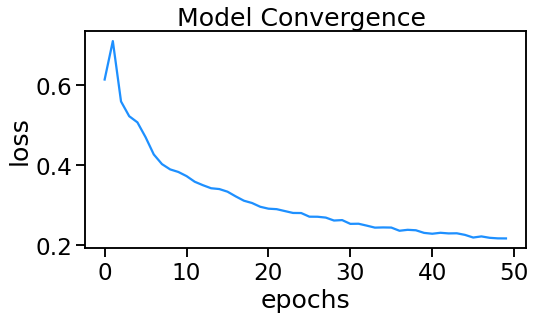

In [15]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss_arr1)),train_loss_arr1,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.tight_layout()

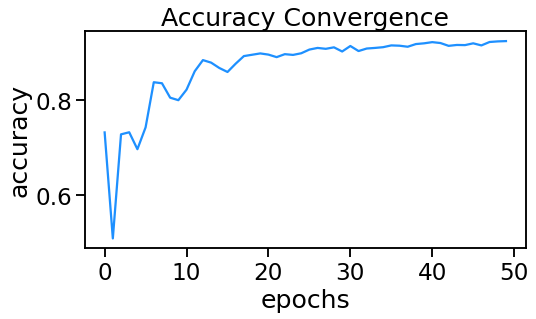

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_acc_arr1)),train_acc_arr1,color='dodgerblue')
plt.title('Accuracy Convergence')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.tight_layout()

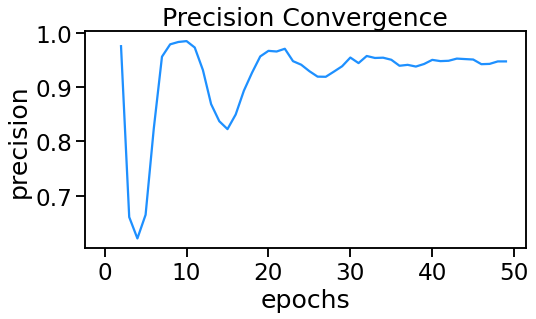

In [17]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_prec_arr1)),train_prec_arr1,color='dodgerblue')
plt.title('Precision Convergence')
plt.ylabel('precision')
plt.xlabel('epochs')
plt.tight_layout()

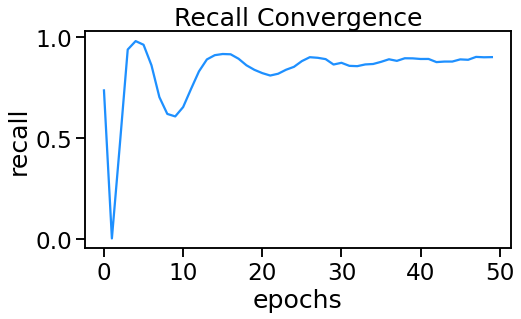

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_recall_arr1)),train_recall_arr1,color='dodgerblue')
plt.title('Recall Convergence')
plt.ylabel('recall')
plt.xlabel('epochs')
plt.tight_layout()

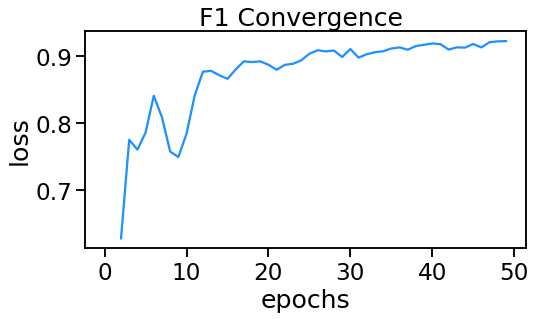

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_f1_arr1)),train_f1_arr1,color='dodgerblue')
plt.title('F1 Convergence ')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.tight_layout()

In [20]:
test_client_dataset1 = []
for i in range(len(test_dataset1)):
    test_client_dataset1.append((train_transforms(test_dataset1[i][0]), torch.Tensor([1,0]) if test_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))
test_client_loader1 = torch.utils.data.DataLoader(dataset=test_client_dataset1, batch_size=32)
len(test_client_loader1)

25

In [21]:
test_loss_arr1 = []
test_acc_arr1 = []
test_prec_arr1 = []
test_recall_arr1 = []
test_f1_arr1 = []

for batch_idx, (features, labels) in enumerate(test_client_loader1):
  local_loss, _tn, _fp, _fn, _tp = fl_server.train_test_model_and_get_loss(features,labels)
  _accuracy = (_tp+_tn)/(_tp+_fp+_tn+_fn)
  _precision = _tp/(_tp+_fp)
  _recall = _tp/(_tp+_fn)
  _f1 = 2/((1/_recall) + (1/_precision))
  test_loss_arr1.append(local_loss)
  test_acc_arr1.append(_accuracy)
  test_prec_arr1.append(_precision)
  test_recall_arr1.append(_recall)
  test_f1_arr1.append(_f1)
  print("Batch ", batch_idx, ". Loss: ", local_loss, ". Accuracy: ", _accuracy, ". Precision: ", _precision, ". Recall: ", _recall, ". F1-Score: ", _f1)

Batch  0 . Loss:  0.14979960024356842 . Accuracy:  0.9375 . Precision:  0.9545454545454546 . Recall:  0.9545454545454546 . F1-Score:  0.9545454545454545
Batch  1 . Loss:  0.2678843140602112 . Accuracy:  0.90625 . Precision:  0.8571428571428571 . Recall:  0.9230769230769231 . F1-Score:  0.8888888888888888
Batch  2 . Loss:  0.1714327335357666 . Accuracy:  0.9375 . Precision:  0.9166666666666666 . Recall:  0.9166666666666666 . F1-Score:  0.9166666666666665
Batch  3 . Loss:  0.10857725888490677 . Accuracy:  1.0 . Precision:  1.0 . Recall:  1.0 . F1-Score:  1.0
Batch  4 . Loss:  0.3130124807357788 . Accuracy:  0.875 . Precision:  0.9230769230769231 . Recall:  0.8 . F1-Score:  0.8571428571428572
Batch  5 . Loss:  0.2314528375864029 . Accuracy:  0.9375 . Precision:  0.9166666666666666 . Recall:  0.9166666666666666 . F1-Score:  0.9166666666666665
Batch  6 . Loss:  0.2533181309700012 . Accuracy:  0.875 . Precision:  0.9230769230769231 . Recall:  0.8 . F1-Score:  0.8571428571428572
Batch  7 . Lo

In [22]:
# 1st end: 45 Next Epochs

In [23]:
train_dataset1, test_dataset1 = train_test_split(image_dataset, test_size=0.2, random_state=45)
client_dataset1 = []
for i in range(len(train_dataset1)):
    client_dataset1.append((train_transforms(train_dataset1[i][0]), torch.Tensor([1,0]) if train_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))

client_loader1 = torch.utils.data.DataLoader(dataset=client_dataset1, batch_size=32)

In [24]:
# NUM OF CLIENTS = TOTAL IMAGES / BATCH SIZE
fl_server = FL_Server()
fl_iter = 50
threshold = int(len(train_dataset1) / 10)
train_loss_arr2 = []
train_acc_arr2 = []
train_prec_arr2 = []
train_recall_arr2 = []
train_f1_arr2 = []

print("FL_ITER: ", fl_iter)
print("NUM_CLIENTS_PER_FL_ITER: ", threshold)
print("Batch Idx Size: ", len(client_loader1))


for epoch in range(1, fl_iter + 1):
  global_weights = fl_server.get_weights()
  local_gradients = []
  net_loss = 0
  net_i = 0
  tn = 0
  fp = 0
  fn = 0
  tp = 0
  count=0
  _accuracy=0
  _precision=0
  _recall=0
  _f1=0

  clients_arr = []
  for batch_idx, (train_features, train_labels) in enumerate(client_loader1):
    clients_arr.append(FL_Client(train_features, train_labels))

  length=len(clients_arr)

  for j in range(length):
    fl_client=clients_arr[0]
    del clients_arr[0]
    if epoch != 1:
      fl_client.set_weights(copy.deepcopy(global_weights))
    else:
      print("Default client weights are used.")
    local_loss, _tn, _fp, _fn, _tp = fl_client.train_model()
    net_loss += local_loss
    net_i += 1
    tn += _tn
    fp += _fp
    fn += _fn
    tp += _tp
    _accuracy += (_tp+_tn)/(_tp+_fp+_tn+_fn)
    _precision += _tp/(_tp+_fp)
    _recall += _tp/(_tp+_fn)
    _f1 += 2/((1/_recall) + (1/_precision))
    count+=1
    fl_server.aggregate_grads(fl_client.get_gradients())
    print("--------Epoch ",epoch,"Client ", net_i,". Local Loss: ", local_loss, ". L-AC: ", _accuracy, ". L-P: ", _precision, ". L-R: ", _recall, ". L-F1: ", _f1)


  fl_server.update_grad_v2()
  fl_server.train_model()

  loss = net_loss / net_i
  train_loss_arr2.append(loss)
  accuracy=_accuracy/count
  precision=_precision/count
  recall=_recall/count
  f1=2/((1/recall) + (1/precision))
  train_acc_arr2.append(accuracy)
  train_prec_arr2.append(precision)
  train_recall_arr2.append(recall)
  train_f1_arr2.append(f1)

  print("Epoch ", epoch, ". Loss: ", loss, ". Accuracy: ", accuracy, ". Precision: ", precision, ". Recall: ", recall, ". F1-Score: ", f1)

FL_ITER:  50
NUM_CLIENTS_PER_FL_ITER:  320
Batch Idx Size:  100
Default client weights are used.
--------Epoch  1 Client  1 . Local Loss:  0.6569960117340088 . L-AC:  0.59375 . L-P:  0.7222222222222222 . L-R:  0.6190476190476191 . L-F1:  0.6666666666666666
Default client weights are used.
--------Epoch  1 Client  2 . Local Loss:  0.6052260994911194 . L-AC:  1.28125 . L-P:  1.4555555555555555 . L-R:  1.2661064425770308 . L-F1:  2.0209040904776607
Default client weights are used.
--------Epoch  1 Client  3 . Local Loss:  0.5990830659866333 . L-AC:  2.0625 . L-P:  2.2555555555555555 . L-R:  2.0161064425770308 . L-F1:  4.150023898708716
Default client weights are used.
--------Epoch  1 Client  4 . Local Loss:  0.6091441512107849 . L-AC:  2.90625 . L-P:  3.1305555555555555 . L-R:  2.8396358543417364 . L-F1:  7.12803153338092
Default client weights are used.
--------Epoch  1 Client  5 . Local Loss:  0.6272189617156982 . L-AC:  3.59375 . L-P:  3.6638888888888888 . L-R:  3.566908581614464 . L-

--------Epoch  1 Client  44 . Local Loss:  0.6028742790222168 . L-AC:  32.3125 . L-P:  32.54867119464644 . L-R:  32.1805753070459 . L-F1:  735.6134080481855
Default client weights are used.
--------Epoch  1 Client  45 . Local Loss:  0.6253387928009033 . L-AC:  33.0 . L-P:  33.26295690893215 . L-R:  32.8055753070459 . L-F1:  768.6460909673044
Default client weights are used.
--------Epoch  1 Client  46 . Local Loss:  0.6341099739074707 . L-AC:  33.71875 . L-P:  34.01295690893215 . L-R:  33.4055753070459 . L-F1:  802.3526210886279
Default client weights are used.
--------Epoch  1 Client  47 . Local Loss:  0.593109667301178 . L-AC:  34.46875 . L-P:  34.82545690893215 . L-R:  34.12779752926812 . L-F1:  836.8257188977386
Default client weights are used.
--------Epoch  1 Client  48 . Local Loss:  0.6203457713127136 . L-AC:  35.25 . L-P:  35.525456908932156 . L-R:  34.764161165631755 . L-F1:  871.9664051980884
Default client weights are used.
--------Epoch  1 Client  49 . Local Loss:  0.61631

--------Epoch  1 Client  87 . Local Loss:  0.6468931436538696 . L-AC:  63.3125 . L-P:  63.40986648800116 . L-R:  62.62089554658707 . L-F1:  2808.8684478815453
Default client weights are used.
--------Epoch  1 Client  88 . Local Loss:  0.6195259690284729 . L-AC:  64.0625 . L-P:  64.19934017221168 . L-R:  63.4103692307976 . L-F1:  2872.670863602704
Default client weights are used.
--------Epoch  1 Client  89 . Local Loss:  0.5973524451255798 . L-AC:  64.78125 . L-P:  65.04144543536957 . L-R:  64.13764195807033 . L-F1:  2937.2572455619397
Default client weights are used.
--------Epoch  1 Client  90 . Local Loss:  0.6046724915504456 . L-AC:  65.625 . L-P:  65.70811210203624 . L-R:  65.02653084695922 . L-F1:  3002.622790334422
Default client weights are used.
--------Epoch  1 Client  91 . Local Loss:  0.5905063152313232 . L-AC:  66.40625 . L-P:  66.39561210203624 . L-R:  65.87268469311306 . L-F1:  3068.755905025955
Default client weights are used.
--------Epoch  1 Client  92 . Local Loss:  

C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  1 . Local Loss:  0.7900222539901733 . L-AC:  0.34375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  2 . Local Loss:  0.7125188708305359 . L-AC:  0.8125 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  3 . Local Loss:  0.6773772239685059 . L-AC:  1.3125 . L-P:  nan . L-R:  0.0 . L-F1:  nan
--------Epoch  2 Client  4 . Local Loss:  0.7542743682861328 . L-AC:  1.8125 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  5 . Local Loss:  0.6392355561256409 . L-AC:  2.46875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  6 . Local Loss:  0.7540839910507202 . L-AC:  2.90625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  7 . Local Loss:  0.8347069025039673 . L-AC:  3.28125 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  8 . Local Loss:  0.6217340230941772 . L-AC:  3.875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  9 . Local Loss:  0.8011851906776428 . L-AC:  4.25 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  10 . Local Loss:  0.7306619882583618 . L-AC:  4.6875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  11 . Local Loss:  0.7198432683944702 . L-AC:  5.15625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  12 . Local Loss:  0.667243242263794 . L-AC:  5.71875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  13 . Local Loss:  0.7113462090492249 . L-AC:  6.1875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  14 . Local Loss:  0.851639986038208 . L-AC:  6.53125 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  15 . Local Loss:  0.6539921760559082 . L-AC:  7.03125 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  16 . Local Loss:  0.7497358322143555 . L-AC:  7.46875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  17 . Local Loss:  0.7280614972114563 . L-AC:  7.90625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  18 . Local Loss:  0.6491508483886719 . L-AC:  8.46875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  19 . Local Loss:  0.7043713331222534 . L-AC:  8.9375 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  20 . Local Loss:  0.7469583749771118 . L-AC:  9.375 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  21 . Local Loss:  0.5914458632469177 . L-AC:  10.0625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  22 . Local Loss:  0.7837544083595276 . L-AC:  10.4375 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  23 . Local Loss:  0.6944575905799866 . L-AC:  10.90625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  24 . Local Loss:  0.5928807854652405 . L-AC:  11.5625 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  25 . Local Loss:  0.7497127652168274 . L-AC:  12.0 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  26 . Local Loss:  0.728940486907959 . L-AC:  12.46875 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  27 . Local Loss:  0.7354841232299805 . L-AC:  12.9375 . L-P:  nan . L-R:  0.058823529411764705 . L-F1:  nan
--------Epoch  2 Client  28 . Local Loss:  0.578026533126831 . L-AC:  13.59375 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  29 . Local Loss:  0.6491464972496033 . L-AC:  14.09375 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  30 . Local Loss:  0.6722987294197083 . L-AC:  14.625 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  31 . Local Loss:  0.6700798273086548 . L-AC:  15.15625 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  32 . Local Loss:  0.7067240476608276 . L-AC:  15.65625 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  33 . Local Loss:  0.6869198679924011 . L-AC:  16.15625 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  34 . Local Loss:  0.6519877910614014 . L-AC:  16.6875 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  35 . Local Loss:  0.6541463136672974 . L-AC:  17.25 . L-P:  nan . L-R:  0.14215686274509803 . L-F1:  nan
--------Epoch  2 Client  36 . Local Loss:  0.756393313407898 . L-AC:  17.65625 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  37 . Local Loss:  0.8249475359916687 . L-AC:  18.0 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  38 . Local Loss:  0.595458984375 . L-AC:  18.625 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  39 . Local Loss:  0.663982093334198 . L-AC:  19.15625 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  40 . Local Loss:  0.7132599949836731 . L-AC:  19.625 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  41 . Local Loss:  0.7188688516616821 . L-AC:  20.125 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  42 . Local Loss:  0.5830181837081909 . L-AC:  20.78125 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  43 . Local Loss:  0.7181869745254517 . L-AC:  21.25 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  44 . Local Loss:  0.5639505386352539 . L-AC:  21.875 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  45 . Local Loss:  0.70448899269104 . L-AC:  22.375 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  46 . Local Loss:  0.6743780374526978 . L-AC:  22.90625 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  47 . Local Loss:  0.753965437412262 . L-AC:  23.34375 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  48 . Local Loss:  0.6157099008560181 . L-AC:  24.0 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  49 . Local Loss:  0.7056230306625366 . L-AC:  24.5 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  50 . Local Loss:  0.7652570009231567 . L-AC:  24.875 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  51 . Local Loss:  0.8153731822967529 . L-AC:  25.25 . L-P:  nan . L-R:  0.19215686274509802 . L-F1:  nan
--------Epoch  2 Client  52 . Local Loss:  0.8337284326553345 . L-AC:  25.5625 . L-P:  nan . L-R:  0.23563512361466324 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  53 . Local Loss:  0.7207878232002258 . L-AC:  26.03125 . L-P:  nan . L-R:  0.23563512361466324 . L-F1:  nan
--------Epoch  2 Client  54 . Local Loss:  0.7309728860855103 . L-AC:  26.46875 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  55 . Local Loss:  0.6596100330352783 . L-AC:  27.03125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  56 . Local Loss:  0.6897244453430176 . L-AC:  27.5 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  57 . Local Loss:  0.6026168465614319 . L-AC:  28.125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  58 . Local Loss:  0.7140747904777527 . L-AC:  28.5625 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  59 . Local Loss:  0.6021448969841003 . L-AC:  29.1875 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  60 . Local Loss:  0.6158205270767212 . L-AC:  29.8125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  61 . Local Loss:  0.667484700679779 . L-AC:  30.34375 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  62 . Local Loss:  0.7267921566963196 . L-AC:  30.8125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  63 . Local Loss:  0.7190308570861816 . L-AC:  31.28125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  64 . Local Loss:  0.7840344905853271 . L-AC:  31.625 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  65 . Local Loss:  0.595761775970459 . L-AC:  32.28125 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  66 . Local Loss:  0.7151361703872681 . L-AC:  32.75 . L-P:  nan . L-R:  0.2882667025620317 . L-F1:  nan
--------Epoch  2 Client  67 . Local Loss:  0.7682698369026184 . L-AC:  33.125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  68 . Local Loss:  0.7586713433265686 . L-AC:  33.5625 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  69 . Local Loss:  0.669624388217926 . L-AC:  34.09375 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  70 . Local Loss:  0.6438106298446655 . L-AC:  34.65625 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  71 . Local Loss:  0.6271461844444275 . L-AC:  35.25 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  72 . Local Loss:  0.6408835649490356 . L-AC:  35.875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  73 . Local Loss:  0.5846877098083496 . L-AC:  36.53125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  74 . Local Loss:  0.7522848844528198 . L-AC:  36.96875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  75 . Local Loss:  0.7226454615592957 . L-AC:  37.46875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  76 . Local Loss:  0.5967605113983154 . L-AC:  38.125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  77 . Local Loss:  0.7512761354446411 . L-AC:  38.59375 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  78 . Local Loss:  0.7242913842201233 . L-AC:  39.0625 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  79 . Local Loss:  0.6100213527679443 . L-AC:  39.71875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  80 . Local Loss:  0.6482040286064148 . L-AC:  40.28125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  81 . Local Loss:  0.633813202381134 . L-AC:  40.90625 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  82 . Local Loss:  0.7540372014045715 . L-AC:  41.3125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  83 . Local Loss:  0.7752349972724915 . L-AC:  41.71875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  84 . Local Loss:  0.7139382362365723 . L-AC:  42.21875 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  85 . Local Loss:  0.6958633661270142 . L-AC:  42.78125 . L-P:  nan . L-R:  0.3358857501810793 . L-F1:  nan
--------Epoch  2 Client  86 . Local Loss:  0.660489022731781 . L-AC:  43.3125 . L-P:  nan . L-R:  0.3983857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  87 . Local Loss:  0.6161811947822571 . L-AC:  43.90625 . L-P:  nan . L-R:  0.3983857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  88 . Local Loss:  0.7800968289375305 . L-AC:  44.3125 . L-P:  nan . L-R:  0.3983857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  89 . Local Loss:  0.8013342618942261 . L-AC:  44.625 . L-P:  nan . L-R:  0.3983857501810793 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  90 . Local Loss:  0.5238851308822632 . L-AC:  45.34375 . L-P:  nan . L-R:  0.3983857501810793 . L-F1:  nan
--------Epoch  2 Client  91 . Local Loss:  0.6081273555755615 . L-AC:  45.96875 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  92 . Local Loss:  0.6397682428359985 . L-AC:  46.5625 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  93 . Local Loss:  0.7116793394088745 . L-AC:  47.03125 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  94 . Local Loss:  0.788397490978241 . L-AC:  47.40625 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  95 . Local Loss:  0.7108792662620544 . L-AC:  47.84375 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  96 . Local Loss:  0.6431998014450073 . L-AC:  48.4375 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  97 . Local Loss:  0.6699154376983643 . L-AC:  48.90625 . L-P:  nan . L-R:  0.47530882710415623 . L-F1:  nan
--------Epoch  2 Client  98 . Local Loss:  0.7670701742172241 . L-AC:  49.28125 . L-P:  nan . L-R:  0.5229278747232038 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  99 . Local Loss:  0.693723738193512 . L-AC:  49.75 . L-P:  nan . L-R:  0.5229278747232038 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\4165854915.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  100 . Local Loss:  0.7640922665596008 . L-AC:  50.15625 . L-P:  nan . L-R:  0.5229278747232038 . L-F1:  nan
parameters trained: 4
Epoch  2 . Loss:  0.6964503562450409 . Accuracy:  0.5015625 . Precision:  nan . Recall:  0.005229278747232038 . F1-Score:  nan
--------Epoch  3 Client  1 . Local Loss:  0.6027780771255493 . L-AC:  0.5625 . L-P:  0.8888888888888888 . L-R:  0.38095238095238093 . L-F1:  0.5333333333333333
--------Epoch  3 Client  2 . Local Loss:  0.542626678943634 . L-AC:  1.34375 . L-P:  1.8888888888888888 . L-R:  0.969187675070028 . L-F1:  1.814396166830012
--------Epoch  3 Client  3 . Local Loss:  0.5474994778633118 . L-AC:  2.0625 . L-P:  2.7777777777777777 . L-R:  1.4691876750700281 . L-F1:  3.7362751745614986
--------Epoch  3 Client  4 . Local Loss:  0.5864357948303223 . L-AC:  2.6875 . L-P:  3.7777777777777777 . L-R:  1.7633053221288517 . L-F1:  6.140633868076819
--------Epoch  3 Client  5 . Local Loss:  0.5565279722213745 . L-AC:  3.53125 . L-P:

--------Epoch  3 Client  51 . Local Loss:  0.6026729941368103 . L-AC:  38.28125 . L-P:  48.755880230880216 . L-R:  27.400319043701398 . L-F1:  907.0997067227531
--------Epoch  3 Client  52 . Local Loss:  0.6155775785446167 . L-AC:  38.84375 . L-P:  49.66497113997112 . L-R:  27.83510165239705 . L-F1:  942.7752737366875
--------Epoch  3 Client  53 . Local Loss:  0.5453731417655945 . L-AC:  39.5625 . L-P:  50.66497113997112 . L-R:  28.305689887691166 . L-F1:  979.0952675823639
--------Epoch  3 Client  54 . Local Loss:  0.5738666653633118 . L-AC:  40.25 . L-P:  51.66497113997112 . L-R:  28.77937409821748 . L-F1:  1016.0620805462411
--------Epoch  3 Client  55 . Local Loss:  0.5424946546554565 . L-AC:  41.0625 . L-P:  52.49830447330446 . L-R:  29.493659812503196 . L-F1:  1053.8308337736075
--------Epoch  3 Client  56 . Local Loss:  0.5438094139099121 . L-AC:  41.78125 . L-P:  53.39830447330446 . L-R:  30.02307157720908 . L-F1:  1092.2665727461429
--------Epoch  3 Client  57 . Local Loss:  0

--------Epoch  4 Client  2 . Local Loss:  0.4906004071235657 . L-AC:  1.5 . L-P:  1.4207407407407406 . L-R:  1.9523809523809523 . L-F1:  2.477998075877358
--------Epoch  4 Client  3 . Local Loss:  0.508492112159729 . L-AC:  2.25 . L-P:  2.1025589225589223 . L-R:  2.8898809523809526 . L-F1:  4.912136546752713
--------Epoch  4 Client  4 . Local Loss:  0.51790452003479 . L-AC:  2.96875 . L-P:  2.756405076405076 . L-R:  3.8898809523809526 . L-F1:  8.13862651643363
--------Epoch  4 Client  5 . Local Loss:  0.5892583727836609 . L-AC:  3.5 . L-P:  3.179481999481999 . L-R:  4.8898809523809526 . L-F1:  11.992038132803117
--------Epoch  4 Client  6 . Local Loss:  0.5284682512283325 . L-AC:  4.125 . L-P:  3.786624856624856 . L-R:  5.834325396825397 . L-F1:  16.58459936371354
--------Epoch  4 Client  7 . Local Loss:  0.4925557076931 . L-AC:  4.75 . L-P:  4.419958189958189 . L-R:  6.784325396825397 . L-F1:  21.937272628144534
--------Epoch  4 Client  8 . Local Loss:  0.5553709864616394 . L-AC:  5.3

--------Epoch  4 Client  54 . Local Loss:  0.5196509957313538 . L-AC:  38.0625 . L-P:  34.59770456477735 . L-R:  52.097889120683234 . L-F1:  1142.567077027319
--------Epoch  4 Client  55 . Local Loss:  0.5212998390197754 . L-AC:  38.78125 . L-P:  35.21675218382497 . L-R:  53.026460549254665 . L-F1:  1184.8914589828378
--------Epoch  4 Client  56 . Local Loss:  0.486305832862854 . L-AC:  39.59375 . L-P:  35.95588261860758 . L-R:  54.026460549254665 . L-F1:  1228.0681313258544
--------Epoch  4 Client  57 . Local Loss:  0.5413109064102173 . L-AC:  40.21875 . L-P:  36.45588261860758 . L-R:  54.94312721592133 . L-F1:  1271.8979321105485
--------Epoch  4 Client  58 . Local Loss:  0.45051729679107666 . L-AC:  41.0 . L-P:  37.17588261860758 . L-R:  55.94312721592133 . L-F1:  1316.5662578239035
--------Epoch  4 Client  59 . Local Loss:  0.5405321717262268 . L-AC:  41.65625 . L-P:  37.69762174904236 . L-R:  56.94312721592133 . L-F1:  1361.9298141031989
--------Epoch  4 Client  60 . Local Loss:  

--------Epoch  5 Client  5 . Local Loss:  0.5788121223449707 . L-AC:  3.65625 . L-P:  3.2656094388703085 . L-R:  5.0 . L-F1:  12.283093137240472
--------Epoch  5 Client  6 . Local Loss:  0.4985736906528473 . L-AC:  4.3125 . L-P:  3.8952390684999383 . L-R:  5.944444444444445 . L-F1:  16.989551878533586
--------Epoch  5 Client  7 . Local Loss:  0.46573418378829956 . L-AC:  4.9375 . L-P:  4.528572401833271 . L-R:  6.894444444444445 . L-F1:  22.456057138439206
--------Epoch  5 Client  8 . Local Loss:  0.5309687256813049 . L-AC:  5.59375 . L-P:  5.070239068499938 . L-R:  7.894444444444445 . L-F1:  28.630788763219783
--------Epoch  5 Client  9 . Local Loss:  0.5511089563369751 . L-AC:  6.3125 . L-P:  5.759894240913731 . L-R:  8.894444444444446 . L-F1:  35.62271933499918
--------Epoch  5 Client  10 . Local Loss:  0.47608649730682373 . L-AC:  7.0 . L-P:  6.402751383770874 . L-R:  9.894444444444446 . L-F1:  43.397267610185274
--------Epoch  5 Client  11 . Local Loss:  0.4820025563240051 . L-AC:

--------Epoch  5 Client  57 . Local Loss:  0.5296036601066589 . L-AC:  40.15625 . L-P:  36.193874369286675 . L-R:  56.16341036414565 . L-F1:  1277.6013892638016
--------Epoch  5 Client  58 . Local Loss:  0.4169512093067169 . L-AC:  40.96875 . L-P:  36.943874369286675 . L-R:  57.16341036414565 . L-F1:  1322.4828850373744
--------Epoch  5 Client  59 . Local Loss:  0.539716899394989 . L-AC:  41.625 . L-P:  37.46561349972146 . L-R:  58.16341036414565 . L-F1:  1368.0574975238696
--------Epoch  5 Client  60 . Local Loss:  0.5500153303146362 . L-AC:  42.34375 . L-P:  38.037042071150026 . L-R:  59.16341036414565 . L-F1:  1414.361831973172
--------Epoch  5 Client  61 . Local Loss:  0.47558069229125977 . L-AC:  43.03125 . L-P:  38.64573772332394 . L-R:  60.09674369747898 . L-F1:  1461.4030438515945
--------Epoch  5 Client  62 . Local Loss:  0.4898550510406494 . L-AC:  43.84375 . L-P:  39.4076424852287 . L-R:  61.03792016806721 . L-F1:  1509.296857624685
--------Epoch  5 Client  63 . Local Loss: 

--------Epoch  6 Client  8 . Local Loss:  0.48492908477783203 . L-AC:  5.84375 . L-P:  5.33532547162982 . L-R:  7.6606209150326805 . L-F1:  29.047313565144776
--------Epoch  6 Client  9 . Local Loss:  0.5368236303329468 . L-AC:  6.59375 . L-P:  6.066094702399051 . L-R:  8.61062091503268 . L-F1:  36.1650970364016
--------Epoch  6 Client  10 . Local Loss:  0.4287312626838684 . L-AC:  7.40625 . L-P:  6.816094702399051 . L-R:  9.61062091503268 . L-F1:  44.14075130976164
--------Epoch  6 Client  11 . Local Loss:  0.4124782979488373 . L-AC:  8.21875 . L-P:  7.577999464303812 . L-R:  10.551797385620915 . L-F1:  52.96175637645764
--------Epoch  6 Client  12 . Local Loss:  0.47567182779312134 . L-AC:  8.875 . L-P:  8.143216855608161 . L-R:  11.480368814192344 . L-F1:  62.48979415807472
--------Epoch  6 Client  13 . Local Loss:  0.503278911113739 . L-AC:  9.59375 . L-P:  8.825035037426343 . L-R:  12.362721755368815 . L-F1:  72.78833153662178
--------Epoch  6 Client  14 . Local Loss:  0.463007807

--------Epoch  6 Client  60 . Local Loss:  0.48146992921829224 . L-AC:  44.9375 . L-P:  40.87956306671747 . L-R:  57.01310839293071 . L-F1:  1455.4655434867734
--------Epoch  6 Client  61 . Local Loss:  0.45262208580970764 . L-AC:  45.6875 . L-P:  41.56377359303326 . L-R:  57.87977505959738 . L-F1:  1503.8488101498776
--------Epoch  6 Client  62 . Local Loss:  0.46836400032043457 . L-AC:  46.5 . L-P:  42.35324727724379 . L-R:  58.76212800077385 . L-F1:  1553.0750911365415
--------Epoch  6 Client  63 . Local Loss:  0.49830690026283264 . L-AC:  47.34375 . L-P:  43.153247277243786 . L-R:  59.70330447136208 . L-F1:  1603.1718796701155
--------Epoch  6 Client  64 . Local Loss:  0.4165383279323578 . L-AC:  48.15625 . L-P:  43.931025055021564 . L-R:  60.70330447136208 . L-F1:  1654.1447946154267
--------Epoch  6 Client  65 . Local Loss:  0.4341544508934021 . L-AC:  48.90625 . L-P:  44.50997242344262 . L-R:  61.70330447136208 . L-F1:  1705.859843067904
--------Epoch  6 Client  66 . Local Loss:

--------Epoch  7 Client  11 . Local Loss:  0.42571786046028137 . L-AC:  9.46875 . L-P:  9.720120320855617 . L-R:  9.458563168857287 . L-F1:  57.83642409123621
--------Epoch  7 Client  12 . Local Loss:  0.4422920346260071 . L-AC:  10.3125 . L-P:  10.629211229946526 . L-R:  10.172848883143 . L-F1:  68.23244823513464
--------Epoch  7 Client  13 . Local Loss:  0.4662708044052124 . L-AC:  11.125 . L-P:  11.452740641711232 . L-R:  10.996378294907707 . L-F1:  79.45236906724266
--------Epoch  7 Client  14 . Local Loss:  0.4497465193271637 . L-AC:  11.90625 . L-P:  12.390240641711232 . L-R:  11.71066400919342 . L-F1:  91.49324033326684
--------Epoch  7 Client  15 . Local Loss:  0.3740273714065552 . L-AC:  12.8125 . L-P:  13.232345904869128 . L-R:  12.71066400919342 . L-F1:  104.45950010091613
--------Epoch  7 Client  16 . Local Loss:  0.4450928270816803 . L-AC:  13.59375 . L-P:  13.971476339651737 . L-R:  13.655108453637865 . L-F1:  118.27098104239828
--------Epoch  7 Client  17 . Local Loss:  

--------Epoch  7 Client  63 . Local Loss:  0.42995500564575195 . L-AC:  53.09375 . L-P:  54.013723153725145 . L-R:  52.58124161718688 . L-F1:  1718.3167102684138
--------Epoch  7 Client  64 . Local Loss:  0.42316246032714844 . L-AC:  53.875 . L-P:  54.763723153725145 . L-R:  53.58124161718688 . L-F1:  1772.4827398270716
--------Epoch  7 Client  65 . Local Loss:  0.37091803550720215 . L-AC:  54.71875 . L-P:  55.56372315372514 . L-R:  54.30851434445961 . L-F1:  1827.4116886614033
--------Epoch  7 Client  66 . Local Loss:  0.4244517385959625 . L-AC:  55.625 . L-P:  56.50122315372514 . L-R:  55.19086728563608 . L-F1:  1883.2500474258736
--------Epoch  7 Client  67 . Local Loss:  0.3838501572608948 . L-AC:  56.5 . L-P:  57.44859157477777 . L-R:  56.048010142778935 . L-F1:  1939.9897064913384
--------Epoch  7 Client  68 . Local Loss:  0.44578760862350464 . L-AC:  57.34375 . L-P:  58.29069683793567 . L-R:  56.93689903166782 . L-F1:  1997.5955516068245
--------Epoch  7 Client  69 . Local Loss:

--------Epoch  8 Client  14 . Local Loss:  0.4660217761993408 . L-AC:  11.65625 . L-P:  13.45824592074592 . L-R:  10.095393087304851 . L-F1:  86.39002078257519
--------Epoch  8 Client  15 . Local Loss:  0.3633105754852295 . L-AC:  12.53125 . L-P:  14.45824592074592 . L-R:  10.845393087304851 . L-F1:  98.78391877594454
--------Epoch  8 Client  16 . Local Loss:  0.42898136377334595 . L-AC:  13.25 . L-P:  15.367336829836828 . L-R:  11.400948642860406 . L-F1:  111.8742019136679
--------Epoch  8 Client  17 . Local Loss:  0.3581075370311737 . L-AC:  14.125 . L-P:  16.30483682983683 . L-R:  12.23428197619374 . L-F1:  125.85346824685973
--------Epoch  8 Client  18 . Local Loss:  0.3872098922729492 . L-AC:  14.90625 . L-P:  17.30483682983683 . L-R:  12.73428197619374 . L-F1:  140.525314859013
--------Epoch  8 Client  19 . Local Loss:  0.40685150027275085 . L-AC:  15.78125 . L-P:  18.30483682983683 . L-R:  13.49898785854668 . L-F1:  156.0641233224428
--------Epoch  8 Client  20 . Local Loss:  0.

--------Epoch  8 Client  66 . Local Loss:  0.41550546884536743 . L-AC:  55.125 . L-P:  63.588155471978986 . L-R:  46.42404299813945 . L-F1:  1800.6190605181077
--------Epoch  8 Client  67 . Local Loss:  0.39243584871292114 . L-AC:  55.90625 . L-P:  64.58815547197898 . L-R:  47.09070966480611 . L-F1:  1855.0877744218722
--------Epoch  8 Client  68 . Local Loss:  0.4338410496711731 . L-AC:  56.71875 . L-P:  65.58815547197898 . L-R:  47.75737633147278 . L-F1:  1910.3580294363192
--------Epoch  8 Client  69 . Local Loss:  0.3248673677444458 . L-AC:  57.59375 . L-P:  66.5112323950559 . L-R:  48.557376331472774 . L-F1:  1966.4916870414484
--------Epoch  8 Client  70 . Local Loss:  0.38808661699295044 . L-AC:  58.46875 . L-P:  67.42789906172257 . L-R:  49.34309061718706 . L-F1:  2023.4767471608804
--------Epoch  8 Client  71 . Local Loss:  0.37326252460479736 . L-AC:  59.40625 . L-P:  68.42789906172257 . L-R:  50.189244463340906 . L-F1:  2081.3831248068054
--------Epoch  8 Client  72 . Local 

--------Epoch  9 Client  17 . Local Loss:  0.37022632360458374 . L-AC:  13.625 . L-P:  16.816666666666666 . L-R:  10.934637503019855 . L-F1:  119.83215687957461
--------Epoch  9 Client  18 . Local Loss:  0.3910027742385864 . L-AC:  14.40625 . L-P:  17.816666666666666 . L-R:  11.434637503019855 . L-F1:  133.76159562621314
--------Epoch  9 Client  19 . Local Loss:  0.37446412444114685 . L-AC:  15.3125 . L-P:  18.816666666666666 . L-R:  12.258166914784562 . L-F1:  148.60691025518955
--------Epoch  9 Client  20 . Local Loss:  0.4582372307777405 . L-AC:  16.09375 . L-P:  19.816666666666666 . L-R:  12.869278025895673 . L-F1:  164.21154981990517
--------Epoch  9 Client  21 . Local Loss:  0.3695067763328552 . L-AC:  16.96875 . L-P:  20.816666666666666 . L-R:  13.469278025895672 . L-F1:  180.56725904243987
--------Epoch  9 Client  22 . Local Loss:  0.45835134387016296 . L-AC:  17.65625 . L-P:  21.816666666666666 . L-R:  13.969278025895672 . L-F1:  197.59981665036008
--------Epoch  9 Client  23 

--------Epoch  9 Client  69 . Local Loss:  0.3367202877998352 . L-AC:  55.71875 . L-P:  67.71175629925628 . L-R:  43.93782352744697 . L-F1:  1873.7362315211178
--------Epoch  9 Client  70 . Local Loss:  0.33961278200149536 . L-AC:  56.625 . L-P:  68.71175629925628 . L-R:  44.72353781316126 . L-F1:  1927.9174782856926
--------Epoch  9 Client  71 . Local Loss:  0.3396666347980499 . L-AC:  57.53125 . L-P:  69.71175629925628 . L-R:  45.492768582392024 . L-F1:  1982.9740101372356
--------Epoch  9 Client  72 . Local Loss:  0.3604937195777893 . L-AC:  58.46875 . L-P:  70.71175629925628 . L-R:  46.32610191572536 . L-F1:  2038.952478624622
--------Epoch  9 Client  73 . Local Loss:  0.2968732416629791 . L-AC:  59.375 . L-P:  71.71175629925628 . L-R:  47.05337464299809 . L-F1:  2095.7752195871512
--------Epoch  9 Client  74 . Local Loss:  0.34085097908973694 . L-AC:  60.21875 . L-P:  72.71175629925628 . L-R:  47.77559686522031 . L-F1:  2153.438492371861
--------Epoch  9 Client  75 . Local Loss:  

--------Epoch  10 Client  20 . Local Loss:  0.431969553232193 . L-AC:  15.9375 . L-P:  19.825757575757578 . L-R:  12.538892724922135 . L-F1:  159.42152556363507
--------Epoch  10 Client  21 . Local Loss:  0.3739732801914215 . L-AC:  16.78125 . L-P:  20.825757575757578 . L-R:  13.038892724922135 . L-F1:  175.45859173939814
--------Epoch  10 Client  22 . Local Loss:  0.4550606608390808 . L-AC:  17.53125 . L-P:  21.825757575757578 . L-R:  13.638892724922135 . L-F1:  192.2459652897985
--------Epoch  10 Client  23 . Local Loss:  0.302180677652359 . L-AC:  18.4375 . L-P:  22.763257575757578 . L-R:  14.521245666098606 . L-F1:  209.9772384288851
--------Epoch  10 Client  24 . Local Loss:  0.365874707698822 . L-AC:  19.25 . L-P:  23.763257575757578 . L-R:  14.975791120644061 . L-F1:  228.35009960003018
--------Epoch  10 Client  25 . Local Loss:  0.3844357132911682 . L-AC:  20.03125 . L-P:  24.763257575757578 . L-R:  15.586902231755172 . L-F1:  247.48174500685894
--------Epoch  10 Client  26 . L

--------Epoch  10 Client  71 . Local Loss:  0.33341965079307556 . L-AC:  57.46875 . L-P:  69.90739538239538 . L-R:  45.11571337365019 . L-F1:  1969.2136261644252
--------Epoch  10 Client  72 . Local Loss:  0.34991830587387085 . L-AC:  58.34375 . L-P:  70.90739538239538 . L-R:  45.78238004031685 . L-F1:  2024.853622236163
--------Epoch  10 Client  73 . Local Loss:  0.2754889726638794 . L-AC:  59.25 . L-P:  71.90739538239538 . L-R:  46.50965276758958 . L-F1:  2081.338529483995
--------Epoch  10 Client  74 . Local Loss:  0.32294878363609314 . L-AC:  60.09375 . L-P:  72.90739538239538 . L-R:  47.2318749898118 . L-F1:  2138.6645474274287
--------Epoch  10 Client  75 . Local Loss:  0.4245683550834656 . L-AC:  60.84375 . L-P:  73.90739538239538 . L-R:  47.7318749898118 . L-F1:  2196.6678311765086
--------Epoch  10 Client  76 . Local Loss:  0.3428249657154083 . L-AC:  61.71875 . L-P:  74.90739538239538 . L-R:  48.36823862617543 . L-F1:  2255.44893263033
--------Epoch  10 Client  77 . Local Los

--------Epoch  11 Client  22 . Local Loss:  0.4634109139442444 . L-AC:  17.9375 . L-P:  21.567744755244753 . L-R:  14.549831459390283 . L-F1:  201.63068604657377
--------Epoch  11 Client  23 . Local Loss:  0.27354490756988525 . L-AC:  18.875 . L-P:  22.50892122583299 . L-R:  15.491007929978519 . L-F1:  219.9826085343721
--------Epoch  11 Client  24 . Local Loss:  0.36361077427864075 . L-AC:  19.75 . L-P:  23.397810114721878 . L-R:  16.218280657251245 . L-F1:  239.14008943726287
--------Epoch  11 Client  25 . Local Loss:  0.3726021647453308 . L-AC:  20.53125 . L-P:  24.397810114721878 . L-R:  16.829391768362356 . L-F1:  259.058991810273
--------Epoch  11 Client  26 . Local Loss:  0.4063352346420288 . L-AC:  21.3125 . L-P:  25.254952971864736 . L-R:  17.535274121303534 . L-F1:  279.7577612894835
--------Epoch  11 Client  27 . Local Loss:  0.45539578795433044 . L-AC:  22.125 . L-P:  26.254952971864736 . L-R:  18.182332944832947 . L-F1:  301.2431552120677
--------Epoch  11 Client  28 . Loc

--------Epoch  11 Client  73 . Local Loss:  0.27591800689697266 . L-AC:  60.96875 . L-P:  71.14295761428113 . L-R:  50.59022656947007 . L-F1:  2177.353719118806
--------Epoch  11 Client  74 . Local Loss:  0.28662997484207153 . L-AC:  61.875 . L-P:  72.14295761428113 . L-R:  51.423559902803404 . L-F1:  2237.3998833546875
--------Epoch  11 Client  75 . Local Loss:  0.40002620220184326 . L-AC:  62.65625 . L-P:  73.14295761428113 . L-R:  51.986059902803404 . L-F1:  2298.1757809275277
--------Epoch  11 Client  76 . Local Loss:  0.3477480113506317 . L-AC:  63.5 . L-P:  74.14295761428113 . L-R:  52.53151444825795 . L-F1:  2359.669494471142
--------Epoch  11 Client  77 . Local Loss:  0.4589310586452484 . L-AC:  64.28125 . L-P:  75.14295761428113 . L-R:  53.119749742375596 . L-F1:  2421.9101127402278
--------Epoch  11 Client  78 . Local Loss:  0.39936989545822144 . L-AC:  65.09375 . L-P:  76.14295761428113 . L-R:  53.76680856590501 . L-F1:  2484.9379195951874
--------Epoch  11 Client  79 . Loca

--------Epoch  12 Client  24 . Local Loss:  0.3496916890144348 . L-AC:  20.9375 . L-P:  22.91556566498517 . L-R:  19.04876773553244 . L-F1:  259.7141953674653
--------Epoch  12 Client  25 . Local Loss:  0.39776408672332764 . L-AC:  21.75 . L-P:  23.91556566498517 . L-R:  19.715434402199108 . L-F1:  281.3275329179896
--------Epoch  12 Client  26 . Local Loss:  0.4412730634212494 . L-AC:  22.53125 . L-P:  24.72806566498517 . L-R:  20.48014028455205 . L-F1:  303.7320607309184
--------Epoch  12 Client  27 . Local Loss:  0.43202391266822815 . L-AC:  23.40625 . L-P:  25.661398998318504 . L-R:  21.303669696316756 . L-F1:  327.01242562339087
--------Epoch  12 Client  28 . Local Loss:  0.24038365483283997 . L-AC:  24.34375 . L-P:  26.661398998318504 . L-R:  22.13700302965009 . L-F1:  351.20188453486156
--------Epoch  12 Client  29 . Local Loss:  0.3078894317150116 . L-AC:  25.25 . L-P:  27.543751939494975 . L-R:  23.07450302965009 . L-F1:  376.3137098225258
--------Epoch  12 Client  30 . Local 

--------Epoch  12 Client  76 . Local Loss:  0.3355320394039154 . L-AC:  66.25 . L-P:  72.17536626170525 . L-R:  60.194407195569866 . L-F1:  2522.9294666089572
--------Epoch  12 Client  77 . Local Loss:  0.4756907820701599 . L-AC:  67.03125 . L-P:  73.09203292837192 . L-R:  60.84146601909928 . L-F1:  2589.3359515081916
--------Epoch  12 Client  78 . Local Loss:  0.3753654360771179 . L-AC:  67.9375 . L-P:  74.02953292837192 . L-R:  61.72381896027575 . L-F1:  2656.654885805043
--------Epoch  12 Client  79 . Local Loss:  0.3373221755027771 . L-AC:  68.875 . L-P:  74.93862383746283 . L-R:  62.63290986936666 . L-F1:  2724.890282272287
--------Epoch  12 Client  80 . Local Loss:  0.4224206507205963 . L-AC:  69.625 . L-P:  75.73862383746282 . L-R:  63.204338440795226 . L-F1:  2793.7963936084802
--------Epoch  12 Client  81 . Local Loss:  0.47633159160614014 . L-AC:  70.46875 . L-P:  76.62751272635171 . L-R:  63.87100510746189 . L-F1:  2863.466541481585
--------Epoch  12 Client  82 . Local Loss:

--------Epoch  13 Client  27 . Local Loss:  0.45035216212272644 . L-AC:  23.90625 . L-P:  24.66611400295611 . L-R:  23.46855962664786 . L-F1:  337.5213559834629
--------Epoch  13 Client  28 . Local Loss:  0.24818328022956848 . L-AC:  24.84375 . L-P:  25.582780669622778 . L-R:  24.385226293314528 . L-F1:  362.49100891773764
--------Epoch  13 Client  29 . Local Loss:  0.29033705592155457 . L-AC:  25.8125 . L-P:  26.523957140211014 . L-R:  25.385226293314528 . L-F1:  388.43311047518847
--------Epoch  13 Client  30 . Local Loss:  0.3166176974773407 . L-AC:  26.71875 . L-P:  27.45252856878244 . L-R:  26.251892959981195 . L-F1:  415.2719003160775
--------Epoch  13 Client  31 . Local Loss:  0.24127136170864105 . L-AC:  27.6875 . L-P:  28.45252856878244 . L-R:  27.18522629331453 . L-F1:  443.07634460670374
--------Epoch  13 Client  32 . Local Loss:  0.3512200117111206 . L-AC:  28.5625 . L-P:  29.285861902115773 . L-R:  28.12272629331453 . L-F1:  471.76885575968026
--------Epoch  13 Client  33 

--------Epoch  13 Client  78 . Local Loss:  0.38378188014030457 . L-AC:  69.21875 . L-P:  70.55148547444985 . L-R:  68.25041935936066 . L-F1:  2746.4979122154914
--------Epoch  13 Client  79 . Local Loss:  0.36935025453567505 . L-AC:  70.1875 . L-P:  71.55148547444985 . L-R:  69.15951026845157 . L-F1:  2816.8330792472807
--------Epoch  13 Client  80 . Local Loss:  0.37781354784965515 . L-AC:  71.0625 . L-P:  72.40862833159271 . L-R:  70.01665312559443 . L-F1:  2888.025633846054
--------Epoch  13 Client  81 . Local Loss:  0.5006990432739258 . L-AC:  71.8125 . L-P:  73.10862833159271 . L-R:  70.59998645892776 . L-F1:  2959.8580452538868
--------Epoch  13 Client  82 . Local Loss:  0.29061460494995117 . L-AC:  72.6875 . L-P:  74.00336517369797 . L-R:  71.49472330103302 . L-F1:  3032.585462801475
--------Epoch  13 Client  83 . Local Loss:  0.33580219745635986 . L-AC:  73.53125 . L-P:  74.89225406258686 . L-R:  72.33682856419091 . L-F1:  3106.1778271123267
--------Epoch  13 Client  84 . Loca

--------Epoch  14 Client  29 . Local Loss:  0.3243371844291687 . L-AC:  24.875 . L-P:  24.31651228701303 . L-R:  26.058606099782576 . L-F1:  380.66606888739364
--------Epoch  14 Client  30 . Local Loss:  0.31389346718788147 . L-AC:  25.78125 . L-P:  25.245083715584457 . L-R:  26.925272766449243 . L-F1:  406.72419119629683
--------Epoch  14 Client  31 . Local Loss:  0.24075238406658173 . L-AC:  26.78125 . L-P:  26.245083715584457 . L-R:  27.925272766449243 . L-F1:  433.78331242541657
--------Epoch  14 Client  32 . Local Loss:  0.3202938139438629 . L-AC:  27.625 . L-P:  27.068613127349163 . L-R:  28.800272766449243 . L-F1:  461.69091892249475
--------Epoch  14 Client  33 . Local Loss:  0.35230088233947754 . L-AC:  28.4375 . L-P:  27.881113127349163 . L-R:  29.612772766449243 . L-F1:  490.4117839216342
--------Epoch  14 Client  34 . Local Loss:  0.3041498064994812 . L-AC:  29.3125 . L-P:  28.67058681155969 . L-R:  30.612772766449243 . L-F1:  520.0216496711661
--------Epoch  14 Client  35 

--------Epoch  14 Client  81 . Local Loss:  0.4896214008331299 . L-AC:  69.5 . L-P:  67.42816419644727 . L-R:  72.67808894770295 . L-F1:  2879.829514336963
--------Epoch  14 Client  82 . Local Loss:  0.29380086064338684 . L-AC:  70.34375 . L-P:  68.27816419644726 . L-R:  73.5728257898082 . L-F1:  2950.656196338405
--------Epoch  14 Client  83 . Local Loss:  0.31706130504608154 . L-AC:  71.15625 . L-P:  69.08768800597107 . L-R:  74.46756263191347 . L-F1:  3022.3330136030886
--------Epoch  14 Client  84 . Local Loss:  0.3164125084877014 . L-AC:  72.0625 . L-P:  70.02102133930441 . L-R:  75.34256263191347 . L-F1:  3094.9173987934214
--------Epoch  14 Client  85 . Local Loss:  0.3594353199005127 . L-AC:  73.0 . L-P:  70.89602133930441 . L-R:  76.34256263191347 . L-F1:  3168.4359535563135
--------Epoch  14 Client  86 . Local Loss:  0.2938268482685089 . L-AC:  73.875 . L-P:  71.72935467263774 . L-R:  77.28006263191347 . L-F1:  3242.837278276867
--------Epoch  14 Client  87 . Local Loss:  0.2

--------Epoch  15 Client  32 . Local Loss:  0.2781602740287781 . L-AC:  27.3125 . L-P:  26.337644807033357 . L-R:  29.18417799520741 . L-F1:  456.208514365362
--------Epoch  15 Client  33 . Local Loss:  0.3347259759902954 . L-AC:  28.0625 . L-P:  27.087644807033357 . L-R:  29.93417799520741 . L-F1:  484.64837620341007
--------Epoch  15 Client  34 . Local Loss:  0.3113979697227478 . L-AC:  28.90625 . L-P:  27.837644807033357 . L-R:  30.93417799520741 . L-F1:  513.9527134987065
--------Epoch  15 Client  35 . Local Loss:  0.40232858061790466 . L-AC:  29.71875 . L-P:  28.559867029255578 . L-R:  31.862749423778837 . L-F1:  544.0737489701493
--------Epoch  15 Client  36 . Local Loss:  0.23175910115242004 . L-AC:  30.625 . L-P:  29.464628934017483 . L-R:  32.81274942377884 . L-F1:  575.1224382878654
--------Epoch  15 Client  37 . Local Loss:  0.49217888712882996 . L-AC:  31.34375 . L-P:  30.214628934017483 . L-R:  33.669892280921694 . L-F1:  606.971258069847
--------Epoch  15 Client  38 . Loc

--------Epoch  15 Client  84 . Local Loss:  0.34636735916137695 . L-AC:  71.03125 . L-P:  67.62240438615689 . L-R:  76.90509865670887 . L-F1:  3075.3663044081936
--------Epoch  15 Client  85 . Local Loss:  0.3949590027332306 . L-AC:  71.90625 . L-P:  68.40018216393466 . L-R:  77.90509865670887 . L-F1:  3148.2101950692654
--------Epoch  15 Client  86 . Local Loss:  0.29782214760780334 . L-AC:  72.78125 . L-P:  69.23351549726799 . L-R:  78.84259865670887 . L-F1:  3221.936471682225
--------Epoch  15 Client  87 . Local Loss:  0.2732791602611542 . L-AC:  73.71875 . L-P:  70.10018216393465 . L-R:  79.84259865670887 . L-F1:  3296.5913590952064
--------Epoch  15 Client  88 . Local Loss:  0.33481737971305847 . L-AC:  74.5 . L-P:  70.83095139470387 . L-R:  80.84259865670887 . L-F1:  3372.097710388941
--------Epoch  15 Client  89 . Local Loss:  0.292855441570282 . L-AC:  75.40625 . L-P:  71.78333234708482 . L-R:  81.75168956579978 . L-F1:  3448.5416204353046
--------Epoch  15 Client  90 . Local L

--------Epoch  16 Client  35 . Local Loss:  0.39511480927467346 . L-AC:  30.21875 . L-P:  29.17416819805432 . L-R:  32.16800152461917 . L-F1:  550.8335290962181
--------Epoch  16 Client  36 . Local Loss:  0.22322037816047668 . L-AC:  31.125 . L-P:  30.078930102816226 . L-R:  33.118001524619174 . L-F1:  582.3589220971505
--------Epoch  16 Client  37 . Local Loss:  0.4129773676395416 . L-AC:  31.9375 . L-P:  30.878930102816227 . L-R:  34.07038247700012 . L-F1:  614.7551682557415
--------Epoch  16 Client  38 . Local Loss:  0.27068549394607544 . L-AC:  32.8125 . L-P:  31.66464438853051 . L-R:  34.98704914366679 . L-F1:  647.998208623593
--------Epoch  16 Client  39 . Local Loss:  0.3439847230911255 . L-AC:  33.65625 . L-P:  32.47714438853051 . L-R:  35.853715810333455 . L-F1:  682.0802120360686
--------Epoch  16 Client  40 . Local Loss:  0.326906681060791 . L-AC:  34.5625 . L-P:  33.3660332774194 . L-R:  36.79489228092169 . L-F1:  717.0768883345711
--------Epoch  16 Client  41 . Local Loss

--------Epoch  16 Client  87 . Local Loss:  0.2867061495780945 . L-AC:  75.0625 . L-P:  71.88140627955369 . L-R:  79.98747991213997 . L-F1:  3344.3706122989206
--------Epoch  16 Client  88 . Local Loss:  0.3583815097808838 . L-AC:  75.8125 . L-P:  72.64331104145845 . L-R:  80.82958517529786 . L-F1:  3420.8887316800565
--------Epoch  16 Client  89 . Local Loss:  0.2987896502017975 . L-AC:  76.71875 . L-P:  73.5956919938394 . L-R:  81.73867608438877 . L-F1:  3498.3424787614667
--------Epoch  16 Client  90 . Local Loss:  0.30757594108581543 . L-AC:  77.59375 . L-P:  74.28799968614709 . L-R:  82.73867608438877 . L-F1:  3576.6284223800044
--------Epoch  16 Client  91 . Local Loss:  0.26871734857559204 . L-AC:  78.5 . L-P:  75.14514254328995 . L-R:  83.66175300746569 . L-F1:  3655.8035026983302
--------Epoch  16 Client  92 . Local Loss:  0.38550257682800293 . L-AC:  79.25 . L-P:  75.79220136681936 . L-R:  84.50790685361953 . L-F1:  3735.7166152276113
--------Epoch  16 Client  93 . Local Loss

--------Epoch  17 Client  38 . Local Loss:  0.22729387879371643 . L-AC:  33.3125 . L-P:  32.88963020983144 . L-R:  34.296746962188145 . L-F1:  655.3964998756414
--------Epoch  17 Client  39 . Local Loss:  0.330569863319397 . L-AC:  34.125 . L-P:  33.626472315094595 . L-R:  35.230080295521475 . L-F1:  689.8061028778477
--------Epoch  17 Client  40 . Local Loss:  0.3050173223018646 . L-AC:  34.96875 . L-P:  34.42647231509459 . L-R:  36.17125676610971 . L-F1:  725.083406719401
--------Epoch  17 Client  41 . Local Loss:  0.3741774559020996 . L-AC:  35.75 . L-P:  35.27262616124844 . L-R:  36.85875676610971 . L-F1:  761.1316591004396
--------Epoch  17 Client  42 . Local Loss:  0.32607707381248474 . L-AC:  36.625 . L-P:  36.005959494581774 . L-R:  37.85875676610971 . L-F1:  798.0407797643524
--------Epoch  17 Client  43 . Local Loss:  0.2759213149547577 . L-AC:  37.5625 . L-P:  37.005959494581774 . L-R:  38.74110970728618 . L-F1:  835.894440683754
--------Epoch  17 Client  44 . Local Loss:  0

--------Epoch  17 Client  90 . Local Loss:  0.2704226076602936 . L-AC:  79.3125 . L-P:  77.53386114808745 . L-R:  81.69996028522408 . L-F1:  3615.413638288154
--------Epoch  17 Client  91 . Local Loss:  0.23439830541610718 . L-AC:  80.25 . L-P:  78.45693807116437 . L-R:  82.623037208301 . L-F1:  3695.8997508823063
--------Epoch  17 Client  92 . Local Loss:  0.33467310667037964 . L-AC:  81.125 . L-P:  79.22164395351732 . L-R:  83.623037208301 . L-F1:  3777.2626106670205
--------Epoch  17 Client  93 . Local Loss:  0.3587896227836609 . L-AC:  81.9375 . L-P:  80.14472087659423 . L-R:  84.32891956124217 . L-F1:  3859.446208015131
--------Epoch  17 Client  94 . Local Loss:  0.3177597224712372 . L-AC:  82.78125 . L-P:  81.0018637337371 . L-R:  85.22891956124218 . L-F1:  3942.5078551015513
--------Epoch  17 Client  95 . Local Loss:  0.256969690322876 . L-AC:  83.6875 . L-P:  81.89660057584236 . L-R:  86.17336400568662 . L-F1:  4026.4884234300102
--------Epoch  17 Client  96 . Local Loss:  0.45

--------Epoch  18 Client  41 . Local Loss:  0.3350377678871155 . L-AC:  36.78125 . L-P:  37.68083094236344 . L-R:  35.93155520949639 . L-F1:  773.6354434723155
--------Epoch  18 Client  42 . Local Loss:  0.262717604637146 . L-AC:  37.78125 . L-P:  38.68083094236344 . L-R:  36.93155520949639 . L-F1:  811.4214019957777
--------Epoch  18 Client  43 . Local Loss:  0.23587054014205933 . L-AC:  38.71875 . L-P:  39.68083094236344 . L-R:  37.81390815067286 . L-F1:  850.1462835595571
--------Epoch  18 Client  44 . Local Loss:  0.19803284108638763 . L-AC:  39.6875 . L-P:  40.60390786544036 . L-R:  38.81390815067286 . L-F1:  889.8350191482524
--------Epoch  18 Client  45 . Local Loss:  0.326567143201828 . L-AC:  40.59375 . L-P:  41.44601312859826 . L-R:  39.81390815067286 . L-F1:  930.4485893790799
--------Epoch  18 Client  46 . Local Loss:  0.36914053559303284 . L-AC:  41.53125 . L-P:  42.44601312859826 . L-R:  40.680574817339526 . L-F1:  971.993136206834
--------Epoch  18 Client  47 . Local Los

--------Epoch  18 Client  93 . Local Loss:  0.3690471649169922 . L-AC:  83.25 . L-P:  84.91563542405005 . L-R:  81.56621303719834 . L-F1:  3923.757619069301
--------Epoch  18 Client  94 . Local Loss:  0.28345057368278503 . L-AC:  84.15625 . L-P:  85.86300384510268 . L-R:  82.46621303719834 . L-F1:  4007.887954827413
--------Epoch  18 Client  95 . Local Loss:  0.3002098798751831 . L-AC:  85.0625 . L-P:  86.80418031569091 . L-R:  83.35510192608723 . L-F1:  4092.932640048216
--------Epoch  18 Client  96 . Local Loss:  0.3886251449584961 . L-AC:  85.90625 . L-P:  87.63751364902424 . L-R:  84.124332695318 . L-F1:  4178.777634285422
--------Epoch  18 Client  97 . Local Loss:  0.17271997034549713 . L-AC:  86.90625 . L-P:  88.63751364902424 . L-R:  85.124332695318 . L-F1:  4265.623042064907
--------Epoch  18 Client  98 . Local Loss:  0.23994497954845428 . L-AC:  87.875 . L-P:  89.5920591035697 . L-R:  86.124332695318 . L-F1:  4353.447020535005
--------Epoch  18 Client  99 . Local Loss:  0.1957

--------Epoch  19 Client  44 . Local Loss:  0.18935085833072662 . L-AC:  39.625 . L-P:  41.74986146034907 . L-R:  37.67915826004061 . L-F1:  891.4326912765962
--------Epoch  19 Client  45 . Local Loss:  0.34290042519569397 . L-AC:  40.46875 . L-P:  42.57339087211377 . L-R:  38.55415826004061 . L-F1:  931.8969051449649
--------Epoch  19 Client  46 . Local Loss:  0.3878322243690491 . L-AC:  41.40625 . L-P:  43.57339087211377 . L-R:  39.420824926707276 . L-F1:  973.2901274677423
--------Epoch  19 Client  47 . Local Loss:  0.3523733615875244 . L-AC:  42.3125 . L-P:  44.57339087211377 . L-R:  40.25415826004061 . L-F1:  1015.5939391117024
--------Epoch  19 Client  48 . Local Loss:  0.38041752576828003 . L-AC:  43.1875 . L-P:  45.39157269029559 . L-R:  41.07234007822243 . L-F1:  1058.7180136654968
--------Epoch  19 Client  49 . Local Loss:  0.31430894136428833 . L-AC:  44.09375 . L-P:  46.32490602362892 . L-R:  41.94734007822243 . L-F1:  1102.7455913669346
--------Epoch  19 Client  50 . Local

--------Epoch  19 Client  96 . Local Loss:  0.38292399048805237 . L-AC:  86.25 . L-P:  91.16484509212835 . L-R:  81.28325146253363 . L-F1:  4171.9050201480495
--------Epoch  19 Client  97 . Local Loss:  0.1600056290626526 . L-AC:  87.25 . L-P:  92.16484509212835 . L-R:  82.28325146253363 . L-F1:  4258.849197522261
--------Epoch  19 Client  98 . Local Loss:  0.28312820196151733 . L-AC:  88.125 . L-P:  93.11221351318098 . L-R:  83.14039431967649 . L-F1:  4346.693414327326
--------Epoch  19 Client  99 . Local Loss:  0.22833098471164703 . L-AC:  89.03125 . L-P:  94.11221351318098 . L-R:  83.9639237314412 . L-F1:  4435.4423151052315
--------Epoch  19 Client  100 . Local Loss:  0.33265209197998047 . L-AC:  89.9375 . L-P:  95.11221351318098 . L-R:  84.80602899459909 . L-F1:  4525.106253842189
parameters trained: 4
Epoch  19 . Loss:  0.3013681735098362 . Accuracy:  0.899375 . Precision:  0.9511221351318098 . Recall:  0.8480602899459909 . F1-Score:  0.8966393873695746
--------Epoch  20 Client  

--------Epoch  20 Client  47 . Local Loss:  0.35239943861961365 . L-AC:  41.6875 . L-P:  44.98165476594268 . L-R:  38.37184147551795 . L-F1:  992.5524253249332
--------Epoch  20 Client  48 . Local Loss:  0.3420235514640808 . L-AC:  42.53125 . L-P:  45.781654765942676 . L-R:  39.09911420279067 . L-F1:  1034.7297564173437
--------Epoch  20 Client  49 . Local Loss:  0.2917022705078125 . L-AC:  43.40625 . L-P:  46.656654765942676 . L-R:  39.97411420279067 . L-F1:  1077.7874013658054
--------Epoch  20 Client  50 . Local Loss:  0.2916432321071625 . L-AC:  44.28125 . L-P:  47.656654765942676 . L-R:  40.77411420279067 . L-F1:  1121.734952803169
--------Epoch  20 Client  51 . Local Loss:  0.3790135979652405 . L-AC:  45.1875 . L-P:  48.604023186995306 . L-R:  41.67411420279067 . L-F1:  1166.6080454826176
--------Epoch  20 Client  52 . Local Loss:  0.38583844900131226 . L-AC:  45.9375 . L-P:  49.54519965758354 . L-R:  42.369766376703716 . L-F1:  1212.2854498303684
--------Epoch  20 Client  53 . L

--------Epoch  20 Client  99 . Local Loss:  0.2034142166376114 . L-AC:  87.90625 . L-P:  94.62843504964243 . L-R:  80.93475836356097 . L-F1:  4351.055326558517
--------Epoch  20 Client  100 . Local Loss:  0.3451295793056488 . L-AC:  88.8125 . L-P:  95.62843504964243 . L-R:  81.77686362671886 . L-F1:  4439.217219695175
parameters trained: 4
Epoch  20 . Loss:  0.29658622428774833 . Accuracy:  0.888125 . Precision:  0.9562843504964244 . Recall:  0.8177686362671887 . F1-Score:  0.8816189313665824
--------Epoch  21 Client  1 . Local Loss:  0.38513439893722534 . L-AC:  0.71875 . L-P:  0.9285714285714286 . L-R:  0.6190476190476191 . L-F1:  0.7428571428571428
--------Epoch  21 Client  2 . Local Loss:  0.21439634263515472 . L-AC:  1.65625 . L-P:  1.8697478991596639 . L-R:  1.5602240896358543 . L-F1:  2.4438772814148115
--------Epoch  21 Client  3 . Local Loss:  0.2654656767845154 . L-AC:  2.53125 . L-P:  2.7983193277310923 . L-R:  2.372724089635854 . L-F1:  5.011884990304644
--------Epoch  21 C

--------Epoch  21 Client  49 . Local Loss:  0.27110162377357483 . L-AC:  43.5 . L-P:  46.800387705689545 . L-R:  39.97463778052013 . L-F1:  1081.803110696055
--------Epoch  21 Client  50 . Local Loss:  0.29901912808418274 . L-AC:  44.375 . L-P:  47.800387705689545 . L-R:  40.77463778052013 . L-F1:  1125.8119830338082
--------Epoch  21 Client  51 . Local Loss:  0.38548341393470764 . L-AC:  45.21875 . L-P:  48.800387705689545 . L-R:  41.52463778052013 . L-F1:  1170.6814621647516
--------Epoch  21 Client  52 . Local Loss:  0.35437220335006714 . L-AC:  46.03125 . L-P:  49.800387705689545 . L-R:  42.26376821530274 . L-F1:  1216.4050561513566
--------Epoch  21 Client  53 . Local Loss:  0.30576062202453613 . L-AC:  46.8125 . L-P:  50.800387705689545 . L-R:  42.852003509420385 . L-F1:  1262.893957587819
--------Epoch  21 Client  54 . Local Loss:  0.3714752197265625 . L-AC:  47.5 . L-P:  51.70947861478045 . L-R:  43.37831929889407 . L-F1:  1310.0728874473084
--------Epoch  21 Client  55 . Local

--------Epoch  22 Client  1 . Local Loss:  0.3365107476711273 . L-AC:  0.84375 . L-P:  0.9444444444444444 . L-R:  0.8095238095238095 . L-F1:  0.8717948717948718
--------Epoch  22 Client  2 . Local Loss:  0.23340493440628052 . L-AC:  1.71875 . L-P:  1.9444444444444444 . L-R:  1.5742296918767507 . L-F1:  2.611656001333592
--------Epoch  22 Client  3 . Local Loss:  0.2574588656425476 . L-AC:  2.59375 . L-P:  2.873015873015873 . L-R:  2.3867296918767504 . L-F1:  5.2190491555308425
--------Epoch  22 Client  4 . Local Loss:  0.2721098065376282 . L-AC:  3.5 . L-P:  3.873015873015873 . L-R:  3.210259103641456 . L-F1:  8.729680750625153
--------Epoch  22 Client  5 . Local Loss:  0.23538878560066223 . L-AC:  4.4375 . L-P:  4.719169719169719 . L-R:  4.210259103641456 . L-F1:  13.17989311381822
--------Epoch  22 Client  6 . Local Loss:  0.34005916118621826 . L-AC:  5.3125 . L-P:  5.719169719169719 . L-R:  4.988036881419234 . L-F1:  18.508534010454227
--------Epoch  22 Client  7 . Local Loss:  0.35

--------Epoch  22 Client  53 . Local Loss:  0.3259834945201874 . L-AC:  46.75 . L-P:  50.68962061760047 . L-R:  42.9991810122245 . L-F1:  1259.5130567710885
--------Epoch  22 Client  54 . Local Loss:  0.2865805923938751 . L-AC:  47.625 . L-P:  51.68962061760047 . L-R:  43.788654696435025 . L-F1:  1306.9252862268318
--------Epoch  22 Client  55 . Local Loss:  0.24246340990066528 . L-AC:  48.5625 . L-P:  52.6181920461719 . L-R:  44.717226125006455 . L-F1:  1355.2723244627944
--------Epoch  22 Client  56 . Local Loss:  0.24332471191883087 . L-AC:  49.53125 . L-P:  53.6181920461719 . L-R:  45.65840259559469 . L-F1:  1404.59152215941
--------Epoch  22 Client  57 . Local Loss:  0.24942705035209656 . L-AC:  50.5 . L-P:  54.6181920461719 . L-R:  46.57506926226135 . L-F1:  1454.8685078922128
--------Epoch  22 Client  58 . Local Loss:  0.19734415411949158 . L-AC:  51.40625 . L-P:  55.6181920461719 . L-R:  47.40840259559469 . L-F1:  1506.054702084738
--------Epoch  22 Client  59 . Local Loss:  0.

--------Epoch  23 Client  4 . Local Loss:  0.20967625081539154 . L-AC:  3.59375 . L-P:  3.810576923076923 . L-R:  3.419467787114846 . L-F1:  9.034063279023028
--------Epoch  23 Client  5 . Local Loss:  0.2904174327850342 . L-AC:  4.46875 . L-P:  4.628758741258741 . L-R:  4.237649605296664 . L-F1:  13.458641278643139
--------Epoch  23 Client  6 . Local Loss:  0.3250018358230591 . L-AC:  5.40625 . L-P:  5.628758741258741 . L-R:  5.126538494185553 . L-F1:  18.824564270794518
--------Epoch  23 Client  7 . Local Loss:  0.3446997106075287 . L-AC:  6.25 . L-P:  6.523495583364004 . L-R:  5.976538494185553 . L-F1:  25.062614859896176
--------Epoch  23 Client  8 . Local Loss:  0.27500513195991516 . L-AC:  7.15625 . L-P:  7.523495583364004 . L-R:  6.745769263416322 . L-F1:  32.17605284071224
--------Epoch  23 Client  9 . Local Loss:  0.40785717964172363 . L-AC:  8.0 . L-P:  8.464672053952238 . L-R:  7.545769263416322 . L-F1:  40.1549037597461
--------Epoch  23 Client  10 . Local Loss:  0.21740077

--------Epoch  23 Client  56 . Local Loss:  0.2366175353527069 . L-AC:  49.90625 . L-P:  53.35108142201794 . L-R:  46.34542567164218 . L-F1:  1413.855235213363
--------Epoch  23 Client  57 . Local Loss:  0.23400679230690002 . L-AC:  50.875 . L-P:  54.27415834509486 . L-R:  47.34542567164218 . L-F1:  1464.4288161757765
--------Epoch  23 Client  58 . Local Loss:  0.1719074696302414 . L-AC:  51.78125 . L-P:  55.27415834509486 . L-R:  48.17875900497552 . L-F1:  1515.9119530910907
--------Epoch  23 Client  59 . Local Loss:  0.194169282913208 . L-AC:  52.75 . L-P:  56.27415834509486 . L-R:  49.09542567164218 . L-F1:  1568.3522048781147
--------Epoch  23 Client  60 . Local Loss:  0.2638547718524933 . L-AC:  53.65625 . L-P:  57.12031219124871 . L-R:  50.01209233830885 . L-F1:  1621.6825924531197
--------Epoch  23 Client  61 . Local Loss:  0.2631850242614746 . L-AC:  54.53125 . L-P:  58.12031219124871 . L-R:  50.74542567164218 . L-F1:  1675.865663090608
--------Epoch  23 Client  62 . Local Loss

--------Epoch  24 Client  7 . Local Loss:  0.31805089116096497 . L-AC:  6.5 . L-P:  6.687050960735172 . L-R:  6.391771708683473 . L-F1:  26.182243375270687
--------Epoch  24 Client  8 . Local Loss:  0.253261923789978 . L-AC:  7.40625 . L-P:  7.687050960735172 . L-R:  7.161002477914242 . L-F1:  33.59695146547604
--------Epoch  24 Client  9 . Local Loss:  0.4726269841194153 . L-AC:  8.21875 . L-P:  8.62455096073517 . L-R:  7.911002477914242 . L-F1:  41.849332527218884
--------Epoch  24 Client  10 . Local Loss:  0.23857347667217255 . L-AC:  9.15625 . L-P:  9.568995405179615 . L-R:  8.855446922358686 . L-F1:  51.04773640880699
--------Epoch  24 Client  11 . Local Loss:  0.27933213114738464 . L-AC:  10.03125 . L-P:  10.568995405179615 . L-R:  9.620152804711626 . L-F1:  61.12001382567288
--------Epoch  24 Client  12 . Local Loss:  0.27612248063087463 . L-AC:  10.9375 . L-P:  11.492072328256539 . L-R:  10.477295661854484 . L-F1:  72.0812612866611
--------Epoch  24 Client  13 . Local Loss:  0.

--------Epoch  24 Client  58 . Local Loss:  0.168584942817688 . L-AC:  52.71875 . L-P:  54.977690124632836 . L-R:  50.499117443406696 . L-F1:  1549.579433162865
--------Epoch  24 Client  59 . Local Loss:  0.23914079368114471 . L-AC:  53.625 . L-P:  55.88678103372374 . L-R:  51.33245077674003 . L-F1:  1603.092322372058
--------Epoch  24 Client  60 . Local Loss:  0.2604193687438965 . L-AC:  54.53125 . L-P:  56.73293487987759 . L-R:  52.249117443406696 . L-F1:  1657.4911103239447
--------Epoch  24 Client  61 . Local Loss:  0.20407313108444214 . L-AC:  55.46875 . L-P:  57.73293487987759 . L-R:  53.11578411007336 . L-F1:  1712.8193113724114
--------Epoch  24 Client  62 . Local Loss:  0.3555147051811218 . L-AC:  56.34375 . L-P:  58.73293487987759 . L-R:  53.880489992426305 . L-F1:  1769.0214793396758
--------Epoch  24 Client  63 . Local Loss:  0.2423149198293686 . L-AC:  57.3125 . L-P:  59.73293487987759 . L-R:  54.82166646301454 . L-F1:  1826.1935002703706
--------Epoch  24 Client  64 . Loc

--------Epoch  25 Client  9 . Local Loss:  0.46106967329978943 . L-AC:  8.15625 . L-P:  8.4 . L-R:  8.026721073044603 . L-F1:  41.60022879265285
--------Epoch  25 Client  10 . Local Loss:  0.23419083654880524 . L-AC:  9.0625 . L-P:  9.294736842105264 . L-R:  8.971165517489048 . L-F1:  50.73031402035925
--------Epoch  25 Client  11 . Local Loss:  0.1940743327140808 . L-AC:  10.03125 . L-P:  10.294736842105264 . L-R:  9.912341988077284 . L-F1:  60.830235252297584
--------Epoch  25 Client  12 . Local Loss:  0.34409981966018677 . L-AC:  10.90625 . L-P:  11.21140350877193 . L-R:  10.69805627379157 . L-F1:  71.77895118006136
--------Epoch  25 Client  13 . Local Loss:  0.3442496061325073 . L-AC:  11.71875 . L-P:  12.078070175438597 . L-R:  11.46276215614451 . L-F1:  83.54132591483477
--------Epoch  25 Client  14 . Local Loss:  0.3160203695297241 . L-AC:  12.5625 . L-P:  13.022514619883042 . L-R:  12.27228596566832 . L-F1:  96.17760054105892
--------Epoch  25 Client  15 . Local Loss:  0.249380

--------Epoch  25 Client  61 . Local Loss:  0.1892053484916687 . L-AC:  54.90625 . L-P:  56.30592210936636 . L-R:  53.64489737726714 . L-F1:  1697.2504057281271
--------Epoch  25 Client  62 . Local Loss:  0.30141890048980713 . L-AC:  55.84375 . L-P:  57.30592210936636 . L-R:  54.52725031844361 . L-F1:  1753.1324716974837
--------Epoch  25 Client  63 . Local Loss:  0.28154340386390686 . L-AC:  56.75 . L-P:  58.24342210936636 . L-R:  55.409603259620084 . L-F1:  1809.9236552332493
--------Epoch  25 Client  64 . Local Loss:  0.3403947353363037 . L-AC:  57.625 . L-P:  59.08342210936636 . L-R:  56.409603259620084 . L-F1:  1867.6392166667106
--------Epoch  25 Client  65 . Local Loss:  0.21675297617912292 . L-AC:  58.5625 . L-P:  60.08342210936636 . L-R:  57.227785077801904 . L-F1:  1926.2600637223152
--------Epoch  25 Client  66 . Local Loss:  0.2917346656322479 . L-AC:  59.40625 . L-P:  60.95842210936636 . L-R:  58.05131448956661 . L-F1:  1985.7294253693235
--------Epoch  25 Client  67 . Loc

--------Epoch  26 Client  12 . Local Loss:  0.3062601089477539 . L-AC:  10.71875 . L-P:  10.888141639921825 . L-R:  10.654113696760756 . L-F1:  70.85952220272168
--------Epoch  26 Client  13 . Local Loss:  0.31328466534614563 . L-AC:  11.59375 . L-P:  11.770494581098296 . L-R:  11.536466637937227 . L-F1:  82.51182786116655
--------Epoch  26 Client  14 . Local Loss:  0.35646072030067444 . L-AC:  12.4375 . L-P:  12.71493902554274 . L-R:  12.345990447461038 . L-F1:  95.03957675559612
--------Epoch  26 Client  15 . Local Loss:  0.23502647876739502 . L-AC:  13.40625 . L-P:  13.71493902554274 . L-R:  13.283490447461038 . L-F1:  108.53534410869159
--------Epoch  26 Client  16 . Local Loss:  0.36895784735679626 . L-AC:  14.25 . L-P:  14.52446283506655 . L-R:  14.227934891905482 . L-F1:  122.9100139028125
--------Epoch  26 Client  17 . Local Loss:  0.20006312429904938 . L-AC:  15.21875 . L-P:  15.471831256119183 . L-R:  15.227934891905482 . L-F1:  138.2589281512613
--------Epoch  26 Client  18 

--------Epoch  26 Client  63 . Local Loss:  0.2527426481246948 . L-AC:  57.34375 . L-P:  58.14179359082608 . L-R:  56.75100553788802 . L-F1:  1831.1393407831756
--------Epoch  26 Client  64 . Local Loss:  0.34977999329566956 . L-AC:  58.21875 . L-P:  59.01135880821739 . L-R:  57.70338649026897 . L-F1:  1889.4893844887615
--------Epoch  26 Client  65 . Local Loss:  0.2106465995311737 . L-AC:  59.15625 . L-P:  60.01135880821739 . L-R:  58.52156830845079 . L-F1:  1948.7464857720418
--------Epoch  26 Client  66 . Local Loss:  0.24050754308700562 . L-AC:  60.03125 . L-P:  60.94469214155072 . L-R:  59.34509772021549 . L-F1:  2008.8807451273049
--------Epoch  26 Client  67 . Local Loss:  0.3638521730899811 . L-AC:  60.78125 . L-P:  61.82704508272719 . L-R:  60.05938343450121 . L-F1:  2069.8111416024276
--------Epoch  26 Client  68 . Local Loss:  0.3225691616535187 . L-AC:  61.5625 . L-P:  62.65057449449189 . L-R:  60.837161212278986 . L-F1:  2131.5416944990147
--------Epoch  26 Client  69 . L

--------Epoch  27 Client  14 . Local Loss:  0.3689659833908081 . L-AC:  12.4375 . L-P:  12.82857204285223 . L-R:  12.221900811606695 . L-F1:  94.54110069929467
--------Epoch  27 Client  15 . Local Loss:  0.25157949328422546 . L-AC:  13.34375 . L-P:  13.761905376185563 . L-R:  13.096900811606695 . L-F1:  107.96227127779494
--------Epoch  27 Client  16 . Local Loss:  0.302275687456131 . L-AC:  14.21875 . L-P:  14.611905376185563 . L-R:  14.04134525605114 . L-F1:  122.28321593214709
--------Epoch  27 Client  17 . Local Loss:  0.16465707123279572 . L-AC:  15.1875 . L-P:  15.559273797238195 . L-R:  15.04134525605114 . L-F1:  137.5791423779575
--------Epoch  27 Client  18 . Local Loss:  0.2550935745239258 . L-AC:  16.0625 . L-P:  16.475940463904863 . L-R:  15.827059541765426 . L-F1:  153.72412523917976
--------Epoch  27 Client  19 . Local Loss:  0.259998083114624 . L-AC:  17.0 . L-P:  17.475940463904863 . L-R:  16.709412482941897 . L-F1:  170.80820789836764
--------Epoch  27 Client  20 . Loc

--------Epoch  27 Client  66 . Local Loss:  0.2949860394001007 . L-AC:  59.71875 . L-P:  60.348956972679865 . L-R:  59.21436602631749 . L-F1:  1993.9084010184768
--------Epoch  27 Client  67 . Local Loss:  0.30317825078964233 . L-AC:  60.59375 . L-P:  61.348956972679865 . L-R:  60.0238898358413 . L-F1:  2054.5875913266896
--------Epoch  27 Client  68 . Local Loss:  0.26546022295951843 . L-AC:  61.53125 . L-P:  62.24895697267986 . L-R:  61.0238898358413 . L-F1:  2116.217927463849
--------Epoch  27 Client  69 . Local Loss:  0.24146541953086853 . L-AC:  62.40625 . L-P:  63.11562363934653 . L-R:  61.89055650250797 . L-F1:  2178.7150146736053
--------Epoch  27 Client  70 . Local Loss:  0.28212112188339233 . L-AC:  63.28125 . L-P:  63.89340141712431 . L-R:  62.89055650250797 . L-F1:  2242.1030274458244
--------Epoch  27 Client  71 . Local Loss:  0.21303217113018036 . L-AC:  64.25 . L-P:  64.89340141712431 . L-R:  63.81363342558489 . L-F1:  2306.4520155929363
--------Epoch  27 Client  72 . Lo

--------Epoch  28 Client  17 . Local Loss:  0.15360590815544128 . L-AC:  15.28125 . L-P:  15.687479350714646 . L-R:  15.179919018889608 . L-F1:  138.67070035087144
--------Epoch  28 Client  18 . Local Loss:  0.26722925901412964 . L-AC:  16.15625 . L-P:  16.687479350714646 . L-R:  15.894204733175322 . L-F1:  154.95188536254733
--------Epoch  28 Client  19 . Local Loss:  0.25108271837234497 . L-AC:  17.09375 . L-P:  17.687479350714646 . L-R:  16.776557674351793 . L-F1:  172.17186555380286
--------Epoch  28 Client  20 . Local Loss:  0.2803109884262085 . L-AC:  17.96875 . L-P:  18.576368239603536 . L-R:  17.665446563240682 . L-F1:  190.28132515239028
--------Epoch  28 Client  21 . Local Loss:  0.2586681842803955 . L-AC:  18.90625 . L-P:  19.476368239603534 . L-R:  18.56544656324068 . L-F1:  209.29132641927637
--------Epoch  28 Client  22 . Local Loss:  0.2931216061115265 . L-AC:  19.8125 . L-P:  20.476368239603534 . L-R:  19.415446563240682 . L-F1:  229.2231262298438
--------Epoch  28 Clie

--------Epoch  28 Client  68 . Local Loss:  0.2791479229927063 . L-AC:  61.09375 . L-P:  62.374036159059344 . L-R:  59.99320544884885 . L-F1:  2120.481017221663
--------Epoch  28 Client  69 . Local Loss:  0.2507416903972626 . L-AC:  61.96875 . L-P:  63.24070282572601 . L-R:  60.859872115515515 . L-F1:  2182.508466946071
--------Epoch  28 Client  70 . Local Loss:  0.2749493718147278 . L-AC:  62.875 . L-P:  64.06423223749071 . L-R:  61.859872115515515 . L-F1:  2245.4512249470376
--------Epoch  28 Client  71 . Local Loss:  0.1864684671163559 . L-AC:  63.84375 . L-P:  65.06423223749071 . L-R:  62.782949038592434 . L-F1:  2309.3544621718024
--------Epoch  28 Client  72 . Local Loss:  0.2132686972618103 . L-AC:  64.84375 . L-P:  66.06423223749071 . L-R:  63.782949038592434 . L-F1:  2374.258012894528
--------Epoch  28 Client  73 . Local Loss:  0.20032431185245514 . L-AC:  65.8125 . L-P:  67.06423223749071 . L-R:  64.69203994768334 . L-F1:  2440.1147940407186
--------Epoch  28 Client  74 . Loc

--------Epoch  29 Client  19 . Local Loss:  0.2934688925743103 . L-AC:  17.03125 . L-P:  17.781970953023585 . L-R:  16.587846548875962 . L-F1:  170.91284469031618
--------Epoch  29 Client  20 . Local Loss:  0.29681074619293213 . L-AC:  17.9375 . L-P:  18.72314742361182 . L-R:  17.47673543776485 . L-F1:  188.99132827755773
--------Epoch  29 Client  21 . Local Loss:  0.24238981306552887 . L-AC:  18.84375 . L-P:  19.61203631250071 . L-R:  18.276735437764852 . L-F1:  207.91218437930775
--------Epoch  29 Client  22 . Local Loss:  0.2887650728225708 . L-AC:  19.71875 . L-P:  20.61203631250071 . L-R:  19.076735437764853 . L-F1:  227.72687484347145
--------Epoch  29 Client  23 . Local Loss:  0.2254990041255951 . L-AC:  20.625 . L-P:  21.46203631250071 . L-R:  20.076735437764853 . L-F1:  248.47316111270976
--------Epoch  29 Client  24 . Local Loss:  0.27206939458847046 . L-AC:  21.59375 . L-P:  22.37870297916738 . L-R:  21.076735437764853 . L-F1:  270.18137620914047
--------Epoch  29 Client  25

--------Epoch  29 Client  71 . Local Loss:  0.17934387922286987 . L-AC:  64.21875 . L-P:  65.9285457447609 . L-R:  62.52199579764694 . L-F1:  2304.060869251947
--------Epoch  29 Client  72 . Local Loss:  0.21564199030399323 . L-AC:  65.21875 . L-P:  66.9285457447609 . L-R:  63.52199579764694 . L-F1:  2369.2416611639414
--------Epoch  29 Client  73 . Local Loss:  0.1739431917667389 . L-AC:  66.21875 . L-P:  67.9285457447609 . L-R:  64.52199579764694 . L-F1:  2435.4231247056427
--------Epoch  29 Client  74 . Local Loss:  0.208905428647995 . L-AC:  67.15625 . L-P:  68.87299018920534 . L-R:  65.46644024209138 . L-F1:  2502.5496486463803
--------Epoch  29 Client  75 . Local Loss:  0.28723791241645813 . L-AC:  68.0625 . L-P:  69.80632352253868 . L-R:  66.34144024209138 . L-F1:  2570.579440872666
--------Epoch  29 Client  76 . Local Loss:  0.23381519317626953 . L-AC:  69.03125 . L-P:  70.72299018920535 . L-R:  67.34144024209138 . L-F1:  2639.5702446979617
--------Epoch  29 Client  77 . Local 

--------Epoch  30 Client  22 . Local Loss:  0.27222761511802673 . L-AC:  19.71875 . L-P:  21.027640415140414 . L-R:  18.643398350016 . L-F1:  228.03802633804278
--------Epoch  30 Client  23 . Local Loss:  0.21575979888439178 . L-AC:  20.65625 . L-P:  21.922377257245678 . L-R:  19.643398350016 . L-F1:  248.75843792435637
--------Epoch  30 Client  24 . Local Loss:  0.2164277583360672 . L-AC:  21.59375 . L-P:  22.831468166336588 . L-R:  20.55248925910691 . L-F1:  270.39055874065957
--------Epoch  30 Client  25 . Local Loss:  0.23398077487945557 . L-AC:  22.53125 . L-P:  23.77591261078103 . L-R:  21.496933703551353 . L-F1:  292.96962141265175
--------Epoch  30 Client  26 . Local Loss:  0.5014281868934631 . L-AC:  23.34375 . L-P:  24.642579277447698 . L-R:  22.261639585904295 . L-F1:  316.36130052534855
--------Epoch  30 Client  27 . Local Loss:  0.42423686385154724 . L-AC:  24.1875 . L-P:  25.517579277447698 . L-R:  23.085168997669 . L-F1:  340.6018075311176
--------Epoch  30 Client  28 . 

--------Epoch  30 Client  74 . Local Loss:  0.19827036559581757 . L-AC:  67.375 . L-P:  70.80129627854083 . L-R:  64.11778869453184 . L-F1:  2510.2498863087717
--------Epoch  30 Client  75 . Local Loss:  0.3279143273830414 . L-AC:  68.21875 . L-P:  71.72437320161775 . L-R:  64.86778869453184 . L-F1:  2578.373875569995
--------Epoch  30 Client  76 . Local Loss:  0.2590290307998657 . L-AC:  69.15625 . L-P:  72.63346411070866 . L-R:  65.77687960362275 . L-F1:  2647.40921636598
--------Epoch  30 Client  77 . Local Loss:  0.28964000940322876 . L-AC:  70.03125 . L-P:  73.51581705188512 . L-R:  66.65923254479921 . L-F1:  2717.3290481574777
--------Epoch  30 Client  78 . Local Loss:  0.29806792736053467 . L-AC:  70.9375 . L-P:  74.45331705188512 . L-R:  67.54158548597567 . L-F1:  2788.1582820031576
--------Epoch  30 Client  79 . Local Loss:  0.241781547665596 . L-AC:  71.875 . L-P:  75.36240796097603 . L-R:  68.45067639506658 . L-F1:  2859.8987334758267
--------Epoch  30 Client  80 . Local Los

--------Epoch  31 Client  25 . Local Loss:  0.21481525897979736 . L-AC:  22.71875 . L-P:  24.09312605609045 . L-R:  21.52054481466246 . L-F1:  295.5916747380809
--------Epoch  31 Client  26 . Local Loss:  0.5007100701332092 . L-AC:  23.53125 . L-P:  24.916655467855158 . L-R:  22.344074226427168 . L-F1:  319.15202189520164
--------Epoch  31 Client  27 . Local Loss:  0.43616533279418945 . L-AC:  24.375 . L-P:  25.845226896426585 . L-R:  23.10878010878011 . L-F1:  343.5525440076215
--------Epoch  31 Client  28 . Local Loss:  0.16074946522712708 . L-AC:  25.3125 . L-P:  26.845226896426585 . L-R:  23.942113442113442 . L-F1:  368.86324007672766
--------Epoch  31 Client  29 . Local Loss:  0.20053499937057495 . L-AC:  26.25 . L-P:  27.782726896426585 . L-R:  24.879613442113442 . L-F1:  395.1143903715064
--------Epoch  31 Client  30 . Local Loss:  0.22153466939926147 . L-AC:  27.15625 . L-P:  28.711298324998012 . L-R:  25.74628010878011 . L-F1:  422.2624623285085
--------Epoch  31 Client  31 . 

--------Epoch  31 Client  76 . Local Loss:  0.236571803689003 . L-AC:  69.25 . L-P:  72.73705667827183 . L-R:  65.9001846166875 . L-F1:  2650.166262742197
--------Epoch  31 Client  77 . Local Loss:  0.3386244773864746 . L-AC:  70.0 . L-P:  73.58321052442567 . L-R:  66.5472434402169 . L-F1:  2720.054851344318
--------Epoch  31 Client  78 . Local Loss:  0.28960174322128296 . L-AC:  70.9375 . L-P:  74.58321052442567 . L-R:  67.42959638139337 . L-F1:  2790.8810802185317
--------Epoch  31 Client  79 . Local Loss:  0.19954663515090942 . L-AC:  71.90625 . L-P:  75.58321052442567 . L-R:  68.33868729048427 . L-F1:  2862.6596971887207
--------Epoch  31 Client  80 . Local Loss:  0.297294944524765 . L-AC:  72.8125 . L-P:  76.50628744750259 . L-R:  69.19583014762713 . L-F1:  2935.327358562777
--------Epoch  31 Client  81 . Local Loss:  0.30105167627334595 . L-AC:  73.6875 . L-P:  77.50628744750259 . L-R:  69.8624968142938 . L-F1:  3008.813514901961
--------Epoch  31 Client  82 . Local Loss:  0.3057

--------Epoch  32 Client  27 . Local Loss:  0.42198434472084045 . L-AC:  24.5625 . L-P:  25.905928591532305 . L-R:  23.402322105998575 . L-F1:  346.0528175003513
--------Epoch  32 Client  28 . Local Loss:  0.12766537070274353 . L-AC:  25.53125 . L-P:  26.905928591532305 . L-R:  24.318988772665243 . L-F1:  371.5999538942865
--------Epoch  32 Client  29 . Local Loss:  0.18327538669109344 . L-AC:  26.46875 . L-P:  27.843428591532305 . L-R:  25.256488772665243 . L-F1:  398.0868968697831
--------Epoch  32 Client  30 . Local Loss:  0.22932471334934235 . L-AC:  27.375 . L-P:  28.843428591532305 . L-R:  26.056488772665244 . L-F1:  425.46611743489655
--------Epoch  32 Client  31 . Local Loss:  0.12521949410438538 . L-AC:  28.3125 . L-P:  29.843428591532305 . L-R:  26.92315543933191 . L-F1:  453.77429487871
--------Epoch  32 Client  32 . Local Loss:  0.19433535635471344 . L-AC:  29.21875 . L-P:  30.77676192486564 . L-R:  27.79815543933191 . L-F1:  482.98602066185737
--------Epoch  32 Client  33 

--------Epoch  32 Client  78 . Local Loss:  0.280009388923645 . L-AC:  70.65625 . L-P:  74.65353731665648 . L-R:  66.78537396593323 . L-F1:  2795.8467558266666
--------Epoch  32 Client  79 . Local Loss:  0.27112290263175964 . L-AC:  71.5625 . L-P:  75.55353731665649 . L-R:  67.60355578411504 . L-F1:  2867.2045581407774
--------Epoch  32 Client  80 . Local Loss:  0.29146134853363037 . L-AC:  72.40625 . L-P:  76.4626282257474 . L-R:  68.31784149840075 . L-F1:  2939.3656959742248
--------Epoch  32 Client  81 . Local Loss:  0.33554595708847046 . L-AC:  73.28125 . L-P:  77.4626282257474 . L-R:  68.98450816506742 . L-F1:  3012.343856435706
--------Epoch  32 Client  82 . Local Loss:  0.2600085139274597 . L-AC:  74.15625 . L-P:  78.40380469633563 . L-R:  69.82661342822531 . L-F1:  3086.2109105950303
--------Epoch  32 Client  83 . Local Loss:  0.27317309379577637 . L-AC:  75.0625 . L-P:  79.40380469633563 . L-R:  70.6687186913832 . L-F1:  3160.9929561079675
--------Epoch  32 Client  84 . Local 

--------Epoch  33 Client  28 . Local Loss:  0.14023104310035706 . L-AC:  25.4375 . L-P:  26.826190029440806 . L-R:  24.191726165990875 . L-F1:  368.74217502561476
--------Epoch  33 Client  29 . Local Loss:  0.23823103308677673 . L-AC:  26.375 . L-P:  27.763690029440806 . L-R:  25.129226165990875 . L-F1:  395.12302509538426
--------Epoch  33 Client  30 . Local Loss:  0.2685936391353607 . L-AC:  27.25 . L-P:  28.68676695251773 . L-R:  25.929226165990876 . L-F1:  422.3614080602024
--------Epoch  33 Client  31 . Local Loss:  0.1425904780626297 . L-AC:  28.1875 . L-P:  29.68676695251773 . L-R:  26.795892832657543 . L-F1:  450.52875814014783
--------Epoch  33 Client  32 . Local Loss:  0.20505939424037933 . L-AC:  29.09375 . L-P:  30.620100285851063 . L-R:  27.670892832657543 . L-F1:  479.59964776498015
--------Epoch  33 Client  33 . Local Loss:  0.34369704127311707 . L-AC:  29.90625 . L-P:  31.53676695251773 . L-R:  28.358392832657543 . L-F1:  509.46289645215796
--------Epoch  33 Client  34 

--------Epoch  33 Client  80 . Local Loss:  0.23103372752666473 . L-AC:  72.65625 . L-P:  76.01225325242352 . L-R:  69.29424716468226 . L-F1:  2934.850421556298
--------Epoch  33 Client  81 . Local Loss:  0.29624414443969727 . L-AC:  73.5625 . L-P:  76.92134416151443 . L-R:  70.12758049801559 . L-F1:  3008.217945558148
--------Epoch  33 Client  82 . Local Loss:  0.23498721420764923 . L-AC:  74.5 . L-P:  77.92134416151443 . L-R:  71.02231734012085 . L-F1:  3082.529995857074
--------Epoch  33 Client  83 . Local Loss:  0.2379145622253418 . L-AC:  75.40625 . L-P:  78.86578860595887 . L-R:  71.91705418222611 . L-F1:  3157.7613031785086
--------Epoch  33 Client  84 . Local Loss:  0.22863033413887024 . L-AC:  76.3125 . L-P:  79.86578860595887 . L-R:  72.72955418222611 . L-F1:  3233.8921089238206
--------Epoch  33 Client  85 . Local Loss:  0.28505739569664 . L-AC:  77.1875 . L-P:  80.78245527262554 . L-R:  73.5152684679404 . L-F1:  3310.869834102084
--------Epoch  33 Client  86 . Local Loss:  

--------Epoch  34 Client  31 . Local Loss:  0.21094822883605957 . L-AC:  28.0 . L-P:  29.443516880436388 . L-R:  26.731471306471313 . L-F1:  447.5467509909221
--------Epoch  34 Client  32 . Local Loss:  0.18438372015953064 . L-AC:  28.96875 . L-P:  30.443516880436388 . L-R:  27.668971306471313 . L-F1:  476.5367605848545
--------Epoch  34 Client  33 . Local Loss:  0.3146798312664032 . L-AC:  29.8125 . L-P:  31.36659380351331 . L-R:  28.418971306471313 . L-F1:  506.3568794594995
--------Epoch  34 Client  34 . Local Loss:  0.1639912873506546 . L-AC:  30.8125 . L-P:  32.36659380351331 . L-R:  29.418971306471313 . L-F1:  537.1793504589562
--------Epoch  34 Client  35 . Local Loss:  0.37610721588134766 . L-AC:  31.625 . L-P:  33.152308089227596 . L-R:  30.204685592185598 . L-F1:  568.7892796650559
--------Epoch  34 Client  36 . Local Loss:  0.14548197388648987 . L-AC:  32.59375 . L-P:  34.152308089227596 . L-R:  31.154685592185597 . L-F1:  601.3739803468196
--------Epoch  34 Client  37 . Loc

--------Epoch  34 Client  82 . Local Loss:  0.20916429162025452 . L-AC:  74.40625 . L-P:  77.90094582919656 . L-R:  70.73657337711715 . L-F1:  3071.55898198304
--------Epoch  34 Client  83 . Local Loss:  0.2414906620979309 . L-AC:  75.28125 . L-P:  78.84212229978479 . L-R:  71.57867864027504 . L-F1:  3146.594015703707
--------Epoch  34 Client  84 . Local Loss:  0.22622032463550568 . L-AC:  76.1875 . L-P:  79.84212229978479 . L-R:  72.39117864027504 . L-F1:  3222.528325775564
--------Epoch  34 Client  85 . Local Loss:  0.2589505910873413 . L-AC:  77.0625 . L-P:  80.75878896645146 . L-R:  73.17689292598934 . L-F1:  3299.3094486494647
--------Epoch  34 Client  86 . Local Loss:  0.2998106777667999 . L-AC:  77.9375 . L-P:  81.68736039502289 . L-R:  73.98939292598934 . L-F1:  3376.9574991954732
--------Epoch  34 Client  87 . Local Loss:  0.25858834385871887 . L-AC:  78.8125 . L-P:  82.68736039502289 . L-R:  74.68170061829703 . L-F1:  3455.4383982257555
--------Epoch  34 Client  88 . Local Lo

--------Epoch  35 Client  32 . Local Loss:  0.1961255818605423 . L-AC:  29.15625 . L-P:  30.52580655069045 . L-R:  27.95177624662919 . L-F1:  479.1524150601185
--------Epoch  35 Client  33 . Local Loss:  0.36931926012039185 . L-AC:  29.9375 . L-P:  31.43489745978136 . L-R:  28.57677624662919 . L-F1:  509.09019134806584
--------Epoch  35 Client  34 . Local Loss:  0.21457378566265106 . L-AC:  30.90625 . L-P:  32.37239745978136 . L-R:  29.57677624662919 . L-F1:  540.0016982802663
--------Epoch  35 Client  35 . Local Loss:  0.31425875425338745 . L-AC:  31.78125 . L-P:  33.229540316924215 . L-R:  30.43391910377205 . L-F1:  571.772046642204
--------Epoch  35 Client  36 . Local Loss:  0.1725730001926422 . L-AC:  32.71875 . L-P:  34.229540316924215 . L-R:  31.333919103772047 . L-F1:  604.4898335535896
--------Epoch  35 Client  37 . Local Loss:  0.30941301584243774 . L-AC:  33.59375 . L-P:  35.13430222168612 . L-R:  32.23868100853395 . L-F1:  638.1140997646278
--------Epoch  35 Client  38 . Loc

--------Epoch  35 Client  84 . Local Loss:  0.22735920548439026 . L-AC:  76.3125 . L-P:  78.87642391148577 . L-R:  73.8333072703832 . L-F1:  3245.227457958529
--------Epoch  35 Client  85 . Local Loss:  0.22466126084327698 . L-AC:  77.25 . L-P:  79.8049953400572 . L-R:  74.76187869895463 . L-F1:  3322.428623063002
--------Epoch  35 Client  86 . Local Loss:  0.25123608112335205 . L-AC:  78.15625 . L-P:  80.8049953400572 . L-R:  75.57437869895463 . L-F1:  3400.530832591904
--------Epoch  35 Client  87 . Local Loss:  0.2321471869945526 . L-AC:  79.03125 . L-P:  81.8049953400572 . L-R:  76.26668639126233 . L-F1:  3479.4696514430057
--------Epoch  35 Client  88 . Local Loss:  0.19373703002929688 . L-AC:  79.96875 . L-P:  82.75236376110983 . L-R:  77.21405481231496 . L-F1:  3559.356987901265
--------Epoch  35 Client  89 . Local Loss:  0.2109648436307907 . L-AC:  80.90625 . L-P:  83.75236376110983 . L-R:  78.12314572140586 . L-F1:  3640.1968646625864
--------Epoch  35 Client  90 . Local Loss:

--------Epoch  36 Client  35 . Local Loss:  0.28755176067352295 . L-AC:  31.78125 . L-P:  33.108001883737174 . L-R:  30.684375346875353 . L-F1:  568.6015661410429
--------Epoch  36 Client  36 . Local Loss:  0.14072151482105255 . L-AC:  32.75 . L-P:  34.108001883737174 . L-R:  31.634375346875352 . L-F1:  601.4262183478587
--------Epoch  36 Client  37 . Local Loss:  0.29575902223587036 . L-AC:  33.65625 . L-P:  35.05800188373718 . L-R:  32.53913725163726 . L-F1:  635.177857830072
--------Epoch  36 Client  38 . Local Loss:  0.2042282372713089 . L-AC:  34.5625 . L-P:  35.90415572989102 . L-R:  33.45580391830392 . L-F1:  669.8146252112577
--------Epoch  36 Client  39 . Local Loss:  0.27375170588493347 . L-AC:  35.46875 . L-P:  36.90415572989102 . L-R:  34.25580391830392 . L-F1:  705.3453233371038
--------Epoch  36 Client  40 . Local Loss:  0.23615813255310059 . L-AC:  36.375 . L-P:  37.79304461877991 . L-R:  35.19698038889215 . L-F1:  741.7941682345786
--------Epoch  36 Client  41 . Local L

--------Epoch  36 Client  87 . Local Loss:  0.2318698912858963 . L-AC:  79.25 . L-P:  82.08440352647007 . L-R:  76.48488199555635 . L-F1:  3488.1363191344176
--------Epoch  36 Client  88 . Local Loss:  0.26634591817855835 . L-AC:  80.125 . L-P:  82.94154638361293 . L-R:  77.43225041660898 . L-F1:  3568.228587543041
--------Epoch  36 Client  89 . Local Loss:  0.19821570813655853 . L-AC:  81.09375 . L-P:  83.94154638361293 . L-R:  78.38679587115443 . L-F1:  3649.2977190340093
--------Epoch  36 Client  90 . Local Loss:  0.20379891991615295 . L-AC:  82.03125 . L-P:  84.75972820179474 . L-R:  79.38679587115443 . L-F1:  3731.2830462147426
--------Epoch  36 Client  91 . Local Loss:  0.15505969524383545 . L-AC:  83.0 . L-P:  85.68829963036617 . L-R:  80.38679587115443 . L-F1:  3814.2359757931513
--------Epoch  36 Client  92 . Local Loss:  0.24096539616584778 . L-AC:  83.90625 . L-P:  86.54544248750904 . L-R:  81.30987279423135 . L-F1:  3898.081982191798
--------Epoch  36 Client  93 . Local Los

--------Epoch  37 Client  38 . Local Loss:  0.16219116747379303 . L-AC:  34.59375 . L-P:  35.39785908965475 . L-R:  34.076399662429075 . L-F1:  676.01766981728
--------Epoch  37 Client  39 . Local Loss:  0.28629183769226074 . L-AC:  35.46875 . L-P:  36.32093601273167 . L-R:  34.87639966242907 . L-F1:  711.6016834178193
--------Epoch  37 Client  40 . Local Loss:  0.24634601175785065 . L-AC:  36.375 . L-P:  37.20982490162056 . L-R:  35.817576133017305 . L-F1:  748.1021125013599
--------Epoch  37 Client  41 . Local Loss:  0.3197721838951111 . L-AC:  37.28125 . L-P:  38.14315823495389 . L-R:  36.692576133017305 . L-F1:  785.5059209709343
--------Epoch  37 Client  42 . Local Loss:  0.2345246821641922 . L-AC:  38.21875 . L-P:  39.052249144044794 . L-R:  37.60166704210821 . L-F1:  823.8191538133051
--------Epoch  37 Client  43 . Local Loss:  0.14430759847164154 . L-AC:  39.15625 . L-P:  40.052249144044794 . L-R:  38.48401998328468 . L-F1:  863.0716310079098
--------Epoch  37 Client  44 . Loca

--------Epoch  37 Client  89 . Local Loss:  0.18420560657978058 . L-AC:  81.15625 . L-P:  83.03777038664806 . L-R:  79.46191619716484 . L-F1:  3660.2853918584888
--------Epoch  37 Client  90 . Local Loss:  0.21419048309326172 . L-AC:  82.0625 . L-P:  83.91277038664806 . L-R:  80.23969397494261 . L-F1:  3742.320529650666
--------Epoch  37 Client  91 . Local Loss:  0.15575481951236725 . L-AC:  83.0 . L-P:  84.91277038664806 . L-R:  81.08584782109645 . L-F1:  3825.275725928537
--------Epoch  37 Client  92 . Local Loss:  0.21858209371566772 . L-AC:  83.96875 . L-P:  85.91277038664806 . L-R:  82.00892474417337 . L-F1:  3909.191195168091
--------Epoch  37 Client  93 . Local Loss:  0.25773680210113525 . L-AC:  84.90625 . L-P:  86.91277038664806 . L-R:  82.89127768534983 . L-F1:  3994.0455984208097
--------Epoch  37 Client  94 . Local Loss:  0.2601357400417328 . L-AC:  85.71875 . L-P:  87.76277038664806 . L-R:  83.74127768534983 . L-F1:  4079.7504737051368
--------Epoch  37 Client  95 . Local 

--------Epoch  38 Client  40 . Local Loss:  0.2092166543006897 . L-AC:  36.09375 . L-P:  37.0207163794238 . L-R:  35.25302614052614 . L-F1:  742.8659520702093
--------Epoch  38 Client  41 . Local Loss:  0.2595219910144806 . L-AC:  37.0 . L-P:  37.95404971275713 . L-R:  36.12802614052614 . L-F1:  779.8844854837961
--------Epoch  38 Client  42 . Local Loss:  0.20274637639522552 . L-AC:  37.96875 . L-P:  38.8707163794238 . L-R:  37.12802614052614 . L-F1:  817.863876352201
--------Epoch  38 Client  43 . Local Loss:  0.13104718923568726 . L-AC:  38.96875 . L-P:  39.8707163794238 . L-R:  38.12802614052614 . L-F1:  856.8437795465981
--------Epoch  38 Client  44 . Local Loss:  0.16106727719306946 . L-AC:  39.9375 . L-P:  40.79379330250072 . L-R:  39.12802614052614 . L-F1:  896.7873299270876
--------Epoch  38 Client  45 . Local Loss:  0.2801390290260315 . L-AC:  40.8125 . L-P:  41.66879330250072 . L-R:  40.00302614052614 . L-F1:  937.6062522699873
--------Epoch  38 Client  46 . Local Loss:  0.2

--------Epoch  38 Client  92 . Local Loss:  0.22452951967716217 . L-AC:  84.0 . L-P:  85.70582983837626 . L-R:  82.12041321270519 . L-F1:  3887.6438660465087
--------Epoch  38 Client  93 . Local Loss:  0.26801615953445435 . L-AC:  84.90625 . L-P:  86.70582983837626 . L-R:  82.9439426244699 . L-F1:  3972.427043423258
--------Epoch  38 Client  94 . Local Loss:  0.18872983753681183 . L-AC:  85.8125 . L-P:  87.61059174313816 . L-R:  83.8939426244699 . L-F1:  4058.139039133418
--------Epoch  38 Client  95 . Local Loss:  0.2296205461025238 . L-AC:  86.75 . L-P:  88.61059174313816 . L-R:  84.78283151335879 . L-F1:  4144.793500749811
--------Epoch  38 Client  96 . Local Loss:  0.33150967955589294 . L-AC:  87.625 . L-P:  89.51968265222906 . L-R:  85.55206228258956 . L-F1:  4232.284414473582
--------Epoch  38 Client  97 . Local Loss:  0.13410507142543793 . L-AC:  88.5625 . L-P:  90.51968265222906 . L-R:  86.43441522376602 . L-F1:  4320.714305956165
--------Epoch  38 Client  98 . Local Loss:  0.1

--------Epoch  39 Client  43 . Local Loss:  0.14382900297641754 . L-AC:  39.15625 . L-P:  40.689374458530786 . L-R:  37.717275779775775 . L-F1:  860.8776181383512
--------Epoch  39 Client  44 . Local Loss:  0.17040348052978516 . L-AC:  40.125 . L-P:  41.612451381607706 . L-R:  38.717275779775775 . L-F1:  900.9903089925714
--------Epoch  39 Client  45 . Local Loss:  0.2801018953323364 . L-AC:  41.0 . L-P:  42.44578471494104 . L-R:  39.654775779775775 . L-F1:  941.9931490590758
--------Epoch  39 Client  46 . Local Loss:  0.2639513611793518 . L-AC:  41.96875 . L-P:  43.44578471494104 . L-R:  40.588109113109105 . L-F1:  983.9615065916424
--------Epoch  39 Client  47 . Local Loss:  0.23343048989772797 . L-AC:  42.90625 . L-P:  44.390229159385484 . L-R:  41.53255355755355 . L-F1:  1026.8753767363717
--------Epoch  39 Client  48 . Local Loss:  0.2319801151752472 . L-AC:  43.84375 . L-P:  45.29932006847639 . L-R:  42.441644466644455 . L-F1:  1070.6993225321223
--------Epoch  39 Client  49 . Lo

--------Epoch  39 Client  95 . Local Loss:  0.20286843180656433 . L-AC:  86.84375 . L-P:  89.72243192823683 . L-R:  84.09193656379512 . L-F1:  4165.793482981187
--------Epoch  39 Client  96 . Local Loss:  0.33648496866226196 . L-AC:  87.75 . L-P:  90.6390985949035 . L-R:  84.93809040994896 . L-F1:  4253.4895213420405
--------Epoch  39 Client  97 . Local Loss:  0.09003415703773499 . L-AC:  88.75 . L-P:  91.6390985949035 . L-R:  85.93809040994896 . L-F1:  4342.186602135676
--------Epoch  39 Client  98 . Local Loss:  0.26157891750335693 . L-AC:  89.59375 . L-P:  92.58354303934794 . L-R:  86.74761421947277 . L-F1:  4431.757222182007
--------Epoch  39 Client  99 . Local Loss:  0.17829130589962006 . L-AC:  90.5 . L-P:  93.47243192823683 . L-R:  87.688790690061 . L-F1:  4522.245511013177
--------Epoch  39 Client  100 . Local Loss:  0.29758134484291077 . L-AC:  91.3125 . L-P:  94.40576526157017 . L-R:  88.42563279532416 . L-F1:  4613.563409596258
parameters trained: 4
Epoch  39 . Loss:  0.2330

--------Epoch  40 Client  46 . Local Loss:  0.25696003437042236 . L-AC:  42.09375 . L-P:  43.14287750862827 . L-R:  41.2157685451803 . L-F1:  991.3599057274764
--------Epoch  40 Client  47 . Local Loss:  0.2728489339351654 . L-AC:  42.9375 . L-P:  44.02523044980474 . L-R:  42.04910187851364 . L-F1:  1034.3743875209025
--------Epoch  40 Client  48 . Local Loss:  0.2661483585834503 . L-AC:  43.84375 . L-P:  44.92523044980474 . L-R:  42.86728369669546 . L-F1:  1078.2465244007635
--------Epoch  40 Client  49 . Local Loss:  0.23803448677062988 . L-AC:  44.75 . L-P:  45.80758339098121 . L-R:  43.80478369669546 . L-F1:  1123.0303270682464
--------Epoch  40 Client  50 . Local Loss:  0.17634473741054535 . L-AC:  45.6875 . L-P:  46.80758339098121 . L-R:  44.70478369669546 . L-F1:  1168.7623512186879
--------Epoch  40 Client  51 . Local Loss:  0.3131200671195984 . L-AC:  46.5625 . L-P:  47.75202783542565 . L-R:  45.55478369669546 . L-F1:  1215.3898859806604
--------Epoch  40 Client  52 . Local Lo

--------Epoch  40 Client  98 . Local Loss:  0.21472223103046417 . L-AC:  89.625 . L-P:  92.1434272727616 . L-R:  87.06704636840249 . L-F1:  4437.17414707535
--------Epoch  40 Client  99 . Local Loss:  0.14309260249137878 . L-AC:  90.59375 . L-P:  93.08787171720604 . L-R:  88.06704636840249 . L-F1:  4527.682028412372
--------Epoch  40 Client  100 . Local Loss:  0.2569904327392578 . L-AC:  91.53125 . L-P:  94.08787171720604 . L-R:  88.96178321050775 . L-F1:  4619.135080861442
parameters trained: 4
Epoch  40 . Loss:  0.2330360498279333 . Accuracy:  0.9153125 . Precision:  0.9408787171720604 . Recall:  0.8896178321050775 . F1-Score:  0.9145305244906955
--------Epoch  41 Client  1 . Local Loss:  0.25031331181526184 . L-AC:  0.90625 . L-P:  0.9090909090909091 . L-R:  0.9523809523809523 . L-F1:  0.9302325581395348
--------Epoch  41 Client  2 . Local Loss:  0.13973599672317505 . L-AC:  1.875 . L-P:  1.9090909090909092 . L-R:  1.8935574229691876 . L-F1:  2.8315249977029175
--------Epoch  41 Cli

--------Epoch  41 Client  49 . Local Loss:  0.1963377594947815 . L-AC:  44.8125 . L-P:  46.00852438754914 . L-R:  43.67265414324237 . L-F1:  1117.1111733532211
--------Epoch  41 Client  50 . Local Loss:  0.20565196871757507 . L-AC:  45.75 . L-P:  47.00852438754914 . L-R:  44.57265414324237 . L-F1:  1162.8693680592637
--------Epoch  41 Client  51 . Local Loss:  0.27262070775032043 . L-AC:  46.625 . L-P:  47.908524387549136 . L-R:  45.472654143242366 . L-F1:  1209.5281871974216
--------Epoch  41 Client  52 . Local Loss:  0.339457631111145 . L-AC:  47.40625 . L-P:  48.908524387549136 . L-R:  46.16830631715541 . L-F1:  1257.0271145114282
--------Epoch  41 Client  53 . Local Loss:  0.2103198617696762 . L-AC:  48.375 . L-P:  49.908524387549136 . L-R:  47.109482787743644 . L-F1:  1305.4957408840319
--------Epoch  41 Client  54 . Local Loss:  0.3072429299354553 . L-AC:  49.25 . L-P:  50.84970085813737 . L-R:  47.95158805090154 . L-F1:  1354.8538805395947
--------Epoch  41 Client  55 . Local Lo

--------Epoch  42 Client  1 . Local Loss:  0.2346201241016388 . L-AC:  0.90625 . L-P:  0.95 . L-R:  0.9047619047619048 . L-F1:  0.9268292682926829
--------Epoch  42 Client  2 . Local Loss:  0.11974365264177322 . L-AC:  1.90625 . L-P:  1.95 . L-R:  1.9047619047619047 . L-F1:  2.853944771689841
--------Epoch  42 Client  3 . Local Loss:  0.2035597860813141 . L-AC:  2.8125 . L-P:  2.95 . L-R:  2.7172619047619047 . L-F1:  5.682796783033187
--------Epoch  42 Client  4 . Local Loss:  0.15312112867832184 . L-AC:  3.78125 . L-P:  3.95 . L-R:  3.6584383753501397 . L-F1:  9.481429529918787
--------Epoch  42 Client  5 . Local Loss:  0.22242724895477295 . L-AC:  4.65625 . L-P:  4.683333333333334 . L-R:  4.65843837535014 . L-F1:  14.152282212879745
--------Epoch  42 Client  6 . Local Loss:  0.3383553624153137 . L-AC:  5.5625 . L-P:  5.683333333333334 . L-R:  5.491771708683473 . L-F1:  19.73819287656777
--------Epoch  42 Client  7 . Local Loss:  0.31610241532325745 . L-AC:  6.40625 . L-P:  6.57807017

--------Epoch  42 Client  53 . Local Loss:  0.2306213080883026 . L-AC:  48.71875 . L-P:  50.14030516696922 . L-R:  47.54974335837505 . L-F1:  1316.0345684466065
--------Epoch  42 Client  54 . Local Loss:  0.2910742461681366 . L-AC:  49.53125 . L-P:  51.07363850030255 . L-R:  48.28658546363821 . L-F1:  1365.6755920272062
--------Epoch  42 Client  55 . Local Loss:  0.2236137092113495 . L-AC:  50.4375 . L-P:  51.94030516696922 . L-R:  49.21515689220964 . L-F1:  1416.2166150384235
--------Epoch  42 Client  56 . Local Loss:  0.15980888903141022 . L-AC:  51.40625 . L-P:  52.94030516696922 . L-R:  50.156333362797874 . L-F1:  1467.7273457887009
--------Epoch  42 Client  57 . Local Loss:  0.20091626048088074 . L-AC:  52.34375 . L-P:  53.94030516696922 . L-R:  50.98966669613121 . L-F1:  1520.1508456356223
--------Epoch  42 Client  58 . Local Loss:  0.10303166508674622 . L-AC:  53.3125 . L-P:  54.94030516696922 . L-R:  51.93411114057565 . L-F1:  1573.5457742484318
--------Epoch  42 Client  59 . L

--------Epoch  43 Client  4 . Local Loss:  0.1603996604681015 . L-AC:  3.75 . L-P:  3.83015873015873 . L-R:  3.709733893557423 . L-F1:  9.474336987654542
--------Epoch  43 Client  5 . Local Loss:  0.17283499240875244 . L-AC:  4.6875 . L-P:  4.676312576312576 . L-R:  4.709733893557424 . L-F1:  14.167300720196817
--------Epoch  43 Client  6 . Local Loss:  0.31692808866500854 . L-AC:  5.5625 . L-P:  5.676312576312576 . L-R:  5.487511671335201 . L-F1:  19.747616357864636
--------Epoch  43 Client  7 . Local Loss:  0.34508758783340454 . L-AC:  6.375 . L-P:  6.565201465201465 . L-R:  6.287511671335201 . L-F1:  26.17097310730879
--------Epoch  43 Client  8 . Local Loss:  0.20082050561904907 . L-AC:  7.28125 . L-P:  7.565201465201465 . L-R:  7.05674244056597 . L-F1:  33.47310456055035
--------Epoch  43 Client  9 . Local Loss:  0.4343576431274414 . L-AC:  8.03125 . L-P:  8.493772893772894 . L-R:  7.706742440565971 . L-F1:  41.55424502923899
--------Epoch  43 Client  10 . Local Loss:  0.172679647

--------Epoch  43 Client  56 . Local Loss:  0.13805848360061646 . L-AC:  50.90625 . L-P:  52.85393952882342 . L-R:  48.92213376317224 . L-F1:  1440.2783801701219
--------Epoch  43 Client  57 . Local Loss:  0.13786782324314117 . L-AC:  51.90625 . L-P:  53.85393952882342 . L-R:  49.92213376317224 . L-F1:  1492.0919338640845
--------Epoch  43 Client  58 . Local Loss:  0.1120358556509018 . L-AC:  52.90625 . L-P:  54.85393952882342 . L-R:  50.92213376317224 . L-F1:  1544.9068958718503
--------Epoch  43 Client  59 . Local Loss:  0.19687113165855408 . L-AC:  53.84375 . L-P:  55.85393952882342 . L-R:  51.755467096505576 . L-F1:  1598.6335508205045
--------Epoch  43 Client  60 . Local Loss:  0.23350076377391815 . L-AC:  54.75 . L-P:  56.700093374977264 . L-R:  52.67213376317224 . L-F1:  1653.2454935554522
--------Epoch  43 Client  61 . Local Loss:  0.1541983187198639 . L-AC:  55.6875 . L-P:  57.700093374977264 . L-R:  53.53880042983891 . L-F1:  1708.7871063551333
--------Epoch  43 Client  62 . 

--------Epoch  44 Client  7 . Local Loss:  0.269288033246994 . L-AC:  6.3125 . L-P:  6.611111111111112 . L-R:  6.094921908157203 . L-F1:  25.42102261854116
--------Epoch  44 Client  8 . Local Loss:  0.15341846644878387 . L-AC:  7.25 . L-P:  7.611111111111112 . L-R:  6.941075754311049 . L-F1:  32.68169062469903
--------Epoch  44 Client  9 . Local Loss:  0.44983723759651184 . L-AC:  8.09375 . L-P:  8.552287581699346 . L-R:  7.741075754311049 . L-F1:  40.80817803890519
--------Epoch  44 Client  10 . Local Loss:  0.17759810388088226 . L-AC:  9.0625 . L-P:  9.499656002751978 . L-R:  8.741075754311048 . L-F1:  49.912770317972914
--------Epoch  44 Client  11 . Local Loss:  0.15329089760780334 . L-AC:  10.03125 . L-P:  10.499656002751978 . L-R:  9.682252224899283 . L-F1:  59.987171266247714
--------Epoch  44 Client  12 . Local Loss:  0.24329255521297455 . L-AC:  10.90625 . L-P:  11.416322669418644 . L-R:  10.46796651061357 . L-F1:  70.90876733863675
--------Epoch  44 Client  13 . Local Loss:  

--------Epoch  44 Client  59 . Local Loss:  0.17266926169395447 . L-AC:  54.15625 . L-P:  56.505416990130584 . L-R:  51.91598282795112 . L-F1:  1617.2019770723082
--------Epoch  44 Client  60 . Local Loss:  0.22187335789203644 . L-AC:  55.0625 . L-P:  57.35157083628443 . L-R:  52.83264949461778 . L-F1:  1672.201421291443
--------Epoch  44 Client  61 . Local Loss:  0.18141746520996094 . L-AC:  56.0 . L-P:  58.35157083628443 . L-R:  53.69931616128445 . L-F1:  1728.1302860207907
--------Epoch  44 Client  62 . Local Loss:  0.2567744851112366 . L-AC:  56.9375 . L-P:  59.35157083628443 . L-R:  54.58166910246092 . L-F1:  1784.997058208416
--------Epoch  44 Client  63 . Local Loss:  0.24681952595710754 . L-AC:  57.875 . L-P:  60.35157083628443 . L-R:  55.46402204363739 . L-F1:  1842.8017246094655
--------Epoch  44 Client  64 . Local Loss:  0.3101579546928406 . L-AC:  58.75 . L-P:  61.221136053675735 . L-R:  56.41640299601834 . L-F1:  1901.522372990578
--------Epoch  44 Client  65 . Local Loss:

--------Epoch  45 Client  10 . Local Loss:  0.19486387073993683 . L-AC:  9.15625 . L-P:  9.423534798534797 . L-R:  9.046165517489047 . L-F1:  51.67219588040896
--------Epoch  45 Client  11 . Local Loss:  0.22276714444160461 . L-AC:  10.0625 . L-P:  10.423534798534797 . L-R:  9.869694929253754 . L-F1:  61.81125308579052
--------Epoch  45 Client  12 . Local Loss:  0.25851085782051086 . L-AC:  10.9375 . L-P:  11.280677655677655 . L-R:  10.726837786396612 . L-F1:  72.80804185566157
--------Epoch  45 Client  13 . Local Loss:  0.35478222370147705 . L-AC:  11.75 . L-P:  12.203754578754578 . L-R:  11.432720139337787 . L-F1:  84.61370343693511
--------Epoch  45 Client  14 . Local Loss:  0.33271917700767517 . L-AC:  12.5625 . L-P:  13.144931049342814 . L-R:  12.194624901242548 . L-F1:  97.26566180684722
--------Epoch  45 Client  15 . Local Loss:  0.17644599080085754 . L-AC:  13.53125 . L-P:  14.144931049342814 . L-R:  13.132124901242548 . L-F1:  110.88538686778786
--------Epoch  45 Client  16 . 

--------Epoch  45 Client  61 . Local Loss:  0.1395738273859024 . L-AC:  55.90625 . L-P:  57.92302305967165 . L-R:  53.907214241465134 . L-F1:  1733.9862066140136
--------Epoch  45 Client  62 . Local Loss:  0.27481207251548767 . L-AC:  56.8125 . L-P:  58.92302305967165 . L-R:  54.73074365322984 . L-F1:  1790.735770902518
--------Epoch  45 Client  63 . Local Loss:  0.2539547085762024 . L-AC:  57.75 . L-P:  59.92302305967165 . L-R:  55.61309659440631 . L-F1:  1848.4234425955622
--------Epoch  45 Client  64 . Local Loss:  0.30482378602027893 . L-AC:  58.65625 . L-P:  60.832113968762556 . L-R:  56.56547754678726 . L-F1:  1907.0447061564566
--------Epoch  45 Client  65 . Local Loss:  0.16894085705280304 . L-AC:  59.625 . L-P:  61.832113968762556 . L-R:  57.47456845587816 . L-F1:  1966.6184700873082
--------Epoch  45 Client  66 . Local Loss:  0.23347164690494537 . L-AC:  60.53125 . L-P:  62.832113968762556 . L-R:  58.298097867642866 . L-F1:  2027.0987197929544
--------Epoch  45 Client  67 . L

--------Epoch  46 Client  12 . Local Loss:  0.22623582184314728 . L-AC:  11.0625 . L-P:  11.53641456582633 . L-R:  10.70049827623357 . L-F1:  72.26314183557524
--------Epoch  46 Client  13 . Local Loss:  0.34825313091278076 . L-AC:  11.90625 . L-P:  12.41141456582633 . L-R:  11.524027687998277 . L-F1:  84.21441339237744
--------Epoch  46 Client  14 . Local Loss:  0.319353848695755 . L-AC:  12.8125 . L-P:  13.36141456582633 . L-R:  12.428789592760182 . L-F1:  97.09265268657914
--------Epoch  46 Client  15 . Local Loss:  0.18920525908470154 . L-AC:  13.75 . L-P:  14.36141456582633 . L-R:  13.303789592760182 . L-F1:  110.90503856617907
--------Epoch  46 Client  16 . Local Loss:  0.3046362102031708 . L-AC:  14.625 . L-P:  15.21141456582633 . L-R:  14.248234037204627 . L-F1:  125.6191173178542
--------Epoch  46 Client  17 . Local Loss:  0.10939760506153107 . L-AC:  15.59375 . L-P:  16.21141456582633 . L-R:  15.192678481649072 . L-F1:  141.30464014820527
--------Epoch  46 Client  18 . Local 

--------Epoch  46 Client  63 . Local Loss:  0.23770609498023987 . L-AC:  57.84375 . L-P:  60.016091751385844 . L-R:  55.87056595103941 . L-F1:  1850.8042677901951
--------Epoch  46 Client  64 . Local Loss:  0.270873486995697 . L-AC:  58.78125 . L-P:  60.96847270376679 . L-R:  56.82294690342036 . L-F1:  1909.627029223616
--------Epoch  46 Client  65 . Local Loss:  0.16440507769584656 . L-AC:  59.75 . L-P:  61.96847270376679 . L-R:  57.732037812511265 . L-F1:  1969.4023166286088
--------Epoch  46 Client  66 . Local Loss:  0.20831084251403809 . L-AC:  60.65625 . L-P:  62.96847270376679 . L-R:  58.55556722427597 . L-F1:  2030.084213619503
--------Epoch  46 Client  67 . Local Loss:  0.33483025431632996 . L-AC:  61.53125 . L-P:  63.96847270376679 . L-R:  59.36509103379978 . L-F1:  2091.6650856914835
--------Epoch  46 Client  68 . Local Loss:  0.2504659593105316 . L-AC:  62.46875 . L-P:  64.91291714821124 . L-R:  60.30953547824422 . L-F1:  2154.1916980942065
--------Epoch  46 Client  69 . Loc

--------Epoch  47 Client  14 . Local Loss:  0.33561578392982483 . L-AC:  12.71875 . L-P:  13.321084574180551 . L-R:  12.275075414781298 . L-F1:  97.2011025715455
--------Epoch  47 Client  15 . Local Loss:  0.18510529398918152 . L-AC:  13.65625 . L-P:  14.321084574180551 . L-R:  13.150075414781298 . L-F1:  110.91172434708068
--------Epoch  47 Client  16 . Local Loss:  0.31207701563835144 . L-AC:  14.46875 . L-P:  15.121084574180552 . L-R:  14.038964303670188 . L-F1:  125.47167021404009
--------Epoch  47 Client  17 . Local Loss:  0.10733465850353241 . L-AC:  15.46875 . L-P:  16.12108457418055 . L-R:  15.038964303670188 . L-F1:  141.0329048191555
--------Epoch  47 Client  18 . Local Loss:  0.2629220187664032 . L-AC:  16.375 . L-P:  17.12108457418055 . L-R:  15.824678589384474 . L-F1:  157.4802798059159
--------Epoch  47 Client  19 . Local Loss:  0.2160964012145996 . L-AC:  17.3125 . L-P:  18.12108457418055 . L-R:  16.707031530560943 . L-F1:  174.86563194143264
--------Epoch  47 Client  20

--------Epoch  47 Client  65 . Local Loss:  0.2232067883014679 . L-AC:  59.78125 . L-P:  61.70656586275779 . L-R:  57.96309594856167 . L-F1:  1976.881040371483
--------Epoch  47 Client  66 . Local Loss:  0.2977912425994873 . L-AC:  60.625 . L-P:  62.63513729132922 . L-R:  58.727801830914615 . L-F1:  2037.4996107044278
--------Epoch  47 Client  67 . Local Loss:  0.32304897904396057 . L-AC:  61.5 . L-P:  63.58250571238185 . L-R:  59.58494468805747 . L-F1:  2099.0184628635507
--------Epoch  47 Client  68 . Local Loss:  0.2113451361656189 . L-AC:  62.4375 . L-P:  64.48250571238185 . L-R:  60.58494468805747 . L-F1:  2161.4914569067437
--------Epoch  47 Client  69 . Local Loss:  0.1628163754940033 . L-AC:  63.375 . L-P:  65.41583904571519 . L-R:  61.5182780213908 . L-F1:  2224.898677383006
--------Epoch  47 Client  70 . Local Loss:  0.21111613512039185 . L-AC:  64.3125 . L-P:  66.29083904571519 . L-R:  62.5182780213908 . L-F1:  2289.2479905387227
--------Epoch  47 Client  71 . Local Loss:  0

--------Epoch  48 Client  16 . Local Loss:  0.2371317744255066 . L-AC:  14.40625 . L-P:  15.013019539799728 . L-R:  13.979732277526397 . L-F1:  123.1671261636046
--------Epoch  48 Client  17 . Local Loss:  0.16906338930130005 . L-AC:  15.34375 . L-P:  15.913019539799729 . L-R:  14.979732277526397 . L-F1:  138.59940450790901
--------Epoch  48 Client  18 . Local Loss:  0.21790041029453278 . L-AC:  16.3125 . L-P:  16.913019539799727 . L-R:  15.908303706097826 . L-F1:  154.99468811122512
--------Epoch  48 Client  19 . Local Loss:  0.23424296081066132 . L-AC:  17.25 . L-P:  17.913019539799727 . L-R:  16.790656647274297 . L-F1:  172.32837685286455
--------Epoch  48 Client  20 . Local Loss:  0.35943758487701416 . L-AC:  18.09375 . L-P:  18.795372480976198 . L-R:  17.62398998060763 . L-F1:  190.51922006907537
--------Epoch  48 Client  21 . Local Loss:  0.1442621350288391 . L-AC:  19.09375 . L-P:  19.795372480976198 . L-R:  18.62398998060763 . L-F1:  209.71104393740399
--------Epoch  48 Client 

--------Epoch  48 Client  67 . Local Loss:  0.28896892070770264 . L-AC:  61.875 . L-P:  63.37947279758422 . L-R:  60.63278400754504 . L-F1:  2099.732493223676
--------Epoch  48 Client  68 . Local Loss:  0.22742830216884613 . L-AC:  62.8125 . L-P:  64.32391724202867 . L-R:  61.577228451989484 . L-F1:  2162.653104868713
--------Epoch  48 Client  69 . Local Loss:  0.22943493723869324 . L-AC:  63.6875 . L-P:  65.19058390869533 . L-R:  62.44389511865615 . L-F1:  2226.440790066945
--------Epoch  48 Client  70 . Local Loss:  0.18450221419334412 . L-AC:  64.59375 . L-P:  66.01411332046004 . L-R:  63.44389511865615 . L-F1:  2291.1442801383846
--------Epoch  48 Client  71 . Local Loss:  0.13116323947906494 . L-AC:  65.59375 . L-P:  67.01411332046004 . L-R:  64.44389511865614 . L-F1:  2356.8481583816583
--------Epoch  48 Client  72 . Local Loss:  0.1646164506673813 . L-AC:  66.5625 . L-P:  68.01411332046004 . L-R:  65.36056178532282 . L-F1:  2423.509099110175
--------Epoch  48 Client  73 . Local 

--------Epoch  49 Client  18 . Local Loss:  0.3671723008155823 . L-AC:  16.28125 . L-P:  16.930795696391673 . L-R:  15.758397076779431 . L-F1:  156.5881264170168
--------Epoch  49 Client  19 . Local Loss:  0.2370985448360443 . L-AC:  17.21875 . L-P:  17.930795696391673 . L-R:  16.640750017955902 . L-F1:  173.8498300892863
--------Epoch  49 Client  20 . Local Loss:  0.2659236490726471 . L-AC:  18.15625 . L-P:  18.930795696391673 . L-R:  17.52963890684479 . L-F1:  192.05312450353009
--------Epoch  49 Client  21 . Local Loss:  0.16746078431606293 . L-AC:  19.15625 . L-P:  19.930795696391673 . L-R:  18.52963890684479 . L-F1:  211.25781894809865
--------Epoch  49 Client  22 . Local Loss:  0.16039763391017914 . L-AC:  20.09375 . L-P:  20.930795696391673 . L-R:  19.42963890684479 . L-F1:  231.41011940827357
--------Epoch  49 Client  23 . Local Loss:  0.15253284573554993 . L-AC:  21.0625 . L-P:  21.875240140836116 . L-R:  20.42963890684479 . L-F1:  252.5378600915221
--------Epoch  49 Client  2

--------Epoch  49 Client  69 . Local Loss:  0.22761276364326477 . L-AC:  63.46875 . L-P:  65.17487318752796 . L-R:  62.101342076358875 . L-F1:  2225.601260998328
--------Epoch  49 Client  70 . Local Loss:  0.21814826130867004 . L-AC:  64.40625 . L-P:  66.1034446160994 . L-R:  63.029913504930306 . L-F1:  2290.1313631679886
--------Epoch  49 Client  71 . Local Loss:  0.14291603863239288 . L-AC:  65.40625 . L-P:  67.1034446160994 . L-R:  64.0299135049303 . L-F1:  2355.662023195564
--------Epoch  49 Client  72 . Local Loss:  0.12333860248327255 . L-AC:  66.40625 . L-P:  68.1034446160994 . L-R:  65.0299135049303 . L-F1:  2422.193224320178
--------Epoch  49 Client  73 . Local Loss:  0.15364119410514832 . L-AC:  67.40625 . L-P:  69.1034446160994 . L-R:  66.0299135049303 . L-F1:  2489.7249505251484
--------Epoch  49 Client  74 . Local Loss:  0.24148333072662354 . L-AC:  68.34375 . L-P:  70.04788906054384 . L-R:  66.97435794937475 . L-F1:  2558.2016030091695
--------Epoch  49 Client  75 . Local

--------Epoch  50 Client  20 . Local Loss:  0.2512047290802002 . L-AC:  18.25 . L-P:  18.760975431068985 . L-R:  17.964685233067588 . L-F1:  193.4104807130727
--------Epoch  50 Client  21 . Local Loss:  0.16667194664478302 . L-AC:  19.21875 . L-P:  19.760975431068985 . L-R:  18.864685233067586 . L-F1:  212.71291204994944
--------Epoch  50 Client  22 . Local Loss:  0.13755187392234802 . L-AC:  20.21875 . L-P:  20.760975431068985 . L-R:  19.864685233067586 . L-F1:  233.01585532903323
--------Epoch  50 Client  23 . Local Loss:  0.16394393146038055 . L-AC:  21.15625 . L-P:  21.65571227317425 . L-R:  20.864685233067586 . L-F1:  254.26869615731243
--------Epoch  50 Client  24 . Local Loss:  0.21825727820396423 . L-AC:  22.0625 . L-P:  22.555712273174247 . L-R:  21.682867051249403 . L-F1:  276.37937502332477
--------Epoch  50 Client  25 . Local Loss:  0.12315336614847183 . L-AC:  23.0625 . L-P:  23.555712273174247 . L-R:  22.682867051249403 . L-F1:  299.49042634006224
--------Epoch  50 Client

--------Epoch  50 Client  72 . Local Loss:  0.16968733072280884 . L-AC:  66.6875 . L-P:  68.22385879383621 . L-R:  65.31070798415324 . L-F1:  2433.223661688519
--------Epoch  50 Client  73 . Local Loss:  0.15707875788211823 . L-AC:  67.625 . L-P:  69.13294970292712 . L-R:  66.21979889324415 . L-F1:  2500.868686613474
--------Epoch  50 Client  74 . Local Loss:  0.18246489763259888 . L-AC:  68.5625 . L-P:  70.03294970292713 . L-R:  67.21979889324415 . L-F1:  2569.4662315527344
--------Epoch  50 Client  75 . Local Loss:  0.23438075184822083 . L-AC:  69.46875 . L-P:  70.96628303626046 . L-R:  68.09479889324415 . L-F1:  2638.96712575698
--------Epoch  50 Client  76 . Local Loss:  0.17231518030166626 . L-AC:  70.4375 . L-P:  71.88294970292714 . L-R:  69.09479889324415 . L-F1:  2709.4284290908
--------Epoch  50 Client  77 . Local Loss:  0.21934781968593597 . L-AC:  71.375 . L-P:  72.82412617351537 . L-R:  70.03597536383238 . L-F1:  2780.8312721756843
--------Epoch  50 Client  78 . Local Loss:

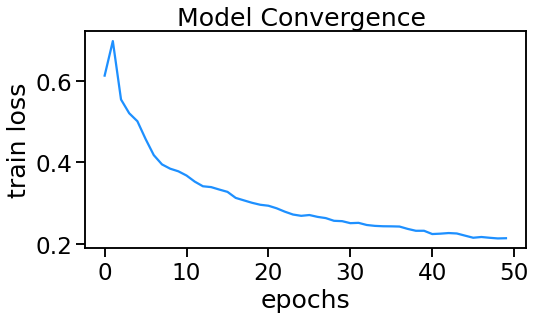

In [25]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss_arr2)),train_loss_arr2,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train loss')
plt.xlabel('epochs')
plt.tight_layout()

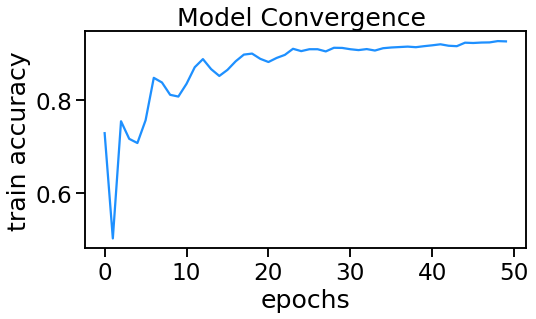

In [26]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_acc_arr2)),train_acc_arr2,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train accuracy')
plt.xlabel('epochs')
plt.tight_layout()

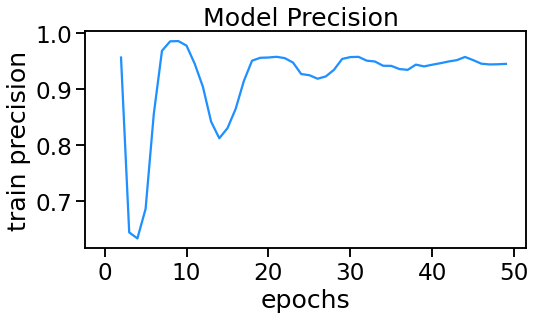

In [27]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_prec_arr2)),train_prec_arr2,color='dodgerblue')
plt.title('Model Precision ')
plt.ylabel('train precision')
plt.xlabel('epochs')
plt.tight_layout()

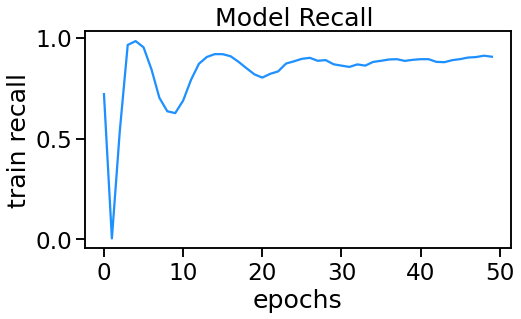

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_recall_arr2)),train_recall_arr2,color='dodgerblue')
plt.title('Model Recall ')
plt.ylabel('train recall')
plt.xlabel('epochs')
plt.tight_layout()

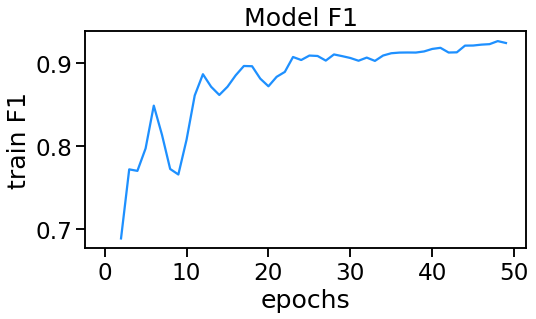

In [29]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_f1_arr2)),train_f1_arr2,color='dodgerblue')
plt.title('Model F1 ')
plt.ylabel('train F1')
plt.xlabel('epochs')
plt.tight_layout()

In [30]:
test_client_dataset1 = []
for i in range(len(test_dataset1)):
    test_client_dataset1.append((train_transforms(test_dataset1[i][0]), torch.Tensor([1,0]) if test_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))
test_client_loader1 = torch.utils.data.DataLoader(dataset=test_client_dataset1, batch_size=32)
len(test_client_loader1)

25

In [31]:
test_loss_arr2 = []
test_acc_arr2 = []
test_prec_arr2 = []
test_recall_arr2 = []
test_f1_arr2 = []

for batch_idx, (features, labels) in enumerate(test_client_loader1):
  local_loss, _tn, _fp, _fn, _tp = fl_server.train_test_model_and_get_loss(features,labels)
  _accuracy = (_tp+_tn)/(_tp+_fp+_tn+_fn)
  _precision = _tp/(_tp+_fp)
  _recall = _tp/(_tp+_fn)
  _f1 = 2/((1/_recall) + (1/_precision))
  test_loss_arr2.append(local_loss)
  test_acc_arr2.append(_accuracy)
  test_prec_arr2.append(_precision)
  test_recall_arr2.append(_recall)
  test_f1_arr2.append(_f1)
  print("Batch ", batch_idx, ". Loss: ", local_loss, ". Accuracy: ", _accuracy, ". Precision: ", _precision, ". Recall: ", _recall, ". F1-Score: ", _f1)

Batch  0 . Loss:  0.48518961668014526 . Accuracy:  0.84375 . Precision:  0.8125 . Recall:  0.8666666666666667 . F1-Score:  0.8387096774193549
Batch  1 . Loss:  0.19970011711120605 . Accuracy:  0.96875 . Precision:  1.0 . Recall:  0.9333333333333333 . F1-Score:  0.9655172413793105
Batch  2 . Loss:  0.18433953821659088 . Accuracy:  0.9375 . Precision:  0.9375 . Recall:  0.9375 . F1-Score:  0.9375
Batch  3 . Loss:  0.2621878981590271 . Accuracy:  0.90625 . Precision:  1.0 . Recall:  0.7272727272727273 . F1-Score:  0.8421052631578947
Batch  4 . Loss:  0.10989049077033997 . Accuracy:  0.9375 . Precision:  1.0 . Recall:  0.9 . F1-Score:  0.9473684210526315
Batch  5 . Loss:  0.18266770243644714 . Accuracy:  0.96875 . Precision:  1.0 . Recall:  0.9285714285714286 . F1-Score:  0.9629629629629631
Batch  6 . Loss:  0.31648215651512146 . Accuracy:  0.875 . Precision:  0.8666666666666667 . Recall:  0.8666666666666667 . F1-Score:  0.8666666666666667
Batch  7 . Loss:  0.23474641144275665 . Accuracy: 

In [32]:
# Nxet epoxhs 50

In [33]:
train_dataset1, test_dataset1 = train_test_split(image_dataset, test_size=0.2, random_state=50)
client_dataset1 = []
for i in range(len(train_dataset1)):
    client_dataset1.append((train_transforms(train_dataset1[i][0]), torch.Tensor([1,0]) if train_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))

client_loader1 = torch.utils.data.DataLoader(dataset=client_dataset1, batch_size=32)

In [34]:
# NUM OF CLIENTS = TOTAL IMAGES / BATCH SIZE
fl_server = FL_Server()
fl_iter = 50
threshold = int(len(train_dataset1) / 10)
train_loss_arr3 = []
train_acc_arr3 = []
train_prec_arr3 = []
train_recall_arr3 = []
train_f1_arr3 = []

print("FL_ITER: ", fl_iter)
print("NUM_CLIENTS_PER_FL_ITER: ", threshold)
print("Batch Idx Size: ", len(client_loader1))


for epoch in range(1, fl_iter + 1):
  global_weights = fl_server.get_weights()
  local_gradients = []
  net_loss = 0
  net_i = 0
  tn = 0
  fp = 0
  fn = 0
  tp = 0
  count=0
  _accuracy=0
  _precision=0
  _recall=0
  _f1=0

  clients_arr = []
  for batch_idx, (train_features, train_labels) in enumerate(client_loader1):
    clients_arr.append(FL_Client(train_features, train_labels))

  length=len(clients_arr)

  for j in range(length):
    fl_client=clients_arr[0]
    del clients_arr[0]
    if epoch != 1:
      fl_client.set_weights(copy.deepcopy(global_weights))
    else:
      print("Default client weights are used.")
    local_loss, _tn, _fp, _fn, _tp = fl_client.train_model()
    net_loss += local_loss
    net_i += 1
    tn += _tn
    fp += _fp
    fn += _fn
    tp += _tp
    _accuracy += (_tp+_tn)/(_tp+_fp+_tn+_fn)
    _precision += _tp/(_tp+_fp)
    _recall += _tp/(_tp+_fn)
    _f1 += 2/((1/_recall) + (1/_precision))
    count+=1
    fl_server.aggregate_grads(fl_client.get_gradients())
    print("--------Epoch ",epoch,"Client ", net_i,". Local Loss: ", local_loss, ". L-AC: ", _accuracy, ". L-P: ", _precision, ". L-R: ", _recall, ". L-F1: ", _f1)


  fl_server.update_grad_v2()
  fl_server.train_model()

  loss = net_loss / net_i
  train_loss_arr3.append(loss)
  accuracy=_accuracy/count
  precision=_precision/count
  recall=_recall/count
  f1=2/((1/recall) + (1/precision))
  train_acc_arr3.append(accuracy)
  train_prec_arr3.append(precision)
  train_recall_arr3.append(recall)
  train_f1_arr3.append(f1)

  print("Epoch ", epoch, ". Loss: ", loss, ". Accuracy: ", accuracy, ". Precision: ", precision, ". Recall: ", recall, ". F1-Score: ", f1)

FL_ITER:  50
NUM_CLIENTS_PER_FL_ITER:  320
Batch Idx Size:  100
Default client weights are used.
--------Epoch  1 Client  1 . Local Loss:  0.5921118259429932 . L-AC:  0.71875 . L-P:  0.7368421052631579 . L-R:  0.7777777777777778 . L-F1:  0.7567567567567568
Default client weights are used.
--------Epoch  1 Client  2 . Local Loss:  0.6370710134506226 . L-AC:  1.34375 . L-P:  1.42914979757085 . L-R:  1.3071895424836601 . L-F1:  2.1222085066044487
Default client weights are used.
--------Epoch  1 Client  3 . Local Loss:  0.612199068069458 . L-AC:  2.09375 . L-P:  2.2526792093355557 . L-R:  2.044031647746818 . L-F1:  4.265497989774286
Default client weights are used.
--------Epoch  1 Client  4 . Local Loss:  0.6149553656578064 . L-AC:  2.875 . L-P:  2.919345876002222 . L-R:  2.967108570823741 . L-F1:  7.208531439920421
Default client weights are used.
--------Epoch  1 Client  5 . Local Loss:  0.627829372882843 . L-AC:  3.625 . L-P:  3.6415680982244445 . L-R:  3.779608570823741 . L-F1:  10.9

--------Epoch  1 Client  44 . Local Loss:  0.6005892753601074 . L-AC:  31.0625 . L-P:  31.53415350129747 . L-R:  30.503071008798575 . L-F1:  697.1346286834987
Default client weights are used.
--------Epoch  1 Client  45 . Local Loss:  0.606336236000061 . L-AC:  31.84375 . L-P:  32.34665350129747 . L-R:  31.267776891151517 . L-F1:  728.9326952106811
Default client weights are used.
--------Epoch  1 Client  46 . Local Loss:  0.6148846745491028 . L-AC:  32.59375 . L-P:  32.84665350129747 . L-R:  32.01777689115151 . L-F1:  761.3596144655809
Default client weights are used.
--------Epoch  1 Client  47 . Local Loss:  0.6335552334785461 . L-AC:  33.375 . L-P:  33.70379635844032 . L-R:  32.72365924409269 . L-F1:  794.5661113052352
Default client weights are used.
--------Epoch  1 Client  48 . Local Loss:  0.5846930742263794 . L-AC:  34.1875 . L-P:  34.560939215583176 . L-R:  33.58080210123554 . L-F1:  828.629932915995
Default client weights are used.
--------Epoch  1 Client  49 . Local Loss:  

--------Epoch  1 Client  87 . Local Loss:  0.602886438369751 . L-AC:  63.03125 . L-P:  62.68260365365626 . L-R:  63.321963025794275 . L-F1:  2741.9706803211907
Default client weights are used.
--------Epoch  1 Client  88 . Local Loss:  0.6378359794616699 . L-AC:  63.65625 . L-P:  63.325460796513404 . L-R:  63.884463025794275 . L-F1:  2805.5744140125526
Default client weights are used.
--------Epoch  1 Client  89 . Local Loss:  0.5801940560340881 . L-AC:  64.46875 . L-P:  64.3254607965134 . L-R:  64.53152184932368 . L-F1:  2870.0027405746773
Default client weights are used.
--------Epoch  1 Client  90 . Local Loss:  0.6465567946434021 . L-AC:  65.09375 . L-P:  64.94084541189801 . L-R:  65.06485518265701 . L-F1:  2935.0055317267665
Default client weights are used.
--------Epoch  1 Client  91 . Local Loss:  0.587480902671814 . L-AC:  65.90625 . L-P:  65.70555129425095 . L-R:  65.93152184932367 . L-F1:  3000.8238743460047
Default client weights are used.
--------Epoch  1 Client  92 . Local

C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  1 . Local Loss:  0.716140866279602 . L-AC:  0.4375 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  2 . Local Loss:  0.7260704636573792 . L-AC:  0.90625 . L-P:  nan . L-R:  0.0 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)
C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  _f1 += 2/((1/_recall) + (1/_precision))


--------Epoch  2 Client  3 . Local Loss:  0.7866774797439575 . L-AC:  1.3125 . L-P:  nan . L-R:  0.0 . L-F1:  nan
--------Epoch  2 Client  4 . Local Loss:  0.6193639636039734 . L-AC:  1.9375 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  5 . Local Loss:  0.6915210485458374 . L-AC:  2.4375 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  6 . Local Loss:  0.6590150594711304 . L-AC:  3.0 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  7 . Local Loss:  0.724386990070343 . L-AC:  3.4375 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  8 . Local Loss:  0.723304033279419 . L-AC:  3.90625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  9 . Local Loss:  0.6179673671722412 . L-AC:  4.5 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  10 . Local Loss:  0.7038544416427612 . L-AC:  5.0 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  11 . Local Loss:  0.6880990862846375 . L-AC:  5.53125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  12 . Local Loss:  0.7735151052474976 . L-AC:  5.9375 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  13 . Local Loss:  0.6675503849983215 . L-AC:  6.46875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  14 . Local Loss:  0.6574912667274475 . L-AC:  6.96875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  15 . Local Loss:  0.7235186100006104 . L-AC:  7.5 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  16 . Local Loss:  0.6032090783119202 . L-AC:  8.15625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  17 . Local Loss:  0.6798261404037476 . L-AC:  8.625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  18 . Local Loss:  0.544967532157898 . L-AC:  9.3125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  19 . Local Loss:  0.6793087720870972 . L-AC:  9.875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  20 . Local Loss:  0.6070385575294495 . L-AC:  10.46875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  21 . Local Loss:  0.7689666748046875 . L-AC:  10.875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  22 . Local Loss:  0.7955023646354675 . L-AC:  11.25 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  23 . Local Loss:  0.7681811451911926 . L-AC:  11.65625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  24 . Local Loss:  0.7158809304237366 . L-AC:  12.1875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  25 . Local Loss:  0.6986881494522095 . L-AC:  12.71875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  26 . Local Loss:  0.6635680794715881 . L-AC:  13.28125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  27 . Local Loss:  0.7658741474151611 . L-AC:  13.6875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  28 . Local Loss:  0.7077130079269409 . L-AC:  14.15625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  29 . Local Loss:  0.6793845891952515 . L-AC:  14.65625 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  30 . Local Loss:  0.7286934852600098 . L-AC:  15.09375 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  31 . Local Loss:  0.7846176624298096 . L-AC:  15.53125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  32 . Local Loss:  0.6245023608207703 . L-AC:  16.125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  33 . Local Loss:  0.6138132214546204 . L-AC:  16.71875 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  34 . Local Loss:  0.6176015138626099 . L-AC:  17.28125 . L-P:  nan . L-R:  0.07692307692307693 . L-F1:  nan
--------Epoch  2 Client  35 . Local Loss:  0.7257740497589111 . L-AC:  17.75 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  36 . Local Loss:  0.8269728422164917 . L-AC:  18.09375 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  37 . Local Loss:  0.7424740791320801 . L-AC:  18.46875 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  38 . Local Loss:  0.7532543540000916 . L-AC:  18.9375 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  39 . Local Loss:  0.7840944528579712 . L-AC:  19.34375 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  40 . Local Loss:  0.6606897115707397 . L-AC:  19.875 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  41 . Local Loss:  0.7652087211608887 . L-AC:  20.28125 . L-P:  nan . L-R:  0.13247863247863248 . L-F1:  nan
--------Epoch  2 Client  42 . Local Loss:  0.7345865964889526 . L-AC:  20.78125 . L-P:  nan . L-R:  0.19130216189039717 . L-F1:  nan
--------Epoch  2 Client  43 . Local Loss:  0.7017635703086853 . L-AC:  21.3125 . L-P:  nan . L-R:  0.25380216189039717 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  44 . Local Loss:  0.7214123606681824 . L-AC:  21.75 . L-P:  nan . L-R:  0.25380216189039717 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  45 . Local Loss:  0.7448834776878357 . L-AC:  22.21875 . L-P:  nan . L-R:  0.25380216189039717 . L-F1:  nan
--------Epoch  2 Client  46 . Local Loss:  0.49051839113235474 . L-AC:  23.0 . L-P:  nan . L-R:  0.37880216189039717 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  47 . Local Loss:  0.7837249040603638 . L-AC:  23.46875 . L-P:  nan . L-R:  0.37880216189039717 . L-F1:  nan
--------Epoch  2 Client  48 . Local Loss:  0.7777363657951355 . L-AC:  23.84375 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  49 . Local Loss:  0.7839081287384033 . L-AC:  24.25 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  50 . Local Loss:  0.6831639409065247 . L-AC:  24.84375 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  51 . Local Loss:  0.6133749485015869 . L-AC:  25.46875 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  52 . Local Loss:  0.6122742295265198 . L-AC:  26.0625 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  53 . Local Loss:  0.7421561479568481 . L-AC:  26.46875 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  54 . Local Loss:  0.747654914855957 . L-AC:  26.875 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  55 . Local Loss:  0.8087999224662781 . L-AC:  27.21875 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  56 . Local Loss:  0.6689875721931458 . L-AC:  27.78125 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  57 . Local Loss:  0.6494049429893494 . L-AC:  28.34375 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  58 . Local Loss:  0.6403407454490662 . L-AC:  28.90625 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  59 . Local Loss:  0.777092456817627 . L-AC:  29.3125 . L-P:  nan . L-R:  0.4264212095094448 . L-F1:  nan
--------Epoch  2 Client  60 . Local Loss:  0.69260573387146 . L-AC:  29.78125 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  61 . Local Loss:  0.6965525150299072 . L-AC:  30.3125 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  62 . Local Loss:  0.7306989431381226 . L-AC:  30.78125 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  63 . Local Loss:  0.7177152037620544 . L-AC:  31.28125 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  64 . Local Loss:  0.6351914405822754 . L-AC:  31.875 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  65 . Local Loss:  0.6373593807220459 . L-AC:  32.4375 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  66 . Local Loss:  0.5809869766235352 . L-AC:  33.125 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  67 . Local Loss:  0.7667742967605591 . L-AC:  33.5625 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  68 . Local Loss:  0.6873117685317993 . L-AC:  34.0625 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  69 . Local Loss:  0.8011288046836853 . L-AC:  34.46875 . L-P:  nan . L-R:  0.4819767650650003 . L-F1:  nan
--------Epoch  2 Client  70 . Local Loss:  0.5895531177520752 . L-AC:  35.09375 . L-P:  nan . L-R:  0.5588998419880773 . L-F1:  nan
--------Epoch  2 Client  71 . Local Loss:  0.5895323157310486 . L-AC:  35.75 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  72 . Local Loss:  0.72416090965271 . L-AC:  36.1875 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  73 . Local Loss:  0.7609310150146484 . L-AC:  36.625 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  74 . Local Loss:  0.6138264536857605 . L-AC:  37.21875 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  75 . Local Loss:  0.7502787113189697 . L-AC:  37.65625 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  76 . Local Loss:  0.6468248963356018 . L-AC:  38.21875 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  77 . Local Loss:  0.6959300637245178 . L-AC:  38.75 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  78 . Local Loss:  0.6322821974754333 . L-AC:  39.34375 . L-P:  nan . L-R:  0.6422331753214107 . L-F1:  nan
--------Epoch  2 Client  79 . Local Loss:  0.6982983946800232 . L-AC:  39.84375 . L-P:  nan . L-R:  0.7010567047331754 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  80 . Local Loss:  0.649662435054779 . L-AC:  40.40625 . L-P:  nan . L-R:  0.7010567047331754 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  81 . Local Loss:  0.6843494772911072 . L-AC:  40.9375 . L-P:  nan . L-R:  0.7010567047331754 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  82 . Local Loss:  0.6867047548294067 . L-AC:  41.53125 . L-P:  nan . L-R:  0.7010567047331754 . L-F1:  nan
--------Epoch  2 Client  83 . Local Loss:  0.7491319179534912 . L-AC:  41.96875 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  84 . Local Loss:  0.6378464698791504 . L-AC:  42.5625 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  85 . Local Loss:  0.7488793730735779 . L-AC:  43.0 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  86 . Local Loss:  0.755176305770874 . L-AC:  43.40625 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  87 . Local Loss:  0.7565180659294128 . L-AC:  43.8125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  88 . Local Loss:  0.6795217990875244 . L-AC:  44.3125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  89 . Local Loss:  0.7552661299705505 . L-AC:  44.78125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  90 . Local Loss:  0.6798659563064575 . L-AC:  45.3125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  91 . Local Loss:  0.681630551815033 . L-AC:  45.84375 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  92 . Local Loss:  0.731820821762085 . L-AC:  46.28125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  93 . Local Loss:  0.604981005191803 . L-AC:  46.90625 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  94 . Local Loss:  0.7255532145500183 . L-AC:  47.34375 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  95 . Local Loss:  0.7169249057769775 . L-AC:  47.84375 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  96 . Local Loss:  0.7226492166519165 . L-AC:  48.28125 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  97 . Local Loss:  0.6315211653709412 . L-AC:  48.875 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  98 . Local Loss:  0.6639318466186523 . L-AC:  49.4375 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  99 . Local Loss:  0.6238123178482056 . L-AC:  50.09375 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan


C:\Users\User\AppData\Local\Temp\ipykernel_7200\1461301491.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
  _precision += _tp/(_tp+_fp)


--------Epoch  2 Client  100 . Local Loss:  0.8468624949455261 . L-AC:  50.40625 . L-P:  nan . L-R:  0.7536882836805439 . L-F1:  nan
parameters trained: 4
Epoch  2 . Loss:  0.6984661877155304 . Accuracy:  0.5040625 . Precision:  nan . Recall:  0.007536882836805438 . F1-Score:  nan
--------Epoch  3 Client  1 . Local Loss:  0.5027590990066528 . L-AC:  0.78125 . L-P:  1.0 . L-R:  0.6111111111111112 . L-F1:  0.7586206896551725
--------Epoch  3 Client  2 . Local Loss:  0.5467296838760376 . L-AC:  1.53125 . L-P:  2.0 . L-R:  1.1405228758169934 . L-F1:  2.2112741756073055
--------Epoch  3 Client  3 . Local Loss:  0.597149133682251 . L-AC:  2.21875 . L-P:  3.0 . L-R:  1.6142070863433091 . L-F1:  4.310278909643911
--------Epoch  3 Client  4 . Local Loss:  0.5301368236541748 . L-AC:  3.0 . L-P:  3.875 . L-R:  2.1526686248048477 . L-F1:  7.078045832593778
--------Epoch  3 Client  5 . Local Loss:  0.5892729163169861 . L-AC:  3.6875 . L-P:  4.875 . L-R:  2.5276686248048477 . L-F1:  10.4072194510464

--------Epoch  3 Client  52 . Local Loss:  0.47968268394470215 . L-AC:  38.375 . L-P:  50.611172161172156 . L-R:  25.57220836868669 . L-F1:  894.6028442770881
--------Epoch  3 Client  53 . Local Loss:  0.6050260663032532 . L-AC:  38.96875 . L-P:  51.486172161172156 . L-R:  25.94062942131827 . L-F1:  929.102105128829
--------Epoch  3 Client  54 . Local Loss:  0.5683449506759644 . L-AC:  39.5625 . L-P:  52.361172161172156 . L-R:  26.30905047394985 . L-F1:  964.1235573408745
--------Epoch  3 Client  55 . Local Loss:  0.525681734085083 . L-AC:  40.40625 . L-P:  53.361172161172156 . L-R:  27.070955235854612 . L-F1:  1000.0429828156562
--------Epoch  3 Client  56 . Local Loss:  0.5655720829963684 . L-AC:  41.15625 . L-P:  54.236172161172156 . L-R:  27.570955235854612 . L-F1:  1036.6007528388616
--------Epoch  3 Client  57 . Local Loss:  0.5209310054779053 . L-AC:  42.03125 . L-P:  55.236172161172156 . L-R:  28.285240950140327 . L-F1:  1074.0131571682748
--------Epoch  3 Client  58 . Local Lo

--------Epoch  4 Client  3 . Local Loss:  0.5328452587127686 . L-AC:  2.28125 . L-P:  2.1557971014492754 . L-R:  2.8391812865497075 . L-F1:  4.919810086239917
--------Epoch  4 Client  4 . Local Loss:  0.5204577445983887 . L-AC:  2.96875 . L-P:  2.7272256728778466 . L-R:  3.762258209626631 . L-F1:  8.08201138392751
--------Epoch  4 Client  5 . Local Loss:  0.5557620525360107 . L-AC:  3.625 . L-P:  3.3272256728778467 . L-R:  4.699758209626631 . L-F1:  11.978158778834011
--------Epoch  4 Client  6 . Local Loss:  0.5503259301185608 . L-AC:  4.3125 . L-P:  3.91055900621118 . L-R:  5.699758209626631 . L-F1:  16.616765455239833
--------Epoch  4 Client  7 . Local Loss:  0.4938250184059143 . L-AC:  5.125 . L-P:  4.66055900621118 . L-R:  6.699758209626631 . L-F1:  22.11390393651065
--------Epoch  4 Client  8 . Local Loss:  0.569209098815918 . L-AC:  5.78125 . L-P:  5.267701863354037 . L-R:  7.699758209626631 . L-F1:  28.36956702549716
--------Epoch  4 Client  9 . Local Loss:  0.5557712316513062 

--------Epoch  4 Client  55 . Local Loss:  0.41820842027664185 . L-AC:  40.09375 . L-P:  36.35609872181382 . L-R:  52.52523484427507 . L-F1:  1190.5706674303897
--------Epoch  4 Client  56 . Local Loss:  0.5788770914077759 . L-AC:  40.71875 . L-P:  36.89456026027536 . L-R:  53.52523484427507 . L-F1:  1234.251146912213
--------Epoch  4 Client  57 . Local Loss:  0.5160365700721741 . L-AC:  41.375 . L-P:  37.454560260275365 . L-R:  54.52523484427507 . L-F1:  1278.656957815776
--------Epoch  4 Client  58 . Local Loss:  0.5063794255256653 . L-AC:  42.125 . L-P:  38.090923896639 . L-R:  55.52523484427507 . L-F1:  1323.8416251476121
--------Epoch  4 Client  59 . Local Loss:  0.5176948308944702 . L-AC:  42.875 . L-P:  38.83005433142161 . L-R:  56.41997168638033 . L-F1:  1369.8424643610306
--------Epoch  4 Client  60 . Local Loss:  0.46113353967666626 . L-AC:  43.71875 . L-P:  39.61266302707378 . L-R:  57.41997168638033 . L-F1:  1416.7247941288178
--------Epoch  4 Client  61 . Local Loss:  0.57

--------Epoch  5 Client  6 . Local Loss:  0.5535602569580078 . L-AC:  4.28125 . L-P:  3.8640307196828934 . L-R:  5.817813765182186 . L-F1:  16.62225183314237
--------Epoch  5 Client  7 . Local Loss:  0.46561187505722046 . L-AC:  5.0625 . L-P:  4.603161154465502 . L-R:  6.762258209626631 . L-F1:  22.099878889362344
--------Epoch  5 Client  8 . Local Loss:  0.5547861456871033 . L-AC:  5.78125 . L-P:  5.257007308311656 . L-R:  7.762258209626631 . L-F1:  28.368473393527793
--------Epoch  5 Client  9 . Local Loss:  0.5175880789756775 . L-AC:  6.59375 . L-P:  5.941217834627445 . L-R:  8.76225820962663 . L-F1:  35.44958599437952
--------Epoch  5 Client  10 . Local Loss:  0.5089006423950195 . L-AC:  7.25 . L-P:  6.533810427220038 . L-R:  9.76225820962663 . L-F1:  43.277823086981186
--------Epoch  5 Client  11 . Local Loss:  0.5689457058906555 . L-AC:  7.84375 . L-P:  7.0695247129343235 . L-R:  10.76225820962663 . L-F1:  51.81135567991932
--------Epoch  5 Client  12 . Local Loss:  0.48169359564

--------Epoch  5 Client  58 . Local Loss:  0.49656015634536743 . L-AC:  41.5 . L-P:  37.284931501297116 . L-R:  57.030500979069075 . L-F1:  1328.1569328171088
--------Epoch  5 Client  59 . Local Loss:  0.5116109251976013 . L-AC:  42.28125 . L-P:  38.034931501297116 . L-R:  57.977869400121705 . L-F1:  1374.0921470910669
--------Epoch  5 Client  60 . Local Loss:  0.4276639521121979 . L-AC:  43.15625 . L-P:  38.853113319478936 . L-R:  58.977869400121705 . L-F1:  1420.9377123597321
--------Epoch  5 Client  61 . Local Loss:  0.5578246116638184 . L-AC:  43.8125 . L-P:  39.43644665281227 . L-R:  59.911202733455035 . L-F1:  1468.5016953044621
--------Epoch  5 Client  62 . Local Loss:  0.44292929768562317 . L-AC:  44.59375 . L-P:  40.14477998614561 . L-R:  60.911202733455035 . L-F1:  1516.8959964951384
--------Epoch  5 Client  63 . Local Loss:  0.47707000374794006 . L-AC:  45.3125 . L-P:  40.78477998614561 . L-R:  61.911202733455035 . L-F1:  1566.0709440499213
--------Epoch  5 Client  64 . Loca

--------Epoch  6 Client  9 . Local Loss:  0.4698958992958069 . L-AC:  6.84375 . L-P:  6.199278849879873 . L-R:  8.552856500224921 . L-F1:  36.059341955692304
--------Epoch  6 Client  10 . Local Loss:  0.4487704038619995 . L-AC:  7.59375 . L-P:  6.86594551654654 . L-R:  9.552856500224921 . L-F1:  44.04888859751594
--------Epoch  6 Client  11 . Local Loss:  0.5153558850288391 . L-AC:  8.28125 . L-P:  7.465945516546539 . L-R:  10.552856500224921 . L-F1:  52.79387082233646
--------Epoch  6 Client  12 . Local Loss:  0.468091756105423 . L-AC:  9.0625 . L-P:  8.21594551654654 . L-R:  11.500224921277553 . L-F1:  62.37841176340926
--------Epoch  6 Client  13 . Local Loss:  0.400973916053772 . L-AC:  9.90625 . L-P:  8.96594551654654 . L-R:  12.500224921277553 . L-F1:  72.82054776651017
--------Epoch  6 Client  14 . Local Loss:  0.40971624851226807 . L-AC:  10.6875 . L-P:  9.661597690459583 . L-R:  13.500224921277553 . L-F1:  84.08336970471149
--------Epoch  6 Client  15 . Local Loss:  0.53420424

--------Epoch  6 Client  61 . Local Loss:  0.5149833559989929 . L-AC:  46.84375 . L-P:  42.24664154529009 . L-R:  59.06835504107173 . L-F1:  1518.9715171077178
--------Epoch  6 Client  62 . Local Loss:  0.39739713072776794 . L-AC:  47.65625 . L-P:  42.9857719800727 . L-R:  60.06835504107173 . L-F1:  1569.082748703203
--------Epoch  6 Client  63 . Local Loss:  0.41743844747543335 . L-AC:  48.40625 . L-P:  43.65243864673936 . L-R:  61.06835504107173 . L-F1:  1619.9949415506862
--------Epoch  6 Client  64 . Local Loss:  0.49821197986602783 . L-AC:  49.0625 . L-P:  44.19789319219391 . L-R:  61.99143196414865 . L-F1:  1671.5988232920695
--------Epoch  6 Client  65 . Local Loss:  0.4507448375225067 . L-AC:  49.84375 . L-P:  44.864559858860574 . L-R:  62.99143196414865 . L-F1:  1724.0035682150676
--------Epoch  6 Client  66 . Local Loss:  0.49741441011428833 . L-AC:  50.46875 . L-P:  45.31910531340603 . L-R:  63.99143196414865 . L-F1:  1777.0640419180797
--------Epoch  6 Client  67 . Local Lo

--------Epoch  7 Client  12 . Local Loss:  0.4593557119369507 . L-AC:  10.125 . L-P:  10.197556390977443 . L-R:  10.081324729621944 . L-F1:  66.1062212039402
--------Epoch  7 Client  13 . Local Loss:  0.3424072861671448 . L-AC:  11.0625 . L-P:  11.079909332153914 . L-R:  11.081324729621944 . L-F1:  77.1868381896287
--------Epoch  7 Client  14 . Local Loss:  0.35835397243499756 . L-AC:  11.90625 . L-P:  11.86938301636444 . L-R:  12.018824729621944 . L-F1:  89.1304746180589
--------Epoch  7 Client  15 . Local Loss:  0.5130702257156372 . L-AC:  12.6875 . L-P:  12.655097302078726 . L-R:  12.752158062955276 . L-F1:  101.83391690488544
--------Epoch  7 Client  16 . Local Loss:  0.4521234631538391 . L-AC:  13.53125 . L-P:  13.36938301636444 . L-R:  13.661248972046184 . L-F1:  115.34765717314912
--------Epoch  7 Client  17 . Local Loss:  0.34603893756866455 . L-AC:  14.4375 . L-P:  14.258271905253329 . L-R:  14.60242544263442 . L-F1:  129.77595389291002
--------Epoch  7 Client  18 . Local Loss

--------Epoch  7 Client  64 . Local Loss:  0.4523153603076935 . L-AC:  54.3125 . L-P:  53.441301682456256 . L-R:  55.76311520436904 . L-F1:  1780.1643373280097
--------Epoch  7 Client  65 . Local Loss:  0.3849465847015381 . L-AC:  55.21875 . L-P:  54.364378605533176 . L-R:  56.6202580615119 . L-F1:  1835.6337291003758
--------Epoch  7 Client  66 . Local Loss:  0.41101527214050293 . L-AC:  56.125 . L-P:  55.182560423714996 . L-R:  57.520258061511896 . L-F1:  1891.9608939171655
--------Epoch  7 Client  67 . Local Loss:  0.403908908367157 . L-AC:  56.9375 . L-P:  56.057560423714996 . L-R:  58.298035839289675 . L-F1:  1949.1167441499563
--------Epoch  7 Client  68 . Local Loss:  0.37778499722480774 . L-AC:  57.8125 . L-P:  56.932560423714996 . L-R:  59.173035839289675 . L-F1:  2007.1479251921478
--------Epoch  7 Client  69 . Local Loss:  0.4288214147090912 . L-AC:  58.6875 . L-P:  57.827297265820256 . L-R:  60.067772681394935 . L-F1:  2066.074171192052
--------Epoch  7 Client  70 . Local L

--------Epoch  8 Client  15 . Local Loss:  0.46251755952835083 . L-AC:  12.5625 . L-P:  14.662820512820513 . L-R:  10.423237297618101 . L-F1:  97.57711962552803
--------Epoch  8 Client  16 . Local Loss:  0.40732648968696594 . L-AC:  13.5 . L-P:  15.571911421911421 . L-R:  11.33232820670901 . L-F1:  110.69520164344006
--------Epoch  8 Client  17 . Local Loss:  0.3126363456249237 . L-AC:  14.40625 . L-P:  16.571911421911423 . L-R:  12.155857618473716 . L-F1:  124.71966664296882
--------Epoch  8 Client  18 . Local Loss:  0.35432523488998413 . L-AC:  15.28125 . L-P:  17.571911421911423 . L-R:  12.755857618473716 . L-F1:  139.50115616723008
--------Epoch  8 Client  19 . Local Loss:  0.3661338984966278 . L-AC:  16.09375 . L-P:  18.571911421911423 . L-R:  13.327286189902287 . L-F1:  155.01961413130522
--------Epoch  8 Client  20 . Local Loss:  0.28736430406570435 . L-AC:  17.0 . L-P:  19.48857808857809 . L-R:  14.173440036056133 . L-F1:  171.43100051365155
--------Epoch  8 Client  21 . Local 

--------Epoch  8 Client  67 . Local Loss:  0.4087153375148773 . L-AC:  56.84375 . L-P:  64.74781607281606 . L-R:  48.895167998496184 . L-F1:  1877.7218508921258
--------Epoch  8 Client  68 . Local Loss:  0.33255428075790405 . L-AC:  57.71875 . L-P:  65.6763875013875 . L-R:  49.707667998496184 . L-F1:  1934.3088732691099
--------Epoch  8 Client  69 . Local Loss:  0.4534567892551422 . L-AC:  58.5 . L-P:  66.5513875013875 . L-R:  50.44451010375934 . L-F1:  1991.6981015745862
--------Epoch  8 Client  70 . Local Loss:  0.3191700577735901 . L-AC:  59.375 . L-P:  67.5513875013875 . L-R:  51.136817796067035 . L-F1:  2049.907137356578
--------Epoch  8 Client  71 . Local Loss:  0.38684335350990295 . L-AC:  60.34375 . L-P:  68.47446442446441 . L-R:  52.136817796067035 . L-F1:  2109.106253884565
--------Epoch  8 Client  72 . Local Loss:  0.4170573949813843 . L-AC:  61.125 . L-P:  69.39754134754133 . L-R:  52.8034844627337 . L-F1:  2169.0800875246537
--------Epoch  8 Client  73 . Local Loss:  0.360

--------Epoch  9 Client  19 . Local Loss:  0.3268030881881714 . L-AC:  15.4375 . L-P:  18.816666666666666 . L-R:  11.71394805744651 . L-F1:  146.52244342432354
--------Epoch  9 Client  20 . Local Loss:  0.25223058462142944 . L-AC:  16.375 . L-P:  19.816666666666666 . L-R:  12.560101903600357 . L-F1:  161.89762530406114
--------Epoch  9 Client  21 . Local Loss:  0.5253633260726929 . L-AC:  17.03125 . L-P:  20.816666666666666 . L-R:  12.981154535179304 . L-F1:  177.88826359364157
--------Epoch  9 Client  22 . Local Loss:  0.40461722016334534 . L-AC:  17.78125 . L-P:  21.816666666666666 . L-R:  13.581154535179303 . L-F1:  194.62915392996788
--------Epoch  9 Client  23 . Local Loss:  0.3113326132297516 . L-AC:  18.65625 . L-P:  22.816666666666666 . L-R:  14.370628219389829 . L-F1:  212.26366242955518
--------Epoch  9 Client  24 . Local Loss:  0.43262767791748047 . L-AC:  19.46875 . L-P:  23.816666666666666 . L-R:  14.970628219389829 . L-F1:  230.64857239242946
--------Epoch  9 Client  25 .

--------Epoch  9 Client  71 . Local Loss:  0.3567238748073578 . L-AC:  57.375 . L-P:  69.71105977355977 . L-R:  44.91575220015622 . L-F1:  1960.569488810321
--------Epoch  9 Client  72 . Local Loss:  0.40856295824050903 . L-AC:  58.125 . L-P:  70.71105977355977 . L-R:  45.47130775571178 . L-F1:  2015.9190987222723
--------Epoch  9 Client  73 . Local Loss:  0.3717527985572815 . L-AC:  58.9375 . L-P:  71.6396312021312 . L-R:  46.193529977934 . L-F1:  2072.088133286095
--------Epoch  9 Client  74 . Local Loss:  0.30912262201309204 . L-AC:  59.84375 . L-P:  72.55629786879787 . L-R:  47.039683824087845 . L-F1:  2129.164052775748
--------Epoch  9 Client  75 . Local Loss:  0.3766612708568573 . L-AC:  60.625 . L-P:  73.55629786879787 . L-R:  47.65079493519896 . L-F1:  2186.999217118918
--------Epoch  9 Client  76 . Local Loss:  0.359179824590683 . L-AC:  61.46875 . L-P:  74.55629786879787 . L-R:  48.293652078056105 . L-F1:  2245.6170010262176
--------Epoch  9 Client  77 . Local Loss:  0.396748

--------Epoch  10 Client  24 . Local Loss:  0.41191697120666504 . L-AC:  19.40625 . L-P:  23.741176470588233 . L-R:  14.902528671878516 . L-F1:  227.94761941465177
--------Epoch  10 Client  25 . Local Loss:  0.38136589527130127 . L-AC:  20.21875 . L-P:  24.741176470588233 . L-R:  15.502528671878515 . L-F1:  247.0090252297223
--------Epoch  10 Client  26 . Local Loss:  0.32707077264785767 . L-AC:  21.09375 . L-P:  25.741176470588233 . L-R:  16.21681438616423 . L-F1:  266.9070171202395
--------Epoch  10 Client  27 . Local Loss:  0.511776864528656 . L-AC:  21.75 . L-P:  26.64117647058823 . L-R:  16.690498596690546 . L-F1:  287.4303187376428
--------Epoch  10 Client  28 . Local Loss:  0.40138182044029236 . L-AC:  22.5625 . L-P:  27.64117647058823 . L-R:  17.33755742021996 . L-F1:  308.73952167717647
--------Epoch  10 Client  29 . Local Loss:  0.32655754685401917 . L-AC:  23.375 . L-P:  28.64117647058823 . L-R:  17.96255742021996 . L-F1:  330.81795763001173
--------Epoch  10 Client  30 . Lo

--------Epoch  10 Client  76 . Local Loss:  0.3669583797454834 . L-AC:  61.8125 . L-P:  75.15614344805519 . L-R:  48.51623474135085 . L-F1:  2246.580653331955
--------Epoch  10 Client  77 . Local Loss:  0.402892529964447 . L-AC:  62.625 . L-P:  76.0652343571461 . L-R:  49.182901408017514 . L-F1:  2306.3198087151495
--------Epoch  10 Client  78 . Local Loss:  0.3055967688560486 . L-AC:  63.5 . L-P:  76.974325266237 . L-R:  49.95213217724828 . L-F1:  2366.906572852415
--------Epoch  10 Client  79 . Local Loss:  0.33281493186950684 . L-AC:  64.375 . L-P:  77.974325266237 . L-R:  50.71683805960122 . L-F1:  2428.365512613828
--------Epoch  10 Client  80 . Local Loss:  0.3834931254386902 . L-AC:  65.21875 . L-P:  78.82047911239084 . L-R:  51.50255234531551 . L-F1:  2490.663877008247
--------Epoch  10 Client  81 . Local Loss:  0.40988627076148987 . L-AC:  65.90625 . L-P:  79.82047911239084 . L-R:  51.83588567864884 . L-F1:  2553.5178869401157
--------Epoch  10 Client  82 . Local Loss:  0.4881

--------Epoch  11 Client  29 . Local Loss:  0.30294284224510193 . L-AC:  24.09375 . L-P:  28.86425339366516 . L-R:  19.264247044665 . L-F1:  348.0976763293937
--------Epoch  11 Client  30 . Local Loss:  0.30640554428100586 . L-AC:  24.9375 . L-P:  29.86425339366516 . L-R:  19.986469266887223 . L-F1:  372.04440972763757
--------Epoch  11 Client  31 . Local Loss:  0.49162790179252625 . L-AC:  25.75 . L-P:  30.792824822236586 . L-R:  20.708691489109444 . L-F1:  396.8079178724028
--------Epoch  11 Client  32 . Local Loss:  0.3378879427909851 . L-AC:  26.625 . L-P:  31.792824822236586 . L-R:  21.400999181417138 . L-F1:  422.38976804917854
--------Epoch  11 Client  33 . Local Loss:  0.27992528676986694 . L-AC:  27.53125 . L-P:  32.709491488903254 . L-R:  22.247153027570985 . L-F1:  448.872209581413
--------Epoch  11 Client  34 . Local Loss:  0.28046292066574097 . L-AC:  28.40625 . L-P:  33.709491488903254 . L-R:  22.9614387418567 . L-F1:  476.18845163672586
--------Epoch  11 Client  35 . Loc

--------Epoch  11 Client  81 . Local Loss:  0.387458473443985 . L-AC:  67.59375 . L-P:  79.78914516855696 . L-R:  55.391246859435704 . L-F1:  2665.0931039669144
--------Epoch  11 Client  82 . Local Loss:  0.4819905757904053 . L-AC:  68.34375 . L-P:  80.78914516855696 . L-R:  55.77586224405109 . L-F1:  2731.0848879108307
--------Epoch  11 Client  83 . Local Loss:  0.33239179849624634 . L-AC:  69.125 . L-P:  81.71771659712839 . L-R:  56.46007277036688 . L-F1:  2797.8653487478664
--------Epoch  11 Client  84 . Local Loss:  0.30598846077919006 . L-AC:  70.09375 . L-P:  82.71771659712839 . L-R:  57.3831496934438 . L-F1:  2865.625145520976
--------Epoch  11 Client  85 . Local Loss:  0.4888167977333069 . L-AC:  70.84375 . L-P:  83.71771659712839 . L-R:  57.938705248999355 . L-F1:  2934.10769001598
--------Epoch  11 Client  86 . Local Loss:  0.34285828471183777 . L-AC:  71.71875 . L-P:  84.65889306771662 . L-R:  58.78081051215725 . L-F1:  3003.493198036239
--------Epoch  11 Client  87 . Local 

--------Epoch  12 Client  32 . Local Loss:  0.3507872223854065 . L-AC:  27.65625 . L-P:  30.900396095132937 . L-R:  24.300700615174307 . L-F1:  445.53864550454506
--------Epoch  12 Client  33 . Local Loss:  0.27456584572792053 . L-AC:  28.59375 . L-P:  31.900396095132937 . L-R:  25.146854461328154 . L-F1:  473.66251159933876
--------Epoch  12 Client  34 . Local Loss:  0.28039366006851196 . L-AC:  29.5 . L-P:  32.90039609513293 . L-R:  25.93256874704244 . L-F1:  502.66637995208026
--------Epoch  12 Client  35 . Local Loss:  0.3786318600177765 . L-AC:  30.375 . L-P:  33.90039609513293 . L-R:  26.710346524820217 . L-F1:  532.5452855021197
--------Epoch  12 Client  36 . Local Loss:  0.3644567131996155 . L-AC:  31.21875 . L-P:  34.90039609513293 . L-R:  27.47225128672498 . L-F1:  563.2892892209873
--------Epoch  12 Client  37 . Local Loss:  0.28633221983909607 . L-AC:  32.0625 . L-P:  35.90039609513293 . L-R:  28.22225128672498 . L-F1:  594.8909164543776
--------Epoch  12 Client  38 . Local

--------Epoch  12 Client  84 . Local Loss:  0.28374183177948 . L-AC:  72.71875 . L-P:  80.48050138715767 . L-R:  64.52910595166784 . L-F1:  3035.1348112715514
--------Epoch  12 Client  85 . Local Loss:  0.4489462673664093 . L-AC:  73.53125 . L-P:  81.48050138715767 . L-R:  65.19577261833452 . L-F1:  3107.5689425212463
--------Epoch  12 Client  86 . Local Loss:  0.32985734939575195 . L-AC:  74.4375 . L-P:  82.48050138715767 . L-R:  66.0378778814924 . L-F1:  3180.9179422212333
--------Epoch  12 Client  87 . Local Loss:  0.27525609731674194 . L-AC:  75.34375 . L-P:  83.48050138715767 . L-R:  66.8799831446503 . L-F1:  3255.1817960930125
--------Epoch  12 Client  88 . Local Loss:  0.4204210340976715 . L-AC:  76.1875 . L-P:  84.4035783102346 . L-R:  67.6299831446503 . L-F1:  3330.273276208911
--------Epoch  12 Client  89 . Local Loss:  0.3769373595714569 . L-AC:  77.03125 . L-P:  85.4035783102346 . L-R:  68.33586549759147 . L-F1:  3406.1955938116253
--------Epoch  12 Client  90 . Local Loss:

--------Epoch  13 Client  35 . Local Loss:  0.3868822157382965 . L-AC:  31.25 . L-P:  32.49893056290115 . L-R:  29.66590706764855 . L-F1:  557.1508185103688
--------Epoch  13 Client  36 . Local Loss:  0.35152143239974976 . L-AC:  32.09375 . L-P:  33.39893056290115 . L-R:  30.523049924791408 . L-F1:  589.0471151278479
--------Epoch  13 Client  37 . Local Loss:  0.2668295204639435 . L-AC:  33.03125 . L-P:  34.39893056290115 . L-R:  31.423049924791407 . L-F1:  621.8908340323433
--------Epoch  13 Client  38 . Local Loss:  0.41400718688964844 . L-AC:  33.90625 . L-P:  35.33226389623448 . L-R:  32.24657933655611 . L-F1:  655.609808680824
--------Epoch  13 Client  39 . Local Loss:  0.3521152436733246 . L-AC:  34.78125 . L-P:  36.27344036682271 . L-R:  33.08868459971401 . L-F1:  690.2177572759219
--------Epoch  13 Client  40 . Local Loss:  0.4199247658252716 . L-AC:  35.5625 . L-P:  37.10677370015605 . L-R:  33.75535126638067 . L-F1:  725.5695670389613
--------Epoch  13 Client  41 . Local Loss

--------Epoch  13 Client  87 . Local Loss:  0.28530681133270264 . L-AC:  77.1875 . L-P:  79.62443935923031 . L-R:  74.21650792877568 . L-F1:  3384.183110217419
--------Epoch  13 Client  88 . Local Loss:  0.4226098358631134 . L-AC:  78.0625 . L-P:  80.55301078780174 . L-R:  75.02900792877568 . L-F1:  3461.876053591482
--------Epoch  13 Client  89 . Local Loss:  0.42103686928749084 . L-AC:  78.90625 . L-P:  81.48158221637317 . L-R:  75.79371381112863 . L-F1:  3540.4108505923514
--------Epoch  13 Client  90 . Local Loss:  0.39105987548828125 . L-AC:  79.78125 . L-P:  82.30511162813788 . L-R:  76.72704714446196 . L-F1:  3619.829104470829
--------Epoch  13 Client  91 . Local Loss:  0.3937109708786011 . L-AC:  80.65625 . L-P:  83.12864103990259 . L-R:  77.6603804777953 . L-F1:  3700.1306304186105
--------Epoch  13 Client  92 . Local Loss:  0.34771668910980225 . L-AC:  81.53125 . L-P:  84.12864103990259 . L-R:  78.43815825557307 . L-F1:  3781.3144353321863
--------Epoch  13 Client  93 . Local

--------Epoch  14 Client  38 . Local Loss:  0.3906906545162201 . L-AC:  33.3125 . L-P:  32.75821282260911 . L-R:  34.16425405949399 . L-F1:  648.7769579124097
--------Epoch  14 Client  39 . Local Loss:  0.38084229826927185 . L-AC:  34.15625 . L-P:  33.57639464079093 . L-R:  35.11162248054662 . L-F1:  683.1038097358575
--------Epoch  14 Client  40 . Local Loss:  0.4096487760543823 . L-AC:  34.96875 . L-P:  34.37639464079093 . L-R:  35.91162248054662 . L-F1:  718.2310521063811
--------Epoch  14 Client  41 . Local Loss:  0.3540196418762207 . L-AC:  35.875 . L-P:  35.276394640790926 . L-R:  36.85899090159925 . L-F1:  754.2813843900298
--------Epoch  14 Client  42 . Local Loss:  0.3799418807029724 . L-AC:  36.6875 . L-P:  36.14306130745759 . L-R:  37.62369678395219 . L-F1:  791.1499038874031
--------Epoch  14 Client  43 . Local Loss:  0.290692001581192 . L-AC:  37.65625 . L-P:  37.084237778045825 . L-R:  38.62369678395219 . L-F1:  828.9882193477272
--------Epoch  14 Client  44 . Local Loss:

--------Epoch  14 Client  90 . Local Loss:  0.3613012135028839 . L-AC:  78.3125 . L-P:  76.31998048409912 . L-R:  81.24186291005172 . L-F1:  3588.0549049720184
--------Epoch  14 Client  91 . Local Loss:  0.38749295473098755 . L-AC:  79.125 . L-P:  77.08468636645206 . L-R:  82.10852957671838 . L-F1:  3667.5722413476005
--------Epoch  14 Client  92 . Local Loss:  0.32499903440475464 . L-AC:  80.0 . L-P:  78.02218636645206 . L-R:  82.94186291005171 . L-F1:  3747.9790839268694
--------Epoch  14 Client  93 . Local Loss:  0.32711872458457947 . L-AC:  80.875 . L-P:  78.85551969978539 . L-R:  83.77519624338504 . L-F1:  3829.2200303177356
--------Epoch  14 Client  94 . Local Loss:  0.337813138961792 . L-AC:  81.78125 . L-P:  79.85551969978539 . L-R:  84.60852957671837 . L-F1:  3911.383373979842
--------Epoch  14 Client  95 . Local Loss:  0.35463932156562805 . L-AC:  82.65625 . L-P:  80.68885303311872 . L-R:  85.54602957671837 . L-F1:  3994.4298549556006
--------Epoch  14 Client  96 . Local Loss

--------Epoch  15 Client  41 . Local Loss:  0.3352230191230774 . L-AC:  36.125 . L-P:  34.9232378678216 . L-R:  38.067543906901484 . L-F1:  763.6345103294666
--------Epoch  15 Client  42 . Local Loss:  0.3794877827167511 . L-AC:  36.96875 . L-P:  35.7982378678216 . L-R:  38.89107331866619 . L-F1:  800.9151297776849
--------Epoch  15 Client  43 . Local Loss:  0.2923530042171478 . L-AC:  37.90625 . L-P:  36.687126756710484 . L-R:  39.89107331866619 . L-F1:  839.1372050383364
--------Epoch  15 Client  44 . Local Loss:  0.31429728865623474 . L-AC:  38.78125 . L-P:  37.537126756710485 . L-R:  40.83551776311063 . L-F1:  878.2541192586322
--------Epoch  15 Client  45 . Local Loss:  0.3596504330635071 . L-AC:  39.5625 . L-P:  38.349626756710485 . L-R:  41.60022364546357 . L-F1:  918.162963159504
--------Epoch  15 Client  46 . Local Loss:  0.29392874240875244 . L-AC:  40.40625 . L-P:  38.98599039307412 . L-R:  42.47522364546357 . L-F1:  958.8188429062096
--------Epoch  15 Client  47 . Local Los

--------Epoch  15 Client  93 . Local Loss:  0.3386287987232208 . L-AC:  80.28125 . L-P:  76.53874944378545 . L-R:  86.23824044462584 . L-F1:  3844.5379628130363
--------Epoch  15 Client  94 . Local Loss:  0.35140353441238403 . L-AC:  81.1875 . L-P:  77.53874944378545 . L-R:  87.07157377795917 . L-F1:  3926.5670945309844
--------Epoch  15 Client  95 . Local Loss:  0.35650745034217834 . L-AC:  82.03125 . L-P:  78.36227885555016 . L-R:  87.94657377795917 . L-F1:  4009.4453518173323
--------Epoch  15 Client  96 . Local Loss:  0.2887478768825531 . L-AC:  82.9375 . L-P:  79.30345532613839 . L-R:  88.83546266684806 . L-F1:  4093.2446200542204
--------Epoch  15 Client  97 . Local Loss:  0.3520457446575165 . L-AC:  83.71875 . L-P:  79.99095532613839 . L-R:  89.6816165130019 . L-F1:  4177.8041702786195
--------Epoch  15 Client  98 . Local Loss:  0.274036705493927 . L-AC:  84.59375 . L-P:  80.80345532613839 . L-R:  90.61018794157333 . L-F1:  4263.230465803943
--------Epoch  15 Client  99 . Local 

--------Epoch  16 Client  43 . Local Loss:  0.28769969940185547 . L-AC:  37.53125 . L-P:  36.24768665716808 . L-R:  39.53551176205974 . L-F1:  829.6238393725398
--------Epoch  16 Client  44 . Local Loss:  0.27243706583976746 . L-AC:  38.4375 . L-P:  37.14242349927334 . L-R:  40.479956206504184 . L-F1:  868.363277208716
--------Epoch  16 Client  45 . Local Loss:  0.31090348958969116 . L-AC:  39.3125 . L-P:  37.98452876243124 . L-R:  41.421132677092416 . L-F1:  907.9917414018842
--------Epoch  16 Client  46 . Local Loss:  0.27816858887672424 . L-AC:  40.125 . L-P:  38.567862095764575 . L-R:  42.296132677092416 . L-F1:  948.3377919984797
--------Epoch  16 Client  47 . Local Loss:  0.6007164716720581 . L-AC:  40.875 . L-P:  39.33256797811752 . L-R:  43.06083855944536 . L-F1:  989.4501438481869
--------Epoch  16 Client  48 . Local Loss:  0.23654326796531677 . L-AC:  41.8125 . L-P:  40.284948930498466 . L-R:  44.01321951182631 . L-F1:  1031.5167826154063
--------Epoch  16 Client  49 . Local 

--------Epoch  16 Client  95 . Local Loss:  0.35890281200408936 . L-AC:  81.5625 . L-P:  77.94633832257838 . L-R:  87.26080888495741 . L-F1:  3972.198387335626
--------Epoch  16 Client  96 . Local Loss:  0.3032030761241913 . L-AC:  82.34375 . L-P:  78.7358120067889 . L-R:  88.09414221829074 . L-F1:  4055.3508865713534
--------Epoch  16 Client  97 . Local Loss:  0.3445363938808441 . L-AC:  83.09375 . L-P:  79.40247867345558 . L-R:  88.86337298752152 . L-F1:  4139.2178388833345
--------Epoch  16 Client  98 . Local Loss:  0.2898653447628021 . L-AC:  83.96875 . L-P:  80.21497867345558 . L-R:  89.79194441609295 . L-F1:  4223.951551787381
--------Epoch  16 Client  99 . Local Loss:  0.41581952571868896 . L-AC:  84.71875 . L-P:  80.80321396757323 . L-R:  90.70103532518385 . L-F1:  4309.4180658205205
--------Epoch  16 Client  100 . Local Loss:  0.29631584882736206 . L-AC:  85.625 . L-P:  81.7162574458341 . L-R:  91.6555807797293 . L-F1:  4395.81907664212
parameters trained: 4
Epoch  16 . Loss: 

--------Epoch  17 Client  46 . Local Loss:  0.27956056594848633 . L-AC:  40.71875 . L-P:  39.863981804229475 . L-R:  42.05929019381029 . L-F1:  963.7148601616523
--------Epoch  17 Client  47 . Local Loss:  0.6053491830825806 . L-AC:  41.53125 . L-P:  40.68751121599418 . L-R:  42.882819605574994 . L-F1:  1005.4711913026788
--------Epoch  17 Client  48 . Local Loss:  0.21901632845401764 . L-AC:  42.46875 . L-P:  41.63989216837513 . L-R:  43.83520055795594 . L-F1:  1048.1805459507398
--------Epoch  17 Client  49 . Local Loss:  0.30475547909736633 . L-AC:  43.34375 . L-P:  42.49703502551798 . L-R:  44.78256897900857 . L-F1:  1091.790423060973
--------Epoch  17 Client  50 . Local Loss:  0.4437767267227173 . L-AC:  44.21875 . L-P:  43.40612593460889 . L-R:  45.55179974823934 . L-F1:  1136.2435089719315
--------Epoch  17 Client  51 . Local Loss:  0.3621450364589691 . L-AC:  44.9375 . L-P:  43.99436122872653 . L-R:  46.385133081572675 . L-F1:  1181.401635071354
--------Epoch  17 Client  52 . L

--------Epoch  17 Client  98 . Local Loss:  0.2720943093299866 . L-AC:  86.21875 . L-P:  83.80183491427427 . L-R:  89.90381808593875 . L-F1:  4305.63112969547
--------Epoch  17 Client  99 . Local Loss:  0.38798224925994873 . L-AC:  87.03125 . L-P:  84.49414260658196 . L-R:  90.72199990412057 . L-F1:  4393.128519920059
--------Epoch  17 Client  100 . Local Loss:  0.30524033308029175 . L-AC:  87.96875 . L-P:  85.49414260658196 . L-R:  91.63109081321147 . L-F1:  4481.584821644327
parameters trained: 4
Epoch  17 . Loss:  0.31816569417715074 . Accuracy:  0.8796875 . Precision:  0.8549414260658196 . Recall:  0.9163109081321147 . F1-Score:  0.8845630172426845
--------Epoch  18 Client  1 . Local Loss:  0.2125120311975479 . L-AC:  0.9375 . L-P:  0.9444444444444444 . L-R:  0.9444444444444444 . L-F1:  0.9444444444444444
--------Epoch  18 Client  2 . Local Loss:  0.22850309312343597 . L-AC:  1.9375 . L-P:  1.9444444444444444 . L-R:  1.9444444444444444 . L-F1:  2.8888888888888884
--------Epoch  18 

--------Epoch  18 Client  48 . Local Loss:  0.2274669110774994 . L-AC:  42.71875 . L-P:  43.60930375524027 . L-R:  41.9380763843999 . L-F1:  1051.011667137141
--------Epoch  18 Client  49 . Local Loss:  0.28658053278923035 . L-AC:  43.625 . L-P:  44.50930375524027 . L-R:  42.88544480545253 . L-F1:  1094.6939551684152
--------Epoch  18 Client  50 . Local Loss:  0.43045574426651 . L-AC:  44.53125 . L-P:  45.42597042190693 . L-R:  43.731598651606376 . L-F1:  1139.2566395819529
--------Epoch  18 Client  51 . Local Loss:  0.33230477571487427 . L-AC:  45.375 . L-P:  46.1952011911377 . L-R:  44.56493198493971 . L-F1:  1184.622064401675
--------Epoch  18 Client  52 . Local Loss:  0.1736806035041809 . L-AC:  46.375 . L-P:  47.1952011911377 . L-R:  45.56493198493971 . L-F1:  1230.9878049123695
--------Epoch  18 Client  53 . Local Loss:  0.32340341806411743 . L-AC:  47.28125 . L-P:  48.0952011911377 . L-R:  46.51230040599234 . L-F1:  1278.2783137647182
--------Epoch  18 Client  54 . Local Loss:  

--------Epoch  18 Client  100 . Local Loss:  0.31546643376350403 . L-AC:  89.3125 . L-P:  89.8633072508846 . L-R:  88.69790356272549 . L-F1:  4516.589273077276
parameters trained: 4
Epoch  18 . Loss:  0.30850308448076247 . Accuracy:  0.893125 . Precision:  0.898633072508846 . Recall:  0.8869790356272549 . F1-Score:  0.8927680232507699
--------Epoch  19 Client  1 . Local Loss:  0.2194766402244568 . L-AC:  0.96875 . L-P:  1.0 . L-R:  0.9444444444444444 . L-F1:  0.9714285714285715
--------Epoch  19 Client  2 . Local Loss:  0.23199458420276642 . L-AC:  1.90625 . L-P:  2.0 . L-R:  1.826797385620915 . L-F1:  2.880907649139929
--------Epoch  19 Client  3 . Local Loss:  0.3925154209136963 . L-AC:  2.8125 . L-P:  3.0 . L-R:  2.6689026487788094 . L-F1:  5.705689954428317
--------Epoch  19 Client  4 . Local Loss:  0.3626778721809387 . L-AC:  3.75 . L-P:  4.0 . L-R:  3.5150564949326557 . L-F1:  9.447571599419629
--------Epoch  19 Client  5 . Local Loss:  0.36993175745010376 . L-AC:  4.59375 . L-P:

--------Epoch  19 Client  51 . Local Loss:  0.3313961625099182 . L-AC:  45.6875 . L-P:  47.81703348251333 . L-R:  43.545879168131485 . L-F1:  1191.094719292517
--------Epoch  19 Client  52 . Local Loss:  0.21381883323192596 . L-AC:  46.625 . L-P:  48.74011040559025 . L-R:  44.468956091208405 . L-F1:  1237.6013931809694
--------Epoch  19 Client  53 . Local Loss:  0.37071964144706726 . L-AC:  47.46875 . L-P:  49.59011040559025 . L-R:  45.363692933313665 . L-F1:  1284.9842354024483
--------Epoch  19 Client  54 . Local Loss:  0.3476909399032593 . L-AC:  48.25 . L-P:  50.59011040559025 . L-R:  45.99527188068208 . L-F1:  1333.1676318439938
--------Epoch  19 Client  55 . Local Loss:  0.24411433935165405 . L-AC:  49.15625 . L-P:  51.540110405590255 . L-R:  46.90003378544399 . L-F1:  1382.2783465669788
--------Epoch  19 Client  56 . Local Loss:  0.2846451699733734 . L-AC:  50.09375 . L-P:  52.468681834161686 . L-R:  47.82860521401542 . L-F1:  1432.319657621394
--------Epoch  19 Client  57 . Loc

--------Epoch  20 Client  2 . Local Loss:  0.2156539261341095 . L-AC:  1.90625 . L-P:  2.0 . L-R:  1.826797385620915 . L-F1:  2.880907649139929
--------Epoch  20 Client  3 . Local Loss:  0.44911032915115356 . L-AC:  2.8125 . L-P:  3.0 . L-R:  2.6689026487788094 . L-F1:  5.705689954428317
--------Epoch  20 Client  4 . Local Loss:  0.3316935896873474 . L-AC:  3.75 . L-P:  4.0 . L-R:  3.5150564949326557 . L-F1:  9.447571599419629
--------Epoch  20 Client  5 . Local Loss:  0.33944350481033325 . L-AC:  4.625 . L-P:  5.0 . L-R:  4.265056494932656 . L-F1:  14.05095043177251
--------Epoch  20 Client  6 . Local Loss:  0.28501683473587036 . L-AC:  5.5 . L-P:  5.857142857142857 . L-R:  5.122199352075513 . L-F1:  19.51602343453971
--------Epoch  20 Client  7 . Local Loss:  0.39391881227493286 . L-AC:  6.25 . L-P:  6.7142857142857135 . L-R:  5.78886601874218 . L-F1:  25.733351871638014
--------Epoch  20 Client  8 . Local Loss:  0.32995080947875977 . L-AC:  7.09375 . L-P:  7.7142857142857135 . L-R: 

--------Epoch  20 Client  54 . Local Loss:  0.3201480507850647 . L-AC:  48.34375 . L-P:  51.58832899556582 . L-R:  45.15718784139837 . L-F1:  1318.1913290681837
--------Epoch  20 Client  55 . Local Loss:  0.2082473486661911 . L-AC:  49.3125 . L-P:  52.58832899556582 . L-R:  46.10956879377932 . L-F1:  1367.3276374979
--------Epoch  20 Client  56 . Local Loss:  0.27174097299575806 . L-AC:  50.28125 . L-P:  53.58832899556582 . L-R:  47.03814022235075 . L-F1:  1417.4276828073716
--------Epoch  20 Client  57 . Local Loss:  0.2481440156698227 . L-AC:  51.1875 . L-P:  54.51140591864274 . L-R:  47.8952830794936 . L-F1:  1468.417305518093
--------Epoch  20 Client  58 . Local Loss:  0.20848390460014343 . L-AC:  52.09375 . L-P:  55.43448284171966 . L-R:  48.752425936636456 . L-F1:  1520.2964821011324
--------Epoch  20 Client  59 . Local Loss:  0.38255295157432556 . L-AC:  52.90625 . L-P:  56.43448284171966 . L-R:  49.436636462952244 . L-F1:  1573.0007706841604
--------Epoch  20 Client  60 . Local

--------Epoch  21 Client  5 . Local Loss:  0.35319405794143677 . L-AC:  4.46875 . L-P:  5.0 . L-R:  3.9487543330422588 . L-F1:  13.588931371353334
--------Epoch  21 Client  6 . Local Loss:  0.2827881872653961 . L-AC:  5.3125 . L-P:  5.846153846153846 . L-R:  4.734468618756544 . L-F1:  18.82084131178096
--------Epoch  21 Client  7 . Local Loss:  0.4121584892272949 . L-AC:  6.0625 . L-P:  6.703296703296703 . L-R:  5.401135285423211 . L-F1:  24.80301583869418
--------Epoch  21 Client  8 . Local Loss:  0.3176691234111786 . L-AC:  6.875 . L-P:  7.703296703296703 . L-R:  6.048194108952623 . L-F1:  31.579158785885284
--------Epoch  21 Client  9 . Local Loss:  0.3087713122367859 . L-AC:  7.78125 . L-P:  8.619963369963369 . L-R:  6.894347955106469 . L-F1:  39.2403466514101
--------Epoch  21 Client  10 . Local Loss:  0.24939578771591187 . L-AC:  8.71875 . L-P:  9.619963369963369 . L-R:  7.769347955106469 . L-F1:  47.83652867833966
--------Epoch  21 Client  11 . Local Loss:  0.30069810152053833 .

--------Epoch  21 Client  57 . Local Loss:  0.19730807840824127 . L-AC:  50.21875 . L-P:  54.76807693940047 . L-R:  45.766363710249166 . L-F1:  1441.2902338704282
--------Epoch  21 Client  58 . Local Loss:  0.21429233253002167 . L-AC:  51.125 . L-P:  55.69115386247739 . L-R:  46.62350656739202 . L-F1:  1492.0457534986756
--------Epoch  21 Client  59 . Local Loss:  0.45672520995140076 . L-AC:  51.9375 . L-P:  56.69115386247739 . L-R:  47.30771709370781 . L-F1:  1543.6218724311943
--------Epoch  21 Client  60 . Local Loss:  0.22392457723617554 . L-AC:  52.875 . L-P:  57.69115386247739 . L-R:  48.196605982596694 . L-F1:  1596.1400825710518
--------Epoch  21 Client  61 . Local Loss:  0.37402647733688354 . L-AC:  53.75 . L-P:  58.61423078555431 . L-R:  48.99660598259669 . L-F1:  1649.5157175354066
--------Epoch  21 Client  62 . Local Loss:  0.2467101365327835 . L-AC:  54.6875 . L-P:  59.555407256142544 . L-R:  49.93778245318492 . L-F1:  1703.839917595033
--------Epoch  21 Client  63 . Local

--------Epoch  22 Client  8 . Local Loss:  0.3346535563468933 . L-AC:  7.03125 . L-P:  7.7897435897435905 . L-R:  6.300875680906641 . L-F1:  32.51023092992313
--------Epoch  22 Client  9 . Local Loss:  0.2710944414138794 . L-AC:  7.9375 . L-P:  8.78974358974359 . L-R:  7.07010645013741 . L-F1:  40.346928337859836
--------Epoch  22 Client  10 . Local Loss:  0.262239009141922 . L-AC:  8.875 . L-P:  9.78974358974359 . L-R:  7.94510645013741 . L-F1:  49.118421163021054
--------Epoch  22 Client  11 . Local Loss:  0.2833908498287201 . L-AC:  9.8125 . L-P:  10.78974358974359 . L-R:  8.811773116804076 . L-F1:  58.819381953422784
--------Epoch  22 Client  12 . Local Loss:  0.35177093744277954 . L-AC:  10.65625 . L-P:  11.72724358974359 . L-R:  9.601246801014602 . L-F1:  69.37766882116411
--------Epoch  22 Client  13 . Local Loss:  0.14743292331695557 . L-AC:  11.65625 . L-P:  12.72724358974359 . L-R:  10.601246801014602 . L-F1:  80.94503971670689
--------Epoch  22 Client  14 . Local Loss:  0.23

--------Epoch  22 Client  59 . Local Loss:  0.3925761878490448 . L-AC:  53.0 . L-P:  57.01062840668102 . L-R:  49.08421315097011 . L-F1:  1578.331001499103
--------Epoch  22 Client  60 . Local Loss:  0.1663857102394104 . L-AC:  54.0 . L-P:  58.01062840668102 . L-R:  50.08421315097011 . L-F1:  1632.0878068429058
--------Epoch  22 Client  61 . Local Loss:  0.38319921493530273 . L-AC:  54.84375 . L-P:  58.927295073347686 . L-R:  50.81754648430344 . L-F1:  1686.660587013371
--------Epoch  22 Client  62 . Local Loss:  0.2353840470314026 . L-AC:  55.78125 . L-P:  59.86847154393592 . L-R:  51.758722954891674 . L-F1:  1742.1795964498742
--------Epoch  22 Client  63 . Local Loss:  0.22838643193244934 . L-AC:  56.6875 . L-P:  60.75082448511239 . L-R:  52.696222954891674 . L-F1:  1798.617186744218
--------Epoch  22 Client  64 . Local Loss:  0.3543251156806946 . L-AC:  57.5625 . L-P:  61.659915394203296 . L-R:  53.46545372412244 . L-F1:  1855.8882361817016
--------Epoch  22 Client  65 . Local Loss

--------Epoch  23 Client  10 . Local Loss:  0.2515353560447693 . L-AC:  8.875 . L-P:  9.933333333333334 . L-R:  7.818288415231139 . L-F1:  49.38941191431128
--------Epoch  23 Client  11 . Local Loss:  0.2941257059574127 . L-AC:  9.75 . L-P:  10.933333333333334 . L-R:  8.551621748564472 . L-F1:  58.986327147079855
--------Epoch  23 Client  12 . Local Loss:  0.34439805150032043 . L-AC:  10.5625 . L-P:  11.866666666666667 . L-R:  9.28846385382763 . L-F1:  69.40678797023332
--------Epoch  23 Client  13 . Local Loss:  0.18255174160003662 . L-AC:  11.53125 . L-P:  12.866666666666667 . L-R:  10.221797187160963 . L-F1:  80.79953007504577
--------Epoch  23 Client  14 . Local Loss:  0.26249998807907104 . L-AC:  12.4375 . L-P:  13.866666666666667 . L-R:  11.034297187160963 . L-F1:  93.08892753720698
--------Epoch  23 Client  15 . Local Loss:  0.3821755647659302 . L-AC:  13.28125 . L-P:  14.783333333333333 . L-R:  11.767630520494295 . L-F1:  106.19314518336938
--------Epoch  23 Client  16 . Local 

--------Epoch  23 Client  62 . Local Loss:  0.25912195444107056 . L-AC:  55.6875 . L-P:  60.34417974096765 . L-R:  51.02004802473068 . L-F1:  1731.3179154472698
--------Epoch  23 Client  63 . Local Loss:  0.22778695821762085 . L-AC:  56.59375 . L-P:  61.27751307430098 . L-R:  51.89504802473068 . L-F1:  1787.5152737635538
--------Epoch  23 Client  64 . Local Loss:  0.34652113914489746 . L-AC:  57.5 . L-P:  62.19417974096764 . L-R:  52.741201870884524 . L-F1:  1844.5942296587887
--------Epoch  23 Client  65 . Local Loss:  0.20713070034980774 . L-AC:  58.46875 . L-P:  63.19417974096764 . L-R:  53.669773299455954 . L-F1:  1902.6380868500585
--------Epoch  23 Client  66 . Local Loss:  0.23955172300338745 . L-AC:  59.375 . L-P:  64.01236155914945 . L-R:  54.56977329945595 . L-F1:  1961.5532018934962
--------Epoch  23 Client  67 . Local Loss:  0.32264310121536255 . L-AC:  60.15625 . L-P:  64.93543848222637 . L-R:  55.23643996612262 . L-F1:  2021.247741010466
--------Epoch  23 Client  68 . Loc

--------Epoch  24 Client  13 . Local Loss:  0.1739821434020996 . L-AC:  11.6875 . L-P:  12.78974358974359 . L-R:  10.6426606202535 . L-F1:  81.17025752935608
--------Epoch  24 Client  14 . Local Loss:  0.24499142169952393 . L-AC:  12.625 . L-P:  13.78974358974359 . L-R:  11.5176606202535 . L-F1:  93.7219665382352
--------Epoch  24 Client  15 . Local Loss:  0.2957684099674225 . L-AC:  13.53125 . L-P:  14.71831501831502 . L-R:  12.384327286920167 . L-F1:  107.17279013292189
--------Epoch  24 Client  16 . Local Loss:  0.2501639425754547 . L-AC:  14.46875 . L-P:  15.627405927405928 . L-R:  13.293418196011075 . L-F1:  121.53902267355147
--------Epoch  24 Client  17 . Local Loss:  0.20048922300338745 . L-AC:  15.40625 . L-P:  16.627405927405928 . L-R:  14.175771137187546 . L-F1:  136.84304800429913
--------Epoch  24 Client  18 . Local Loss:  0.26623252034187317 . L-AC:  16.28125 . L-P:  17.502405927405928 . L-R:  14.875771137187545 . L-F1:  152.92559548106607
--------Epoch  24 Client  19 . L

--------Epoch  24 Client  64 . Local Loss:  0.3420732617378235 . L-AC:  57.90625 . L-P:  61.001114661911856 . L-R:  54.856964505223004 . L-F1:  1874.0388316314554
--------Epoch  24 Client  65 . Local Loss:  0.24915626645088196 . L-AC:  58.8125 . L-P:  61.924191584988776 . L-R:  55.71410736236586 . L-F1:  1932.6940670295419
--------Epoch  24 Client  66 . Local Loss:  0.28859370946884155 . L-AC:  59.65625 . L-P:  62.6514643122615 . L-R:  56.514107362365856 . L-F1:  1992.118807427216
--------Epoch  24 Client  67 . Local Loss:  0.26217949390411377 . L-AC:  60.5625 . L-P:  63.6514643122615 . L-R:  57.34744069569919 . L-F1:  2052.4540406196434
--------Epoch  24 Client  68 . Local Loss:  0.201923668384552 . L-AC:  61.53125 . L-P:  64.65146431226151 . L-R:  58.28494069569919 . L-F1:  2113.7573911297914
--------Epoch  24 Client  69 . Local Loss:  0.3290674686431885 . L-AC:  62.46875 . L-P:  65.65146431226151 . L-R:  59.17967753780445 . L-F1:  2176.0051993337865
--------Epoch  24 Client  70 . Lo

--------Epoch  25 Client  15 . Local Loss:  0.27032652497291565 . L-AC:  13.71875 . L-P:  14.734188034188035 . L-R:  12.673853563017651 . L-F1:  109.38009858924856
--------Epoch  25 Client  16 . Local Loss:  0.28458693623542786 . L-AC:  14.65625 . L-P:  15.734188034188035 . L-R:  13.49203538119947 . L-F1:  123.90720451289262
--------Epoch  25 Client  17 . Local Loss:  0.1975741684436798 . L-AC:  15.625 . L-P:  16.734188034188037 . L-R:  14.433211851787705 . L-F1:  139.40596808949536
--------Epoch  25 Client  18 . Local Loss:  0.24303478002548218 . L-AC:  16.53125 . L-P:  17.623076923076926 . L-R:  15.233211851787706 . L-F1:  155.74719677110795
--------Epoch  25 Client  19 . Local Loss:  0.22881090641021729 . L-AC:  17.46875 . L-P:  18.623076923076926 . L-R:  16.090354708930562 . L-F1:  173.01151777748828
--------Epoch  25 Client  20 . Local Loss:  0.150943323969841 . L-AC:  18.40625 . L-P:  19.54615384615385 . L-R:  17.013431632007485 . L-F1:  191.20358137891418
--------Epoch  25 Clien

--------Epoch  25 Client  66 . Local Loss:  0.24324609339237213 . L-AC:  59.6875 . L-P:  61.98860122935199 . L-R:  56.93688808611408 . L-F1:  1994.2991953158632
--------Epoch  25 Client  67 . Local Loss:  0.25892457365989685 . L-AC:  60.59375 . L-P:  62.98860122935199 . L-R:  57.77022141944742 . L-F1:  2054.565855094483
--------Epoch  25 Client  68 . Local Loss:  0.22203679382801056 . L-AC:  61.53125 . L-P:  63.92610122935199 . L-R:  58.70772141944742 . L-F1:  2115.771738778823
--------Epoch  25 Client  69 . Local Loss:  0.2980554699897766 . L-AC:  62.40625 . L-P:  64.86727769994023 . L-R:  59.549826682605314 . L-F1:  2177.8666599486132
--------Epoch  25 Client  70 . Local Loss:  0.23922929167747498 . L-AC:  63.3125 . L-P:  65.86727769994023 . L-R:  60.31905745183608 . L-F1:  2240.837854143293
--------Epoch  25 Client  71 . Local Loss:  0.25604918599128723 . L-AC:  64.25 . L-P:  66.72442055708309 . L-R:  61.31905745183608 . L-F1:  2304.74549928388
--------Epoch  25 Client  72 . Local L

--------Epoch  26 Client  17 . Local Loss:  0.2323596477508545 . L-AC:  15.34375 . L-P:  15.879834626158155 . L-R:  14.657652688728538 . L-F1:  136.03679665285438
--------Epoch  26 Client  18 . Local Loss:  0.23111602663993835 . L-AC:  16.25 . L-P:  16.879834626158157 . L-R:  15.357652688728537 . L-F1:  152.11960329963674
--------Epoch  26 Client  19 . Local Loss:  0.25517210364341736 . L-AC:  17.15625 . L-P:  17.879834626158157 . L-R:  16.143366974442824 . L-F1:  169.08689139913895
--------Epoch  26 Client  20 . Local Loss:  0.19898481667041779 . L-AC:  18.03125 . L-P:  18.725988472312004 . L-R:  16.98952082059667 . L-F1:  186.90243301314393
--------Epoch  26 Client  21 . Local Loss:  0.42045632004737854 . L-AC:  18.84375 . L-P:  19.608341413488475 . L-R:  17.778994504807198 . L-F1:  205.5513463778535
--------Epoch  26 Client  22 . Local Loss:  0.2818243205547333 . L-AC:  19.75 . L-P:  20.608341413488475 . L-R:  18.6289945048072 . L-F1:  225.12008976779683
--------Epoch  26 Client  23

--------Epoch  26 Client  69 . Local Loss:  0.3264193534851074 . L-AC:  62.46875 . L-P:  63.87395134535226 . L-R:  60.89753099497679 . L-F1:  2173.414817242608
--------Epoch  26 Client  70 . Local Loss:  0.19485750794410706 . L-AC:  63.4375 . L-P:  64.87395134535225 . L-R:  61.82060791805371 . L-F1:  2236.7253040311957
--------Epoch  26 Client  71 . Local Loss:  0.29121941328048706 . L-AC:  64.34375 . L-P:  65.7201051915061 . L-R:  62.737274584720375 . L-F1:  2300.9193626725705
--------Epoch  26 Client  72 . Local Loss:  0.2608764171600342 . L-AC:  65.28125 . L-P:  66.7201051915061 . L-R:  63.62616347360926 . L-F1:  2366.0557775982293
--------Epoch  26 Client  73 . Local Loss:  0.23574218153953552 . L-AC:  66.1875 . L-P:  67.61484203361135 . L-R:  64.57060791805371 . L-F1:  2432.1134481813365
--------Epoch  26 Client  74 . Local Loss:  0.19022004306316376 . L-AC:  67.1875 . L-P:  68.61484203361135 . L-R:  65.57060791805371 . L-F1:  2499.171641241251
--------Epoch  26 Client  75 . Local

--------Epoch  27 Client  20 . Local Loss:  0.13823170959949493 . L-AC:  18.40625 . L-P:  18.640207749766574 . L-R:  18.10516520373331 . L-F1:  191.78874030686887
--------Epoch  27 Client  21 . Local Loss:  0.3647634983062744 . L-AC:  19.28125 . L-P:  19.58138422035481 . L-R:  18.947270466891204 . L-F1:  211.04784945308018
--------Epoch  27 Client  22 . Local Loss:  0.2919243276119232 . L-AC:  20.21875 . L-P:  20.58138422035481 . L-R:  19.847270466891203 . L-F1:  231.25551168495022
--------Epoch  27 Client  23 . Local Loss:  0.20802070200443268 . L-AC:  21.125 . L-P:  21.525828664799253 . L-R:  20.742007308996467 . L-F1:  252.38216201899033
--------Epoch  27 Client  24 . Local Loss:  0.30173617601394653 . L-AC:  22.0625 . L-P:  22.459161998132586 . L-R:  21.6753406423298 . L-F1:  274.44245307139187
--------Epoch  27 Client  25 . Local Loss:  0.245303213596344 . L-AC:  23.0 . L-P:  23.39249533146592 . L-R:  22.608673975663134 . L-F1:  297.4363598955983
--------Epoch  27 Client  26 . Loc

--------Epoch  27 Client  71 . Local Loss:  0.30029428005218506 . L-AC:  64.84375 . L-P:  65.52138901689982 . L-R:  64.21639515455303 . L-F1:  2340.0256194625435
--------Epoch  27 Client  72 . Local Loss:  0.34165138006210327 . L-AC:  65.6875 . L-P:  66.36349428005771 . L-R:  65.10528404344191 . L-F1:  2405.7539878297757
--------Epoch  27 Client  73 . Local Loss:  0.20534959435462952 . L-AC:  66.65625 . L-P:  67.31086270111034 . L-R:  66.10528404344191 . L-F1:  2472.4566142605263
--------Epoch  27 Client  74 . Local Loss:  0.24582259356975555 . L-AC:  67.5625 . L-P:  68.1680055582532 . L-R:  67.02836096651883 . L-F1:  2540.049994177124
--------Epoch  27 Client  75 . Local Loss:  0.22121261060237885 . L-AC:  68.5 . L-P:  69.11245000269764 . L-R:  67.97280541096328 . L-F1:  2608.587884723158
--------Epoch  27 Client  76 . Local Loss:  0.29191136360168457 . L-AC:  69.375 . L-P:  69.92495000269764 . L-R:  68.9013768395347 . L-F1:  2677.997274717273
--------Epoch  27 Client  77 . Local Loss

--------Epoch  28 Client  22 . Local Loss:  0.27359244227409363 . L-AC:  20.1875 . L-P:  20.679232961740702 . L-R:  19.583440102209448 . L-F1:  232.03838275268478
--------Epoch  28 Client  23 . Local Loss:  0.23067113757133484 . L-AC:  21.0625 . L-P:  21.573969803845966 . L-R:  20.47817694431471 . L-F1:  253.0501790674013
--------Epoch  28 Client  24 . Local Loss:  0.28739017248153687 . L-AC:  21.96875 . L-P:  22.502541232417393 . L-R:  21.34484361098138 . L-F1:  274.9585882083821
--------Epoch  28 Client  25 . Local Loss:  0.2510495185852051 . L-AC:  22.875 . L-P:  23.377541232417393 . L-R:  22.278176944314712 . L-F1:  297.77321125659563
--------Epoch  28 Client  26 . Local Loss:  0.26228249073028564 . L-AC:  23.8125 . L-P:  24.252541232417393 . L-R:  23.278176944314712 . L-F1:  321.52858326920995
--------Epoch  28 Client  27 . Local Loss:  0.3577362895011902 . L-AC:  24.71875 . L-P:  25.196985676861836 . L-R:  24.172913786419976 . L-F1:  346.2029119215273
--------Epoch  28 Client  28

--------Epoch  28 Client  74 . Local Loss:  0.20074354112148285 . L-AC:  67.8125 . L-P:  68.70016104335828 . L-R:  66.78546897718722 . L-F1:  2543.7709826497558
--------Epoch  28 Client  75 . Local Loss:  0.22648684680461884 . L-AC:  68.78125 . L-P:  69.64752946441091 . L-R:  67.78546897718722 . L-F1:  2612.4748674719117
--------Epoch  28 Client  76 . Local Loss:  0.2710919678211212 . L-AC:  69.6875 . L-P:  70.57060638748783 . L-R:  68.64261183433008 . L-F1:  2682.068125971993
--------Epoch  28 Client  77 . Local Loss:  0.4039958417415619 . L-AC:  70.46875 . L-P:  71.29282860971006 . L-R:  69.50927850099674 . L-F1:  2752.4578833505507
--------Epoch  28 Client  78 . Local Loss:  0.2598308026790619 . L-AC:  71.40625 . L-P:  72.21590553278698 . L-R:  70.43235542407366 . L-F1:  2823.7708638473096
--------Epoch  28 Client  79 . Local Loss:  0.2016962617635727 . L-AC:  72.3125 . L-P:  73.10479442167586 . L-R:  71.3735318946619 . L-F1:  2895.999654273409
--------Epoch  28 Client  80 . Local L

--------Epoch  29 Client  25 . Local Loss:  0.2603719234466553 . L-AC:  22.59375 . L-P:  23.422764490411545 . L-R:  21.623411753365318 . L-F1:  292.7137801174682
--------Epoch  29 Client  26 . Local Loss:  0.2232023924589157 . L-AC:  23.53125 . L-P:  24.351335918982972 . L-R:  22.551983181936745 . L-F1:  316.13092536985306
--------Epoch  29 Client  27 . Local Loss:  0.4018350839614868 . L-AC:  24.34375 . L-P:  25.284669252316306 . L-R:  23.288825287199902 . L-F1:  340.3766688661453
--------Epoch  29 Client  28 . Local Loss:  0.2639559805393219 . L-AC:  25.25 . L-P:  26.173558141205195 . L-R:  24.230001757788138 . L-F1:  365.5409771427771
--------Epoch  29 Client  29 . Local Loss:  0.1478453129529953 . L-AC:  26.25 . L-P:  27.173558141205195 . L-R:  25.230001757788138 . L-F1:  391.7067155387724
--------Epoch  29 Client  30 . Local Loss:  0.1785321831703186 . L-AC:  27.1875 . L-P:  28.173558141205195 . L-R:  26.118890646677027 . L-F1:  418.8140610590642
--------Epoch  29 Client  31 . Loc

--------Epoch  29 Client  76 . Local Loss:  0.2336810678243637 . L-AC:  68.875 . L-P:  70.24162543253097 . L-R:  67.306456043956 . L-F1:  2641.4236035730896
--------Epoch  29 Client  77 . Local Loss:  0.3265576660633087 . L-AC:  69.71875 . L-P:  71.05412543253097 . L-R:  68.17312271062266 . L-F1:  2711.0074196265005
--------Epoch  29 Client  78 . Local Loss:  0.23134559392929077 . L-AC:  70.6875 . L-P:  71.9826968611024 . L-R:  69.17312271062266 . L-F1:  2781.5573684436586
--------Epoch  29 Client  79 . Local Loss:  0.20222720503807068 . L-AC:  71.59375 . L-P:  72.9201968611024 . L-R:  70.05547565179913 . L-F1:  2853.016505315582
--------Epoch  29 Client  80 . Local Loss:  0.3616860508918762 . L-AC:  72.5 . L-P:  73.78686352776906 . L-R:  70.98404708037056 . L-F1:  2925.3748288567695
--------Epoch  29 Client  81 . Local Loss:  0.30974602699279785 . L-AC:  73.34375 . L-P:  74.64400638491192 . L-R:  71.78404708037056 . L-F1:  2998.5609259439975
--------Epoch  29 Client  82 . Local Loss: 

--------Epoch  30 Client  27 . Local Loss:  0.33715707063674927 . L-AC:  24.28125 . L-P:  25.42930417535681 . L-R:  23.1568935794168 . L-F1:  339.0450680805716
--------Epoch  30 Client  28 . Local Loss:  0.23515281081199646 . L-AC:  25.1875 . L-P:  26.36680417535681 . L-R:  24.03924652059327 . L-F1:  364.1943545959913
--------Epoch  30 Client  29 . Local Loss:  0.16094830632209778 . L-AC:  26.15625 . L-P:  27.307980645945044 . L-R:  25.03924652059327 . L-F1:  390.3188045959138
--------Epoch  30 Client  30 . Local Loss:  0.17444026470184326 . L-AC:  27.09375 . L-P:  28.252425090389487 . L-R:  25.983690965037713 . L-F1:  417.3894112673552
--------Epoch  30 Client  31 . Local Loss:  0.37055179476737976 . L-AC:  27.96875 . L-P:  29.189925090389487 . L-R:  26.817024298371045 . L-F1:  445.34261846609235
--------Epoch  30 Client  32 . Local Loss:  0.27052173018455505 . L-AC:  28.875 . L-P:  30.106591757056155 . L-R:  27.663178144524892 . L-F1:  474.1758304563356
--------Epoch  30 Client  33 .

--------Epoch  30 Client  78 . Local Loss:  0.24789060652256012 . L-AC:  70.71875 . L-P:  72.74780281637864 . L-R:  68.64391718103015 . L-F1:  2787.152272897795
--------Epoch  30 Client  79 . Local Loss:  0.19837558269500732 . L-AC:  71.625 . L-P:  73.74780281637864 . L-R:  69.46744659279486 . L-F1:  2858.6959328728003
--------Epoch  30 Client  80 . Local Loss:  0.37418362498283386 . L-AC:  72.5625 . L-P:  74.62280281637864 . L-R:  70.46744659279486 . L-F1:  2931.1815532846617
--------Epoch  30 Client  81 . Local Loss:  0.2669835686683655 . L-AC:  73.46875 . L-P:  75.55137424495007 . L-R:  71.33411325946152 . L-F1:  3004.563755690946
--------Epoch  30 Client  82 . Local Loss:  0.35864076018333435 . L-AC:  74.375 . L-P:  76.55137424495007 . L-R:  72.10334402869229 . L-F1:  3078.8245680910254
--------Epoch  30 Client  83 . Local Loss:  0.21076332032680511 . L-AC:  75.28125 . L-P:  77.49581868939451 . L-R:  72.99808087079755 . L-F1:  3154.00430702223
--------Epoch  30 Client  84 . Local L

--------Epoch  31 Client  29 . Local Loss:  0.20202797651290894 . L-AC:  26.34375 . L-P:  27.567176614235436 . L-R:  25.00462298709203 . L-F1:  392.157196493524
--------Epoch  31 Client  30 . Local Loss:  0.19321531057357788 . L-AC:  27.25 . L-P:  28.567176614235436 . L-R:  25.837956320425363 . L-F1:  419.2913076239187
--------Epoch  31 Client  31 . Local Loss:  0.355120450258255 . L-AC:  28.125 . L-P:  29.504676614235436 . L-R:  26.671289653758695 . L-F1:  447.3078359864082
--------Epoch  31 Client  32 . Local Loss:  0.20569409430027008 . L-AC:  29.09375 . L-P:  30.504676614235436 . L-R:  27.59436657683562 . L-F1:  476.2844656370115
--------Epoch  31 Client  33 . Local Loss:  0.21173034608364105 . L-AC:  30.03125 . L-P:  31.42775353731236 . L-R:  28.51744349991254 . L-F1:  506.1864170902008
--------Epoch  31 Client  34 . Local Loss:  0.19961149990558624 . L-AC:  30.96875 . L-P:  32.356324965883786 . L-R:  29.44601492848397 . L-F1:  537.0190628963225
--------Epoch  31 Client  35 . Loca

--------Epoch  31 Client  80 . Local Loss:  0.4019646942615509 . L-AC:  73.0 . L-P:  75.74142043027489 . L-R:  70.15572009260089 . L-F1:  2943.839961130251
--------Epoch  31 Client  81 . Local Loss:  0.32715287804603577 . L-AC:  73.8125 . L-P:  76.74142043027489 . L-R:  70.75572009260088 . L-F1:  3017.467076126843
--------Epoch  31 Client  82 . Local Loss:  0.3504582345485687 . L-AC:  74.65625 . L-P:  77.64142043027489 . L-R:  71.44802778490858 . L-F1:  3091.8831589626384
--------Epoch  31 Client  83 . Local Loss:  0.22035978734493256 . L-AC:  75.53125 . L-P:  78.58259690086312 . L-R:  72.29013304806647 . L-F1:  3167.1883037313305
--------Epoch  31 Client  84 . Local Loss:  0.13938990235328674 . L-AC:  76.53125 . L-P:  79.58259690086312 . L-R:  73.29013304806647 . L-F1:  3243.495165224854
--------Epoch  31 Client  85 . Local Loss:  0.3173803687095642 . L-AC:  77.375 . L-P:  80.58259690086312 . L-R:  74.0123552702887 . L-F1:  3320.653024607304
--------Epoch  31 Client  86 . Local Loss: 

--------Epoch  32 Client  31 . Local Loss:  0.3200077414512634 . L-AC:  28.21875 . L-P:  29.90596405228758 . L-R:  26.475099895804235 . L-F1:  447.9936268170668
--------Epoch  32 Client  32 . Local Loss:  0.24045562744140625 . L-AC:  29.09375 . L-P:  30.752117898441426 . L-R:  27.32125374195808 . L-F1:  476.9289681782852
--------Epoch  32 Client  33 . Local Loss:  0.17823924124240875 . L-AC:  30.0625 . L-P:  31.680689327012853 . L-R:  28.32125374195808 . L-F1:  506.8358943629629
--------Epoch  32 Client  34 . Local Loss:  0.18656755983829498 . L-AC:  31.0 . L-P:  32.68068932701286 . L-R:  29.17839659910094 . L-F1:  537.6662921950472
--------Epoch  32 Client  35 . Local Loss:  0.2486242651939392 . L-AC:  31.96875 . L-P:  33.68068932701286 . L-R:  30.12284104354538 . L-F1:  569.4688600135454
--------Epoch  32 Client  36 . Local Loss:  0.27251195907592773 . L-AC:  32.90625 . L-P:  34.68068932701286 . L-R:  31.027602948307287 . L-F1:  602.2214585410928
--------Epoch  32 Client  37 . Local 

--------Epoch  32 Client  83 . Local Loss:  0.16319961845874786 . L-AC:  75.15625 . L-P:  79.09001744299731 . L-R:  70.90262307781657 . L-F1:  3147.429309384723
--------Epoch  32 Client  84 . Local Loss:  0.15883749723434448 . L-AC:  76.125 . L-P:  80.01858887156874 . L-R:  71.90262307781657 . L-F1:  3223.173128974157
--------Epoch  32 Client  85 . Local Loss:  0.32090136408805847 . L-AC:  76.96875 . L-P:  81.01858887156874 . L-R:  72.6248453000388 . L-F1:  3299.7655654157065
--------Epoch  32 Client  86 . Local Loss:  0.2543767988681793 . L-AC:  77.875 . L-P:  82.01858887156874 . L-R:  73.46695056319669 . L-F1:  3377.2731669045097
--------Epoch  32 Client  87 . Local Loss:  0.22055576741695404 . L-AC:  78.78125 . L-P:  82.8822252352051 . L-R:  74.46695056319669 . L-F1:  3455.722723921134
--------Epoch  32 Client  88 . Local Loss:  0.4022338390350342 . L-AC:  79.65625 . L-P:  83.81079666377653 . L-R:  75.27945056319669 . L-F1:  3535.039097288906
--------Epoch  32 Client  89 . Local Los

--------Epoch  33 Client  34 . Local Loss:  0.1768335998058319 . L-AC:  30.75 . L-P:  32.61372804182402 . L-R:  28.730414580259783 . L-F1:  532.5404905096373
--------Epoch  33 Client  35 . Local Loss:  0.2191380113363266 . L-AC:  31.71875 . L-P:  33.61372804182402 . L-R:  29.674859024704226 . L-F1:  564.0622130561474
--------Epoch  33 Client  36 . Local Loss:  0.22232556343078613 . L-AC:  32.6875 . L-P:  34.61372804182402 . L-R:  30.62723997708518 . L-F1:  596.5609017614174
--------Epoch  33 Client  37 . Local Loss:  0.2217479944229126 . L-AC:  33.59375 . L-P:  35.61372804182402 . L-R:  31.47723997708518 . L-F1:  629.978868356718
--------Epoch  33 Client  38 . Local Loss:  0.33174967765808105 . L-AC:  34.46875 . L-P:  36.54706137515735 . L-R:  32.300769388849886 . L-F1:  664.271835563355
--------Epoch  33 Client  39 . Local Loss:  0.2732478380203247 . L-AC:  35.34375 . L-P:  37.54706137515735 . L-R:  33.090243073060414 . L-F1:  699.4498876503758
--------Epoch  33 Client  40 . Local Los

--------Epoch  33 Client  85 . Local Loss:  0.30319464206695557 . L-AC:  77.25 . L-P:  80.71761041675896 . L-R:  73.3441945996899 . L-F1:  3295.835896198765
--------Epoch  33 Client  86 . Local Loss:  0.2489992380142212 . L-AC:  78.15625 . L-P:  81.71761041675896 . L-R:  74.18629986284779 . L-F1:  3373.6059423711868
--------Epoch  33 Client  87 . Local Loss:  0.2247828245162964 . L-AC:  79.0625 . L-P:  82.6620548612034 . L-R:  75.08103670495305 . L-F1:  3452.2953190471594
--------Epoch  33 Client  88 . Local Loss:  0.39930814504623413 . L-AC:  79.90625 . L-P:  83.58513178428032 . L-R:  75.83103670495305 . L-F1:  3531.8148214463176
--------Epoch  33 Client  89 . Local Loss:  0.23162861168384552 . L-AC:  80.84375 . L-P:  84.58513178428032 . L-R:  76.71338964612951 . L-F1:  3612.2720025201843
--------Epoch  33 Client  90 . Local Loss:  0.24044914543628693 . L-AC:  81.8125 . L-P:  85.58513178428032 . L-R:  77.64672297946285 . L-F1:  3693.694896702612
--------Epoch  33 Client  91 . Local Lo

--------Epoch  34 Client  36 . Local Loss:  0.20540399849414825 . L-AC:  32.6875 . L-P:  34.29391099096982 . L-R:  31.000723292015863 . L-F1:  600.3735420349884
--------Epoch  34 Client  37 . Local Loss:  0.19833241403102875 . L-AC:  33.59375 . L-P:  35.24127941202245 . L-R:  31.90072329201586 . L-F1:  633.8614410461369
--------Epoch  34 Client  38 . Local Loss:  0.3251247704029083 . L-AC:  34.46875 . L-P:  36.17461274535578 . L-R:  32.724252703780564 . L-F1:  668.2244791375068
--------Epoch  34 Client  39 . Local Loss:  0.2656227946281433 . L-AC:  35.34375 . L-P:  37.17461274535578 . L-R:  33.51372638799109 . L-F1:  703.4738516762274
--------Epoch  34 Client  40 . Local Loss:  0.30111008882522583 . L-AC:  36.25 . L-P:  38.10318417392721 . L-R:  34.38039305465776 . L-F1:  739.6200381262254
--------Epoch  34 Client  41 . Local Loss:  0.3266463875770569 . L-AC:  37.15625 . L-P:  39.00318417392721 . L-R:  35.32776147571039 . L-F1:  776.6946421218338
--------Epoch  34 Client  42 . Local Lo

--------Epoch  34 Client  88 . Local Loss:  0.40571674704551697 . L-AC:  80.09375 . L-P:  83.3329921755231 . L-R:  76.75190875945516 . L-F1:  3552.077900801738
--------Epoch  34 Client  89 . Local Loss:  0.21956363320350647 . L-AC:  81.0 . L-P:  84.3329921755231 . L-R:  77.57543817121987 . L-F1:  3632.8910963381973
--------Epoch  34 Client  90 . Local Loss:  0.2174105942249298 . L-AC:  81.9375 . L-P:  85.3329921755231 . L-R:  78.44210483788653 . L-F1:  3714.6336767479024
--------Epoch  34 Client  91 . Local Loss:  0.2861367166042328 . L-AC:  82.875 . L-P:  86.26632550885644 . L-R:  79.37543817121987 . L-F1:  3797.311224179863
--------Epoch  34 Client  92 . Local Loss:  0.29653844237327576 . L-AC:  83.78125 . L-P:  87.26632550885644 . L-R:  80.2087715045532 . L-F1:  3880.9000667911487
--------Epoch  34 Client  93 . Local Loss:  0.2415887713432312 . L-AC:  84.6875 . L-P:  88.26632550885644 . L-R:  80.9587715045532 . L-F1:  3965.354836261327
--------Epoch  34 Client  94 . Local Loss:  0.3

--------Epoch  35 Client  39 . Local Loss:  0.2572685182094574 . L-AC:  35.625 . L-P:  37.29655950774371 . L-R:  33.92521981802168 . L-F1:  710.1529932839561
--------Epoch  35 Client  40 . Local Loss:  0.3242565393447876 . L-AC:  36.46875 . L-P:  38.21322617441037 . L-R:  34.658553151355015 . L-F1:  746.5021847735696
--------Epoch  35 Client  41 . Local Loss:  0.33931562304496765 . L-AC:  37.40625 . L-P:  39.160594595463 . L-R:  35.605921572407645 . L-F1:  783.8009417937369
--------Epoch  35 Client  42 . Local Loss:  0.25610989332199097 . L-AC:  38.34375 . L-P:  40.160594595463 . L-R:  36.488274513584116 . L-F1:  822.0374041776302
--------Epoch  35 Client  43 . Local Loss:  0.1930919885635376 . L-AC:  39.3125 . L-P:  41.160594595463 . L-R:  37.425774513584116 . L-F1:  861.241840001285
--------Epoch  35 Client  44 . Local Loss:  0.31065237522125244 . L-AC:  40.1875 . L-P:  42.098094595463 . L-R:  38.25910784691745 . L-F1:  901.328739303994
--------Epoch  35 Client  45 . Local Loss:  0.2

--------Epoch  35 Client  91 . Local Loss:  0.25237491726875305 . L-AC:  83.28125 . L-P:  86.16354463390066 . L-R:  80.14334946529215 . L-F1:  3822.6700589198917
--------Epoch  35 Client  92 . Local Loss:  0.2901373505592346 . L-AC:  84.1875 . L-P:  87.16354463390066 . L-R:  80.97668279862548 . L-F1:  3906.6263472299647
--------Epoch  35 Client  93 . Local Loss:  0.23855887353420258 . L-AC:  85.09375 . L-P:  88.07263554299156 . L-R:  81.8100161319588 . L-F1:  3991.452239262102
--------Epoch  35 Client  94 . Local Loss:  0.31443655490875244 . L-AC:  86.0 . L-P:  89.07263554299156 . L-R:  82.64334946529213 . L-F1:  4077.1898710454093
--------Epoch  35 Client  95 . Local Loss:  0.18489879369735718 . L-AC:  86.96875 . L-P:  90.0138120135798 . L-R:  83.64334946529213 . L-F1:  4163.901604334577
--------Epoch  35 Client  96 . Local Loss:  0.3202650547027588 . L-AC:  87.875 . L-P:  91.0138120135798 . L-R:  84.47668279862546 . L-F1:  4251.525095692244
--------Epoch  35 Client  97 . Local Loss: 

--------Epoch  36 Client  42 . Local Loss:  0.2860099673271179 . L-AC:  38.5625 . L-P:  40.27707643663526 . L-R:  36.93333763759461 . L-F1:  826.7362745177692
--------Epoch  36 Client  43 . Local Loss:  0.17970024049282074 . L-AC:  39.5 . L-P:  41.21457643663526 . L-R:  37.87083763759461 . L-F1:  866.2082947582916
--------Epoch  36 Client  44 . Local Loss:  0.26356300711631775 . L-AC:  40.40625 . L-P:  42.155752907223494 . L-R:  38.7597265264835 . L-F1:  906.5947687837138
--------Epoch  36 Client  45 . Local Loss:  0.2446558177471161 . L-AC:  41.3125 . L-P:  43.155752907223494 . L-R:  39.5832559382482 . L-F1:  947.8871467411255
--------Epoch  36 Client  46 . Local Loss:  0.14926892518997192 . L-AC:  42.28125 . L-P:  44.04464179611238 . L-R:  40.5832559382482 . L-F1:  990.1303081234588
--------Epoch  36 Client  47 . Local Loss:  0.4642101228237152 . L-AC:  43.125 . L-P:  45.04464179611238 . L-R:  41.289138291189374 . L-F1:  1033.215516312329
--------Epoch  36 Client  48 . Local Loss:  0

--------Epoch  36 Client  94 . Local Loss:  0.3612455427646637 . L-AC:  86.1875 . L-P:  88.77941352163485 . L-R:  83.63173119879775 . L-F1:  4095.788273935375
--------Epoch  36 Client  95 . Local Loss:  0.19466212391853333 . L-AC:  87.1875 . L-P:  89.77941352163485 . L-R:  84.63173119879775 . L-F1:  4182.91788029772
--------Epoch  36 Client  96 . Local Loss:  0.2776758372783661 . L-AC:  88.125 . L-P:  90.77941352163485 . L-R:  85.52062008768664 . L-F1:  4270.989465726576
--------Epoch  36 Client  97 . Local Loss:  0.25983837246894836 . L-AC:  89.03125 . L-P:  91.69608018830152 . L-R:  86.36677393384048 . L-F1:  4359.941141440029
--------Epoch  36 Client  98 . Local Loss:  0.21926485002040863 . L-AC:  89.9375 . L-P:  92.56274685496818 . L-R:  87.29534536241191 . L-F1:  4449.7930558552225
--------Epoch  36 Client  99 . Local Loss:  0.2875111401081085 . L-AC:  90.8125 . L-P:  93.45163574385707 . L-R:  88.02261808968464 . L-F1:  4540.448975019194
--------Epoch  36 Client  100 . Local Loss:

--------Epoch  37 Client  45 . Local Loss:  0.19779863953590393 . L-AC:  41.40625 . L-P:  42.573255300770775 . L-R:  40.35736459103331 . L-F1:  950.7749146882098
--------Epoch  37 Client  46 . Local Loss:  0.21424981951713562 . L-AC:  42.28125 . L-P:  43.323255300770775 . L-R:  41.10736459103331 . L-F1:  992.9611464889805
--------Epoch  37 Client  47 . Local Loss:  0.3987502455711365 . L-AC:  43.15625 . L-P:  44.323255300770775 . L-R:  41.87207047338625 . L-F1:  1036.0239565171364
--------Epoch  37 Client  48 . Local Loss:  0.15805520117282867 . L-AC:  44.125 . L-P:  45.323255300770775 . L-R:  42.8244514257672 . L-F1:  1080.0623919379675
--------Epoch  37 Client  49 . Local Loss:  0.24513474106788635 . L-AC:  45.0625 . L-P:  46.22801720553268 . L-R:  43.8244514257672 . L-F1:  1125.0565497956065
--------Epoch  37 Client  50 . Local Loss:  0.26669904589653015 . L-AC:  45.96875 . L-P:  47.144683872199344 . L-R:  44.67060527192105 . L-F1:  1170.9308607857688
--------Epoch  37 Client  51 . 

--------Epoch  37 Client  97 . Local Loss:  0.21971844136714935 . L-AC:  88.84375 . L-P:  90.55311700683215 . L-R:  86.93111575816678 . L-F1:  4356.394525901674
--------Epoch  37 Client  98 . Local Loss:  0.20981262624263763 . L-AC:  89.75 . L-P:  91.41978367349881 . L-R:  87.85968718673821 . L-F1:  4445.998913483725
--------Epoch  37 Client  99 . Local Loss:  0.26020145416259766 . L-AC:  90.625 . L-P:  92.23796549168063 . L-R:  88.67786900492003 . L-F1:  4536.4218026013195
--------Epoch  37 Client  100 . Local Loss:  0.19604364037513733 . L-AC:  91.5625 . L-P:  93.23796549168063 . L-R:  89.58695991401093 . L-F1:  4627.797810095176
parameters trained: 4
Epoch  37 . Loss:  0.2379895208030939 . Accuracy:  0.915625 . Precision:  0.9323796549168063 . Recall:  0.8958695991401093 . F1-Score:  0.9137600749385665
--------Epoch  38 Client  1 . Local Loss:  0.16963247954845428 . L-AC:  0.9375 . L-P:  0.9444444444444444 . L-R:  0.9444444444444444 . L-F1:  0.9444444444444444
--------Epoch  38 Clie

--------Epoch  38 Client  47 . Local Loss:  0.42018184065818787 . L-AC:  43.125 . L-P:  44.42342961476086 . L-R:  41.90316335711071 . L-F1:  1035.7389541024174
--------Epoch  38 Client  48 . Local Loss:  0.1671232283115387 . L-AC:  44.0625 . L-P:  45.37581056714181 . L-R:  42.855544309491655 . L-F1:  1079.8186367290352
--------Epoch  38 Client  49 . Local Loss:  0.2055324912071228 . L-AC:  45.0 . L-P:  46.28057247190372 . L-R:  43.855544309491655 . L-F1:  1124.8540735591505
--------Epoch  38 Client  50 . Local Loss:  0.3164168894290924 . L-AC:  45.875 . L-P:  47.189663380994624 . L-R:  44.62477507872242 . L-F1:  1170.7254669858266
--------Epoch  38 Client  51 . Local Loss:  0.3017793297767639 . L-AC:  46.6875 . L-P:  47.90394909528034 . L-R:  45.45810841205576 . L-F1:  1217.3744584386498
--------Epoch  38 Client  52 . Local Loss:  0.14065325260162354 . L-AC:  47.65625 . L-P:  48.90394909528034 . L-R:  46.38118533513268 . L-F1:  1264.983629379466
--------Epoch  38 Client  53 . Local Los

--------Epoch  38 Client  99 . Local Loss:  0.3171035647392273 . L-AC:  90.71875 . L-P:  92.22042179956263 . L-R:  88.99091363572782 . L-F1:  4537.282061319868
--------Epoch  38 Client  100 . Local Loss:  0.2150007039308548 . L-AC:  91.59375 . L-P:  93.22042179956263 . L-R:  89.80909545390963 . L-F1:  4628.765029589477
parameters trained: 4
Epoch  38 . Loss:  0.2367792908847332 . Accuracy:  0.9159375 . Precision:  0.9322042179956262 . Recall:  0.8980909545390964 . F1-Score:  0.9148296826960911
--------Epoch  39 Client  1 . Local Loss:  0.1446666270494461 . L-AC:  0.96875 . L-P:  1.0 . L-R:  0.9444444444444444 . L-F1:  0.9714285714285715
--------Epoch  39 Client  2 . Local Loss:  0.14842864871025085 . L-AC:  1.9375 . L-P:  2.0 . L-R:  1.8856209150326797 . L-F1:  2.912555568905443
--------Epoch  39 Client  3 . Local Loss:  0.46239447593688965 . L-AC:  2.875 . L-P:  3.0 . L-R:  2.780357757137943 . L-F1:  5.798561460535163
--------Epoch  39 Client  4 . Local Loss:  0.29838794469833374 . L-

--------Epoch  39 Client  50 . Local Loss:  0.29485923051834106 . L-AC:  46.0625 . L-P:  47.15508452246067 . L-R:  45.12218687745002 . L-F1:  1171.1627260934413
--------Epoch  39 Client  51 . Local Loss:  0.27610746026039124 . L-AC:  46.875 . L-P:  47.90508452246067 . L-R:  45.87218687745002 . L-F1:  1218.0293272813374
--------Epoch  39 Client  52 . Local Loss:  0.12792283296585083 . L-AC:  47.84375 . L-P:  48.8336559510321 . L-R:  46.87218687745002 . L-F1:  1265.8621487684845
--------Epoch  39 Client  53 . Local Loss:  0.26452332735061646 . L-AC:  48.78125 . L-P:  49.78102437208473 . L-R:  47.81955529850265 . L-F1:  1314.6427288800267
--------Epoch  39 Client  54 . Local Loss:  0.286248117685318 . L-AC:  49.625 . L-P:  50.78102437208473 . L-R:  48.55639740376581 . L-F1:  1364.2865298948159
--------Epoch  39 Client  55 . Local Loss:  0.1492995023727417 . L-AC:  50.5625 . L-P:  51.73340532446568 . L-R:  49.508778356146756 . L-F1:  1414.8831805142383
--------Epoch  39 Client  56 . Local 

--------Epoch  40 Client  1 . Local Loss:  0.12693050503730774 . L-AC:  0.96875 . L-P:  1.0 . L-R:  0.9444444444444444 . L-F1:  0.9714285714285715
--------Epoch  40 Client  2 . Local Loss:  0.1367344707250595 . L-AC:  1.9375 . L-P:  2.0 . L-R:  1.8856209150326797 . L-F1:  2.912555568905443
--------Epoch  40 Client  3 . Local Loss:  0.40304332971572876 . L-AC:  2.84375 . L-P:  3.0 . L-R:  2.7277261781905744 . L-F1:  5.7699472388252655
--------Epoch  40 Client  4 . Local Loss:  0.2671563923358917 . L-AC:  3.75 . L-P:  3.9166666666666665 . L-R:  3.5738800243444206 . L-F1:  9.507377186044835
--------Epoch  40 Client  5 . Local Loss:  0.2729272246360779 . L-AC:  4.625 . L-P:  4.845238095238095 . L-R:  4.386380024344421 . L-F1:  14.111782463395308
--------Epoch  40 Client  6 . Local Loss:  0.1724458634853363 . L-AC:  5.59375 . L-P:  5.7785714285714285 . L-R:  5.386380024344421 . L-F1:  19.68736993341082
--------Epoch  40 Client  7 . Local Loss:  0.3067043125629425 . L-AC:  6.40625 . L-P:  6.

--------Epoch  40 Client  53 . Local Loss:  0.29031991958618164 . L-AC:  48.875 . L-P:  50.1824096912719 . L-R:  47.660443460907835 . L-F1:  1326.7781114864779
--------Epoch  40 Client  54 . Local Loss:  0.2376856505870819 . L-AC:  49.75 . L-P:  51.1824096912719 . L-R:  48.44991714511836 . L-F1:  1376.5568045586926
--------Epoch  40 Client  55 . Local Loss:  0.14945149421691895 . L-AC:  50.65625 . L-P:  52.09150060036281 . L-R:  49.40229809749931 . L-F1:  1427.2680770506424
--------Epoch  40 Client  56 . Local Loss:  0.22849902510643005 . L-AC:  51.625 . L-P:  53.09150060036281 . L-R:  50.33086952607074 . L-F1:  1478.9424176482032
--------Epoch  40 Client  57 . Local Loss:  0.16671422123908997 . L-AC:  52.5625 . L-P:  53.96650060036281 . L-R:  51.33086952607074 . L-F1:  1531.5581173141995
--------Epoch  40 Client  58 . Local Loss:  0.1371668130159378 . L-AC:  53.5 . L-P:  54.89507202893424 . L-R:  52.25944095464217 . L-F1:  1585.10296009346
--------Epoch  40 Client  59 . Local Loss:  0

--------Epoch  41 Client  4 . Local Loss:  0.2771740257740021 . L-AC:  3.71875 . L-P:  3.9444444444444446 . L-R:  3.4969569474213436 . L-F1:  9.39821651115153
--------Epoch  41 Client  5 . Local Loss:  0.26570218801498413 . L-AC:  4.625 . L-P:  4.944444444444445 . L-R:  4.309456947421344 . L-F1:  14.003381308126711
--------Epoch  41 Client  6 . Local Loss:  0.1521318405866623 . L-AC:  5.59375 . L-P:  5.944444444444445 . L-R:  5.238028375992773 . L-F1:  19.572304958467438
--------Epoch  41 Client  7 . Local Loss:  0.3373245298862457 . L-AC:  6.4375 . L-P:  6.877777777777778 . L-R:  6.0158061537705505 . L-F1:  25.99028433479641
--------Epoch  41 Client  8 . Local Loss:  0.25322282314300537 . L-AC:  7.3125 . L-P:  7.877777777777778 . L-R:  6.780512036123492 . L-F1:  33.27836059993774
--------Epoch  41 Client  9 . Local Loss:  0.2790757119655609 . L-AC:  8.1875 . L-P:  8.786868686868686 . L-R:  7.549742805354261 . L-F1:  41.399824305169396
--------Epoch  41 Client  10 . Local Loss:  0.1834

--------Epoch  41 Client  56 . Local Loss:  0.19953523576259613 . L-AC:  51.5 . L-P:  53.26286569038116 . L-R:  49.75903108759144 . L-F1:  1468.508069682897
--------Epoch  41 Client  57 . Local Loss:  0.20649144053459167 . L-AC:  52.375 . L-P:  54.120008547524016 . L-R:  50.61617394473429 . L-F1:  1520.8175524489786
--------Epoch  41 Client  58 . Local Loss:  0.14336846768856049 . L-AC:  53.3125 . L-P:  55.048579976095446 . L-R:  51.54474537330572 . L-F1:  1574.0566277612272
--------Epoch  41 Client  59 . Local Loss:  0.3552550673484802 . L-AC:  54.125 . L-P:  55.981913309428776 . L-R:  52.28158747856888 . L-F1:  1628.1251416482091
--------Epoch  41 Client  60 . Local Loss:  0.13186457753181458 . L-AC:  55.09375 . L-P:  56.981913309428776 . L-R:  53.22603192301332 . L-F1:  1683.1651141374018
--------Epoch  41 Client  61 . Local Loss:  0.2862181067466736 . L-AC:  55.96875 . L-P:  57.904990232505696 . L-R:  54.02603192301332 . L-F1:  1739.063412760218
--------Epoch  41 Client  62 . Local

--------Epoch  42 Client  7 . Local Loss:  0.3327339291572571 . L-AC:  6.375 . L-P:  6.800000000000001 . L-R:  5.9872787171548785 . L-F1:  25.9980175387062
--------Epoch  42 Client  8 . Local Loss:  0.2641015648841858 . L-AC:  7.28125 . L-P:  7.800000000000001 . L-R:  6.810808128919584 . L-F1:  33.269936098833256
--------Epoch  42 Client  9 . Local Loss:  0.24509164690971375 . L-AC:  8.15625 . L-P:  8.8 . L-R:  7.503115821227277 . L-F1:  41.36991158214913
--------Epoch  42 Client  10 . Local Loss:  0.18269804120063782 . L-AC:  9.125 . L-P:  9.8 . L-R:  8.440615821227276 . L-F1:  50.43956535466763
--------Epoch  42 Client  11 . Local Loss:  0.2053644359111786 . L-AC:  10.0625 . L-P:  10.8 . L-R:  9.307282487893943 . L-F1:  60.43779867433916
--------Epoch  42 Client  12 . Local Loss:  0.2439245879650116 . L-AC:  10.96875 . L-P:  11.8 . L-R:  10.149387751051837 . L-F1:  71.35042884159041
--------Epoch  42 Client  13 . Local Loss:  0.1370161473751068 . L-AC:  11.9375 . L-P:  12.8 . L-R:  1

--------Epoch  42 Client  59 . Local Loss:  0.3126647472381592 . L-AC:  53.90625 . L-P:  56.40720580589 . L-R:  51.350341402663375 . L-F1:  1614.6145617748966
--------Epoch  42 Client  60 . Local Loss:  0.08536572009325027 . L-AC:  54.90625 . L-P:  57.40720580589 . L-R:  52.350341402663375 . L-F1:  1669.3768428087626
--------Epoch  42 Client  61 . Local Loss:  0.3005680739879608 . L-AC:  55.78125 . L-P:  58.27387247255667 . L-R:  53.21700806933004 . L-F1:  1725.0076016032106
--------Epoch  42 Client  62 . Local Loss:  0.2524265646934509 . L-AC:  56.6875 . L-P:  59.21137247255667 . L-R:  54.09936101050651 . L-F1:  1781.5476541975963
--------Epoch  42 Client  63 . Local Loss:  0.18661397695541382 . L-AC:  57.625 . L-P:  60.100261361445554 . L-R:  55.09936101050651 . L-F1:  1839.0389190020605
--------Epoch  42 Client  64 . Local Loss:  0.30767250061035156 . L-AC:  58.59375 . L-P:  61.100261361445554 . L-R:  56.02243793358343 . L-F1:  1897.490194808553
--------Epoch  42 Client  65 . Local 

--------Epoch  43 Client  10 . Local Loss:  0.19331005215644836 . L-AC:  9.125 . L-P:  9.799404761904762 . L-R:  8.434423870762881 . L-F1:  50.635391575271825
--------Epoch  43 Client  11 . Local Loss:  0.20673814415931702 . L-AC:  10.0625 . L-P:  10.799404761904762 . L-R:  9.301090537429548 . L-F1:  60.62979618520704
--------Epoch  43 Client  12 . Local Loss:  0.3839592933654785 . L-AC:  10.8125 . L-P:  11.722481684981686 . L-R:  9.93266948479797 . L-F1:  71.38340720418802
--------Epoch  43 Client  13 . Local Loss:  0.11671139299869537 . L-AC:  11.78125 . L-P:  12.722481684981686 . L-R:  10.866002818131303 . L-F1:  83.10459444912449
--------Epoch  43 Client  14 . Local Loss:  0.17094692587852478 . L-AC:  12.71875 . L-P:  13.659981684981686 . L-R:  11.803502818131303 . L-F1:  95.7686610889115
--------Epoch  43 Client  15 . Local Loss:  0.27798691391944885 . L-AC:  13.625 . L-P:  14.659981684981686 . L-R:  12.603502818131304 . L-F1:  109.32284345759024
--------Epoch  43 Client  16 . Loc

--------Epoch  43 Client  61 . Local Loss:  0.30995994806289673 . L-AC:  55.8125 . L-P:  58.20830866759656 . L-R:  53.444744118970114 . L-F1:  1725.268033988448
--------Epoch  43 Client  62 . Local Loss:  0.2422056794166565 . L-AC:  56.75 . L-P:  59.10304550970182 . L-R:  54.444744118970114 . L-F1:  1781.94637532738
--------Epoch  43 Client  63 . Local Loss:  0.19311141967773438 . L-AC:  57.6875 . L-P:  60.04054550970182 . L-R:  55.382244118970114 . L-F1:  1839.5637688967422
--------Epoch  43 Client  64 . Local Loss:  0.2750357389450073 . L-AC:  58.625 . L-P:  60.96362243277874 . L-R:  56.305321042047034 . L-F1:  1898.1057192418584
--------Epoch  43 Client  65 . Local Loss:  0.21001042425632477 . L-AC:  59.5625 . L-P:  61.89219386135017 . L-R:  57.233892470618464 . L-F1:  1957.5776833985549
--------Epoch  43 Client  66 . Local Loss:  0.1927366554737091 . L-AC:  60.5 . L-P:  62.79219386135017 . L-R:  58.13389247061846 . L-F1:  2017.9510032777566
--------Epoch  43 Client  67 . Local Loss

--------Epoch  44 Client  12 . Local Loss:  0.25333407521247864 . L-AC:  10.9375 . L-P:  11.8 . L-R:  10.093931236462197 . L-F1:  70.74480896279262
--------Epoch  44 Client  13 . Local Loss:  0.15528669953346252 . L-AC:  11.875 . L-P:  12.733333333333334 . L-R:  11.02726456979553 . L-F1:  82.56385796943171
--------Epoch  44 Client  14 . Local Loss:  0.20741677284240723 . L-AC:  12.78125 . L-P:  13.733333333333334 . L-R:  11.83976456979553 . L-F1:  95.28030194826604
--------Epoch  44 Client  15 . Local Loss:  0.2049945592880249 . L-AC:  13.6875 . L-P:  14.608333333333334 . L-R:  12.773097903128864 . L-F1:  108.90951440665148
--------Epoch  44 Client  16 . Local Loss:  0.2254054993391037 . L-AC:  14.59375 . L-P:  15.441666666666668 . L-R:  13.682188812219772 . L-F1:  123.41829392328242
--------Epoch  44 Client  17 . Local Loss:  0.15817435085773468 . L-AC:  15.5625 . L-P:  16.44166666666667 . L-R:  14.623365282808008 . L-F1:  138.89759540385924
--------Epoch  44 Client  18 . Local Loss: 

--------Epoch  44 Client  63 . Local Loss:  0.1574690341949463 . L-AC:  57.71875 . L-P:  60.1135118407564 . L-R:  55.23610206443021 . L-F1:  1840.4004354901867
--------Epoch  44 Client  64 . Local Loss:  0.28483518958091736 . L-AC:  58.65625 . L-P:  61.03658876383332 . L-R:  56.15917898750713 . L-F1:  1898.8968262548742
--------Epoch  44 Client  65 . Local Loss:  0.2035600244998932 . L-AC:  59.59375 . L-P:  61.96516019240475 . L-R:  57.08775041607856 . L-F1:  1958.3233716702916
--------Epoch  44 Client  66 . Local Loss:  0.20978255569934845 . L-AC:  60.5 . L-P:  62.73439096163552 . L-R:  58.08775041607856 . L-F1:  2018.6450909037226
--------Epoch  44 Client  67 . Local Loss:  0.18767200410366058 . L-AC:  61.46875 . L-P:  63.73439096163552 . L-R:  59.032194860523006 . L-F1:  2079.938332242441
--------Epoch  44 Client  68 . Local Loss:  0.1739249974489212 . L-AC:  62.375 . L-P:  64.61674390281199 . L-R:  59.969694860523006 . L-F1:  2142.1448846280223
--------Epoch  44 Client  69 . Local 

--------Epoch  45 Client  14 . Local Loss:  0.14628246426582336 . L-AC:  12.84375 . L-P:  13.720238095238095 . L-R:  11.943863760078932 . L-F1:  94.42792292228498
--------Epoch  45 Client  15 . Local Loss:  0.2182529717683792 . L-AC:  13.75 . L-P:  14.648809523809524 . L-R:  12.810530426745599 . L-F1:  108.09606064578979
--------Epoch  45 Client  16 . Local Loss:  0.1914454996585846 . L-AC:  14.71875 . L-P:  15.648809523809524 . L-R:  13.719621335836507 . L-F1:  122.71691267900505
--------Epoch  45 Client  17 . Local Loss:  0.13651587069034576 . L-AC:  15.6875 . L-P:  16.648809523809526 . L-R:  14.660797806424743 . L-F1:  138.30860168179547
--------Epoch  45 Client  18 . Local Loss:  0.16524383425712585 . L-AC:  16.625 . L-P:  17.648809523809526 . L-R:  15.460797806424743 . L-F1:  154.79110918181973
--------Epoch  45 Client  19 . Local Loss:  0.21802079677581787 . L-AC:  17.5 . L-P:  18.648809523809526 . L-R:  16.17508352071046 . L-F1:  172.11519475857048
--------Epoch  45 Client  20 .

--------Epoch  45 Client  66 . Local Loss:  0.19220030307769775 . L-AC:  60.53125 . L-P:  62.94140330773454 . L-R:  58.061486604211034 . L-F1:  2020.8635523666062
--------Epoch  45 Client  67 . Local Loss:  0.15160894393920898 . L-AC:  61.53125 . L-P:  63.94140330773454 . L-R:  59.061486604211034 . L-F1:  2082.2681963976156
--------Epoch  45 Client  68 . Local Loss:  0.1776616871356964 . L-AC:  62.5 . L-P:  64.88257977832278 . L-R:  60.061486604211034 . L-F1:  2144.647216210711
--------Epoch  45 Client  69 . Local Loss:  0.34774965047836304 . L-AC:  63.28125 . L-P:  65.7159131116561 . L-R:  60.85096028842156 . L-F1:  2207.8371538563115
--------Epoch  45 Client  70 . Local Loss:  0.17650845646858215 . L-AC:  64.1875 . L-P:  66.7159131116561 . L-R:  61.62019105765233 . L-F1:  2271.9040403982694
--------Epoch  45 Client  71 . Local Loss:  0.14400751888751984 . L-AC:  65.1875 . L-P:  67.7159131116561 . L-R:  62.62019105765233 . L-F1:  2336.972479319644
--------Epoch  45 Client  72 . Local 

--------Epoch  46 Client  18 . Local Loss:  0.1743404120206833 . L-AC:  16.75 . L-P:  17.22222222222222 . L-R:  16.11915625654016 . L-F1:  159.0532056213177
--------Epoch  46 Client  19 . Local Loss:  0.13720455765724182 . L-AC:  17.75 . L-P:  18.22222222222222 . L-R:  17.11915625654016 . L-F1:  176.70668055586668
--------Epoch  46 Client  20 . Local Loss:  0.140114888548851 . L-AC:  18.6875 . L-P:  19.08888888888889 . L-R:  18.11915625654016 . L-F1:  195.29806632685504
--------Epoch  46 Client  21 . Local Loss:  0.25814709067344666 . L-AC:  19.625 . L-P:  20.08888888888889 . L-R:  19.013893098645422 . L-F1:  214.834680674431
--------Epoch  46 Client  22 . Local Loss:  0.3456493616104126 . L-AC:  20.5 . L-P:  21.03333333333333 . L-R:  19.863893098645423 . L-F1:  235.26657404678036
--------Epoch  46 Client  23 . Local Loss:  0.2513403594493866 . L-AC:  21.34375 . L-P:  21.92222222222222 . L-R:  20.705998361803317 . L-F1:  256.56333432443193
--------Epoch  46 Client  24 . Local Loss:  0.

--------Epoch  46 Client  70 . Local Loss:  0.12654829025268555 . L-AC:  64.8125 . L-P:  66.37546848576257 . L-R:  63.232220119062205 . L-F1:  2301.6184308502516
--------Epoch  46 Client  71 . Local Loss:  0.16376525163650513 . L-AC:  65.78125 . L-P:  67.29854540883949 . L-R:  64.2322201190622 . L-F1:  2367.3480715931437
--------Epoch  46 Client  72 . Local Loss:  0.23438937962055206 . L-AC:  66.65625 . L-P:  68.23604540883949 . L-R:  65.06555345239553 . L-F1:  2433.961166977704
--------Epoch  46 Client  73 . Local Loss:  0.17614437639713287 . L-AC:  67.59375 . L-P:  69.18048985328393 . L-R:  66.00999789683998 . L-F1:  2501.519233609703
--------Epoch  46 Client  74 . Local Loss:  0.12700675427913666 . L-AC:  68.59375 . L-P:  70.18048985328393 . L-R:  67.00999789683998 . L-F1:  2570.0778422215963
--------Epoch  46 Client  75 . Local Loss:  0.18816916644573212 . L-AC:  69.53125 . L-P:  71.18048985328393 . L-R:  67.89888678572886 . L-F1:  2639.5788155319
--------Epoch  46 Client  76 . Loc

--------Epoch  47 Client  21 . Local Loss:  0.2728617787361145 . L-AC:  19.34375 . L-P:  20.151388888888892 . L-R:  18.441303437704367 . L-F1:  210.71038043115178
--------Epoch  47 Client  22 . Local Loss:  0.31276172399520874 . L-AC:  20.28125 . L-P:  21.151388888888892 . L-R:  19.341303437704365 . L-F1:  230.91626979653824
--------Epoch  47 Client  23 . Local Loss:  0.23476365208625793 . L-AC:  21.125 . L-P:  22.04027777777778 . L-R:  20.18340870086226 . L-F1:  251.98728331377148
--------Epoch  47 Client  24 . Local Loss:  0.24017499387264252 . L-AC:  22.03125 . L-P:  22.873611111111114 . L-R:  21.18340870086226 . L-F1:  273.9833717781831
--------Epoch  47 Client  25 . Local Loss:  0.2178817093372345 . L-AC:  22.9375 . L-P:  23.80218253968254 . L-R:  22.050075367528926 . L-F1:  296.8760249589171
--------Epoch  47 Client  26 . Local Loss:  0.19236518442630768 . L-AC:  23.875 . L-P:  24.730753968253968 . L-R:  22.978646796100353 . L-F1:  320.69855265087466
--------Epoch  47 Client  27 

--------Epoch  47 Client  73 . Local Loss:  0.20218107104301453 . L-AC:  67.1875 . L-P:  69.1037776422064 . L-R:  65.35480391211811 . L-F1:  2481.74776011637
--------Epoch  47 Client  74 . Local Loss:  0.14714571833610535 . L-AC:  68.15625 . L-P:  70.03234907077783 . L-R:  66.35480391211811 . L-F1:  2549.8917559174884
--------Epoch  47 Client  75 . Local Loss:  0.2170141041278839 . L-AC:  69.0625 . L-P:  71.03234907077783 . L-R:  67.18813724545144 . L-F1:  2618.9485411369433
--------Epoch  47 Client  76 . Local Loss:  0.27161458134651184 . L-AC:  69.9375 . L-P:  71.88949192792069 . L-R:  68.0452801025943 . L-F1:  2688.8631241056687
--------Epoch  47 Client  77 . Local Loss:  0.250610888004303 . L-AC:  70.78125 . L-P:  72.70199192792069 . L-R:  68.91194676926096 . L-F1:  2759.619376545893
--------Epoch  47 Client  78 . Local Loss:  0.18053662776947021 . L-AC:  71.71875 . L-P:  73.62506885099761 . L-R:  69.83502369233788 . L-F1:  2831.299358573038
--------Epoch  47 Client  79 . Local Los

--------Epoch  48 Client  24 . Local Loss:  0.1953941434621811 . L-AC:  22.15625 . L-P:  22.842180819696303 . L-R:  21.502245316602902 . L-F1:  277.43848900121685
--------Epoch  48 Client  25 . Local Loss:  0.23143328726291656 . L-AC:  23.0625 . L-P:  23.77075224826773 . L-R:  22.36891198326957 . L-F1:  300.487025381946
--------Epoch  48 Client  26 . Local Loss:  0.18908734619617462 . L-AC:  24.0 . L-P:  24.699323676839157 . L-R:  23.297483411840997 . L-F1:  324.46495718818755
--------Epoch  48 Client  27 . Local Loss:  0.2887846529483795 . L-AC:  24.90625 . L-P:  25.6437681212836 . L-R:  24.19222025394626 . L-F1:  349.3618121220236
--------Epoch  48 Client  28 . Local Loss:  0.18785598874092102 . L-AC:  25.875 . L-P:  26.6437681212836 . L-R:  25.133396724534496 . L-F1:  375.2283653187003
--------Epoch  48 Client  29 . Local Loss:  0.09754844754934311 . L-AC:  26.875 . L-P:  27.6437681212836 . L-R:  26.133396724534496 . L-F1:  402.09573779345885
--------Epoch  48 Client  30 . Local Los

--------Epoch  48 Client  76 . Local Loss:  0.24533037841320038 . L-AC:  70.5625 . L-P:  72.20944738526005 . L-R:  68.91744975870361 . L-F1:  2705.1157767511822
--------Epoch  48 Client  77 . Local Loss:  0.32433274388313293 . L-AC:  71.4375 . L-P:  73.07611405192671 . L-R:  69.78411642537027 . L-F1:  2776.507962440309
--------Epoch  48 Client  78 . Local Loss:  0.1839739978313446 . L-AC:  72.40625 . L-P:  74.00468548049814 . L-R:  70.78411642537027 . L-F1:  2848.8665454815596
--------Epoch  48 Client  79 . Local Loss:  0.1611824333667755 . L-AC:  73.3125 . L-P:  74.94218548049814 . L-R:  71.66646936654674 . L-F1:  2922.134277807506
--------Epoch  48 Client  80 . Local Loss:  0.33929187059402466 . L-AC:  74.21875 . L-P:  75.76571489226285 . L-R:  72.66646936654674 . L-F1:  2996.3180140065692
--------Epoch  48 Client  81 . Local Loss:  0.3236064314842224 . L-AC:  75.09375 . L-P:  76.68879181533977 . L-R:  73.46646936654673 . L-F1:  3071.3610691791014
--------Epoch  48 Client  82 . Local

--------Epoch  49 Client  27 . Local Loss:  0.2748171389102936 . L-AC:  24.96875 . L-P:  25.582913332797233 . L-R:  24.259387559464955 . L-F1:  348.6733462851587
--------Epoch  49 Client  28 . Local Loss:  0.14912955462932587 . L-AC:  25.9375 . L-P:  26.582913332797233 . L-R:  25.20056403005319 . L-F1:  374.5466342010877
--------Epoch  49 Client  29 . Local Loss:  0.1922684758901596 . L-AC:  26.84375 . L-P:  27.582913332797233 . L-R:  26.01306403005319 . L-F1:  401.32163210079216
--------Epoch  49 Client  30 . Local Loss:  0.14386802911758423 . L-AC:  27.75 . L-P:  28.52408980338547 . L-R:  26.90195291894208 . L-F1:  429.0109161722034
--------Epoch  49 Client  31 . Local Loss:  0.2681301236152649 . L-AC:  28.65625 . L-P:  29.465266273973704 . L-R:  27.79084180783097 . L-F1:  457.61448638608056
--------Epoch  49 Client  32 . Local Loss:  0.18067464232444763 . L-AC:  29.59375 . L-P:  30.388343197050627 . L-R:  28.713918730907892 . L-F1:  487.14189831460027
--------Epoch  49 Client  33 . 

--------Epoch  49 Client  79 . Local Loss:  0.19318659603595734 . L-AC:  73.125 . L-P:  74.62703532707398 . L-R:  71.40245091166142 . L-F1:  2915.704151453345
--------Epoch  49 Client  80 . Local Loss:  0.31689536571502686 . L-AC:  74.03125 . L-P:  75.4505647388387 . L-R:  72.40245091166142 . L-F1:  2989.599239568072
--------Epoch  49 Client  81 . Local Loss:  0.2887251675128937 . L-AC:  74.84375 . L-P:  76.3596556479296 . L-R:  73.06911757832809 . L-F1:  3064.2773960745294
--------Epoch  49 Client  82 . Local Loss:  0.35801610350608826 . L-AC:  75.6875 . L-P:  77.19298898126293 . L-R:  73.83834834755886 . L-F1:  3139.7558088489363
--------Epoch  49 Client  83 . Local Loss:  0.18270595371723175 . L-AC:  76.625 . L-P:  78.14035740231556 . L-R:  74.7857167686115 . L-F1:  3216.1820516406788
--------Epoch  49 Client  84 . Local Loss:  0.11621717363595963 . L-AC:  77.625 . L-P:  79.14035740231556 . L-R:  75.7857167686115 . L-F1:  3293.6087694240446
--------Epoch  49 Client  85 . Local Loss:

--------Epoch  50 Client  30 . Local Loss:  0.21636202931404114 . L-AC:  27.90625 . L-P:  28.935808270676688 . L-R:  26.94808810041009 . L-F1:  429.918886995991
--------Epoch  50 Client  31 . Local Loss:  0.31248533725738525 . L-AC:  28.8125 . L-P:  29.876984741264923 . L-R:  27.83697698929898 . L-F1:  458.73981391952907
--------Epoch  50 Client  32 . Local Loss:  0.20019115507602692 . L-AC:  29.75 . L-P:  30.800061664341847 . L-R:  28.760053912375902 . L-F1:  488.4849353113768
--------Epoch  50 Client  33 . Local Loss:  0.18860767781734467 . L-AC:  30.71875 . L-P:  31.728633092913274 . L-R:  29.760053912375902 . L-F1:  519.1977664807875
--------Epoch  50 Client  34 . Local Loss:  0.19452671706676483 . L-AC:  31.625 . L-P:  32.6517100159902 . L-R:  30.61719676951876 . L-F1:  550.7995083540899
--------Epoch  50 Client  35 . Local Loss:  0.18210697174072266 . L-AC:  32.5625 . L-P:  33.6517100159902 . L-R:  31.50608565840765 . L-F1:  583.3430788460632
--------Epoch  50 Client  36 . Local 

--------Epoch  50 Client  82 . Local Loss:  0.31018906831741333 . L-AC:  76.0625 . L-P:  77.78943234268309 . L-R:  74.43658673198145 . L-F1:  3158.880024736786
--------Epoch  50 Client  83 . Local Loss:  0.17008301615715027 . L-AC:  77.0 . L-P:  78.73680076373572 . L-R:  75.38395515303408 . L-F1:  3235.903932676508
--------Epoch  50 Client  84 . Local Loss:  0.11193469911813736 . L-AC:  78.0 . L-P:  79.73680076373572 . L-R:  76.38395515303408 . L-F1:  3313.928307818921
--------Epoch  50 Client  85 . Local Loss:  0.2501920163631439 . L-AC:  78.90625 . L-P:  80.73680076373572 . L-R:  77.21728848636741 . L-F1:  3392.8661417887456
--------Epoch  50 Client  86 . Local Loss:  0.24341003596782684 . L-AC:  79.8125 . L-P:  81.73680076373572 . L-R:  78.0593937495253 . L-F1:  3472.721924763771
--------Epoch  50 Client  87 . Local Loss:  0.16518253087997437 . L-AC:  80.71875 . L-P:  82.63680076373572 . L-R:  79.00676217057793 . L-F1:  3553.502946240401
--------Epoch  50 Client  88 . Local Loss:  0

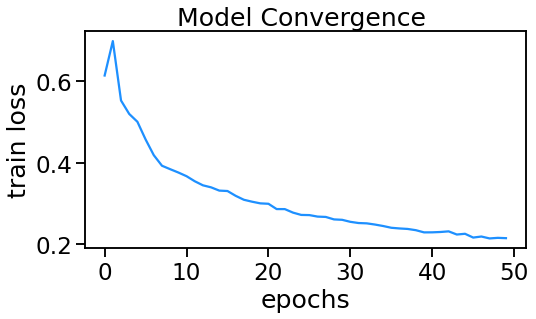

In [35]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss_arr3)),train_loss_arr3,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train loss')
plt.xlabel('epochs')
plt.tight_layout()

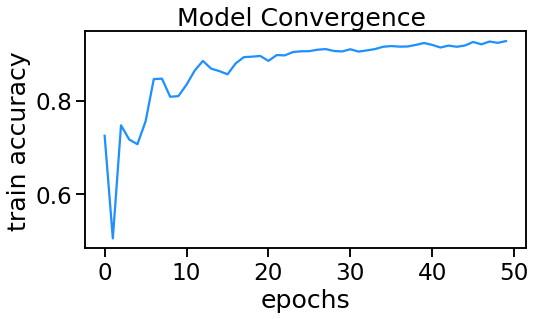

In [36]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_acc_arr3)),train_acc_arr3,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train accuracy')
plt.xlabel('epochs')
plt.tight_layout()

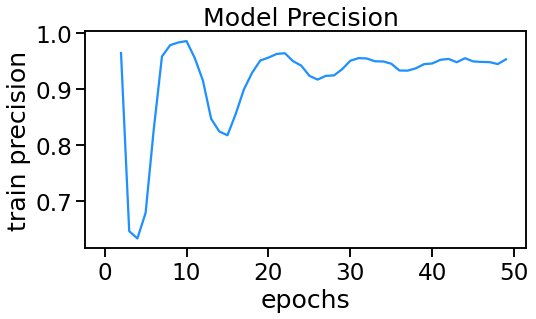

In [37]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_prec_arr3)),train_prec_arr3,color='dodgerblue')
plt.title('Model Precision ')
plt.ylabel('train precision')
plt.xlabel('epochs')
plt.tight_layout()

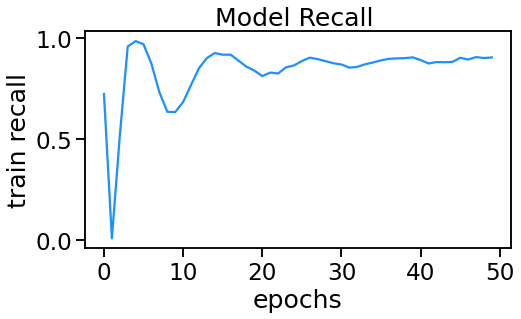

In [38]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_recall_arr3)),train_recall_arr3,color='dodgerblue')
plt.title('Model Recall ')
plt.ylabel('train recall')
plt.xlabel('epochs')
plt.tight_layout()

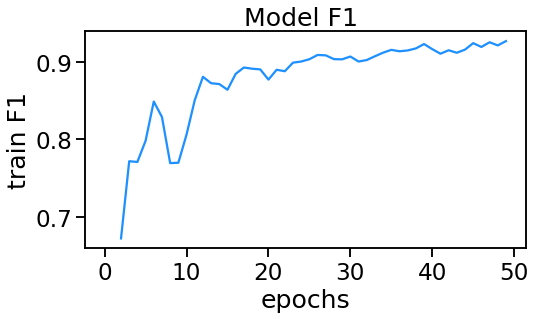

In [39]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_f1_arr3)),train_f1_arr3,color='dodgerblue')
plt.title('Model F1 ')
plt.ylabel('train F1')
plt.xlabel('epochs')
plt.tight_layout()

In [40]:
test_client_dataset1 = []
for i in range(len(test_dataset1)):
    test_client_dataset1.append((train_transforms(test_dataset1[i][0]), torch.Tensor([1,0]) if test_dataset1[i][1] == class_num_covid else torch.Tensor([0,1])))
test_client_loader1 = torch.utils.data.DataLoader(dataset=test_client_dataset1, batch_size=32)
len(test_client_loader1)

25

In [41]:
test_loss_arr3 = []
test_acc_arr3 = []
test_prec_arr3 = []
test_recall_arr3 = []
test_f1_arr3 = []

for batch_idx, (features, labels) in enumerate(test_client_loader1):
  local_loss, _tn, _fp, _fn, _tp = fl_server.train_test_model_and_get_loss(features,labels)
  _accuracy = (_tp+_tn)/(_tp+_fp+_tn+_fn)
  _precision = _tp/(_tp+_fp)
  _recall = _tp/(_tp+_fn)
  _f1 = 2/((1/_recall) + (1/_precision))
  test_loss_arr3.append(local_loss)
  test_acc_arr3.append(_accuracy)
  test_prec_arr3.append(_precision)
  test_recall_arr3.append(_recall)
  test_f1_arr3.append(_f1)
  print("Batch ", batch_idx, ". Loss: ", local_loss, ". Accuracy: ", _accuracy, ". Precision: ", _precision, ". Recall: ", _recall, ". F1-Score: ", _f1)

Batch  0 . Loss:  0.1169118583202362 . Accuracy:  1.0 . Precision:  1.0 . Recall:  1.0 . F1-Score:  1.0
Batch  1 . Loss:  0.27794894576072693 . Accuracy:  0.84375 . Precision:  0.9285714285714286 . Recall:  0.7647058823529411 . F1-Score:  0.8387096774193549
Batch  2 . Loss:  0.2381814867258072 . Accuracy:  0.90625 . Precision:  0.8888888888888888 . Recall:  0.9411764705882353 . F1-Score:  0.9142857142857143
Batch  3 . Loss:  0.26866698265075684 . Accuracy:  0.875 . Precision:  0.7272727272727273 . Recall:  0.8888888888888888 . F1-Score:  0.8
Batch  4 . Loss:  0.21080218255519867 . Accuracy:  0.96875 . Precision:  1.0 . Recall:  0.95 . F1-Score:  0.9743589743589745
Batch  5 . Loss:  0.18048875033855438 . Accuracy:  0.9375 . Precision:  0.9333333333333333 . Recall:  0.9333333333333333 . F1-Score:  0.9333333333333333
Batch  6 . Loss:  0.20656190812587738 . Accuracy:  0.9375 . Precision:  1.0 . Recall:  0.8823529411764706 . F1-Score:  0.9375
Batch  7 . Loss:  0.20463092625141144 . Accuracy

In [42]:
# Averages

In [43]:
import numpy as np

In [44]:
train_loss_arr_avg = np.mean(np.array([train_loss_arr1, train_loss_arr2, train_loss_arr3]), axis=0)
train_acc_arr_avg = np.mean(np.array([train_acc_arr1, train_acc_arr2, train_acc_arr3]), axis=0)
train_prec_arr_avg=np.mean(np.array([train_prec_arr1, train_prec_arr2, train_prec_arr3]), axis=0)
train_recall_arr_avg=np.mean(np.array([train_recall_arr1, train_recall_arr2, train_recall_arr3]), axis=0)
train_f1_arr_avg=np.mean(np.array([train_f1_arr1, train_f1_arr2, train_f1_arr3]), axis=0)

In [45]:
print(train_loss_arr_avg[-1])
print(train_acc_arr_avg[-1])
print(train_prec_arr_avg[-1])
print(train_recall_arr_avg[-1])
print(train_f1_arr_avg[-1])

0.2149458825836579
0.9259375
0.9482702408157043
0.9022270031173312
0.9246716336015988


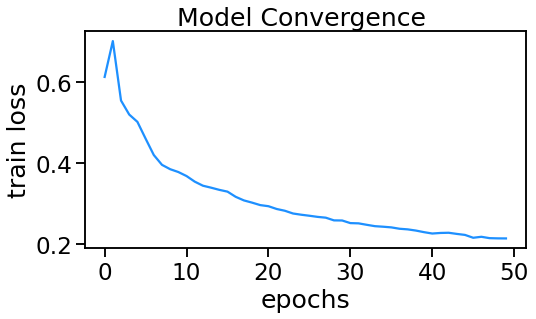

In [46]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss_arr_avg)),train_loss_arr_avg,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train loss')
plt.xlabel('epochs')
plt.tight_layout()

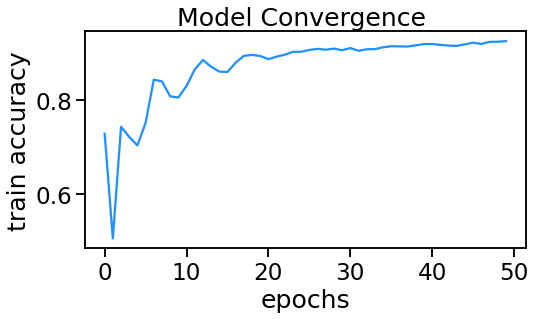

In [47]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_acc_arr_avg)),train_acc_arr_avg,color='dodgerblue')
plt.title('Model Convergence ')
plt.ylabel('train accuracy')
plt.xlabel('epochs')
plt.tight_layout()

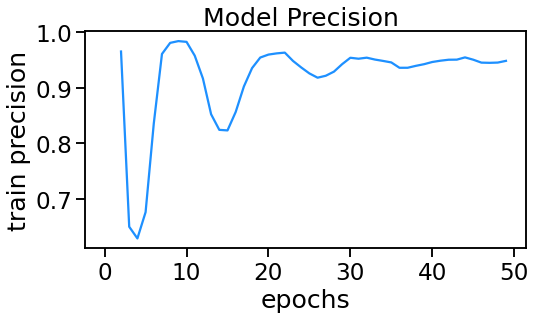

In [48]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_prec_arr_avg)),train_prec_arr_avg,color='dodgerblue')
plt.title('Model Precision ')
plt.ylabel('train precision')
plt.xlabel('epochs')
plt.tight_layout()

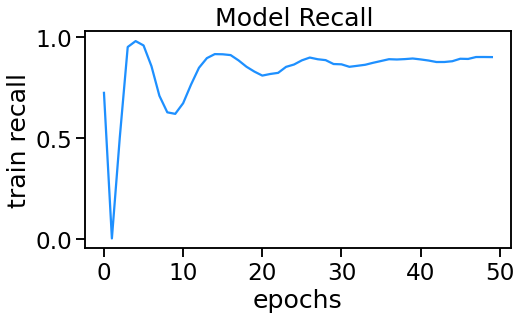

In [49]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_recall_arr_avg)),train_recall_arr_avg,color='dodgerblue')
plt.title('Model Recall ')
plt.ylabel('train recall')
plt.xlabel('epochs')
plt.tight_layout()

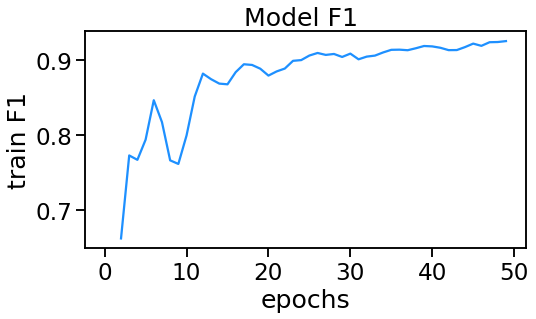

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range(len(train_f1_arr_avg)),train_f1_arr_avg,color='dodgerblue')
plt.title('Model F1 ')
plt.ylabel('train F1')
plt.xlabel('epochs')
plt.tight_layout()

In [51]:
print("Batch 0", ". Loss: ", (test_loss_arr1[0]+test_loss_arr2[0]+test_loss_arr3[0])/3, ". Accuracy: ", (test_acc_arr1[0]+test_acc_arr2[0]+test_acc_arr3[0])/3, ". Precision: ", (test_prec_arr1[0]+test_prec_arr2[0]+test_prec_arr3[0])/3, ". Recall: ", (test_recall_arr1[0]+test_recall_arr2[0]+test_recall_arr3[0])/3, ". F1-Score: ",(test_f1_arr1[0]+test_f1_arr2[0]+test_f1_arr3[0])/3)
print("Batch 1", ". Loss: ", (test_loss_arr1[1]+test_loss_arr2[1]+test_loss_arr3[1])/3, ". Accuracy: ", (test_acc_arr1[1]+test_acc_arr2[1]+test_acc_arr3[1])/3, ". Precision: ", (test_prec_arr1[1]+test_prec_arr2[1]+test_prec_arr3[1])/3, ". Recall: ", (test_recall_arr1[1]+test_recall_arr2[1]+test_recall_arr3[1])/3, ". F1-Score: ",(test_f1_arr1[1]+test_f1_arr2[1]+test_f1_arr3[1])/3)
print("Batch 2", ". Loss: ", (test_loss_arr1[2]+test_loss_arr2[2]+test_loss_arr3[2])/3, ". Accuracy: ", (test_acc_arr1[2]+test_acc_arr2[2]+test_acc_arr3[2])/3, ". Precision: ", (test_prec_arr1[2]+test_prec_arr2[2]+test_prec_arr3[2])/3, ". Recall: ", (test_recall_arr1[2]+test_recall_arr2[2]+test_recall_arr3[2])/3, ". F1-Score: ",(test_f1_arr1[2]+test_f1_arr2[2]+test_f1_arr3[2])/3)

Batch 0 . Loss:  0.2506336917479833 . Accuracy:  0.9270833333333334 . Precision:  0.9223484848484849 . Recall:  0.9404040404040405 . F1-Score:  0.9310850439882697
Batch 1 . Loss:  0.24851112564404806 . Accuracy:  0.90625 . Precision:  0.9285714285714285 . Recall:  0.8737053795877325 . F1-Score:  0.8977052692291848
Batch 2 . Loss:  0.19798458615938822 . Accuracy:  0.9270833333333334 . Precision:  0.9143518518518517 . Recall:  0.9317810457516339 . F1-Score:  0.9228174603174603


In [52]:
print("Test", ". Loss: ", (test_loss_arr1[0]+test_loss_arr2[0]+test_loss_arr3[0]+test_loss_arr1[1]+test_loss_arr2[1]+test_loss_arr3[1]+test_loss_arr1[2]+test_loss_arr2[2]+test_loss_arr3[2])/9, ". Accuracy: ", (test_acc_arr1[0]+test_acc_arr2[0]+test_acc_arr3[0]+test_acc_arr1[1]+test_acc_arr2[1]+test_acc_arr3[1]+test_acc_arr1[2]+test_acc_arr2[2]+test_acc_arr3[2])/9, ". Precision: ", (test_prec_arr1[0]+test_prec_arr2[0]+test_prec_arr3[0]+test_prec_arr1[1]+test_prec_arr2[1]+test_prec_arr3[1]+test_prec_arr1[2]+test_prec_arr2[2]+test_prec_arr3[2])/9, ". Recall: ", (test_recall_arr1[0]+test_recall_arr2[0]+test_recall_arr3[0]+test_recall_arr1[1]+test_recall_arr2[1]+test_recall_arr3[1]+test_recall_arr1[2]+test_recall_arr2[2]+test_recall_arr3[2])/9, ". F1-Score: ",(test_f1_arr1[0]+test_f1_arr2[0]+test_f1_arr3[0]+test_f1_arr1[1]+test_f1_arr2[1]+test_f1_arr3[1]+test_f1_arr1[2]+test_f1_arr2[2]+test_f1_arr3[2])/9)


Test . Loss:  0.2323764678504732 . Accuracy:  0.9201388888888888 . Precision:  0.9217572550905886 . Recall:  0.915296821914469 . F1-Score:  0.9172025911783049
